# 2.1 Extraction of 8-bins RGB for each image:

In this notebook is shown the code needed to scan each image and extract the 8-bins R, G and B. All the information is later added to the original dataframe as more parameters to be used in our predictions.   

The prediccion result can be seen in the folder "3.Trainings and predictions". 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('./../data/ntcir12.csv',sep=',', index_col='Unnamed: 0')

In [3]:
tags=['person','chair', 'book', 'tvmonitor', 'laptop', 'bottle','cup', 'car','diningtable', 'cell phone',
             'keyboard', 'bowl', 'mouse', 'clock','toilet', 'sink', 'remote', 'suitcase', 'pottedplant','refrigerator',
             'knife', 'handbag', 'vase', 'aeroplane', 'cat','bed', 'sofa', 'backpack', 'tie', 'spoon', 'toothbrush',
             'traffic light', 'bicycle', 'train', 'bird', 'microwave', 'bench','fork', 'oven', 'motorbike', 'donut',
             'wine glass', 'pizza','apple', 'scissors', 'umbrella', 'cake', 'bus', 'truck','banana', 'parking meter',
             'sandwich', 'sports ball', 'broccoli','carrot', 'orange', 'teddy bear', 'dog', 'snowboard','skateboard', 'boat',
             'surfboard', 'frisbee', 'skis', 'hot dog','bear', 'elephant', 'toaster', 'stop sign', 'hair drier', 'kite',
             'sheep', 'zebra', 'tennis racket', 'baseball bat', 'fire hydrant','horse', 'cow', 'giraffe', 'baseball glove','day_of_week']


In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#import other features
from sklearn.metrics import accuracy_score

In [7]:
df = df.dropna(how='any',subset=["activity"],axis=0)

In [8]:
df = df.fillna(0)

In [9]:
len(df)

49896

This are all the images:

In [10]:
images =df['image_path'].values

In [11]:
def get_median_RGBchannels(f):
    
    image= plt.imread(f)
    #img_pixels= image.flatten()
    red= image[:,:,0]
    green= image[:,:,1]
    blue= image[:,:,2]
    
    return red, green, blue

In [12]:
len(df['image_path'])

49896

We will extract 8 bins for each R, G and B color channel in every image. These will be the new tags:

In [13]:
column_bins = ['R_bin1', 'R_bin2', 'R_bin3', 'R_bin4', 'R_bin5', 'R_bin6', 'R_bin7', 'R_bin8','G_bin1', 'G_bin2', 'G_bin3', 'G_bin4', 'G_bin5', 'G_bin6', 'G_bin7', 'G_bin8','B_bin1', 'B_bin2', 'B_bin3', 'B_bin4', 'B_bin5', 'B_bin6', 'B_bin7', 'B_bin8']

In [14]:
for i in range(len(column_bins)):
    df[column_bins[i]] = 0

In [15]:
root_file = './../images'

for i,f in enumerate(df['image_path']):

    image= plt.imread(root_file+f)
    red, green, blue = get_median_RGBchannels(root_file+f)

    bin_counts_red, bin_edges_red = np.histogram(red,bins=8) #Red bins
    bin_counts_green, bin_edges_green = np.histogram(green,bins=8) #Green bins
    bin_counts_blue, bin_edges_blue = np.histogram(blue,bins=8) #Blue bins
        
    for j in range(8):
        df[column_bins[j]][i] = bin_counts_red[j]
        df[column_bins[j+8]][i] = bin_counts_green[j]
        df[column_bins[j+16]][i] = bin_counts_blue[j]
    
    print f

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


/u1/2015-02-23/b00000006_21i6bq_20150223_070812e.jpg
/u1/2015-02-23/b00000007_21i6bq_20150223_070813e.jpg
/u1/2015-02-23/b00000008_21i6bq_20150223_070813e.jpg
/u1/2015-02-23/b00000009_21i6bq_20150223_070814e.jpg
/u1/2015-02-23/b00000010_21i6bq_20150223_070822e.jpg
/u1/2015-02-23/b00000011_21i6bq_20150223_070859e.jpg
/u1/2015-02-23/b00000012_21i6bq_20150223_070931e.jpg
/u1/2015-02-23/b00000013_21i6bq_20150223_071008e.jpg
/u1/2015-02-23/b00000014_21i6bq_20150223_071046e.jpg
/u1/2015-02-23/b00000015_21i6bq_20150223_071119e.jpg
/u1/2015-02-23/b00000016_21i6bq_20150223_071152e.jpg
/u1/2015-02-23/b00000017_21i6bq_20150223_071228e.jpg
/u1/2015-02-23/b00000018_21i6bq_20150223_071305e.jpg
/u1/2015-02-23/b00000019_21i6bq_20150223_071344e.jpg
/u1/2015-02-23/b00000020_21i6bq_20150223_071416e.jpg
/u1/2015-02-23/b00000021_21i6bq_20150223_071451e.jpg
/u1/2015-02-23/b00000022_21i6bq_20150223_071528e.jpg
/u1/2015-02-23/b00000023_21i6bq_20150223_071607e.jpg
/u1/2015-02-23/b00000024_21i6bq_20150223_07164

/u1/2015-02-23/b00000178_21i6bq_20150223_085709e.jpg
/u1/2015-02-23/b00000179_21i6bq_20150223_085744e.jpg
/u1/2015-02-23/b00000180_21i6bq_20150223_085821e.jpg
/u1/2015-02-23/b00000181_21i6bq_20150223_085858e.jpg
/u1/2015-02-23/b00000182_21i6bq_20150223_085939e.jpg
/u1/2015-02-23/b00000183_21i6bq_20150223_090019e.jpg
/u1/2015-02-23/b00000184_21i6bq_20150223_090059e.jpg
/u1/2015-02-23/b00000185_21i6bq_20150223_090131e.jpg
/u1/2015-02-23/b00000186_21i6bq_20150223_090204e.jpg
/u1/2015-02-23/b00000187_21i6bq_20150223_090246e.jpg
/u1/2015-02-23/b00000188_21i6bq_20150223_090327e.jpg
/u1/2015-02-23/b00000189_21i6bq_20150223_090400e.jpg
/u1/2015-02-23/b00000190_21i6bq_20150223_090437e.jpg
/u1/2015-02-23/b00000191_21i6bq_20150223_090516e.jpg
/u1/2015-02-23/b00000192_21i6bq_20150223_090736e.jpg
/u1/2015-02-23/b00000192_21i6bq_20150223_090736e[Conflict].jpg
/u1/2015-02-23/b00000193_21i6bq_20150223_090809e.jpg
/u1/2015-02-23/b00000194_21i6bq_20150223_090844e.jpg
/u1/2015-02-23/b00000195_21i6bq_2015

/u1/2015-02-23/b00000363_21i6bq_20150223_105449e.jpg
/u1/2015-02-23/b00000364_21i6bq_20150223_105520e.jpg
/u1/2015-02-23/b00000365_21i6bq_20150223_105555e.jpg
/u1/2015-02-23/b00000369_21i6bq_20150223_105903e.jpg
/u1/2015-02-23/b00000370_21i6bq_20150223_105936e.jpg
/u1/2015-02-23/b00000371_21i6bq_20150223_110017e.jpg
/u1/2015-02-23/b00000372_21i6bq_20150223_110056e.jpg
/u1/2015-02-23/b00000373_21i6bq_20150223_110135e.jpg
/u1/2015-02-23/b00000374_21i6bq_20150223_110210e.jpg
/u1/2015-02-23/b00000375_21i6bq_20150223_110251e.jpg
/u1/2015-02-23/b00000376_21i6bq_20150223_110332e.jpg
/u1/2015-02-23/b00000377_21i6bq_20150223_110409e.jpg
/u1/2015-02-23/b00000378_21i6bq_20150223_110446e.jpg
/u1/2015-02-23/b00000379_21i6bq_20150223_110526e.jpg
/u1/2015-02-23/b00000380_21i6bq_20150223_110601e.jpg
/u1/2015-02-23/b00000381_21i6bq_20150223_110636e.jpg
/u1/2015-02-23/b00000382_21i6bq_20150223_110710e.jpg
/u1/2015-02-23/b00000383_21i6bq_20150223_110751e.jpg
/u1/2015-02-23/b00000384_21i6bq_20150223_11083

/u1/2015-02-23/b00000532_21i6bq_20150223_124018e.jpg
/u1/2015-02-23/b00000533_21i6bq_20150223_124049e.jpg
/u1/2015-02-23/b00000534_21i6bq_20150223_124124e.jpg
/u1/2015-02-23/b00000535_21i6bq_20150223_124200e.jpg
/u1/2015-02-23/b00000536_21i6bq_20150223_124239e.jpg
/u1/2015-02-23/b00000537_21i6bq_20150223_124312e.jpg
/u1/2015-02-23/b00000538_21i6bq_20150223_124351e.jpg
/u1/2015-02-23/b00000539_21i6bq_20150223_124424e.jpg
/u1/2015-02-23/b00000540_21i6bq_20150223_124503e.jpg
/u1/2015-02-23/b00000541_21i6bq_20150223_124542e.jpg
/u1/2015-02-23/b00000542_21i6bq_20150223_124619e.jpg
/u1/2015-02-23/b00000543_21i6bq_20150223_124652e.jpg
/u1/2015-02-23/b00000544_21i6bq_20150223_124731e.jpg
/u1/2015-02-23/b00000545_21i6bq_20150223_124810e.jpg
/u1/2015-02-23/b00000546_21i6bq_20150223_124849e.jpg
/u1/2015-02-23/b00000547_21i6bq_20150223_124928e.jpg
/u1/2015-02-23/b00000548_21i6bq_20150223_125006e.jpg
/u1/2015-02-23/b00000549_21i6bq_20150223_125041e.jpg
/u1/2015-02-23/b00000550_21i6bq_20150223_12511

/u1/2015-02-23/b00000688_21i6bq_20150223_141616e.jpg
/u1/2015-02-23/b00000690_21i6bq_20150223_141736e.jpg
/u1/2015-02-23/b00000691_21i6bq_20150223_141815e.jpg
/u1/2015-02-23/b00000692_21i6bq_20150223_141931e.jpg
/u1/2015-02-23/b00000693_21i6bq_20150223_142121e.jpg
/u1/2015-02-23/b00000694_21i6bq_20150223_142154e.jpg
/u1/2015-02-23/b00000695_21i6bq_20150223_142229e.jpg
/u1/2015-02-23/b00000696_21i6bq_20150223_142304e.jpg
/u1/2015-02-23/b00000697_21i6bq_20150223_142345e.jpg
/u1/2015-02-23/b00000698_21i6bq_20150223_142424e.jpg
/u1/2015-02-23/b00000699_21i6bq_20150223_142459e.jpg
/u1/2015-02-23/b00000700_21i6bq_20150223_142537e.jpg
/u1/2015-02-23/b00000701_21i6bq_20150223_142650e.jpg
/u1/2015-02-23/b00000702_21i6bq_20150223_142726e.jpg
/u1/2015-02-23/b00000703_21i6bq_20150223_142802e.jpg
/u1/2015-02-23/b00000704_21i6bq_20150223_142839e.jpg
/u1/2015-02-23/b00000705_21i6bq_20150223_142921e.jpg
/u1/2015-02-23/b00000706_21i6bq_20150223_142956e.jpg
/u1/2015-02-23/b00000709_21i6bq_20150223_14314

/u1/2015-02-23/b00000906_21i6bq_20150223_163835e.jpg
/u1/2015-02-23/b00000907_21i6bq_20150223_163916e.jpg
/u1/2015-02-23/b00000908_21i6bq_20150223_163953e.jpg
/u1/2015-02-23/b00000909_21i6bq_20150223_164027e.jpg
/u1/2015-02-23/b00000910_21i6bq_20150223_164106e.jpg
/u1/2015-02-23/b00000911_21i6bq_20150223_164140e.jpg
/u1/2015-02-23/b00000912_21i6bq_20150223_164220e.jpg
/u1/2015-02-23/b00000913_21i6bq_20150223_164257e.jpg
/u1/2015-02-23/b00000914_21i6bq_20150223_164336e.jpg
/u1/2015-02-23/b00000915_21i6bq_20150223_164417e.jpg
/u1/2015-02-23/b00000916_21i6bq_20150223_164452e.jpg
/u1/2015-02-23/b00000917_21i6bq_20150223_164532e.jpg
/u1/2015-02-23/b00000918_21i6bq_20150223_164613e.jpg
/u1/2015-02-23/b00000919_21i6bq_20150223_164651e.jpg
/u1/2015-02-23/b00000920_21i6bq_20150223_164803e.jpg
/u1/2015-02-23/b00000921_21i6bq_20150223_164837e.jpg
/u1/2015-02-23/b00000922_21i6bq_20150223_164913e.jpg
/u1/2015-02-23/b00000923_21i6bq_20150223_164950e.jpg
/u1/2015-02-23/b00000924_21i6bq_20150223_16502

/u1/2015-02-23/b00001128_21i6bq_20150223_190824e.jpg
/u1/2015-02-23/b00001129_21i6bq_20150223_190854e.jpg
/u1/2015-02-23/b00001130_21i6bq_20150223_190924e.jpg
/u1/2015-02-23/b00001131_21i6bq_20150223_191002e.jpg
/u1/2015-02-23/b00001132_21i6bq_20150223_191038e.jpg
/u1/2015-02-23/b00001133_21i6bq_20150223_191108e.jpg
/u1/2015-02-23/b00001134_21i6bq_20150223_191139e.jpg
/u1/2015-02-23/b00001135_21i6bq_20150223_191215e.jpg
/u1/2015-02-23/b00001136_21i6bq_20150223_191256e.jpg
/u1/2015-02-23/b00001137_21i6bq_20150223_191334e.jpg
/u1/2015-02-23/b00001138_21i6bq_20150223_191404e.jpg
/u1/2015-02-23/b00001139_21i6bq_20150223_191442e.jpg
/u1/2015-02-23/b00001140_21i6bq_20150223_191522e.jpg
/u1/2015-02-23/b00001141_21i6bq_20150223_191557e.jpg
/u1/2015-02-23/b00001142_21i6bq_20150223_191627e.jpg
/u1/2015-02-23/b00001143_21i6bq_20150223_191658e.jpg
/u1/2015-02-23/b00001144_21i6bq_20150223_191736e.jpg
/u1/2015-02-23/b00001145_21i6bq_20150223_191807e.jpg
/u1/2015-02-23/b00001146_21i6bq_20150223_19183

/u1/2015-02-23/b00001342_21i6bq_20150223_213243e.jpg
/u1/2015-02-23/b00001343_21i6bq_20150223_213316e.jpg
/u1/2015-02-23/b00001344_21i6bq_20150223_213349e.jpg
/u1/2015-02-23/b00001345_21i6bq_20150223_213430e.jpg
/u1/2015-02-23/b00001346_21i6bq_20150223_213501e.jpg
/u1/2015-02-23/b00001347_21i6bq_20150223_213540e.jpg
/u1/2015-02-23/b00001348_21i6bq_20150223_213611e.jpg
/u1/2015-02-23/b00001349_21i6bq_20150223_213642e.jpg
/u1/2015-02-23/b00001350_21i6bq_20150223_213719e.jpg
/u1/2015-02-23/b00001351_21i6bq_20150223_213752e.jpg
/u1/2015-02-23/b00001352_21i6bq_20150223_213831e.jpg
/u1/2015-02-23/b00001353_21i6bq_20150223_213912e.jpg
/u1/2015-02-23/b00001354_21i6bq_20150223_213947e.jpg
/u1/2015-02-23/b00001355_21i6bq_20150223_214020e.jpg
/u1/2015-02-23/b00001356_21i6bq_20150223_214051e.jpg
/u1/2015-02-23/b00001357_21i6bq_20150223_214122e.jpg
/u1/2015-02-23/b00001358_21i6bq_20150223_214157e.jpg
/u1/2015-02-23/b00001359_21i6bq_20150223_214232e.jpg
/u1/2015-02-23/b00001360_21i6bq_20150223_21430

/u1/2015-02-24/b00000093_21i6bq_20150224_073424e.jpg
/u1/2015-02-24/b00000094_21i6bq_20150224_073454e.jpg
/u1/2015-02-24/b00000095_21i6bq_20150224_073524e.jpg
/u1/2015-02-24/b00000096_21i6bq_20150224_073555e.jpg
/u1/2015-02-24/b00000097_21i6bq_20150224_073626e.jpg
/u1/2015-02-24/b00000098_21i6bq_20150224_073657e.jpg
/u1/2015-02-24/b00000099_21i6bq_20150224_073732e.jpg
/u1/2015-02-24/b00000100_21i6bq_20150224_073803e.jpg
/u1/2015-02-24/b00000101_21i6bq_20150224_073834e.jpg
/u1/2015-02-24/b00000102_21i6bq_20150224_073911e.jpg
/u1/2015-02-24/b00000103_21i6bq_20150224_073948e.jpg
/u1/2015-02-24/b00000104_21i6bq_20150224_074019e.jpg
/u1/2015-02-24/b00000106_21i6bq_20150224_074132e.jpg
/u1/2015-02-24/b00000111_21i6bq_20150224_074652e.jpg
/u1/2015-02-24/b00000113_21i6bq_20150224_074802e.jpg
/u1/2015-02-24/b00000117_21i6bq_20150224_075036e.jpg
/u1/2015-02-24/b00000118_21i6bq_20150224_075113e.jpg
/u1/2015-02-24/b00000119_21i6bq_20150224_075147e.jpg
/u1/2015-02-24/b00000120_21i6bq_20150224_07522

/u1/2015-02-24/b00000261_21i6bq_20150224_091856e.jpg
/u1/2015-02-24/b00000262_21i6bq_20150224_091933e.jpg
/u1/2015-02-24/b00000264_21i6bq_20150224_092045e.jpg
/u1/2015-02-24/b00000265_21i6bq_20150224_092124e.jpg
/u1/2015-02-24/b00000267_21i6bq_20150224_092235e.jpg
/u1/2015-02-24/b00000270_21i6bq_20150224_092420e.jpg
/u1/2015-02-24/b00000271_21i6bq_20150224_092452e.jpg
/u1/2015-02-24/b00000272_21i6bq_20150224_092533e.jpg
/u1/2015-02-24/b00000273_21i6bq_20150224_092610e.jpg
/u1/2015-02-24/b00000274_21i6bq_20150224_092647e.jpg
/u1/2015-02-24/b00000275_21i6bq_20150224_092726e.jpg
/u1/2015-02-24/b00000276_21i6bq_20150224_092808e.jpg
/u1/2015-02-24/b00000277_21i6bq_20150224_092846e.jpg
/u1/2015-02-24/b00000278_21i6bq_20150224_092922e.jpg
/u1/2015-02-24/b00000279_21i6bq_20150224_092954e.jpg
/u1/2015-02-24/b00000280_21i6bq_20150224_093029e.jpg
/u1/2015-02-24/b00000281_21i6bq_20150224_093110e.jpg
/u1/2015-02-24/b00000282_21i6bq_20150224_093147e.jpg
/u1/2015-02-24/b00000283_21i6bq_20150224_09322

/u1/2015-02-24/b00000438_21i6bq_20150224_110839e.jpg
/u1/2015-02-24/b00000439_21i6bq_20150224_110909e.jpg
/u1/2015-02-24/b00000440_21i6bq_20150224_110947e.jpg
/u1/2015-02-24/b00000441_21i6bq_20150224_111017e.jpg
/u1/2015-02-24/b00000442_21i6bq_20150224_111048e.jpg
/u1/2015-02-24/b00000443_21i6bq_20150224_111120e.jpg
/u1/2015-02-24/b00000444_21i6bq_20150224_111150e.jpg
/u1/2015-02-24/b00000445_21i6bq_20150224_111232e.jpg
/u1/2015-02-24/b00000446_21i6bq_20150224_111311e.jpg
/u1/2015-02-24/b00000447_21i6bq_20150224_111345e.jpg
/u1/2015-02-24/b00000448_21i6bq_20150224_111420e.jpg
/u1/2015-02-24/b00000449_21i6bq_20150224_111502e.jpg
/u1/2015-02-24/b00000450_21i6bq_20150224_111543e.jpg
/u1/2015-02-24/b00000452_21i6bq_20150224_111652e.jpg
/u1/2015-02-24/b00000454_21i6bq_20150224_111756e.jpg
/u1/2015-02-24/b00000455_21i6bq_20150224_111831e.jpg
/u1/2015-02-24/b00000456_21i6bq_20150224_111910e.jpg
/u1/2015-02-24/b00000457_21i6bq_20150224_111947e.jpg
/u1/2015-02-24/b00000458_21i6bq_20150224_11202

/u1/2015-02-24/b00000668_21i6bq_20150224_132959e.jpg
/u1/2015-02-24/b00000669_21i6bq_20150224_133038e.jpg
/u1/2015-02-24/b00000670_21i6bq_20150224_133109e.jpg
/u1/2015-02-24/b00000671_21i6bq_20150224_133141e.jpg
/u1/2015-02-24/b00000672_21i6bq_20150224_133220e.jpg
/u1/2015-02-24/b00000673_21i6bq_20150224_133252e.jpg
/u1/2015-02-24/b00000679_21i6bq_20150224_133712e.jpg
/u1/2015-02-24/b00000682_21i6bq_20150224_133900e.jpg
/u1/2015-02-24/b00000683_21i6bq_20150224_133941e.jpg
/u1/2015-02-24/b00000685_21i6bq_20150224_134052e.jpg
/u1/2015-02-24/b00000686_21i6bq_20150224_134129e.jpg
/u1/2015-02-24/b00000689_21i6bq_20150224_134325e.jpg
/u1/2015-02-24/b00000690_21i6bq_20150224_134358e.jpg
/u1/2015-02-24/b00000691_21i6bq_20150224_134439e.jpg
/u1/2015-02-24/b00000692_21i6bq_20150224_134516e.jpg
/u1/2015-02-24/b00000695_21i6bq_20150224_134708e.jpg
/u1/2015-02-24/b00000696_21i6bq_20150224_134741e.jpg
/u1/2015-02-24/b00000702_21i6bq_20150224_135119e.jpg
/u1/2015-02-24/b00000703_21i6bq_20150224_13515

/u1/2015-02-24/b00000905_21i6bq_20150224_155420e.jpg
/u1/2015-02-24/b00000906_21i6bq_20150224_155456e.jpg
/u1/2015-02-24/b00000908_21i6bq_20150224_155607e.jpg
/u1/2015-02-24/b00000909_21i6bq_20150224_155642e.jpg
/u1/2015-02-24/b00000910_21i6bq_20150224_155721e.jpg
/u1/2015-02-24/b00000911_21i6bq_20150224_155802e.jpg
/u1/2015-02-24/b00000913_21i6bq_20150224_155909e.jpg
/u1/2015-02-24/b00000914_21i6bq_20150224_155943e.jpg
/u1/2015-02-24/b00000915_21i6bq_20150224_160018e.jpg
/u1/2015-02-24/b00000916_21i6bq_20150224_160100e.jpg
/u1/2015-02-24/b00000917_21i6bq_20150224_160138e.jpg
/u1/2015-02-24/b00000918_21i6bq_20150224_160217e.jpg
/u1/2015-02-24/b00000919_21i6bq_20150224_160254e.jpg
/u1/2015-02-24/b00000920_21i6bq_20150224_160329e.jpg
/u1/2015-02-24/b00000921_21i6bq_20150224_160408e.jpg
/u1/2015-02-24/b00000922_21i6bq_20150224_160447e.jpg
/u1/2015-02-24/b00000923_21i6bq_20150224_160522e.jpg
/u1/2015-02-24/b00000924_21i6bq_20150224_160603e.jpg
/u1/2015-02-24/b00000925_21i6bq_20150224_16063

/u1/2015-02-24/b00001142_21i6bq_20150224_182201e.jpg
/u1/2015-02-24/b00001143_21i6bq_20150224_182234e.jpg
/u1/2015-02-24/b00001144_21i6bq_20150224_182312e.jpg
/u1/2015-02-24/b00001145_21i6bq_20150224_182350e.jpg
/u1/2015-02-24/b00001146_21i6bq_20150224_182430e.jpg
/u1/2015-02-24/b00001147_21i6bq_20150224_182504e.jpg
/u1/2015-02-24/b00001148_21i6bq_20150224_182543e.jpg
/u1/2015-02-24/b00001154_21i6bq_20150224_182934e.jpg
/u1/2015-02-24/b00001155_21i6bq_20150224_183008e.jpg
/u1/2015-02-24/b00001156_21i6bq_20150224_183049e.jpg
/u1/2015-02-24/b00001157_21i6bq_20150224_183127e.jpg
/u1/2015-02-24/b00001158_21i6bq_20150224_183200e.jpg
/u1/2015-02-24/b00001159_21i6bq_20150224_183237e.jpg
/u1/2015-02-24/b00001160_21i6bq_20150224_183314e.jpg
/u1/2015-02-24/b00001162_21i6bq_20150224_183430e.jpg
/u1/2015-02-24/b00001163_21i6bq_20150224_183506e.jpg
/u1/2015-02-24/b00001164_21i6bq_20150224_183547e.jpg
/u1/2015-02-24/b00001165_21i6bq_20150224_183624e.jpg
/u1/2015-02-24/b00001166_21i6bq_20150224_18370

/u1/2015-02-24/b00001360_21i6bq_20150224_203024e.jpg
/u1/2015-02-24/b00001361_21i6bq_20150224_203054e.jpg
/u1/2015-02-24/b00001362_21i6bq_20150224_203124e.jpg
/u1/2015-02-24/b00001363_21i6bq_20150224_203154e.jpg
/u1/2015-02-24/b00001364_21i6bq_20150224_203226e.jpg
/u1/2015-02-24/b00001365_21i6bq_20150224_203304e.jpg
/u1/2015-02-24/b00001366_21i6bq_20150224_203335e.jpg
/u1/2015-02-24/b00001367_21i6bq_20150224_203407e.jpg
/u1/2015-02-24/b00001368_21i6bq_20150224_203438e.jpg
/u1/2015-02-24/b00001369_21i6bq_20150224_203545e.jpg
/u1/2015-02-24/b00001370_21i6bq_20150224_203627e.jpg
/u1/2015-02-24/b00001371_21i6bq_20150224_203704e.jpg
/u1/2015-02-24/b00001372_21i6bq_20150224_203738e.jpg
/u1/2015-02-24/b00001373_21i6bq_20150224_203813e.jpg
/u1/2015-02-24/b00001374_21i6bq_20150224_203845e.jpg
/u1/2015-02-24/b00001375_21i6bq_20150224_203926e.jpg
/u1/2015-02-24/b00001376_21i6bq_20150224_204002e.jpg
/u1/2015-02-24/b00001377_21i6bq_20150224_204037e.jpg
/u1/2015-02-24/b00001379_21i6bq_20150224_20422

/u1/2015-02-25/b00000004_21i6bq_20150225_055705e.jpg
/u1/2015-02-25/b00000005_21i6bq_20150225_055739e.jpg
/u1/2015-02-25/b00000006_21i6bq_20150225_055820e.jpg
/u1/2015-02-25/b00000007_21i6bq_20150225_055924e.jpg
/u1/2015-02-25/b00000008_21i6bq_20150225_055925e.jpg
/u1/2015-02-25/b00000009_21i6bq_20150225_055926e.jpg
/u1/2015-02-25/b00000010_21i6bq_20150225_055926e.jpg
/u1/2015-02-25/b00000011_21i6bq_20150225_055927e.jpg
/u1/2015-02-25/b00000012_21i6bq_20150225_055927e.jpg
/u1/2015-02-25/b00000013_21i6bq_20150225_055928e.jpg
/u1/2015-02-25/b00000014_21i6bq_20150225_055928e.jpg
/u1/2015-02-25/b00000015_21i6bq_20150225_055929e.jpg
/u1/2015-02-25/b00000016_21i6bq_20150225_055935e.jpg
/u1/2015-02-25/b00000017_21i6bq_20150225_060014e.jpg
/u1/2015-02-25/b00000020_21i6bq_20150225_060158e.jpg
/u1/2015-02-25/b00000021_21i6bq_20150225_060236e.jpg
/u1/2015-02-25/b00000026_21i6bq_20150225_060650e.jpg
/u1/2015-02-25/b00000027_21i6bq_20150225_060737e.jpg
/u1/2015-02-25/b00000028_21i6bq_20150225_06081

/u1/2015-02-25/b00000208_21i6bq_20150225_081214e.jpg
/u1/2015-02-25/b00000209_21i6bq_20150225_081255e.jpg
/u1/2015-02-25/b00000210_21i6bq_20150225_081338e.jpg
/u1/2015-02-25/b00000211_21i6bq_20150225_081423e.jpg
/u1/2015-02-25/b00000213_21i6bq_20150225_081620e.jpg
/u1/2015-02-25/b00000216_21i6bq_20150225_081848e.jpg
/u1/2015-02-25/b00000217_21i6bq_20150225_081923e.jpg
/u1/2015-02-25/b00000218_21i6bq_20150225_082004e.jpg
/u1/2015-02-25/b00000221_21i6bq_20150225_082151e.jpg
/u1/2015-02-25/b00000223_21i6bq_20150225_082317e.jpg
/u1/2015-02-25/b00000225_21i6bq_20150225_082436e.jpg
/u1/2015-02-25/b00000226_21i6bq_20150225_082510e.jpg
/u1/2015-02-25/b00000233_21i6bq_20150225_082925e.jpg
/u1/2015-02-25/b00000235_21i6bq_20150225_083031e.jpg
/u1/2015-02-25/b00000243_21i6bq_20150225_083555e.jpg
/u1/2015-02-25/b00000250_21i6bq_20150225_083643e.jpg
/u1/2015-02-25/b00000251_21i6bq_20150225_083644e.jpg
/u1/2015-02-25/b00000255_21i6bq_20150225_083810e.jpg
/u1/2015-02-25/b00000256_21i6bq_20150225_08384

/u1/2015-02-25/b00000463_21i6bq_20150225_104717e.jpg
/u1/2015-02-25/b00000464_21i6bq_20150225_104747e.jpg
/u1/2015-02-25/b00000465_21i6bq_20150225_104823e.jpg
/u1/2015-02-25/b00000466_21i6bq_20150225_104858e.jpg
/u1/2015-02-25/b00000467_21i6bq_20150225_104940e.jpg
/u1/2015-02-25/b00000469_21i6bq_20150225_105054e.jpg
/u1/2015-02-25/b00000471_21i6bq_20150225_105242e.jpg
/u1/2015-02-25/b00000474_21i6bq_20150225_105450e.jpg
/u1/2015-02-25/b00000475_21i6bq_20150225_105523e.jpg
/u1/2015-02-25/b00000476_21i6bq_20150225_105558e.jpg
/u1/2015-02-25/b00000477_21i6bq_20150225_105633e.jpg
/u1/2015-02-25/b00000478_21i6bq_20150225_105707e.jpg
/u1/2015-02-25/b00000479_21i6bq_20150225_105748e.jpg
/u1/2015-02-25/b00000481_21i6bq_20150225_105940e.jpg
/u1/2015-02-25/b00000482_21i6bq_20150225_110011e.jpg
/u1/2015-02-25/b00000483_21i6bq_20150225_110045e.jpg
/u1/2015-02-25/b00000491_21i6bq_20150225_110535e.jpg
/u1/2015-02-25/b00000492_21i6bq_20150225_110612e.jpg
/u1/2015-02-25/b00000493_21i6bq_20150225_11064

/u1/2015-02-25/b00000781_21i6bq_20150225_135743e.jpg
/u1/2015-02-25/b00000782_21i6bq_20150225_135817e.jpg
/u1/2015-02-25/b00000783_21i6bq_20150225_135853e.jpg
/u1/2015-02-25/b00000784_21i6bq_20150225_135933e.jpg
/u1/2015-02-25/b00000790_21i6bq_20150225_140320e.jpg
/u1/2015-02-25/b00000791_21i6bq_20150225_140359e.jpg
/u1/2015-02-25/b00000792_21i6bq_20150225_140434e.jpg
/u1/2015-02-25/b00000793_21i6bq_20150225_140513e.jpg
/u1/2015-02-25/b00000794_21i6bq_20150225_140549e.jpg
/u1/2015-02-25/b00000795_21i6bq_20150225_140630e.jpg
/u1/2015-02-25/b00000796_21i6bq_20150225_140709e.jpg
/u1/2015-02-25/b00000797_21i6bq_20150225_140744e.jpg
/u1/2015-02-25/b00000798_21i6bq_20150225_140819e.jpg
/u1/2015-02-25/b00000799_21i6bq_20150225_140856e.jpg
/u1/2015-02-25/b00000800_21i6bq_20150225_140937e.jpg
/u1/2015-02-25/b00000801_21i6bq_20150225_141012e.jpg
/u1/2015-02-25/b00000802_21i6bq_20150225_141047e.jpg
/u1/2015-02-25/b00000803_21i6bq_20150225_141123e.jpg
/u1/2015-02-25/b00000820_21i6bq_20150225_14221

/u1/2015-02-25/b00001082_21i6bq_20150225_171603e.jpg
/u1/2015-02-25/b00001093_21i6bq_20150225_172345e.jpg
/u1/2015-02-25/b00001101_21i6bq_20150225_172838e.jpg
/u1/2015-02-25/b00001102_21i6bq_20150225_172909e.jpg
/u1/2015-02-25/b00001103_21i6bq_20150225_172947e.jpg
/u1/2015-02-25/b00001106_21i6bq_20150225_173142e.jpg
/u1/2015-02-25/b00001107_21i6bq_20150225_173217e.jpg
/u1/2015-02-25/b00001114_21i6bq_20150225_173630e.jpg
/u1/2015-02-25/b00001115_21i6bq_20150225_173706e.jpg
/u1/2015-02-25/b00001116_21i6bq_20150225_173745e.jpg
/u1/2015-02-25/b00001117_21i6bq_20150225_173821e.jpg
/u1/2015-02-25/b00001118_21i6bq_20150225_173901e.jpg
/u1/2015-02-25/b00001119_21i6bq_20150225_173935e.jpg
/u1/2015-02-25/b00001120_21i6bq_20150225_174010e.jpg
/u1/2015-02-25/b00001121_21i6bq_20150225_174051e.jpg
/u1/2015-02-25/b00001122_21i6bq_20150225_174130e.jpg
/u1/2015-02-25/b00001123_21i6bq_20150225_174201e.jpg
/u1/2015-02-25/b00001124_21i6bq_20150225_174241e.jpg
/u1/2015-02-25/b00001125_21i6bq_20150225_17431

/u1/2015-02-25/b00001336_21i6bq_20150225_195715e.jpg
/u1/2015-02-25/b00001337_21i6bq_20150225_195746e.jpg
/u1/2015-02-25/b00001338_21i6bq_20150225_195817e.jpg
/u1/2015-02-25/b00001339_21i6bq_20150225_195848e.jpg
/u1/2015-02-25/b00001340_21i6bq_20150225_195918e.jpg
/u1/2015-02-25/b00001341_21i6bq_20150225_195948e.jpg
/u1/2015-02-25/b00001342_21i6bq_20150225_200018e.jpg
/u1/2015-02-25/b00001343_21i6bq_20150225_200049e.jpg
/u1/2015-02-25/b00001344_21i6bq_20150225_200118e.jpg
/u1/2015-02-25/b00001345_21i6bq_20150225_200149e.jpg
/u1/2015-02-25/b00001346_21i6bq_20150225_200219e.jpg
/u1/2015-02-25/b00001347_21i6bq_20150225_200250e.jpg
/u1/2015-02-25/b00001348_21i6bq_20150225_200320e.jpg
/u1/2015-02-25/b00001349_21i6bq_20150225_200351e.jpg
/u1/2015-02-25/b00001350_21i6bq_20150225_200421e.jpg
/u1/2015-02-25/b00001351_21i6bq_20150225_200451e.jpg
/u1/2015-02-25/b00001352_21i6bq_20150225_200522e.jpg
/u1/2015-02-25/b00001353_21i6bq_20150225_200553e.jpg
/u1/2015-02-25/b00001354_21i6bq_20150225_20062

/u1/2015-02-26/b00000058_21i6bq_20150226_064010e.jpg
/u1/2015-02-26/b00000059_21i6bq_20150226_064041e.jpg
/u1/2015-02-26/b00000060_21i6bq_20150226_064112e.jpg
/u1/2015-02-26/b00000061_21i6bq_20150226_064142e.jpg
/u1/2015-02-26/b00000062_21i6bq_20150226_064213e.jpg
/u1/2015-02-26/b00000063_21i6bq_20150226_064244e.jpg
/u1/2015-02-26/b00000064_21i6bq_20150226_064315e.jpg
/u1/2015-02-26/b00000065_21i6bq_20150226_064346e.jpg
/u1/2015-02-26/b00000066_21i6bq_20150226_064416e.jpg
/u1/2015-02-26/b00000067_21i6bq_20150226_064446e.jpg
/u1/2015-02-26/b00000068_21i6bq_20150226_064517e.jpg
/u1/2015-02-26/b00000069_21i6bq_20150226_064547e.jpg
/u1/2015-02-26/b00000070_21i6bq_20150226_064618e.jpg
/u1/2015-02-26/b00000071_21i6bq_20150226_064648e.jpg
/u1/2015-02-26/b00000072_21i6bq_20150226_064719e.jpg
/u1/2015-02-26/b00000073_21i6bq_20150226_064749e.jpg
/u1/2015-02-26/b00000074_21i6bq_20150226_064820e.jpg
/u1/2015-02-26/b00000075_21i6bq_20150226_064850e.jpg
/u1/2015-02-26/b00000076_21i6bq_20150226_06492

/u1/2015-02-26/b00000267_21i6bq_20150226_090534e.jpg
/u1/2015-02-26/b00000268_21i6bq_20150226_090613e.jpg
/u1/2015-02-26/b00000269_21i6bq_20150226_090653e.jpg
/u1/2015-02-26/b00000270_21i6bq_20150226_090732e.jpg
/u1/2015-02-26/b00000271_21i6bq_20150226_090804e.jpg
/u1/2015-02-26/b00000272_21i6bq_20150226_090844e.jpg
/u1/2015-02-26/b00000273_21i6bq_20150226_091005e.jpg
/u1/2015-02-26/b00000274_21i6bq_20150226_091048e.jpg
/u1/2015-02-26/b00000295_21i6bq_20150226_092422e.jpg
/u1/2015-02-26/b00000296_21i6bq_20150226_092500e.jpg
/u1/2015-02-26/b00000297_21i6bq_20150226_092530e.jpg
/u1/2015-02-26/b00000298_21i6bq_20150226_092600e.jpg
/u1/2015-02-26/b00000299_21i6bq_20150226_092631e.jpg
/u1/2015-02-26/b00000300_21i6bq_20150226_092705e.jpg
/u1/2015-02-26/b00000301_21i6bq_20150226_092736e.jpg
/u1/2015-02-26/b00000302_21i6bq_20150226_092806e.jpg
/u1/2015-02-26/b00000303_21i6bq_20150226_092838e.jpg
/u1/2015-02-26/b00000304_21i6bq_20150226_092908e.jpg
/u1/2015-02-26/b00000305_21i6bq_20150226_09293

/u1/2015-02-26/b00000555_21i6bq_20150226_121725e.jpg
/u1/2015-02-26/b00000556_21i6bq_20150226_121807e.jpg
/u1/2015-02-26/b00000557_21i6bq_20150226_121841e.jpg
/u1/2015-02-26/b00000558_21i6bq_20150226_121922e.jpg
/u1/2015-02-26/b00000559_21i6bq_20150226_121955e.jpg
/u1/2015-02-26/b00000560_21i6bq_20150226_122030e.jpg
/u1/2015-02-26/b00000561_21i6bq_20150226_122107e.jpg
/u1/2015-02-26/b00000562_21i6bq_20150226_122139e.jpg
/u1/2015-02-26/b00000563_21i6bq_20150226_122218e.jpg
/u1/2015-02-26/b00000564_21i6bq_20150226_122254e.jpg
/u1/2015-02-26/b00000593_21i6bq_20150226_124007e.jpg
/u1/2015-02-26/b00000594_21i6bq_20150226_124042e.jpg
/u1/2015-02-26/b00000595_21i6bq_20150226_124115e.jpg
/u1/2015-02-26/b00000596_21i6bq_20150226_124151e.jpg
/u1/2015-02-26/b00000599_21i6bq_20150226_124341e.jpg
/u1/2015-02-26/b00000600_21i6bq_20150226_124416e.jpg
/u1/2015-02-26/b00000605_21i6bq_20150226_124725e.jpg
/u1/2015-02-26/b00000606_21i6bq_20150226_124803e.jpg
/u1/2015-02-26/b00000607_21i6bq_20150226_12483

/u1/2015-02-26/b00000788_21i6bq_20150226_143855e.jpg
/u1/2015-02-26/b00000790_21i6bq_20150226_144005e.jpg
/u1/2015-02-26/b00000835_21i6bq_20150226_150725e.jpg
/u1/2015-02-26/b00000836_21i6bq_20150226_150807e.jpg
/u1/2015-02-26/b00000837_21i6bq_20150226_150857e.jpg
/u1/2015-02-26/b00000838_21i6bq_20150226_150946e.jpg
/u1/2015-02-26/b00000839_21i6bq_20150226_151028e.jpg
/u1/2015-02-26/b00000840_21i6bq_20150226_151108e.jpg
/u1/2015-02-26/b00000843_21i6bq_20150226_151258e.jpg
/u1/2015-02-26/b00000844_21i6bq_20150226_151336e.jpg
/u1/2015-02-26/b00000846_21i6bq_20150226_151453e.jpg
/u1/2015-02-26/b00000847_21i6bq_20150226_151527e.jpg
/u1/2015-02-26/b00000848_21i6bq_20150226_151602e.jpg
/u1/2015-02-26/b00000849_21i6bq_20150226_151634e.jpg
/u1/2015-02-26/b00000850_21i6bq_20150226_151715e.jpg
/u1/2015-02-26/b00000851_21i6bq_20150226_151756e.jpg
/u1/2015-02-26/b00000852_21i6bq_20150226_151831e.jpg
/u1/2015-02-26/b00000854_21i6bq_20150226_151938e.jpg
/u1/2015-02-26/b00000855_21i6bq_20150226_15201

/u1/2015-02-27/b00000053_21i6bq_20150227_073906e.jpg
/u1/2015-02-27/b00000054_21i6bq_20150227_073940e.jpg
/u1/2015-02-27/b00000055_21i6bq_20150227_074022e.jpg
/u1/2015-02-27/b00000056_21i6bq_20150227_074103e.jpg
/u1/2015-02-27/b00000057_21i6bq_20150227_074143e.jpg
/u1/2015-02-27/b00000058_21i6bq_20150227_074219e.jpg
/u1/2015-02-27/b00000059_21i6bq_20150227_074302e.jpg
/u1/2015-02-27/b00000060_21i6bq_20150227_074347e.jpg
/u1/2015-02-27/b00000061_21i6bq_20150227_074420e.jpg
/u1/2015-02-27/b00000062_21i6bq_20150227_074500e.jpg
/u1/2015-02-27/b00000067_21i6bq_20150227_074845e.jpg
/u1/2015-02-27/b00000068_21i6bq_20150227_074925e.jpg
/u1/2015-02-27/b00000069_21i6bq_20150227_075000e.jpg
/u1/2015-02-27/b00000070_21i6bq_20150227_075040e.jpg
/u1/2015-02-27/b00000071_21i6bq_20150227_075116e.jpg
/u1/2015-02-27/b00000072_21i6bq_20150227_075148e.jpg
/u1/2015-02-27/b00000073_21i6bq_20150227_075224e.jpg
/u1/2015-02-27/b00000074_21i6bq_20150227_075303e.jpg
/u1/2015-02-27/b00000075_21i6bq_20150227_07534

/u1/2015-02-27/b00000401_21i6bq_20150227_112509e.jpg
/u1/2015-02-27/b00000402_21i6bq_20150227_112546e.jpg
/u1/2015-02-27/b00000403_21i6bq_20150227_112628e.jpg
/u1/2015-02-27/b00000404_21i6bq_20150227_112701e.jpg
/u1/2015-02-27/b00000405_21i6bq_20150227_112732e.jpg
/u1/2015-02-27/b00000406_21i6bq_20150227_112809e.jpg
/u1/2015-02-27/b00000407_21i6bq_20150227_112843e.jpg
/u1/2015-02-27/b00000408_21i6bq_20150227_112918e.jpg
/u1/2015-02-27/b00000409_21i6bq_20150227_112958e.jpg
/u1/2015-02-27/b00000410_21i6bq_20150227_113031e.jpg
/u1/2015-02-27/b00000411_21i6bq_20150227_113108e.jpg
/u1/2015-02-27/b00000412_21i6bq_20150227_113146e.jpg
/u1/2015-02-27/b00000413_21i6bq_20150227_113220e.jpg
/u1/2015-02-27/b00000414_21i6bq_20150227_113340e.jpg
/u1/2015-02-27/b00000415_21i6bq_20150227_113416e.jpg
/u1/2015-02-27/b00000416_21i6bq_20150227_113453e.jpg
/u1/2015-02-27/b00000417_21i6bq_20150227_113530e.jpg
/u1/2015-02-27/b00000418_21i6bq_20150227_113607e.jpg
/u1/2015-02-27/b00000419_21i6bq_20150227_11364

/u1/2015-02-27/b00000639_21i6bq_20150227_140154e.jpg
/u1/2015-02-27/b00000641_21i6bq_20150227_140308e.jpg
/u1/2015-02-27/b00000642_21i6bq_20150227_140344e.jpg
/u1/2015-02-27/b00000643_21i6bq_20150227_140417e.jpg
/u1/2015-02-27/b00000716_21i6bq_20150227_145943e.jpg
/u1/2015-02-27/b00000753_21i6bq_20150227_152124e.jpg
/u1/2015-02-27/b00000754_21i6bq_20150227_152200e.jpg
/u1/2015-02-27/b00000755_21i6bq_20150227_152240e.jpg
/u1/2015-02-27/b00000756_21i6bq_20150227_152320e.jpg
/u1/2015-02-27/b00000759_21i6bq_20150227_152516e.jpg
/u1/2015-02-27/b00000760_21i6bq_20150227_152551e.jpg
/u1/2015-02-27/b00000761_21i6bq_20150227_152631e.jpg
/u1/2015-02-27/b00000762_21i6bq_20150227_152710e.jpg
/u1/2015-02-27/b00000763_21i6bq_20150227_152743e.jpg
/u1/2015-02-27/b00000764_21i6bq_20150227_152816e.jpg
/u1/2015-02-27/b00000765_21i6bq_20150227_152857e.jpg
/u1/2015-02-27/b00000766_21i6bq_20150227_152934e.jpg
/u1/2015-02-27/b00000767_21i6bq_20150227_153012e.jpg
/u1/2015-02-27/b00000768_21i6bq_20150227_15304

/u1/2015-02-27/b00001181_21i6bq_20150227_211125e.jpg
/u1/2015-02-27/b00001182_21i6bq_20150227_211155e.jpg
/u1/2015-02-27/b00001184_21i6bq_20150227_211306e.jpg
/u1/2015-02-27/b00001191_21i6bq_20150227_211713e.jpg
/u1/2015-02-27/b00001192_21i6bq_20150227_211749e.jpg
/u1/2015-02-27/b00001193_21i6bq_20150227_211823e.jpg
/u1/2015-02-27/b00001194_21i6bq_20150227_211857e.jpg
/u1/2015-02-27/b00001196_21i6bq_20150227_212008e.jpg
/u1/2015-02-27/b00001199_21i6bq_20150227_212206e.jpg
/u1/2015-02-27/b00001200_21i6bq_20150227_212240e.jpg
/u1/2015-02-27/b00001201_21i6bq_20150227_212312e.jpg
/u1/2015-02-27/b00001215_21i6bq_20150227_213137e.jpg
/u1/2015-02-27/b00001216_21i6bq_20150227_213208e.jpg
/u1/2015-02-27/b00001217_21i6bq_20150227_213248e.jpg
/u1/2015-02-27/b00001218_21i6bq_20150227_213319e.jpg
/u1/2015-02-27/b00001219_21i6bq_20150227_213353e.jpg
/u1/2015-02-27/b00001220_21i6bq_20150227_213433e.jpg
/u1/2015-02-27/b00001221_21i6bq_20150227_213504e.jpg
/u1/2015-02-27/b00001222_21i6bq_20150227_21354

/u1/2015-02-28/b00000149_21i6bq_20150228_073023e.jpg
/u1/2015-02-28/b00000150_21i6bq_20150228_073057e.jpg
/u1/2015-02-28/b00000154_21i6bq_20150228_073402e.jpg
/u1/2015-02-28/b00000155_21i6bq_20150228_073437e.jpg
/u1/2015-02-28/b00000161_21i6bq_20150228_073516e.jpg
/u1/2015-02-28/b00000162_21i6bq_20150228_073516e.jpg
/u1/2015-02-28/b00000163_21i6bq_20150228_073517e.jpg
/u1/2015-02-28/b00000164_21i6bq_20150228_073518e.jpg
/u1/2015-02-28/b00000165_21i6bq_20150228_073525e.jpg
/u1/2015-02-28/b00000166_21i6bq_20150228_073605e.jpg
/u1/2015-02-28/b00000169_21i6bq_20150228_073751e.jpg
/u1/2015-02-28/b00000170_21i6bq_20150228_073820e.jpg
/u1/2015-02-28/b00000171_21i6bq_20150228_073850e.jpg
/u1/2015-02-28/b00000172_21i6bq_20150228_073920e.jpg
/u1/2015-02-28/b00000173_21i6bq_20150228_073952e.jpg
/u1/2015-02-28/b00000174_21i6bq_20150228_074029e.jpg
/u1/2015-02-28/b00000175_21i6bq_20150228_074059e.jpg
/u1/2015-02-28/b00000176_21i6bq_20150228_074129e.jpg
/u1/2015-02-28/b00000177_21i6bq_20150228_07420

/u1/2015-02-28/b00000412_21i6bq_20150228_095934e.jpg
/u1/2015-02-28/b00000413_21i6bq_20150228_100008e.jpg
/u1/2015-02-28/b00000414_21i6bq_20150228_100041e.jpg
/u1/2015-02-28/b00000416_21i6bq_20150228_100153e.jpg
/u1/2015-02-28/b00000417_21i6bq_20150228_100234e.jpg
/u1/2015-02-28/b00000418_21i6bq_20150228_100309e.jpg
/u1/2015-02-28/b00000419_21i6bq_20150228_100340e.jpg
/u1/2015-02-28/b00000420_21i6bq_20150228_100411e.jpg
/u1/2015-02-28/b00000421_21i6bq_20150228_100442e.jpg
/u1/2015-02-28/b00000422_21i6bq_20150228_100521e.jpg
/u1/2015-02-28/b00000423_21i6bq_20150228_100558e.jpg
/u1/2015-02-28/b00000424_21i6bq_20150228_100629e.jpg
/u1/2015-02-28/b00000425_21i6bq_20150228_100700e.jpg
/u1/2015-02-28/b00000426_21i6bq_20150228_100737e.jpg
/u1/2015-02-28/b00000427_21i6bq_20150228_100809e.jpg
/u1/2015-02-28/b00000428_21i6bq_20150228_100839e.jpg
/u1/2015-02-28/b00000429_21i6bq_20150228_100918e.jpg
/u1/2015-02-28/b00000430_21i6bq_20150228_100958e.jpg
/u1/2015-02-28/b00000431_21i6bq_20150228_10102

/u1/2015-02-28/b00000609_21i6bq_20150228_120929e.jpg
/u1/2015-02-28/b00000610_21i6bq_20150228_121001e.jpg
/u1/2015-02-28/b00000611_21i6bq_20150228_121037e.jpg
/u1/2015-02-28/b00000612_21i6bq_20150228_121113e.jpg
/u1/2015-02-28/b00000613_21i6bq_20150228_121143e.jpg
/u1/2015-02-28/b00000614_21i6bq_20150228_121217e.jpg
/u1/2015-02-28/b00000615_21i6bq_20150228_121248e.jpg
/u1/2015-02-28/b00000616_21i6bq_20150228_121320e.jpg
/u1/2015-02-28/b00000629_21i6bq_20150228_122240e.jpg
/u1/2015-02-28/b00000630_21i6bq_20150228_122320e.jpg
/u1/2015-02-28/b00000631_21i6bq_20150228_122359e.jpg
/u1/2015-02-28/b00000632_21i6bq_20150228_122439e.jpg
/u1/2015-02-28/b00000633_21i6bq_20150228_122518e.jpg
/u1/2015-02-28/b00000634_21i6bq_20150228_122551e.jpg
/u1/2015-02-28/b00000635_21i6bq_20150228_122628e.jpg
/u1/2015-02-28/b00000636_21i6bq_20150228_122734e.jpg
/u1/2015-02-28/b00000637_21i6bq_20150228_122842e.jpg
/u1/2015-02-28/b00000638_21i6bq_20150228_122924e.jpg
/u1/2015-02-28/b00000639_21i6bq_20150228_12300

/u1/2015-02-28/b00000786_21i6bq_20150228_140224e.jpg
/u1/2015-02-28/b00000787_21i6bq_20150228_140253e.jpg
/u1/2015-02-28/b00000788_21i6bq_20150228_140328e.jpg
/u1/2015-02-28/b00000789_21i6bq_20150228_140408e.jpg
/u1/2015-02-28/b00000790_21i6bq_20150228_140440e.jpg
/u1/2015-02-28/b00000791_21i6bq_20150228_140516e.jpg
/u1/2015-02-28/b00000792_21i6bq_20150228_140547e.jpg
/u1/2015-02-28/b00000793_21i6bq_20150228_140622e.jpg
/u1/2015-02-28/b00000794_21i6bq_20150228_140654e.jpg
/u1/2015-02-28/b00000795_21i6bq_20150228_140732e.jpg
/u1/2015-02-28/b00000796_21i6bq_20150228_140805e.jpg
/u1/2015-02-28/b00000797_21i6bq_20150228_140836e.jpg
/u1/2015-02-28/b00000798_21i6bq_20150228_140912e.jpg
/u1/2015-02-28/b00000799_21i6bq_20150228_140953e.jpg
/u1/2015-02-28/b00000800_21i6bq_20150228_141030e.jpg
/u1/2015-02-28/b00000801_21i6bq_20150228_141110e.jpg
/u1/2015-02-28/b00000802_21i6bq_20150228_141150e.jpg
/u1/2015-02-28/b00000803_21i6bq_20150228_141226e.jpg
/u1/2015-02-28/b00000804_21i6bq_20150228_14130

/u1/2015-03-01/b00000015_21i6bq_20150301_071928e.jpg
/u1/2015-03-01/b00000016_21i6bq_20150301_071929e.jpg
/u1/2015-03-01/b00000017_21i6bq_20150301_071936e.jpg
/u1/2015-03-01/b00000018_21i6bq_20150301_072012e.jpg
/u1/2015-03-01/b00000019_21i6bq_20150301_072047e.jpg
/u1/2015-03-01/b00000020_21i6bq_20150301_072047e.jpg
/u1/2015-03-01/b00000021_21i6bq_20150301_072048e.jpg
/u1/2015-03-01/b00000022_21i6bq_20150301_072048e.jpg
/u1/2015-03-01/b00000023_21i6bq_20150301_072049e.jpg
/u1/2015-03-01/b00000024_21i6bq_20150301_072050e.jpg
/u1/2015-03-01/b00000025_21i6bq_20150301_072051e.jpg
/u1/2015-03-01/b00000026_21i6bq_20150301_072052e.jpg
/u1/2015-03-01/b00000027_21i6bq_20150301_072052e.jpg
/u1/2015-03-01/b00000028_21i6bq_20150301_072100e.jpg
/u1/2015-03-01/b00000029_21i6bq_20150301_072136e.jpg
/u1/2015-03-01/b00000030_21i6bq_20150301_072217e.jpg
/u1/2015-03-01/b00000031_21i6bq_20150301_072256e.jpg
/u1/2015-03-01/b00000032_21i6bq_20150301_072336e.jpg
/u1/2015-03-01/b00000033_21i6bq_20150301_07241

/u1/2015-03-01/b00000176_21i6bq_20150301_083427e.jpg
/u1/2015-03-01/b00000177_21i6bq_20150301_083507e.jpg
/u1/2015-03-01/b00000178_21i6bq_20150301_083537e.jpg
/u1/2015-03-01/b00000249_21i6bq_20150301_092146e.jpg
/u1/2015-03-01/b00000272_21i6bq_20150301_093425e.jpg
/u1/2015-03-01/b00000273_21i6bq_20150301_093457e.jpg
/u1/2015-03-01/b00000274_21i6bq_20150301_093527e.jpg
/u1/2015-03-01/b00000275_21i6bq_20150301_093608e.jpg
/u1/2015-03-01/b00000276_21i6bq_20150301_093649e.jpg
/u1/2015-03-01/b00000277_21i6bq_20150301_093720e.jpg
/u1/2015-03-01/b00000278_21i6bq_20150301_093757e.jpg
/u1/2015-03-01/b00000279_21i6bq_20150301_093838e.jpg
/u1/2015-03-01/b00000280_21i6bq_20150301_093912e.jpg
/u1/2015-03-01/b00000281_21i6bq_20150301_093943e.jpg
/u1/2015-03-01/b00000351_21i6bq_20150301_102031e.jpg
/u1/2015-03-01/b00000352_21i6bq_20150301_102110e.jpg
/u1/2015-03-01/b00000357_21i6bq_20150301_102415e.jpg
/u1/2015-03-01/b00000358_21i6bq_20150301_102451e.jpg
/u1/2015-03-01/b00000361_21i6bq_20150301_10264

/u1/2015-03-01/b00000638_21i6bq_20150301_131848e.jpg
/u1/2015-03-01/b00000639_21i6bq_20150301_131919e.jpg
/u1/2015-03-01/b00000640_21i6bq_20150301_131949e.jpg
/u1/2015-03-01/b00000641_21i6bq_20150301_132019e.jpg
/u1/2015-03-01/b00000642_21i6bq_20150301_132050e.jpg
/u1/2015-03-01/b00000643_21i6bq_20150301_132120e.jpg
/u1/2015-03-01/b00000644_21i6bq_20150301_132151e.jpg
/u1/2015-03-01/b00000645_21i6bq_20150301_132222e.jpg
/u1/2015-03-01/b00000646_21i6bq_20150301_132253e.jpg
/u1/2015-03-01/b00000647_21i6bq_20150301_132324e.jpg
/u1/2015-03-01/b00000648_21i6bq_20150301_132354e.jpg
/u1/2015-03-01/b00000655_21i6bq_20150301_132808e.jpg
/u1/2015-03-01/b00000656_21i6bq_20150301_132917e.jpg
/u1/2015-03-01/b00000657_21i6bq_20150301_132954e.jpg
/u1/2015-03-01/b00000658_21i6bq_20150301_133032e.jpg
/u1/2015-03-01/b00000659_21i6bq_20150301_133107e.jpg
/u1/2015-03-01/b00000660_21i6bq_20150301_133139e.jpg
/u1/2015-03-01/b00000661_21i6bq_20150301_133214e.jpg
/u1/2015-03-01/b00000662_21i6bq_20150301_13325

/u1/2015-03-01/b00001121_21i6bq_20150301_180505e.jpg
/u1/2015-03-01/b00001122_21i6bq_20150301_180540e.jpg
/u1/2015-03-01/b00001123_21i6bq_20150301_180619e.jpg
/u1/2015-03-01/b00001124_21i6bq_20150301_180654e.jpg
/u1/2015-03-01/b00001125_21i6bq_20150301_180731e.jpg
/u1/2015-03-01/b00001126_21i6bq_20150301_180802e.jpg
/u1/2015-03-01/b00001127_21i6bq_20150301_180843e.jpg
/u1/2015-03-01/b00001128_21i6bq_20150301_180924e.jpg
/u1/2015-03-01/b00001129_21i6bq_20150301_181004e.jpg
/u1/2015-03-01/b00001130_21i6bq_20150301_181046e.jpg
/u1/2015-03-01/b00001131_21i6bq_20150301_181124e.jpg
/u1/2015-03-01/b00001132_21i6bq_20150301_181159e.jpg
/u1/2015-03-01/b00001133_21i6bq_20150301_181237e.jpg
/u1/2015-03-01/b00001134_21i6bq_20150301_181311e.jpg
/u1/2015-03-01/b00001135_21i6bq_20150301_181343e.jpg
/u1/2015-03-01/b00001136_21i6bq_20150301_181418e.jpg
/u1/2015-03-01/b00001137_21i6bq_20150301_181452e.jpg
/u1/2015-03-01/b00001138_21i6bq_20150301_181531e.jpg
/u1/2015-03-01/b00001139_21i6bq_20150301_18160

/u1/2015-03-01/b00001412_21i6bq_20150301_210459e.jpg
/u1/2015-03-01/b00001413_21i6bq_20150301_210533e.jpg
/u1/2015-03-01/b00001414_21i6bq_20150301_210607e.jpg
/u1/2015-03-01/b00001415_21i6bq_20150301_210645e.jpg
/u1/2015-03-01/b00001450_21i6bq_20150301_212619e.jpg
/u1/2015-03-01/b00001451_21i6bq_20150301_212657e.jpg
/u1/2015-03-01/b00001454_21i6bq_20150301_212845e.jpg
/u1/2015-03-01/b00001457_21i6bq_20150301_213040e.jpg
/u1/2015-03-01/b00001458_21i6bq_20150301_213152e.jpg
/u1/2015-03-01/b00001460_21i6bq_20150301_213300e.jpg
/u1/2015-03-01/b00001517_21i6bq_20150301_220436e.jpg
/u1/2015-03-02/b00000005_21i6bq_20150302_063546e.jpg
/u1/2015-03-02/b00000006_21i6bq_20150302_063617e.jpg
/u1/2015-03-02/b00000007_21i6bq_20150302_063648e.jpg
/u1/2015-03-02/b00000008_21i6bq_20150302_063719e.jpg
/u1/2015-03-02/b00000009_21i6bq_20150302_063750e.jpg
/u1/2015-03-02/b00000010_21i6bq_20150302_063821e.jpg
/u1/2015-03-02/b00000011_21i6bq_20150302_063852e.jpg
/u1/2015-03-02/b00000012_21i6bq_20150302_06392

/u1/2015-03-02/b00000261_21i6bq_20150302_093606e.jpg
/u1/2015-03-02/b00000262_21i6bq_20150302_093645e.jpg
/u1/2015-03-02/b00000269_21i6bq_20150302_094029e.jpg
/u1/2015-03-02/b00000270_21i6bq_20150302_094104e.jpg
/u1/2015-03-02/b00000303_21i6bq_20150302_100101e.jpg
/u1/2015-03-02/b00000304_21i6bq_20150302_100135e.jpg
/u1/2015-03-02/b00000305_21i6bq_20150302_100215e.jpg
/u1/2015-03-02/b00000306_21i6bq_20150302_100255e.jpg
/u1/2015-03-02/b00000307_21i6bq_20150302_100336e.jpg
/u1/2015-03-02/b00000308_21i6bq_20150302_100418e.jpg
/u1/2015-03-02/b00000309_21i6bq_20150302_100452e.jpg
/u1/2015-03-02/b00000310_21i6bq_20150302_100531e.jpg
/u1/2015-03-02/b00000311_21i6bq_20150302_100617e.jpg
/u1/2015-03-02/b00000312_21i6bq_20150302_100705e.jpg
/u1/2015-03-02/b00000313_21i6bq_20150302_100739e.jpg
/u1/2015-03-02/b00000316_21i6bq_20150302_100917e.jpg
/u1/2015-03-02/b00000322_21i6bq_20150302_101248e.jpg
/u1/2015-03-02/b00000327_21i6bq_20150302_101647e.jpg
/u1/2015-03-02/b00000328_21i6bq_20150302_10172

/u1/2015-03-02/b00000561_21i6bq_20150302_125541e.jpg
/u1/2015-03-02/b00000562_21i6bq_20150302_125621e.jpg
/u1/2015-03-02/b00000563_21i6bq_20150302_125700e.jpg
/u1/2015-03-02/b00000564_21i6bq_20150302_125733e.jpg
/u1/2015-03-02/b00000565_21i6bq_20150302_125805e.jpg
/u1/2015-03-02/b00000566_21i6bq_20150302_125911e.jpg
/u1/2015-03-02/b00000567_21i6bq_20150302_125946e.jpg
/u1/2015-03-02/b00000568_21i6bq_20150302_130018e.jpg
/u1/2015-03-02/b00000569_21i6bq_20150302_130053e.jpg
/u1/2015-03-02/b00000570_21i6bq_20150302_130129e.jpg
/u1/2015-03-02/b00000571_21i6bq_20150302_130202e.jpg
/u1/2015-03-02/b00000578_21i6bq_20150302_130621e.jpg
/u1/2015-03-02/b00000579_21i6bq_20150302_130702e.jpg
/u1/2015-03-02/b00000580_21i6bq_20150302_130923e.jpg
/u1/2015-03-02/b00000590_21i6bq_20150302_131832e.jpg
/u1/2015-03-02/b00000592_21i6bq_20150302_131938e.jpg
/u1/2015-03-02/b00000595_21i6bq_20150302_132120e.jpg
/u1/2015-03-02/b00000596_21i6bq_20150302_132201e.jpg
/u1/2015-03-02/b00000597_21i6bq_20150302_13223

/u1/2015-03-02/b00000880_21i6bq_20150302_162653e.jpg
/u1/2015-03-02/b00000881_21i6bq_20150302_162735e.jpg
/u1/2015-03-02/b00000882_21i6bq_20150302_162816e.jpg
/u1/2015-03-02/b00000883_21i6bq_20150302_162856e.jpg
/u1/2015-03-02/b00000884_21i6bq_20150302_162929e.jpg
/u1/2015-03-02/b00000885_21i6bq_20150302_163002e.jpg
/u1/2015-03-02/b00000886_21i6bq_20150302_163035e.jpg
/u1/2015-03-02/b00000887_21i6bq_20150302_163115e.jpg
/u1/2015-03-02/b00000888_21i6bq_20150302_163149e.jpg
/u1/2015-03-02/b00000889_21i6bq_20150302_163229e.jpg
/u1/2015-03-02/b00000890_21i6bq_20150302_163310e.jpg
/u1/2015-03-02/b00000891_21i6bq_20150302_163349e.jpg
/u1/2015-03-02/b00000892_21i6bq_20150302_163426e.jpg
/u1/2015-03-02/b00000893_21i6bq_20150302_163512e.jpg
/u1/2015-03-02/b00000894_21i6bq_20150302_163550e.jpg
/u1/2015-03-02/b00000895_21i6bq_20150302_163719e.jpg
/u1/2015-03-02/b00000896_21i6bq_20150302_163832e.jpg
/u1/2015-03-02/b00000897_21i6bq_20150302_163914e.jpg
/u1/2015-03-02/b00000898_21i6bq_20150302_16395

/u1/2015-03-02/b00001148_21i6bq_20150302_190747e.jpg
/u1/2015-03-02/b00001149_21i6bq_20150302_190819e.jpg
/u1/2015-03-02/b00001150_21i6bq_20150302_190854e.jpg
/u1/2015-03-02/b00001151_21i6bq_20150302_190932e.jpg
/u1/2015-03-02/b00001152_21i6bq_20150302_191004e.jpg
/u1/2015-03-02/b00001153_21i6bq_20150302_191044e.jpg
/u1/2015-03-02/b00001154_21i6bq_20150302_191123e.jpg
/u1/2015-03-02/b00001155_21i6bq_20150302_191155e.jpg
/u1/2015-03-02/b00001156_21i6bq_20150302_191233e.jpg
/u1/2015-03-02/b00001158_21i6bq_20150302_191349e.jpg
/u1/2015-03-02/b00001159_21i6bq_20150302_191502e.jpg
/u1/2015-03-02/b00001161_21i6bq_20150302_191608e.jpg
/u1/2015-03-02/b00001162_21i6bq_20150302_191643e.jpg
/u1/2015-03-02/b00001163_21i6bq_20150302_191717e.jpg
/u1/2015-03-02/b00001175_21i6bq_20150302_192432e.jpg
/u1/2015-03-02/b00001176_21i6bq_20150302_192502e.jpg
/u1/2015-03-02/b00001177_21i6bq_20150302_192532e.jpg
/u1/2015-03-02/b00001178_21i6bq_20150302_192613e.jpg
/u1/2015-03-02/b00001179_21i6bq_20150302_19264

/u1/2015-03-03/b00000156_21i6bq_20150303_073537e.jpg
/u1/2015-03-03/b00000157_21i6bq_20150303_073613e.jpg
/u1/2015-03-03/b00000158_21i6bq_20150303_073648e.jpg
/u1/2015-03-03/b00000159_21i6bq_20150303_073727e.jpg
/u1/2015-03-03/b00000160_21i6bq_20150303_073802e.jpg
/u1/2015-03-03/b00000161_21i6bq_20150303_073838e.jpg
/u1/2015-03-03/b00000162_21i6bq_20150303_073913e.jpg
/u1/2015-03-03/b00000163_21i6bq_20150303_073953e.jpg
/u1/2015-03-03/b00000164_21i6bq_20150303_074031e.jpg
/u1/2015-03-03/b00000170_21i6bq_20150303_074412e.jpg
/u1/2015-03-03/b00000171_21i6bq_20150303_074453e.jpg
/u1/2015-03-03/b00000172_21i6bq_20150303_074531e.jpg
/u1/2015-03-03/b00000173_21i6bq_20150303_074607e.jpg
/u1/2015-03-03/b00000174_21i6bq_20150303_074646e.jpg
/u1/2015-03-03/b00000175_21i6bq_20150303_074724e.jpg
/u1/2015-03-03/b00000176_21i6bq_20150303_074758e.jpg
/u1/2015-03-03/b00000177_21i6bq_20150303_074840e.jpg
/u1/2015-03-03/b00000185_21i6bq_20150303_075412e.jpg
/u1/2015-03-03/b00000186_21i6bq_20150303_07544

/u1/2015-03-03/b00000789_21i6bq_20150303_153054e.jpg
/u1/2015-03-03/b00000790_21i6bq_20150303_153129e.jpg
/u1/2015-03-03/b00000791_21i6bq_20150303_153202e.jpg
/u1/2015-03-03/b00000793_21i6bq_20150303_153321e.jpg
/u1/2015-03-03/b00000816_21i6bq_20150303_154732e.jpg
/u1/2015-03-03/b00000817_21i6bq_20150303_154812e.jpg
/u1/2015-03-03/b00000818_21i6bq_20150303_154844e.jpg
/u1/2015-03-03/b00000875_21i6bq_20150303_163403e.jpg
/u1/2015-03-03/b00000876_21i6bq_20150303_163444e.jpg
/u1/2015-03-03/b00000877_21i6bq_20150303_163524e.jpg
/u1/2015-03-03/b00001024_21i6bq_20150303_182827e.jpg
/u1/2015-03-03/b00001025_21i6bq_20150303_182908e.jpg
/u1/2015-03-03/b00001026_21i6bq_20150303_183137e.jpg
/u1/2015-03-03/b00001027_21i6bq_20150303_183213e.jpg
/u1/2015-03-03/b00001028_21i6bq_20150303_183252e.jpg
/u1/2015-03-03/b00001029_21i6bq_20150303_183329e.jpg
/u1/2015-03-03/b00001030_21i6bq_20150303_183527e.jpg
/u1/2015-03-03/b00001031_21i6bq_20150303_185804e.jpg
/u1/2015-03-03/b00001033_21i6bq_20150303_19001

/u1/2015-03-04/b00000353_21i6bq_20150304_102234e.jpg
/u1/2015-03-04/b00000354_21i6bq_20150304_102309e.jpg
/u1/2015-03-04/b00000355_21i6bq_20150304_102350e.jpg
/u1/2015-03-04/b00000356_21i6bq_20150304_102426e.jpg
/u1/2015-03-04/b00000357_21i6bq_20150304_102503e.jpg
/u1/2015-03-04/b00000358_21i6bq_20150304_102537e.jpg
/u1/2015-03-04/b00000359_21i6bq_20150304_102615e.jpg
/u1/2015-03-04/b00000360_21i6bq_20150304_102651e.jpg
/u1/2015-03-04/b00000361_21i6bq_20150304_102729e.jpg
/u1/2015-03-04/b00000362_21i6bq_20150304_102804e.jpg
/u1/2015-03-04/b00000363_21i6bq_20150304_102839e.jpg
/u1/2015-03-04/b00000364_21i6bq_20150304_102912e.jpg
/u1/2015-03-04/b00000365_21i6bq_20150304_102951e.jpg
/u1/2015-03-04/b00000366_21i6bq_20150304_103029e.jpg
/u1/2015-03-04/b00000367_21i6bq_20150304_103110e.jpg
/u1/2015-03-04/b00000368_21i6bq_20150304_103149e.jpg
/u1/2015-03-04/b00000369_21i6bq_20150304_103228e.jpg
/u1/2015-03-04/b00000370_21i6bq_20150304_103309e.jpg
/u1/2015-03-04/b00000379_21i6bq_20150304_10383

/u1/2015-03-04/b00000737_21i6bq_20150304_143147e.jpg
/u1/2015-03-04/b00000738_21i6bq_20150304_143225e.jpg
/u1/2015-03-04/b00000739_21i6bq_20150304_143303e.jpg
/u1/2015-03-04/b00000740_21i6bq_20150304_143335e.jpg
/u1/2015-03-04/b00000741_21i6bq_20150304_143409e.jpg
/u1/2015-03-04/b00000742_21i6bq_20150304_143450e.jpg
/u1/2015-03-04/b00000743_21i6bq_20150304_143526e.jpg
/u1/2015-03-04/b00000744_21i6bq_20150304_143558e.jpg
/u1/2015-03-04/b00000745_21i6bq_20150304_143637e.jpg
/u1/2015-03-04/b00000747_21i6bq_20150304_143748e.jpg
/u1/2015-03-04/b00000820_21i6bq_20150304_152342e.jpg
/u1/2015-03-04/b00000821_21i6bq_20150304_152419e.jpg
/u1/2015-03-04/b00000822_21i6bq_20150304_152459e.jpg
/u1/2015-03-04/b00000823_21i6bq_20150304_152529e.jpg
/u1/2015-03-04/b00000829_21i6bq_20150304_152956e.jpg
/u1/2015-03-04/b00000830_21i6bq_20150304_153033e.jpg
/u1/2015-03-04/b00000832_21i6bq_20150304_153139e.jpg
/u1/2015-03-04/b00000833_21i6bq_20150304_153218e.jpg
/u1/2015-03-04/b00000834_21i6bq_20150304_15325

/u1/2015-03-04/b00001062_21i6bq_20150304_180550e.jpg
/u1/2015-03-04/b00001063_21i6bq_20150304_180550e.jpg
/u1/2015-03-04/b00001064_21i6bq_20150304_180550e.jpg
/u1/2015-03-04/b00001065_21i6bq_20150304_180551e.jpg
/u1/2015-03-04/b00001066_21i6bq_20150304_180552e.jpg
/u1/2015-03-04/b00001067_21i6bq_20150304_180553e.jpg
/u1/2015-03-04/b00001069_21i6bq_20150304_180555e.jpg
/u1/2015-03-04/b00001070_21i6bq_20150304_180601e.jpg
/u1/2015-03-04/b00001071_21i6bq_20150304_180634e.jpg
/u1/2015-03-04/b00001072_21i6bq_20150304_180751e.jpg
/u1/2015-03-04/b00001073_21i6bq_20150304_180831e.jpg
/u1/2015-03-04/b00001074_21i6bq_20150304_180907e.jpg
/u1/2015-03-04/b00001075_21i6bq_20150304_180946e.jpg
/u1/2015-03-04/b00001076_21i6bq_20150304_181020e.jpg
/u1/2015-03-04/b00001077_21i6bq_20150304_181059e.jpg
/u1/2015-03-04/b00001078_21i6bq_20150304_181211e.jpg
/u1/2015-03-04/b00001079_21i6bq_20150304_181253e.jpg
/u1/2015-03-04/b00001080_21i6bq_20150304_181330e.jpg
/u1/2015-03-04/b00001081_21i6bq_20150304_18141

/u1/2015-03-04/b00001235_21i6bq_20150304_195316e.jpg
/u1/2015-03-04/b00001236_21i6bq_20150304_195350e.jpg
/u1/2015-03-04/b00001237_21i6bq_20150304_195429e.jpg
/u1/2015-03-04/b00001238_21i6bq_20150304_195505e.jpg
/u1/2015-03-04/b00001239_21i6bq_20150304_195538e.jpg
/u1/2015-03-04/b00001240_21i6bq_20150304_195614e.jpg
/u1/2015-03-04/b00001245_21i6bq_20150304_200103e.jpg
/u1/2015-03-04/b00001246_21i6bq_20150304_200135e.jpg
/u1/2015-03-04/b00001247_21i6bq_20150304_200214e.jpg
/u1/2015-03-04/b00001248_21i6bq_20150304_200257e.jpg
/u1/2015-03-04/b00001249_21i6bq_20150304_200442e.jpg
/u1/2015-03-04/b00001250_21i6bq_20150304_204709e.jpg
/u1/2015-03-04/b00001251_21i6bq_20150304_204741e.jpg
/u1/2015-03-04/b00001252_21i6bq_20150304_204822e.jpg
/u1/2015-03-04/b00001253_21i6bq_20150304_204857e.jpg
/u1/2015-03-04/b00001254_21i6bq_20150304_204939e.jpg
/u1/2015-03-04/b00001255_21i6bq_20150304_205018e.jpg
/u1/2015-03-04/b00001256_21i6bq_20150304_205056e.jpg
/u1/2015-03-04/b00001257_21i6bq_20150304_20513

/u1/2015-03-05/b00000201_21i6bq_20150305_081735e.jpg
/u1/2015-03-05/b00000202_21i6bq_20150305_081815e.jpg
/u1/2015-03-05/b00000203_21i6bq_20150305_081852e.jpg
/u1/2015-03-05/b00000204_21i6bq_20150305_081932e.jpg
/u1/2015-03-05/b00000205_21i6bq_20150305_082003e.jpg
/u1/2015-03-05/b00000206_21i6bq_20150305_082038e.jpg
/u1/2015-03-05/b00000207_21i6bq_20150305_082112e.jpg
/u1/2015-03-05/b00000208_21i6bq_20150305_082148e.jpg
/u1/2015-03-05/b00000209_21i6bq_20150305_082228e.jpg
/u1/2015-03-05/b00000210_21i6bq_20150305_082308e.jpg
/u1/2015-03-05/b00000211_21i6bq_20150305_082348e.jpg
/u1/2015-03-05/b00000212_21i6bq_20150305_082425e.jpg
/u1/2015-03-05/b00000213_21i6bq_20150305_082458e.jpg
/u1/2015-03-05/b00000214_21i6bq_20150305_082539e.jpg
/u1/2015-03-05/b00000215_21i6bq_20150305_082618e.jpg
/u1/2015-03-05/b00000216_21i6bq_20150305_082651e.jpg
/u1/2015-03-05/b00000217_21i6bq_20150305_082730e.jpg
/u1/2015-03-05/b00000218_21i6bq_20150305_082805e.jpg
/u1/2015-03-05/b00000219_21i6bq_20150305_08284

/u1/2015-03-05/b00000414_21i6bq_20150305_103642e.jpg
/u1/2015-03-05/b00000415_21i6bq_20150305_103713e.jpg
/u1/2015-03-05/b00000416_21i6bq_20150305_103750e.jpg
/u1/2015-03-05/b00000417_21i6bq_20150305_103831e.jpg
/u1/2015-03-05/b00000418_21i6bq_20150305_103907e.jpg
/u1/2015-03-05/b00000419_21i6bq_20150305_103943e.jpg
/u1/2015-03-05/b00000420_21i6bq_20150305_104020e.jpg
/u1/2015-03-05/b00000421_21i6bq_20150305_104101e.jpg
/u1/2015-03-05/b00000486_21i6bq_20150305_112602e.jpg
/u1/2015-03-05/b00000487_21i6bq_20150305_112638e.jpg
/u1/2015-03-05/b00000488_21i6bq_20150305_112716e.jpg
/u1/2015-03-05/b00000489_21i6bq_20150305_112825e.jpg
/u1/2015-03-05/b00000490_21i6bq_20150305_112932e.jpg
/u1/2015-03-05/b00000491_21i6bq_20150305_113011e.jpg
/u1/2015-03-05/b00000492_21i6bq_20150305_113053e.jpg
/u1/2015-03-05/b00000493_21i6bq_20150305_113133e.jpg
/u1/2015-03-05/b00000494_21i6bq_20150305_113205e.jpg
/u1/2015-03-05/b00000495_21i6bq_20150305_113242e.jpg
/u1/2015-03-05/b00000501_21i6bq_20150305_11362

/u1/2015-03-05/b00000879_21i6bq_20150305_154100e.jpg
/u1/2015-03-05/b00000880_21i6bq_20150305_154141e.jpg
/u1/2015-03-05/b00000881_21i6bq_20150305_154214e.jpg
/u1/2015-03-05/b00000882_21i6bq_20150305_154247e.jpg
/u1/2015-03-05/b00000883_21i6bq_20150305_154328e.jpg
/u1/2015-03-05/b00000884_21i6bq_20150305_154407e.jpg
/u1/2015-03-05/b00000885_21i6bq_20150305_154444e.jpg
/u1/2015-03-05/b00000886_21i6bq_20150305_154525e.jpg
/u1/2015-03-05/b00000887_21i6bq_20150305_154709e.jpg
/u1/2015-03-05/b00000888_21i6bq_20150305_154743e.jpg
/u1/2015-03-05/b00000889_21i6bq_20150305_154821e.jpg
/u1/2015-03-05/b00000890_21i6bq_20150305_154857e.jpg
/u1/2015-03-05/b00000891_21i6bq_20150305_154933e.jpg
/u1/2015-03-05/b00000892_21i6bq_20150305_155014e.jpg
/u1/2015-03-05/b00000929_21i6bq_20150305_162740e.jpg
/u1/2015-03-05/b00000930_21i6bq_20150305_162817e.jpg
/u1/2015-03-05/b00000931_21i6bq_20150305_162857e.jpg
/u1/2015-03-05/b00000937_21i6bq_20150305_163234e.jpg
/u1/2015-03-05/b00000938_21i6bq_20150305_16331

/u1/2015-03-06/b00000033_21i6bq_20150306_053357e.jpg
/u1/2015-03-06/b00000034_21i6bq_20150306_053438e.jpg
/u1/2015-03-06/b00000035_21i6bq_20150306_053905e.jpg
/u1/2015-03-06/b00000036_21i6bq_20150306_054018e.jpg
/u1/2015-03-06/b00000037_21i6bq_20150306_054059e.jpg
/u1/2015-03-06/b00000038_21i6bq_20150306_054133e.jpg
/u1/2015-03-06/b00000039_21i6bq_20150306_054205e.jpg
/u1/2015-03-06/b00000040_21i6bq_20150306_054322e.jpg
/u1/2015-03-06/b00000041_21i6bq_20150306_054323e.jpg
/u1/2015-03-06/b00000042_21i6bq_20150306_054323e.jpg
/u1/2015-03-06/b00000043_21i6bq_20150306_054324e.jpg
/u1/2015-03-06/b00000044_21i6bq_20150306_054324e.jpg
/u1/2015-03-06/b00000045_21i6bq_20150306_054325e.jpg
/u1/2015-03-06/b00000046_21i6bq_20150306_054325e.jpg
/u1/2015-03-06/b00000047_21i6bq_20150306_054325e.jpg
/u1/2015-03-06/b00000048_21i6bq_20150306_054326e.jpg
/u1/2015-03-06/b00000049_21i6bq_20150306_054334e.jpg
/u1/2015-03-06/b00000050_21i6bq_20150306_054411e.jpg
/u1/2015-03-06/b00000051_21i6bq_20150306_05460

/u1/2015-03-06/b00000230_21i6bq_20150306_074815e.jpg
/u1/2015-03-06/b00000231_21i6bq_20150306_074849e.jpg
/u1/2015-03-06/b00000232_21i6bq_20150306_074924e.jpg
/u1/2015-03-06/b00000233_21i6bq_20150306_075003e.jpg
/u1/2015-03-06/b00000234_21i6bq_20150306_075044e.jpg
/u1/2015-03-06/b00000235_21i6bq_20150306_075124e.jpg
/u1/2015-03-06/b00000247_21i6bq_20150306_080010e.jpg
/u1/2015-03-06/b00000248_21i6bq_20150306_080052e.jpg
/u1/2015-03-06/b00000249_21i6bq_20150306_080132e.jpg
/u1/2015-03-06/b00000259_21i6bq_20150306_080905e.jpg
/u1/2015-03-06/b00000260_21i6bq_20150306_080946e.jpg
/u1/2015-03-06/b00000261_21i6bq_20150306_081026e.jpg
/u1/2015-03-06/b00000262_21i6bq_20150306_081101e.jpg
/u1/2015-03-06/b00000263_21i6bq_20150306_081133e.jpg
/u1/2015-03-06/b00000264_21i6bq_20150306_081205e.jpg
/u1/2015-03-06/b00000265_21i6bq_20150306_081241e.jpg
/u1/2015-03-06/b00000266_21i6bq_20150306_081312e.jpg
/u1/2015-03-06/b00000267_21i6bq_20150306_081343e.jpg
/u1/2015-03-06/b00000268_21i6bq_20150306_08141

/u1/2015-03-06/b00000419_21i6bq_20150306_095444e.jpg
/u1/2015-03-06/b00000420_21i6bq_20150306_095528e.jpg
/u1/2015-03-06/b00000421_21i6bq_20150306_095604e.jpg
/u1/2015-03-06/b00000422_21i6bq_20150306_095640e.jpg
/u1/2015-03-06/b00000423_21i6bq_20150306_095712e.jpg
/u1/2015-03-06/b00000424_21i6bq_20150306_095751e.jpg
/u1/2015-03-06/b00000425_21i6bq_20150306_095825e.jpg
/u1/2015-03-06/b00000426_21i6bq_20150306_095859e.jpg
/u1/2015-03-06/b00000427_21i6bq_20150306_095938e.jpg
/u1/2015-03-06/b00000428_21i6bq_20150306_100018e.jpg
/u1/2015-03-06/b00000429_21i6bq_20150306_100059e.jpg
/u1/2015-03-06/b00000430_21i6bq_20150306_100133e.jpg
/u1/2015-03-06/b00000431_21i6bq_20150306_100206e.jpg
/u1/2015-03-06/b00000432_21i6bq_20150306_100239e.jpg
/u1/2015-03-06/b00000433_21i6bq_20150306_100318e.jpg
/u1/2015-03-06/b00000434_21i6bq_20150306_100352e.jpg
/u1/2015-03-06/b00000435_21i6bq_20150306_100434e.jpg
/u1/2015-03-06/b00000436_21i6bq_20150306_100511e.jpg
/u1/2015-03-06/b00000437_21i6bq_20150306_10054

/u1/2015-03-06/b00000577_21i6bq_20150306_113118e.jpg
/u1/2015-03-06/b00000578_21i6bq_20150306_113154e.jpg
/u1/2015-03-06/b00000579_21i6bq_20150306_113229e.jpg
/u1/2015-03-06/b00000580_21i6bq_20150306_113303e.jpg
/u1/2015-03-06/b00000581_21i6bq_20150306_113344e.jpg
/u1/2015-03-06/b00000582_21i6bq_20150306_113420e.jpg
/u1/2015-03-06/b00000583_21i6bq_20150306_113458e.jpg
/u1/2015-03-06/b00000584_21i6bq_20150306_113536e.jpg
/u1/2015-03-06/b00000585_21i6bq_20150306_113616e.jpg
/u1/2015-03-06/b00000586_21i6bq_20150306_113654e.jpg
/u1/2015-03-06/b00000587_21i6bq_20150306_113726e.jpg
/u1/2015-03-06/b00000588_21i6bq_20150306_113757e.jpg
/u1/2015-03-06/b00000589_21i6bq_20150306_113836e.jpg
/u1/2015-03-06/b00000590_21i6bq_20150306_113917e.jpg
/u1/2015-03-06/b00000591_21i6bq_20150306_113952e.jpg
/u1/2015-03-06/b00000592_21i6bq_20150306_114026e.jpg
/u1/2015-03-06/b00000593_21i6bq_20150306_114104e.jpg
/u1/2015-03-06/b00000594_21i6bq_20150306_114143e.jpg
/u1/2015-03-06/b00000595_21i6bq_20150306_11422

/u1/2015-03-06/b00000732_21i6bq_20150306_130240e.jpg
/u1/2015-03-06/b00000733_21i6bq_20150306_130315e.jpg
/u1/2015-03-06/b00000734_21i6bq_20150306_130346e.jpg
/u1/2015-03-06/b00000735_21i6bq_20150306_130420e.jpg
/u1/2015-03-06/b00000736_21i6bq_20150306_130454e.jpg
/u1/2015-03-06/b00000737_21i6bq_20150306_130532e.jpg
/u1/2015-03-06/b00000738_21i6bq_20150306_130603e.jpg
/u1/2015-03-06/b00000739_21i6bq_20150306_130633e.jpg
/u1/2015-03-06/b00000740_21i6bq_20150306_130712e.jpg
/u1/2015-03-06/b00000741_21i6bq_20150306_130752e.jpg
/u1/2015-03-06/b00000742_21i6bq_20150306_130827e.jpg
/u1/2015-03-06/b00000743_21i6bq_20150306_130902e.jpg
/u1/2015-03-06/b00000744_21i6bq_20150306_130933e.jpg
/u1/2015-03-06/b00000745_21i6bq_20150306_131005e.jpg
/u1/2015-03-06/b00000746_21i6bq_20150306_131042e.jpg
/u1/2015-03-06/b00000747_21i6bq_20150306_131117e.jpg
/u1/2015-03-06/b00000748_21i6bq_20150306_131151e.jpg
/u1/2015-03-06/b00000749_21i6bq_20150306_131222e.jpg
/u1/2015-03-06/b00000750_21i6bq_20150306_13125

/u1/2015-03-06/b00000984_21i6bq_20150306_152906e.jpg
/u1/2015-03-06/b00000985_21i6bq_20150306_152938e.jpg
/u1/2015-03-06/b00000986_21i6bq_20150306_153012e.jpg
/u1/2015-03-06/b00000987_21i6bq_20150306_153049e.jpg
/u1/2015-03-06/b00000988_21i6bq_20150306_153125e.jpg
/u1/2015-03-06/b00000989_21i6bq_20150306_153158e.jpg
/u1/2015-03-06/b00000990_21i6bq_20150306_153236e.jpg
/u1/2015-03-06/b00000991_21i6bq_20150306_153315e.jpg
/u1/2015-03-06/b00000992_21i6bq_20150306_153351e.jpg
/u1/2015-03-06/b00000993_21i6bq_20150306_153431e.jpg
/u1/2015-03-06/b00000994_21i6bq_20150306_153507e.jpg
/u1/2015-03-06/b00000995_21i6bq_20150306_153549e.jpg
/u1/2015-03-06/b00000996_21i6bq_20150306_153626e.jpg
/u1/2015-03-06/b00000997_21i6bq_20150306_153700e.jpg
/u1/2015-03-06/b00000998_21i6bq_20150306_153737e.jpg
/u1/2015-03-06/b00000999_21i6bq_20150306_153817e.jpg
/u1/2015-03-06/b00001000_21i6bq_20150306_153856e.jpg
/u1/2015-03-06/b00001001_21i6bq_20150306_153933e.jpg
/u1/2015-03-06/b00001002_21i6bq_20150306_15401

/u1/2015-03-06/b00001325_21i6bq_20150306_185747e.jpg
/u1/2015-03-06/b00001326_21i6bq_20150306_185825e.jpg
/u1/2015-03-06/b00001327_21i6bq_20150306_185857e.jpg
/u1/2015-03-06/b00001328_21i6bq_20150306_190011e.jpg
/u1/2015-03-06/b00001329_21i6bq_20150306_190049e.jpg
/u1/2015-03-06/b00001330_21i6bq_20150306_190244e.jpg
/u1/2015-03-06/b00001331_21i6bq_20150306_190329e.jpg
/u1/2015-03-06/b00001332_21i6bq_20150306_190404e.jpg
/u1/2015-03-06/b00001333_21i6bq_20150306_190439e.jpg
/u1/2015-03-06/b00001334_21i6bq_20150306_190518e.jpg
/u1/2015-03-06/b00001335_21i6bq_20150306_190558e.jpg
/u1/2015-03-06/b00001336_21i6bq_20150306_190635e.jpg
/u1/2015-03-06/b00001337_21i6bq_20150306_190711e.jpg
/u1/2015-03-06/b00001338_21i6bq_20150306_190748e.jpg
/u1/2015-03-06/b00001339_21i6bq_20150306_190829e.jpg
/u1/2015-03-06/b00001340_21i6bq_20150306_190909e.jpg
/u1/2015-03-06/b00001341_21i6bq_20150306_190944e.jpg
/u1/2015-03-06/b00001342_21i6bq_20150306_191025e.jpg
/u1/2015-03-06/b00001343_21i6bq_20150306_19110

/u1/2015-03-07/b00000097_21i6bq_20150307_081936e.jpg
/u1/2015-03-07/b00000098_21i6bq_20150307_082015e.jpg
/u1/2015-03-07/b00000099_21i6bq_20150307_082056e.jpg
/u1/2015-03-07/b00000100_21i6bq_20150307_082137e.jpg
/u1/2015-03-07/b00000101_21i6bq_20150307_082214e.jpg
/u1/2015-03-07/b00000113_21i6bq_20150307_082946e.jpg
/u1/2015-03-07/b00000114_21i6bq_20150307_083025e.jpg
/u1/2015-03-07/b00000115_21i6bq_20150307_083103e.jpg
/u1/2015-03-07/b00000116_21i6bq_20150307_083143e.jpg
/u1/2015-03-07/b00000117_21i6bq_20150307_083222e.jpg
/u1/2015-03-07/b00000118_21i6bq_20150307_083303e.jpg
/u1/2015-03-07/b00000119_21i6bq_20150307_083335e.jpg
/u1/2015-03-07/b00000120_21i6bq_20150307_083409e.jpg
/u1/2015-03-07/b00000121_21i6bq_20150307_083439e.jpg
/u1/2015-03-07/b00000122_21i6bq_20150307_083513e.jpg
/u1/2015-03-07/b00000123_21i6bq_20150307_083550e.jpg
/u1/2015-03-07/b00000124_21i6bq_20150307_083626e.jpg
/u1/2015-03-07/b00000125_21i6bq_20150307_083701e.jpg
/u1/2015-03-07/b00000126_21i6bq_20150307_08373

/u1/2015-03-07/b00000400_21i6bq_20150307_111835e.jpg
/u1/2015-03-07/b00000401_21i6bq_20150307_111912e.jpg
/u1/2015-03-07/b00000402_21i6bq_20150307_111946e.jpg
/u1/2015-03-07/b00000404_21i6bq_20150307_112121e.jpg
/u1/2015-03-07/b00000405_21i6bq_20150307_112122e.jpg
/u1/2015-03-07/b00000406_21i6bq_20150307_112123e.jpg
/u1/2015-03-07/b00000407_21i6bq_20150307_112124e.jpg
/u1/2015-03-07/b00000412_21i6bq_20150307_112128e.jpg
/u1/2015-03-07/b00000413_21i6bq_20150307_112135e.jpg
/u1/2015-03-07/b00000414_21i6bq_20150307_112216e.jpg
/u1/2015-03-07/b00000415_21i6bq_20150307_112247e.jpg
/u1/2015-03-07/b00000416_21i6bq_20150307_112324e.jpg
/u1/2015-03-07/b00000417_21i6bq_20150307_112420e.jpg
/u1/2015-03-07/b00000418_21i6bq_20150307_112421e.jpg
/u1/2015-03-07/b00000419_21i6bq_20150307_112423e.jpg
/u1/2015-03-07/b00000420_21i6bq_20150307_112423e.jpg
/u1/2015-03-07/b00000421_21i6bq_20150307_112424e.jpg
/u1/2015-03-07/b00000422_21i6bq_20150307_112424e.jpg
/u1/2015-03-07/b00000423_21i6bq_20150307_11242

/u1/2015-03-07/b00000592_21i6bq_20150307_122432e.jpg
/u1/2015-03-07/b00000593_21i6bq_20150307_122506e.jpg
/u1/2015-03-07/b00000594_21i6bq_20150307_122548e.jpg
/u1/2015-03-07/b00000595_21i6bq_20150307_122624e.jpg
/u1/2015-03-07/b00000596_21i6bq_20150307_122659e.jpg
/u1/2015-03-07/b00000597_21i6bq_20150307_122740e.jpg
/u1/2015-03-07/b00000598_21i6bq_20150307_122813e.jpg
/u1/2015-03-07/b00000599_21i6bq_20150307_122855e.jpg
/u1/2015-03-07/b00000600_21i6bq_20150307_122932e.jpg
/u1/2015-03-07/b00000601_21i6bq_20150307_123008e.jpg
/u1/2015-03-07/b00000602_21i6bq_20150307_123047e.jpg
/u1/2015-03-07/b00000603_21i6bq_20150307_123120e.jpg
/u1/2015-03-07/b00000604_21i6bq_20150307_123154e.jpg
/u1/2015-03-07/b00000605_21i6bq_20150307_123229e.jpg
/u1/2015-03-07/b00000606_21i6bq_20150307_123302e.jpg
/u1/2015-03-07/b00000607_21i6bq_20150307_123340e.jpg
/u1/2015-03-07/b00000608_21i6bq_20150307_123419e.jpg
/u1/2015-03-07/b00000609_21i6bq_20150307_123457e.jpg
/u1/2015-03-07/b00000610_21i6bq_20150307_12353

/u1/2015-03-07/b00000750_21i6bq_20150307_140316e.jpg
/u1/2015-03-07/b00000751_21i6bq_20150307_140402e.jpg
/u1/2015-03-07/b00000752_21i6bq_20150307_140446e.jpg
/u1/2015-03-07/b00000753_21i6bq_20150307_140447e.jpg
/u1/2015-03-07/b00000754_21i6bq_20150307_140447e.jpg
/u1/2015-03-07/b00000755_21i6bq_20150307_140448e.jpg
/u1/2015-03-07/b00000756_21i6bq_20150307_140448e.jpg
/u1/2015-03-07/b00000757_21i6bq_20150307_140449e.jpg
/u1/2015-03-07/b00000758_21i6bq_20150307_140449e.jpg
/u1/2015-03-07/b00000759_21i6bq_20150307_140450e.jpg
/u1/2015-03-07/b00000760_21i6bq_20150307_140450e.jpg
/u1/2015-03-07/b00000761_21i6bq_20150307_140457e.jpg
/u1/2015-03-07/b00000763_21i6bq_20150307_140608e.jpg
/u1/2015-03-07/b00000764_21i6bq_20150307_140645e.jpg
/u1/2015-03-07/b00000765_21i6bq_20150307_140723e.jpg
/u1/2015-03-07/b00000766_21i6bq_20150307_140757e.jpg
/u1/2015-03-07/b00000767_21i6bq_20150307_140837e.jpg
/u1/2015-03-07/b00000768_21i6bq_20150307_140909e.jpg
/u1/2015-03-07/b00000769_21i6bq_20150307_14094

/u1/2015-03-07/b00001003_21i6bq_20150307_163731e.jpg
/u1/2015-03-07/b00001004_21i6bq_20150307_163802e.jpg
/u1/2015-03-07/b00001005_21i6bq_20150307_163836e.jpg
/u1/2015-03-07/b00001006_21i6bq_20150307_163917e.jpg
/u1/2015-03-07/b00001007_21i6bq_20150307_163957e.jpg
/u1/2015-03-07/b00001008_21i6bq_20150307_164035e.jpg
/u1/2015-03-07/b00001009_21i6bq_20150307_164108e.jpg
/u1/2015-03-07/b00001010_21i6bq_20150307_164147e.jpg
/u1/2015-03-07/b00001011_21i6bq_20150307_164238e.jpg
/u1/2015-03-07/b00001012_21i6bq_20150307_164331e.jpg
/u1/2015-03-07/b00001013_21i6bq_20150307_164420e.jpg
/u1/2015-03-07/b00001014_21i6bq_20150307_164511e.jpg
/u1/2015-03-07/b00001015_21i6bq_20150307_164558e.jpg
/u1/2015-03-07/b00001016_21i6bq_20150307_164642e.jpg
/u1/2015-03-07/b00001017_21i6bq_20150307_164726e.jpg
/u1/2015-03-07/b00001018_21i6bq_20150307_164814e.jpg
/u1/2015-03-07/b00001019_21i6bq_20150307_164855e.jpg
/u1/2015-03-07/b00001020_21i6bq_20150307_164938e.jpg
/u1/2015-03-07/b00001021_21i6bq_20150307_16502

/u1/2015-03-07/b00001158_21i6bq_20150307_181041e.jpg
/u1/2015-03-07/b00001159_21i6bq_20150307_181116e.jpg
/u1/2015-03-07/b00001160_21i6bq_20150307_181153e.jpg
/u1/2015-03-07/b00001161_21i6bq_20150307_181234e.jpg
/u1/2015-03-07/b00001162_21i6bq_20150307_181313e.jpg
/u1/2015-03-07/b00001163_21i6bq_20150307_181355e.jpg
/u1/2015-03-07/b00001164_21i6bq_20150307_181436e.jpg
/u1/2015-03-07/b00001165_21i6bq_20150307_181512e.jpg
/u1/2015-03-07/b00001166_21i6bq_20150307_181547e.jpg
/u1/2015-03-07/b00001167_21i6bq_20150307_181628e.jpg
/u1/2015-03-07/b00001168_21i6bq_20150307_181705e.jpg
/u1/2015-03-07/b00001169_21i6bq_20150307_181746e.jpg
/u1/2015-03-07/b00001170_21i6bq_20150307_181827e.jpg
/u1/2015-03-07/b00001171_21i6bq_20150307_181906e.jpg
/u1/2015-03-07/b00001172_21i6bq_20150307_181939e.jpg
/u1/2015-03-07/b00001173_21i6bq_20150307_182014e.jpg
/u1/2015-03-07/b00001174_21i6bq_20150307_182047e.jpg
/u1/2015-03-07/b00001175_21i6bq_20150307_182126e.jpg
/u1/2015-03-07/b00001176_21i6bq_20150307_18220

/u1/2015-03-08/b00000042_21i6bq_20150308_082618e.jpg
/u1/2015-03-08/b00000048_21i6bq_20150308_083007e.jpg
/u1/2015-03-08/b00000049_21i6bq_20150308_083048e.jpg
/u1/2015-03-08/b00000050_21i6bq_20150308_083125e.jpg
/u1/2015-03-08/b00000051_21i6bq_20150308_083200e.jpg
/u1/2015-03-08/b00000052_21i6bq_20150308_083241e.jpg
/u1/2015-03-08/b00000053_21i6bq_20150308_083327e.jpg
/u1/2015-03-08/b00000054_21i6bq_20150308_083413e.jpg
/u1/2015-03-08/b00000055_21i6bq_20150308_083458e.jpg
/u1/2015-03-08/b00000056_21i6bq_20150308_083541e.jpg
/u1/2015-03-08/b00000057_21i6bq_20150308_083617e.jpg
/u1/2015-03-08/b00000058_21i6bq_20150308_083649e.jpg
/u1/2015-03-08/b00000059_21i6bq_20150308_083719e.jpg
/u1/2015-03-08/b00000060_21i6bq_20150308_083749e.jpg
/u1/2015-03-08/b00000061_21i6bq_20150308_083827e.jpg
/u1/2015-03-08/b00000062_21i6bq_20150308_083857e.jpg
/u1/2015-03-08/b00000063_21i6bq_20150308_083928e.jpg
/u1/2015-03-08/b00000064_21i6bq_20150308_084002e.jpg
/u1/2015-03-08/b00000065_21i6bq_20150308_08403

/u1/2015-03-08/b00000268_21i6bq_20150308_105704e.jpg
/u1/2015-03-08/b00000269_21i6bq_20150308_105744e.jpg
/u1/2015-03-08/b00000270_21i6bq_20150308_105817e.jpg
/u1/2015-03-08/b00000271_21i6bq_20150308_105850e.jpg
/u1/2015-03-08/b00000272_21i6bq_20150308_105926e.jpg
/u1/2015-03-08/b00000273_21i6bq_20150308_110001e.jpg
/u1/2015-03-08/b00000274_21i6bq_20150308_110037e.jpg
/u1/2015-03-08/b00000275_21i6bq_20150308_110111e.jpg
/u1/2015-03-08/b00000276_21i6bq_20150308_110145e.jpg
/u1/2015-03-08/b00000277_21i6bq_20150308_110218e.jpg
/u1/2015-03-08/b00000278_21i6bq_20150308_110249e.jpg
/u1/2015-03-08/b00000279_21i6bq_20150308_110324e.jpg
/u1/2015-03-08/b00000280_21i6bq_20150308_110404e.jpg
/u1/2015-03-08/b00000281_21i6bq_20150308_110437e.jpg
/u1/2015-03-08/b00000282_21i6bq_20150308_110510e.jpg
/u1/2015-03-08/b00000283_21i6bq_20150308_110547e.jpg
/u1/2015-03-08/b00000284_21i6bq_20150308_110620e.jpg
/u1/2015-03-08/b00000285_21i6bq_20150308_110657e.jpg
/u1/2015-03-08/b00000286_21i6bq_20150308_11072

/u1/2015-03-08/b00000431_21i6bq_20150308_122328e.jpg
/u1/2015-03-08/b00000433_21i6bq_20150308_122436e.jpg
/u1/2015-03-08/b00000436_21i6bq_20150308_122627e.jpg
/u1/2015-03-08/b00000437_21i6bq_20150308_122705e.jpg
/u1/2015-03-08/b00000438_21i6bq_20150308_122744e.jpg
/u1/2015-03-08/b00000439_21i6bq_20150308_122819e.jpg
/u1/2015-03-08/b00000440_21i6bq_20150308_122857e.jpg
/u1/2015-03-08/b00000441_21i6bq_20150308_122934e.jpg
/u1/2015-03-08/b00000442_21i6bq_20150308_123006e.jpg
/u1/2015-03-08/b00000443_21i6bq_20150308_123040e.jpg
/u1/2015-03-08/b00000444_21i6bq_20150308_123118e.jpg
/u1/2015-03-08/b00000445_21i6bq_20150308_123156e.jpg
/u1/2015-03-08/b00000452_21i6bq_20150308_123721e.jpg
/u1/2015-03-08/b00000453_21i6bq_20150308_123802e.jpg
/u1/2015-03-08/b00000454_21i6bq_20150308_123841e.jpg
/u1/2015-03-08/b00000455_21i6bq_20150308_123920e.jpg
/u1/2015-03-08/b00000456_21i6bq_20150308_124033e.jpg
/u1/2015-03-08/b00000457_21i6bq_20150308_124109e.jpg
/u1/2015-03-08/b00000458_21i6bq_20150308_12414

/u1/2015-03-08/b00000606_21i6bq_20150308_154453e.jpg
/u1/2015-03-08/b00000607_21i6bq_20150308_154524e.jpg
/u1/2015-03-08/b00000608_21i6bq_20150308_154554e.jpg
/u1/2015-03-08/b00000609_21i6bq_20150308_154626e.jpg
/u1/2015-03-08/b00000610_21i6bq_20150308_154704e.jpg
/u1/2015-03-08/b00000611_21i6bq_20150308_154742e.jpg
/u1/2015-03-08/b00000612_21i6bq_20150308_154818e.jpg
/u1/2015-03-08/b00000613_21i6bq_20150308_154856e.jpg
/u1/2015-03-08/b00000614_21i6bq_20150308_154926e.jpg
/u1/2015-03-08/b00000615_21i6bq_20150308_154957e.jpg
/u1/2015-03-08/b00000616_21i6bq_20150308_155033e.jpg
/u1/2015-03-08/b00000617_21i6bq_20150308_155104e.jpg
/u1/2015-03-08/b00000618_21i6bq_20150308_155136e.jpg
/u1/2015-03-08/b00000619_21i6bq_20150308_155208e.jpg
/u1/2015-03-08/b00000620_21i6bq_20150308_155248e.jpg
/u1/2015-03-08/b00000621_21i6bq_20150308_155324e.jpg
/u1/2015-03-08/b00000622_21i6bq_20150308_155405e.jpg
/u1/2015-03-08/b00000623_21i6bq_20150308_155435e.jpg
/u1/2015-03-08/b00000624_21i6bq_20150308_15551

/u1/2015-03-08/b00000761_21i6bq_20150308_171336e.jpg
/u1/2015-03-08/b00000762_21i6bq_20150308_171408e.jpg
/u1/2015-03-08/b00000763_21i6bq_20150308_171441e.jpg
/u1/2015-03-08/b00000764_21i6bq_20150308_171515e.jpg
/u1/2015-03-08/b00000765_21i6bq_20150308_171554e.jpg
/u1/2015-03-08/b00000766_21i6bq_20150308_171631e.jpg
/u1/2015-03-08/b00000767_21i6bq_20150308_171710e.jpg
/u1/2015-03-08/b00000768_21i6bq_20150308_171742e.jpg
/u1/2015-03-08/b00000769_21i6bq_20150308_171823e.jpg
/u1/2015-03-08/b00000770_21i6bq_20150308_171903e.jpg
/u1/2015-03-08/b00000771_21i6bq_20150308_171940e.jpg
/u1/2015-03-08/b00000772_21i6bq_20150308_172014e.jpg
/u1/2015-03-08/b00000773_21i6bq_20150308_172057e.jpg
/u1/2015-03-08/b00000774_21i6bq_20150308_172130e.jpg
/u1/2015-03-08/b00000775_21i6bq_20150308_172210e.jpg
/u1/2015-03-08/b00000776_21i6bq_20150308_172250e.jpg
/u1/2015-03-08/b00000781_21i6bq_20150308_172624e.jpg
/u1/2015-03-08/b00000782_21i6bq_20150308_172703e.jpg
/u1/2015-03-08/b00000783_21i6bq_20150308_17274

/u1/2015-03-08/b00000972_21i6bq_20150308_195803e.jpg
/u1/2015-03-08/b00000973_21i6bq_20150308_195842e.jpg
/u1/2015-03-08/b00000974_21i6bq_20150308_195922e.jpg
/u1/2015-03-08/b00000975_21i6bq_20150308_195959e.jpg
/u1/2015-03-08/b00000976_21i6bq_20150308_200030e.jpg
/u1/2015-03-08/b00000977_21i6bq_20150308_200102e.jpg
/u1/2015-03-08/b00000978_21i6bq_20150308_200133e.jpg
/u1/2015-03-08/b00000979_21i6bq_20150308_200203e.jpg
/u1/2015-03-08/b00000980_21i6bq_20150308_200233e.jpg
/u1/2015-03-08/b00000981_21i6bq_20150308_200304e.jpg
/u1/2015-03-08/b00000982_21i6bq_20150308_200334e.jpg
/u1/2015-03-08/b00000983_21i6bq_20150308_200405e.jpg
/u1/2015-03-08/b00000984_21i6bq_20150308_200446e.jpg
/u1/2015-03-08/b00000985_21i6bq_20150308_200517e.jpg
/u1/2015-03-08/b00000986_21i6bq_20150308_200555e.jpg
/u1/2015-03-08/b00000987_21i6bq_20150308_200631e.jpg
/u1/2015-03-08/b00000988_21i6bq_20150308_200707e.jpg
/u1/2015-03-08/b00000989_21i6bq_20150308_200737e.jpg
/u1/2015-03-08/b00000990_21i6bq_20150308_20081

/u1/2015-03-09/b00000195_21i6bq_20150309_084317e.jpg
/u1/2015-03-09/b00000196_21i6bq_20150309_084439e.jpg
/u1/2015-03-09/b00000197_21i6bq_20150309_084518e.jpg
/u1/2015-03-09/b00000198_21i6bq_20150309_084558e.jpg
/u1/2015-03-09/b00000200_21i6bq_20150309_084713e.jpg
/u1/2015-03-09/b00000201_21i6bq_20150309_084745e.jpg
/u1/2015-03-09/b00000208_21i6bq_20150309_085334e.jpg
/u1/2015-03-09/b00000236_21i6bq_20150309_091542e.jpg
/u1/2015-03-09/b00000237_21i6bq_20150309_091621e.jpg
/u1/2015-03-09/b00000238_21i6bq_20150309_091656e.jpg
/u1/2015-03-09/b00000239_21i6bq_20150309_091733e.jpg
/u1/2015-03-09/b00000240_21i6bq_20150309_091806e.jpg
/u1/2015-03-09/b00000241_21i6bq_20150309_091836e.jpg
/u1/2015-03-09/b00000243_21i6bq_20150309_092034e.jpg
/u1/2015-03-09/b00000244_21i6bq_20150309_092207e.jpg
/u1/2015-03-09/b00000245_21i6bq_20150309_092259e.jpg
/u1/2015-03-09/b00000246_21i6bq_20150309_092335e.jpg
/u1/2015-03-09/b00000247_21i6bq_20150309_092412e.jpg
/u1/2015-03-09/b00000248_21i6bq_20150309_09245

/u1/2015-03-09/b00000765_21i6bq_20150309_150707e.jpg
/u1/2015-03-09/b00000766_21i6bq_20150309_150741e.jpg
/u1/2015-03-09/b00000767_21i6bq_20150309_150822e.jpg
/u1/2015-03-09/b00000768_21i6bq_20150309_150857e.jpg
/u1/2015-03-09/b00000769_21i6bq_20150309_150936e.jpg
/u1/2015-03-09/b00000770_21i6bq_20150309_151010e.jpg
/u1/2015-03-09/b00000771_21i6bq_20150309_151042e.jpg
/u1/2015-03-09/b00000772_21i6bq_20150309_151115e.jpg
/u1/2015-03-09/b00000773_21i6bq_20150309_151226e.jpg
/u1/2015-03-09/b00000774_21i6bq_20150309_151300e.jpg
/u1/2015-03-09/b00000775_21i6bq_20150309_151331e.jpg
/u1/2015-03-09/b00000776_21i6bq_20150309_151408e.jpg
/u1/2015-03-09/b00000777_21i6bq_20150309_151443e.jpg
/u1/2015-03-09/b00000779_21i6bq_20150309_151601e.jpg
/u1/2015-03-09/b00000780_21i6bq_20150309_151638e.jpg
/u1/2015-03-09/b00000781_21i6bq_20150309_151710e.jpg
/u1/2015-03-09/b00000905_21i6bq_20150309_163358e.jpg
/u1/2015-03-09/b00000932_21i6bq_20150309_165218e.jpg
/u1/2015-03-09/b00000933_21i6bq_20150309_16521

/u1/2015-03-09/b00001154_21i6bq_20150309_190820e.jpg
/u1/2015-03-09/b00001159_21i6bq_20150309_191119e.jpg
/u1/2015-03-09/b00001160_21i6bq_20150309_191152e.jpg
/u1/2015-03-09/b00001161_21i6bq_20150309_191224e.jpg
/u1/2015-03-09/b00001162_21i6bq_20150309_191303e.jpg
/u1/2015-03-09/b00001163_21i6bq_20150309_191344e.jpg
/u1/2015-03-09/b00001164_21i6bq_20150309_191421e.jpg
/u1/2015-03-09/b00001165_21i6bq_20150309_191456e.jpg
/u1/2015-03-09/b00001166_21i6bq_20150309_191537e.jpg
/u1/2015-03-09/b00001167_21i6bq_20150309_191608e.jpg
/u1/2015-03-09/b00001168_21i6bq_20150309_191638e.jpg
/u1/2015-03-09/b00001169_21i6bq_20150309_191708e.jpg
/u1/2015-03-09/b00001170_21i6bq_20150309_191739e.jpg
/u1/2015-03-09/b00001171_21i6bq_20150309_191810e.jpg
/u1/2015-03-09/b00001172_21i6bq_20150309_191841e.jpg
/u1/2015-03-09/b00001173_21i6bq_20150309_191912e.jpg
/u1/2015-03-09/b00001174_21i6bq_20150309_191943e.jpg
/u1/2015-03-09/b00001175_21i6bq_20150309_192013e.jpg
/u1/2015-03-09/b00001176_21i6bq_20150309_19204

/u1/2015-03-10/b00001589_21i6bq_20150310_071229e.jpg
/u1/2015-03-10/b00001590_21i6bq_20150310_071300e.jpg
/u1/2015-03-10/b00001591_21i6bq_20150310_071332e.jpg
/u1/2015-03-10/b00001592_21i6bq_20150310_071403e.jpg
/u1/2015-03-10/b00001593_21i6bq_20150310_071434e.jpg
/u1/2015-03-10/b00001594_21i6bq_20150310_071506e.jpg
/u1/2015-03-10/b00001595_21i6bq_20150310_071545e.jpg
/u1/2015-03-10/b00001596_21i6bq_20150310_071629e.jpg
/u1/2015-03-10/b00001597_21i6bq_20150310_071717e.jpg
/u1/2015-03-10/b00001598_21i6bq_20150310_071819e.jpg
/u1/2015-03-10/b00001599_21i6bq_20150310_071918e.jpg
/u1/2015-03-10/b00001600_21i6bq_20150310_072010e.jpg
/u1/2015-03-10/b00001601_21i6bq_20150310_072057e.jpg
/u1/2015-03-10/b00001607_21i6bq_20150310_072505e.jpg
/u1/2015-03-10/b00001608_21i6bq_20150310_072547e.jpg
/u1/2015-03-10/b00001609_21i6bq_20150310_072622e.jpg
/u1/2015-03-10/b00001610_21i6bq_20150310_072656e.jpg
/u1/2015-03-10/b00001611_21i6bq_20150310_072726e.jpg
/u1/2015-03-10/b00001612_21i6bq_20150310_07280

/u1/2015-03-10/b00001957_21i6bq_20150310_111731e.jpg
/u1/2015-03-10/b00001972_21i6bq_20150310_112659e.jpg
/u1/2015-03-10/b00001973_21i6bq_20150310_112734e.jpg
/u1/2015-03-10/b00001974_21i6bq_20150310_112811e.jpg
/u1/2015-03-10/b00001975_21i6bq_20150310_112843e.jpg
/u1/2015-03-10/b00001976_21i6bq_20150310_112912e.jpg
/u1/2015-03-10/b00001977_21i6bq_20150310_112945e.jpg
/u1/2015-03-10/b00001978_21i6bq_20150310_113017e.jpg
/u1/2015-03-10/b00001979_21i6bq_20150310_113057e.jpg
/u1/2015-03-10/b00001980_21i6bq_20150310_113136e.jpg
/u1/2015-03-10/b00001981_21i6bq_20150310_113215e.jpg
/u1/2015-03-10/b00001982_21i6bq_20150310_113256e.jpg
/u1/2015-03-10/b00001983_21i6bq_20150310_113335e.jpg
/u1/2015-03-10/b00001984_21i6bq_20150310_113412e.jpg
/u1/2015-03-10/b00001985_21i6bq_20150310_113451e.jpg
/u1/2015-03-10/b00001986_21i6bq_20150310_113524e.jpg
/u1/2015-03-10/b00001987_21i6bq_20150310_113558e.jpg
/u1/2015-03-10/b00001988_21i6bq_20150310_113633e.jpg
/u1/2015-03-10/b00001989_21i6bq_20150310_11371

/u1/2015-03-10/b00000241_21i6bq_20150310_152443e.jpg
/u1/2015-03-10/b00000243_21i6bq_20150310_152633e.jpg
/u1/2015-03-10/b00000245_21i6bq_20150310_152752e.jpg
/u1/2015-03-10/b00000248_21i6bq_20150310_153012e.jpg
/u1/2015-03-10/b00000253_21i6bq_20150310_153410e.jpg
/u1/2015-03-10/b00000254_21i6bq_20150310_153452e.jpg
/u1/2015-03-10/b00000255_21i6bq_20150310_153531e.jpg
/u1/2015-03-10/b00000261_21i6bq_20150310_153959e.jpg
/u1/2015-03-10/b00000262_21i6bq_20150310_154102e.jpg
/u1/2015-03-10/b00000263_21i6bq_20150310_154211e.jpg
/u1/2015-03-10/b00000264_21i6bq_20150310_154323e.jpg
/u1/2015-03-10/b00000265_21i6bq_20150310_154511e.jpg
/u1/2015-03-10/b00000266_21i6bq_20150310_154552e.jpg
/u1/2015-03-10/b00000267_21i6bq_20150310_154632e.jpg
/u1/2015-03-10/b00000268_21i6bq_20150310_154713e.jpg
/u1/2015-03-10/b00000269_21i6bq_20150310_154748e.jpg
/u1/2015-03-10/b00000270_21i6bq_20150310_154824e.jpg
/u1/2015-03-10/b00000274_21i6bq_20150310_155057e.jpg
/u1/2015-03-10/b00000275_21i6bq_20150310_15513

/u1/2015-03-10/b00000737_21i6bq_20150310_211338e.jpg
/u1/2015-03-10/b00000738_21i6bq_20150310_211409e.jpg
/u1/2015-03-10/b00000741_21i6bq_20150310_211552e.jpg
/u1/2015-03-10/b00000742_21i6bq_20150310_211630e.jpg
/u1/2015-03-10/b00000743_21i6bq_20150310_211703e.jpg
/u1/2015-03-10/b00000744_21i6bq_20150310_211734e.jpg
/u1/2015-03-10/b00000745_21i6bq_20150310_211805e.jpg
/u1/2015-03-10/b00000746_21i6bq_20150310_211836e.jpg
/u1/2015-03-10/b00000747_21i6bq_20150310_211907e.jpg
/u1/2015-03-10/b00000748_21i6bq_20150310_211942e.jpg
/u1/2015-03-10/b00000749_21i6bq_20150310_212016e.jpg
/u1/2015-03-10/b00000750_21i6bq_20150310_212047e.jpg
/u1/2015-03-10/b00000751_21i6bq_20150310_212116e.jpg
/u1/2015-03-10/b00000752_21i6bq_20150310_212146e.jpg
/u1/2015-03-10/b00000757_21i6bq_20150310_212436e.jpg
/u1/2015-03-10/b00000758_21i6bq_20150310_212515e.jpg
/u1/2015-03-10/b00000759_21i6bq_20150310_212552e.jpg
/u1/2015-03-10/b00000760_21i6bq_20150310_212630e.jpg
/u1/2015-03-10/b00000761_21i6bq_20150310_21270

/u1/2015-03-11/b00000093_21i6bq_20150311_073728e.jpg
/u1/2015-03-11/b00000094_21i6bq_20150311_073805e.jpg
/u1/2015-03-11/b00000095_21i6bq_20150311_073842e.jpg
/u1/2015-03-11/b00000096_21i6bq_20150311_073915e.jpg
/u1/2015-03-11/b00000097_21i6bq_20150311_073957e.jpg
/u1/2015-03-11/b00000098_21i6bq_20150311_074037e.jpg
/u1/2015-03-11/b00000099_21i6bq_20150311_074110e.jpg
/u1/2015-03-11/b00000100_21i6bq_20150311_074147e.jpg
/u1/2015-03-11/b00000101_21i6bq_20150311_074228e.jpg
/u1/2015-03-11/b00000102_21i6bq_20150311_074308e.jpg
/u1/2015-03-11/b00000103_21i6bq_20150311_074342e.jpg
/u1/2015-03-11/b00000104_21i6bq_20150311_074420e.jpg
/u1/2015-03-11/b00000105_21i6bq_20150311_074457e.jpg
/u1/2015-03-11/b00000106_21i6bq_20150311_074538e.jpg
/u1/2015-03-11/b00000107_21i6bq_20150311_074615e.jpg
/u1/2015-03-11/b00000108_21i6bq_20150311_074650e.jpg
/u1/2015-03-11/b00000109_21i6bq_20150311_074722e.jpg
/u1/2015-03-11/b00000110_21i6bq_20150311_074755e.jpg
/u1/2015-03-11/b00000111_21i6bq_20150311_07482

/u1/2015-03-11/b00000469_21i6bq_20150311_114556e.jpg
/u1/2015-03-11/b00000471_21i6bq_20150311_114706e.jpg
/u1/2015-03-11/b00000472_21i6bq_20150311_114739e.jpg
/u1/2015-03-11/b00000473_21i6bq_20150311_114819e.jpg
/u1/2015-03-11/b00000474_21i6bq_20150311_114843e.jpg
/u1/2015-03-11/b00000475_21i6bq_20150311_114918e.jpg
/u1/2015-03-11/b00000476_21i6bq_20150311_115143e.jpg
/u1/2015-03-11/b00000477_21i6bq_20150311_115226e.jpg
/u1/2015-03-11/b00000478_21i6bq_20150311_115307e.jpg
/u1/2015-03-11/b00000479_21i6bq_20150311_115544e.jpg
/u1/2015-03-11/b00000480_21i6bq_20150311_115623e.jpg
/u1/2015-03-11/b00000481_21i6bq_20150311_115659e.jpg
/u1/2015-03-11/b00000482_21i6bq_20150311_115735e.jpg
/u1/2015-03-11/b00000483_21i6bq_20150311_115811e.jpg
/u1/2015-03-11/b00000484_21i6bq_20150311_115846e.jpg
/u1/2015-03-11/b00000485_21i6bq_20150311_115920e.jpg
/u1/2015-03-11/b00000486_21i6bq_20150311_115954e.jpg
/u1/2015-03-11/b00000487_21i6bq_20150311_120032e.jpg
/u1/2015-03-11/b00000488_21i6bq_20150311_12010

/u1/2015-03-11/b00000678_21i6bq_20150311_135031e.jpg
/u1/2015-03-11/b00000679_21i6bq_20150311_135113e.jpg
/u1/2015-03-11/b00000680_21i6bq_20150311_135148e.jpg
/u1/2015-03-11/b00000681_21i6bq_20150311_135226e.jpg
/u1/2015-03-11/b00000682_21i6bq_20150311_135306e.jpg
/u1/2015-03-11/b00000683_21i6bq_20150311_135343e.jpg
/u1/2015-03-11/b00000684_21i6bq_20150311_135426e.jpg
/u1/2015-03-11/b00000685_21i6bq_20150311_135505e.jpg
/u1/2015-03-11/b00000686_21i6bq_20150311_135544e.jpg
/u1/2015-03-11/b00000687_21i6bq_20150311_135615e.jpg
/u1/2015-03-11/b00000688_21i6bq_20150311_135653e.jpg
/u1/2015-03-11/b00000689_21i6bq_20150311_135729e.jpg
/u1/2015-03-11/b00000690_21i6bq_20150311_135801e.jpg
/u1/2015-03-11/b00000691_21i6bq_20150311_135841e.jpg
/u1/2015-03-11/b00000692_21i6bq_20150311_135920e.jpg
/u1/2015-03-11/b00000693_21i6bq_20150311_135952e.jpg
/u1/2015-03-11/b00000694_21i6bq_20150311_140023e.jpg
/u1/2015-03-11/b00000695_21i6bq_20150311_140105e.jpg
/u1/2015-03-11/b00000696_21i6bq_20150311_14014

/u1/2015-03-11/b00000896_21i6bq_20150311_161315e.jpg
/u1/2015-03-11/b00000897_21i6bq_20150311_161354e.jpg
/u1/2015-03-11/b00000898_21i6bq_20150311_161431e.jpg
/u1/2015-03-11/b00000899_21i6bq_20150311_161506e.jpg
/u1/2015-03-11/b00000900_21i6bq_20150311_161541e.jpg
/u1/2015-03-11/b00000901_21i6bq_20150311_161622e.jpg
/u1/2015-03-11/b00000902_21i6bq_20150311_161656e.jpg
/u1/2015-03-11/b00000903_21i6bq_20150311_161734e.jpg
/u1/2015-03-11/b00000904_21i6bq_20150311_161810e.jpg
/u1/2015-03-11/b00000905_21i6bq_20150311_161850e.jpg
/u1/2015-03-11/b00000911_21i6bq_20150311_162304e.jpg
/u1/2015-03-11/b00000912_21i6bq_20150311_162356e.jpg
/u1/2015-03-11/b00000913_21i6bq_20150311_162504e.jpg
/u1/2015-03-11/b00000914_21i6bq_20150311_162611e.jpg
/u1/2015-03-11/b00000915_21i6bq_20150311_162716e.jpg
/u1/2015-03-11/b00000916_21i6bq_20150311_162757e.jpg
/u1/2015-03-11/b00000917_21i6bq_20150311_162836e.jpg
/u1/2015-03-11/b00000918_21i6bq_20150311_162917e.jpg
/u1/2015-03-11/b00000919_21i6bq_20150311_16295

/u1/2015-03-11/b00001237_21i6bq_20150311_205238e.jpg
/u1/2015-03-11/b00001239_21i6bq_20150311_205348e.jpg
/u1/2015-03-11/b00001240_21i6bq_20150311_205541e.jpg
/u1/2015-03-11/b00001241_21i6bq_20150311_205655e.jpg
/u1/2015-03-11/b00001242_21i6bq_20150311_205731e.jpg
/u1/2015-03-11/b00001243_21i6bq_20150311_205847e.jpg
/u1/2015-03-11/b00001244_21i6bq_20150311_210003e.jpg
/u1/2015-03-11/b00001246_21i6bq_20150311_210113e.jpg
/u1/2015-03-11/b00001248_21i6bq_20150311_210310e.jpg
/u1/2015-03-11/b00001249_21i6bq_20150311_210348e.jpg
/u1/2015-03-11/b00001250_21i6bq_20150311_210425e.jpg
/u1/2015-03-11/b00001252_21i6bq_20150311_210612e.jpg
/u1/2015-03-11/b00001255_21i6bq_20150311_210825e.jpg
/u1/2015-03-11/b00001259_21i6bq_20150311_211208e.jpg
/u1/2015-03-11/b00001261_21i6bq_20150311_211322e.jpg
/u1/2015-03-11/b00001264_21i6bq_20150311_211658e.jpg
/u1/2015-03-11/b00001266_21i6bq_20150311_212007e.jpg
/u1/2015-03-11/b00001272_21i6bq_20150311_212411e.jpg
/u1/2015-03-11/b00001273_21i6bq_20150311_21244

/u1/2015-03-12/b00000380_21i6bq_20150312_111131e.jpg
/u1/2015-03-12/b00000381_21i6bq_20150312_111205e.jpg
/u1/2015-03-12/b00000382_21i6bq_20150312_111237e.jpg
/u1/2015-03-12/b00000383_21i6bq_20150312_111315e.jpg
/u1/2015-03-12/b00000384_21i6bq_20150312_111355e.jpg
/u1/2015-03-12/b00000385_21i6bq_20150312_111430e.jpg
/u1/2015-03-12/b00000387_21i6bq_20150312_111657e.jpg
/u1/2015-03-12/b00000388_21i6bq_20150312_111731e.jpg
/u1/2015-03-12/b00000389_21i6bq_20150312_111809e.jpg
/u1/2015-03-12/b00000393_21i6bq_20150312_112043e.jpg
/u1/2015-03-12/b00000394_21i6bq_20150312_112117e.jpg
/u1/2015-03-12/b00000395_21i6bq_20150312_112156e.jpg
/u1/2015-03-12/b00000396_21i6bq_20150312_112234e.jpg
/u1/2015-03-12/b00000397_21i6bq_20150312_112519e.jpg
/u1/2015-03-12/b00000398_21i6bq_20150312_112611e.jpg
/u1/2015-03-12/b00000399_21i6bq_20150312_112654e.jpg
/u1/2015-03-12/b00000400_21i6bq_20150312_112734e.jpg
/u1/2015-03-12/b00000401_21i6bq_20150312_112808e.jpg
/u1/2015-03-12/b00000402_21i6bq_20150312_11284

/u1/2015-03-12/b00000741_21i6bq_20150312_152814e.jpg
/u1/2015-03-12/b00000742_21i6bq_20150312_152848e.jpg
/u1/2015-03-12/b00000743_21i6bq_20150312_152928e.jpg
/u1/2015-03-12/b00000744_21i6bq_20150312_153008e.jpg
/u1/2015-03-12/b00000745_21i6bq_20150312_153044e.jpg
/u1/2015-03-12/b00000746_21i6bq_20150312_153116e.jpg
/u1/2015-03-12/b00000747_21i6bq_20150312_153154e.jpg
/u1/2015-03-12/b00000748_21i6bq_20150312_153230e.jpg
/u1/2015-03-12/b00000749_21i6bq_20150312_153310e.jpg
/u1/2015-03-12/b00000750_21i6bq_20150312_153346e.jpg
/u1/2015-03-12/b00000751_21i6bq_20150312_153424e.jpg
/u1/2015-03-12/b00000752_21i6bq_20150312_153502e.jpg
/u1/2015-03-12/b00000753_21i6bq_20150312_153537e.jpg
/u1/2015-03-12/b00000754_21i6bq_20150312_153609e.jpg
/u1/2015-03-12/b00000755_21i6bq_20150312_153725e.jpg
/u1/2015-03-12/b00000790_21i6bq_20150312_160017e.jpg
/u1/2015-03-12/b00000791_21i6bq_20150312_160053e.jpg
/u1/2015-03-12/b00000792_21i6bq_20150312_160130e.jpg
/u1/2015-03-12/b00000793_21i6bq_20150312_16020

/u1/2015-03-12/b00001139_21i6bq_20150312_194239e.jpg
/u1/2015-03-12/b00001140_21i6bq_20150312_200139e.jpg
/u1/2015-03-12/b00001141_21i6bq_20150312_200217e.jpg
/u1/2015-03-12/b00001142_21i6bq_20150312_200409e.jpg
/u1/2015-03-12/b00001143_21i6bq_20150312_200521e.jpg
/u1/2015-03-12/b00001144_21i6bq_20150312_200557e.jpg
/u1/2015-03-12/b00001145_21i6bq_20150312_200631e.jpg
/u1/2015-03-12/b00001146_21i6bq_20150312_200711e.jpg
/u1/2015-03-12/b00001147_21i6bq_20150312_200749e.jpg
/u1/2015-03-12/b00001148_21i6bq_20150312_200822e.jpg
/u1/2015-03-12/b00001149_21i6bq_20150312_200901e.jpg
/u1/2015-03-12/b00001150_21i6bq_20150312_200940e.jpg
/u1/2015-03-12/b00001151_21i6bq_20150312_201012e.jpg
/u1/2015-03-12/b00001152_21i6bq_20150312_201045e.jpg
/u1/2015-03-12/b00001154_21i6bq_20150312_201928e.jpg
/u1/2015-03-12/b00001219_21i6bq_20150312_210402e.jpg
/u1/2015-03-12/b00001220_21i6bq_20150312_210437e.jpg
/u1/2015-03-12/b00001221_21i6bq_20150312_210514e.jpg
/u1/2015-03-12/b00001239_21i6bq_20150312_21163

/u1/2015-03-13/b00000173_21i6bq_20150313_071859e.jpg
/u1/2015-03-13/b00000174_21i6bq_20150313_071900e.jpg
/u1/2015-03-13/b00000175_21i6bq_20150313_071900e.jpg
/u1/2015-03-13/b00000176_21i6bq_20150313_071910e.jpg
/u1/2015-03-13/b00000177_21i6bq_20150313_071949e.jpg
/u1/2015-03-13/b00000178_21i6bq_20150313_072020e.jpg
/u1/2015-03-13/b00000179_21i6bq_20150313_072101e.jpg
/u1/2015-03-13/b00000180_21i6bq_20150313_072220e.jpg
/u1/2015-03-13/b00000199_21i6bq_20150313_073422e.jpg
/u1/2015-03-13/b00000201_21i6bq_20150313_073539e.jpg
/u1/2015-03-13/b00000202_21i6bq_20150313_073612e.jpg
/u1/2015-03-13/b00000203_21i6bq_20150313_073650e.jpg
/u1/2015-03-13/b00000204_21i6bq_20150313_073727e.jpg
/u1/2015-03-13/b00000205_21i6bq_20150313_073808e.jpg
/u1/2015-03-13/b00000206_21i6bq_20150313_073842e.jpg
/u1/2015-03-13/b00000207_21i6bq_20150313_073916e.jpg
/u1/2015-03-13/b00000208_21i6bq_20150313_073954e.jpg
/u1/2015-03-13/b00000209_21i6bq_20150313_074026e.jpg
/u1/2015-03-13/b00000210_21i6bq_20150313_07410

/u1/2015-03-13/b00001251_21i6bq_20150313_190336e.jpg
/u1/2015-03-13/b00001252_21i6bq_20150313_190337e.jpg
/u1/2015-03-13/b00001253_21i6bq_20150313_190337e.jpg
/u1/2015-03-13/b00001254_21i6bq_20150313_190337e.jpg
/u1/2015-03-13/b00001255_21i6bq_20150313_190338e.jpg
/u1/2015-03-13/b00001256_21i6bq_20150313_201903e.jpg
/u1/2015-03-13/b00001257_21i6bq_20150313_202052e.jpg
/u1/2015-03-13/b00001258_21i6bq_20150313_202142e.jpg
/u1/2015-03-13/b00001259_21i6bq_20150313_202143e.jpg
/u1/2015-03-13/b00001260_21i6bq_20150313_202143e.jpg
/u1/2015-03-13/b00001261_21i6bq_20150313_202144e.jpg
/u1/2015-03-13/b00001262_21i6bq_20150313_202145e.jpg
/u1/2015-03-13/b00001264_21i6bq_20150313_202147e.jpg
/u1/2015-03-13/b00001277_21i6bq_20150313_215611e.jpg
/u1/2015-03-13/b00001278_21i6bq_20150313_215646e.jpg
/u1/2015-03-13/b00001279_21i6bq_20150313_215726e.jpg
/u1/2015-03-13/b00001280_21i6bq_20150313_215801e.jpg
/u1/2015-03-13/b00001296_21i6bq_20150313_220749e.jpg
/u1/2015-03-13/b00001297_21i6bq_20150313_22082

/u1/2015-03-14/b00000216_21i6bq_20150314_081746e.jpg
/u1/2015-03-14/b00000217_21i6bq_20150314_081827e.jpg
/u1/2015-03-14/b00000218_21i6bq_20150314_081909e.jpg
/u1/2015-03-14/b00000219_21i6bq_20150314_081946e.jpg
/u1/2015-03-14/b00000220_21i6bq_20150314_082020e.jpg
/u1/2015-03-14/b00000221_21i6bq_20150314_082055e.jpg
/u1/2015-03-14/b00000222_21i6bq_20150314_082133e.jpg
/u1/2015-03-14/b00000223_21i6bq_20150314_082210e.jpg
/u1/2015-03-14/b00000224_21i6bq_20150314_082243e.jpg
/u1/2015-03-14/b00000225_21i6bq_20150314_082322e.jpg
/u1/2015-03-14/b00000226_21i6bq_20150314_082355e.jpg
/u1/2015-03-14/b00000227_21i6bq_20150314_082432e.jpg
/u1/2015-03-14/b00000228_21i6bq_20150314_082505e.jpg
/u1/2015-03-14/b00000229_21i6bq_20150314_082544e.jpg
/u1/2015-03-14/b00000230_21i6bq_20150314_082616e.jpg
/u1/2015-03-14/b00000231_21i6bq_20150314_082649e.jpg
/u1/2015-03-14/b00000232_21i6bq_20150314_082723e.jpg
/u1/2015-03-14/b00000233_21i6bq_20150314_082800e.jpg
/u1/2015-03-14/b00000234_21i6bq_20150314_08283

/u1/2015-03-14/b00000490_21i6bq_20150314_110136e.jpg
/u1/2015-03-14/b00000491_21i6bq_20150314_110214e.jpg
/u1/2015-03-14/b00000492_21i6bq_20150314_110251e.jpg
/u1/2015-03-14/b00000493_21i6bq_20150314_110325e.jpg
/u1/2015-03-14/b00000494_21i6bq_20150314_110408e.jpg
/u1/2015-03-14/b00000495_21i6bq_20150314_110449e.jpg
/u1/2015-03-14/b00000496_21i6bq_20150314_110523e.jpg
/u1/2015-03-14/b00000497_21i6bq_20150314_110555e.jpg
/u1/2015-03-14/b00000498_21i6bq_20150314_110632e.jpg
/u1/2015-03-14/b00000499_21i6bq_20150314_110706e.jpg
/u1/2015-03-14/b00000500_21i6bq_20150314_110746e.jpg
/u1/2015-03-14/b00000501_21i6bq_20150314_110821e.jpg
/u1/2015-03-14/b00000502_21i6bq_20150314_110901e.jpg
/u1/2015-03-14/b00000503_21i6bq_20150314_110940e.jpg
/u1/2015-03-14/b00000504_21i6bq_20150314_111014e.jpg
/u1/2015-03-14/b00000505_21i6bq_20150314_111050e.jpg
/u1/2015-03-14/b00000506_21i6bq_20150314_111123e.jpg
/u1/2015-03-14/b00000507_21i6bq_20150314_111158e.jpg
/u1/2015-03-14/b00000508_21i6bq_20150314_11123

/u1/2015-03-14/b00001173_21i6bq_20150314_174627e.jpg
/u1/2015-03-14/b00001174_21i6bq_20150314_174709e.jpg
/u1/2015-03-14/b00001175_21i6bq_20150314_174745e.jpg
/u1/2015-03-14/b00001176_21i6bq_20150314_174824e.jpg
/u1/2015-03-14/b00001177_21i6bq_20150314_174905e.jpg
/u1/2015-03-14/b00001178_21i6bq_20150314_174942e.jpg
/u1/2015-03-14/b00001179_21i6bq_20150314_175015e.jpg
/u1/2015-03-14/b00001180_21i6bq_20150314_175054e.jpg
/u1/2015-03-14/b00001181_21i6bq_20150314_175134e.jpg
/u1/2015-03-14/b00001182_21i6bq_20150314_175321e.jpg
/u1/2015-03-14/b00001183_21i6bq_20150314_175400e.jpg
/u1/2015-03-14/b00001184_21i6bq_20150314_175440e.jpg
/u1/2015-03-14/b00001185_21i6bq_20150314_175514e.jpg
/u1/2015-03-14/b00001186_21i6bq_20150314_175552e.jpg
/u1/2015-03-14/b00001187_21i6bq_20150314_175623e.jpg
/u1/2015-03-14/b00001188_21i6bq_20150314_175703e.jpg
/u1/2015-03-14/b00001189_21i6bq_20150314_175743e.jpg
/u1/2015-03-14/b00001190_21i6bq_20150314_175815e.jpg
/u1/2015-03-14/b00001191_21i6bq_20150314_17585

/u1/2015-03-15/b00000086_21i6bq_20150315_083418e.jpg
/u1/2015-03-15/b00000087_21i6bq_20150315_083451e.jpg
/u1/2015-03-15/b00000088_21i6bq_20150315_083522e.jpg
/u1/2015-03-15/b00000091_21i6bq_20150315_083656e.jpg
/u1/2015-03-15/b00000092_21i6bq_20150315_083727e.jpg
/u1/2015-03-15/b00000093_21i6bq_20150315_083803e.jpg
/u1/2015-03-15/b00000095_21i6bq_20150315_083955e.jpg
/u1/2015-03-15/b00000096_21i6bq_20150315_084030e.jpg
/u1/2015-03-15/b00000097_21i6bq_20150315_084100e.jpg
/u1/2015-03-15/b00000098_21i6bq_20150315_084131e.jpg
/u1/2015-03-15/b00000099_21i6bq_20150315_084205e.jpg
/u1/2015-03-15/b00000100_21i6bq_20150315_084235e.jpg
/u1/2015-03-15/b00000101_21i6bq_20150315_084305e.jpg
/u1/2015-03-15/b00000102_21i6bq_20150315_084335e.jpg
/u1/2015-03-15/b00000103_21i6bq_20150315_084408e.jpg
/u1/2015-03-15/b00000104_21i6bq_20150315_084449e.jpg
/u1/2015-03-15/b00000105_21i6bq_20150315_084524e.jpg
/u1/2015-03-15/b00000106_21i6bq_20150315_084602e.jpg
/u1/2015-03-15/b00000107_21i6bq_20150315_08463

/u1/2015-03-15/b00000252_21i6bq_20150315_095728e.jpg
/u1/2015-03-15/b00000253_21i6bq_20150315_095805e.jpg
/u1/2015-03-15/b00000254_21i6bq_20150315_095838e.jpg
/u1/2015-03-15/b00000255_21i6bq_20150315_095913e.jpg
/u1/2015-03-15/b00000256_21i6bq_20150315_095953e.jpg
/u1/2015-03-15/b00000257_21i6bq_20150315_100032e.jpg
/u1/2015-03-15/b00000258_21i6bq_20150315_100107e.jpg
/u1/2015-03-15/b00000263_21i6bq_20150315_100448e.jpg
/u1/2015-03-15/b00000264_21i6bq_20150315_100630e.jpg
/u1/2015-03-15/b00000265_21i6bq_20150315_100703e.jpg
/u1/2015-03-15/b00000266_21i6bq_20150315_100738e.jpg
/u1/2015-03-15/b00000267_21i6bq_20150315_100815e.jpg
/u1/2015-03-15/b00000268_21i6bq_20150315_100850e.jpg
/u1/2015-03-15/b00000269_21i6bq_20150315_100929e.jpg
/u1/2015-03-15/b00000270_21i6bq_20150315_101004e.jpg
/u1/2015-03-15/b00000271_21i6bq_20150315_101041e.jpg
/u1/2015-03-15/b00000272_21i6bq_20150315_101116e.jpg
/u1/2015-03-15/b00000273_21i6bq_20150315_101149e.jpg
/u1/2015-03-15/b00000274_21i6bq_20150315_10123

/u1/2015-03-15/b00000431_21i6bq_20150315_115609e.jpg
/u1/2015-03-15/b00000432_21i6bq_20150315_115610e.jpg
/u1/2015-03-15/b00000433_21i6bq_20150315_115611e.jpg
/u1/2015-03-15/b00000434_21i6bq_20150315_115612e.jpg
/u1/2015-03-15/b00000435_21i6bq_20150315_115613e.jpg
/u1/2015-03-15/b00000436_21i6bq_20150315_115614e.jpg
/u1/2015-03-15/b00000437_21i6bq_20150315_115615e.jpg
/u1/2015-03-15/b00000438_21i6bq_20150315_115624e.jpg
/u1/2015-03-15/b00000439_21i6bq_20150315_115702e.jpg
/u1/2015-03-15/b00000440_21i6bq_20150315_115743e.jpg
/u1/2015-03-15/b00000441_21i6bq_20150315_115814e.jpg
/u1/2015-03-15/b00000442_21i6bq_20150315_115844e.jpg
/u1/2015-03-15/b00000443_21i6bq_20150315_115914e.jpg
/u1/2015-03-15/b00000444_21i6bq_20150315_115954e.jpg
/u1/2015-03-15/b00000445_21i6bq_20150315_120026e.jpg
/u1/2015-03-15/b00000446_21i6bq_20150315_120105e.jpg
/u1/2015-03-15/b00000447_21i6bq_20150315_120137e.jpg
/u1/2015-03-15/b00000448_21i6bq_20150315_120240e.jpg
/u1/2015-03-15/b00000449_21i6bq_20150315_12031

/u1/2015-03-15/b00000600_21i6bq_20150315_133300e.jpg
/u1/2015-03-15/b00000601_21i6bq_20150315_133301e.jpg
/u1/2015-03-15/b00000602_21i6bq_20150315_133308e.jpg
/u1/2015-03-15/b00000603_21i6bq_20150315_133348e.jpg
/u1/2015-03-15/b00000604_21i6bq_20150315_133421e.jpg
/u1/2015-03-15/b00000605_21i6bq_20150315_133503e.jpg
/u1/2015-03-15/b00000606_21i6bq_20150315_133543e.jpg
/u1/2015-03-15/b00000607_21i6bq_20150315_133615e.jpg
/u1/2015-03-15/b00000608_21i6bq_20150315_133651e.jpg
/u1/2015-03-15/b00000609_21i6bq_20150315_133730e.jpg
/u1/2015-03-15/b00000610_21i6bq_20150315_133802e.jpg
/u1/2015-03-15/b00000611_21i6bq_20150315_133835e.jpg
/u1/2015-03-15/b00000612_21i6bq_20150315_133912e.jpg
/u1/2015-03-15/b00000613_21i6bq_20150315_133913e.jpg
/u1/2015-03-15/b00000614_21i6bq_20150315_133914e.jpg
/u1/2015-03-15/b00000615_21i6bq_20150315_133915e.jpg
/u1/2015-03-15/b00000616_21i6bq_20150315_133916e.jpg
/u1/2015-03-15/b00000617_21i6bq_20150315_133916e.jpg
/u1/2015-03-15/b00000618_21i6bq_20150315_13391

/u1/2015-03-15/b00000761_21i6bq_20150315_150327e.jpg
/u1/2015-03-15/b00000762_21i6bq_20150315_150402e.jpg
/u1/2015-03-15/b00000763_21i6bq_20150315_150443e.jpg
/u1/2015-03-15/b00000764_21i6bq_20150315_150501e.jpg
/u1/2015-03-15/b00000765_21i6bq_20150315_150535e.jpg
/u1/2015-03-15/b00000766_21i6bq_20150315_150606e.jpg
/u1/2015-03-15/b00000767_21i6bq_20150315_150643e.jpg
/u1/2015-03-15/b00000768_21i6bq_20150315_150714e.jpg
/u1/2015-03-15/b00000769_21i6bq_20150315_150753e.jpg
/u1/2015-03-15/b00000770_21i6bq_20150315_150827e.jpg
/u1/2015-03-15/b00000771_21i6bq_20150315_150903e.jpg
/u1/2015-03-15/b00000772_21i6bq_20150315_150941e.jpg
/u1/2015-03-15/b00000773_21i6bq_20150315_151015e.jpg
/u1/2015-03-15/b00000774_21i6bq_20150315_151048e.jpg
/u1/2015-03-15/b00000775_21i6bq_20150315_151126e.jpg
/u1/2015-03-15/b00000776_21i6bq_20150315_151211e.jpg
/u1/2015-03-15/b00000777_21i6bq_20150315_151249e.jpg
/u1/2015-03-15/b00000778_21i6bq_20150315_151326e.jpg
/u1/2015-03-15/b00000779_21i6bq_20150315_15140

/u1/2015-03-15/b00000917_21i6bq_20150315_163310e.jpg
/u1/2015-03-15/b00000918_21i6bq_20150315_163347e.jpg
/u1/2015-03-15/b00000919_21i6bq_20150315_163426e.jpg
/u1/2015-03-15/b00000920_21i6bq_20150315_163505e.jpg
/u1/2015-03-15/b00000921_21i6bq_20150315_163536e.jpg
/u1/2015-03-15/b00000922_21i6bq_20150315_163609e.jpg
/u1/2015-03-15/b00000923_21i6bq_20150315_163640e.jpg
/u1/2015-03-15/b00000924_21i6bq_20150315_163711e.jpg
/u1/2015-03-15/b00000925_21i6bq_20150315_163742e.jpg
/u1/2015-03-15/b00000926_21i6bq_20150315_163812e.jpg
/u1/2015-03-15/b00000927_21i6bq_20150315_163848e.jpg
/u1/2015-03-15/b00000929_21i6bq_20150315_163956e.jpg
/u1/2015-03-15/b00000930_21i6bq_20150315_164033e.jpg
/u1/2015-03-15/b00000931_21i6bq_20150315_164113e.jpg
/u1/2015-03-15/b00000932_21i6bq_20150315_164148e.jpg
/u1/2015-03-15/b00000933_21i6bq_20150315_164218e.jpg
/u1/2015-03-15/b00000934_21i6bq_20150315_164255e.jpg
/u1/2015-03-15/b00000935_21i6bq_20150315_164331e.jpg
/u1/2015-03-15/b00000936_21i6bq_20150315_16440

/u1/2015-03-15/b00001075_21i6bq_20150315_180654e.jpg
/u1/2015-03-15/b00001076_21i6bq_20150315_180731e.jpg
/u1/2015-03-15/b00001077_21i6bq_20150315_180803e.jpg
/u1/2015-03-15/b00001078_21i6bq_20150315_180840e.jpg
/u1/2015-03-15/b00001079_21i6bq_20150315_180916e.jpg
/u1/2015-03-15/b00001080_21i6bq_20150315_180951e.jpg
/u1/2015-03-15/b00001081_21i6bq_20150315_181025e.jpg
/u1/2015-03-15/b00001082_21i6bq_20150315_181059e.jpg
/u1/2015-03-15/b00001083_21i6bq_20150315_181132e.jpg
/u1/2015-03-15/b00001084_21i6bq_20150315_181213e.jpg
/u1/2015-03-15/b00001085_21i6bq_20150315_181248e.jpg
/u1/2015-03-15/b00001086_21i6bq_20150315_181319e.jpg
/u1/2015-03-15/b00001087_21i6bq_20150315_181351e.jpg
/u1/2015-03-15/b00001088_21i6bq_20150315_181422e.jpg
/u1/2015-03-15/b00001089_21i6bq_20150315_181453e.jpg
/u1/2015-03-15/b00001090_21i6bq_20150315_181531e.jpg
/u1/2015-03-15/b00001091_21i6bq_20150315_181602e.jpg
/u1/2015-03-15/b00001092_21i6bq_20150315_181639e.jpg
/u1/2015-03-15/b00001093_21i6bq_20150315_18172

/u1/2015-03-15/b00001388_21i6bq_20150315_210733e.jpg
/u1/2015-03-15/b00001389_21i6bq_20150315_210814e.jpg
/u1/2015-03-15/b00001391_21i6bq_20150315_210926e.jpg
/u1/2015-03-15/b00001392_21i6bq_20150315_211001e.jpg
/u1/2015-03-15/b00001393_21i6bq_20150315_211038e.jpg
/u1/2015-03-15/b00001394_21i6bq_20150315_211117e.jpg
/u1/2015-03-15/b00001395_21i6bq_20150315_211156e.jpg
/u1/2015-03-15/b00001396_21i6bq_20150315_211229e.jpg
/u1/2015-03-15/b00001397_21i6bq_20150315_211310e.jpg
/u1/2015-03-15/b00001398_21i6bq_20150315_211349e.jpg
/u1/2015-03-15/b00001401_21i6bq_20150315_211530e.jpg
/u1/2015-03-15/b00001402_21i6bq_20150315_211603e.jpg
/u1/2015-03-15/b00001403_21i6bq_20150315_211640e.jpg
/u1/2015-03-15/b00001404_21i6bq_20150315_211715e.jpg
/u1/2015-03-15/b00001405_21i6bq_20150315_211801e.jpg
/u1/2015-03-15/b00001406_21i6bq_20150315_211839e.jpg
/u1/2015-03-15/b00001407_21i6bq_20150315_211920e.jpg
/u1/2015-03-15/b00001408_21i6bq_20150315_211957e.jpg
/u1/2015-03-15/b00001409_21i6bq_20150315_21203

/u1/2015-03-16/b00001643_21i6bq_20150316_080616e.jpg
/u1/2015-03-16/b00001644_21i6bq_20150316_080646e.jpg
/u1/2015-03-16/b00001645_21i6bq_20150316_080716e.jpg
/u1/2015-03-16/b00001646_21i6bq_20150316_080746e.jpg
/u1/2015-03-16/b00001647_21i6bq_20150316_080816e.jpg
/u1/2015-03-16/b00001648_21i6bq_20150316_080848e.jpg
/u1/2015-03-16/b00001649_21i6bq_20150316_080919e.jpg
/u1/2015-03-16/b00001650_21i6bq_20150316_080950e.jpg
/u1/2015-03-16/b00001651_21i6bq_20150316_081021e.jpg
/u1/2015-03-16/b00001652_21i6bq_20150316_081052e.jpg
/u1/2015-03-16/b00001653_21i6bq_20150316_081123e.jpg
/u1/2015-03-16/b00001654_21i6bq_20150316_081154e.jpg
/u1/2015-03-16/b00001655_21i6bq_20150316_081226e.jpg
/u1/2015-03-16/b00001656_21i6bq_20150316_081256e.jpg
/u1/2015-03-16/b00001657_21i6bq_20150316_081327e.jpg
/u1/2015-03-16/b00001658_21i6bq_20150316_081359e.jpg
/u1/2015-03-16/b00001662_21i6bq_20150316_081629e.jpg
/u1/2015-03-16/b00001663_21i6bq_20150316_081701e.jpg
/u1/2015-03-16/b00001676_21i6bq_20150316_08252

/u1/2015-03-16/b00002195_21i6bq_20150316_135648e.jpg
/u1/2015-03-16/b00002196_21i6bq_20150316_135929e.jpg
/u1/2015-03-16/b00002197_21i6bq_20150316_140007e.jpg
/u1/2015-03-16/b00002198_21i6bq_20150316_140042e.jpg
/u1/2015-03-16/b00002199_21i6bq_20150316_140115e.jpg
/u1/2015-03-16/b00002200_21i6bq_20150316_140156e.jpg
/u1/2015-03-16/b00002201_21i6bq_20150316_140234e.jpg
/u1/2015-03-16/b00002202_21i6bq_20150316_140313e.jpg
/u1/2015-03-16/b00002203_21i6bq_20150316_140346e.jpg
/u1/2015-03-16/b00002204_21i6bq_20150316_140419e.jpg
/u1/2015-03-16/b00002205_21i6bq_20150316_140448e.jpg
/u1/2015-03-16/b00002206_21i6bq_20150316_140531e.jpg
/u1/2015-03-16/b00002207_21i6bq_20150316_140610e.jpg
/u1/2015-03-16/b00002208_21i6bq_20150316_140643e.jpg
/u1/2015-03-16/b00002209_21i6bq_20150316_140722e.jpg
/u1/2015-03-16/b00002210_21i6bq_20150316_140801e.jpg
/u1/2015-03-16/b00002211_21i6bq_20150316_140837e.jpg
/u1/2015-03-16/b00002212_21i6bq_20150316_140912e.jpg
/u1/2015-03-16/b00002213_21i6bq_20150316_14094

/u1/2015-03-16/b00002399_21i6bq_20150316_154000e.jpg
/u1/2015-03-16/b00002400_21i6bq_20150316_154033e.jpg
/u1/2015-03-16/b00002401_21i6bq_20150316_154114e.jpg
/u1/2015-03-16/b00002402_21i6bq_20150316_154149e.jpg
/u1/2015-03-16/b00002403_21i6bq_20150316_154222e.jpg
/u1/2015-03-16/b00002404_21i6bq_20150316_154255e.jpg
/u1/2015-03-16/b00002405_21i6bq_20150316_154330e.jpg
/u1/2015-03-16/b00002406_21i6bq_20150316_154411e.jpg
/u1/2015-03-16/b00002407_21i6bq_20150316_154451e.jpg
/u1/2015-03-16/b00002408_21i6bq_20150316_154526e.jpg
/u1/2015-03-16/b00002409_21i6bq_20150316_154600e.jpg
/u1/2015-03-16/b00002410_21i6bq_20150316_154641e.jpg
/u1/2015-03-16/b00002411_21i6bq_20150316_154718e.jpg
/u1/2015-03-16/b00002412_21i6bq_20150316_154753e.jpg
/u1/2015-03-16/b00002413_21i6bq_20150316_154832e.jpg
/u1/2015-03-16/b00002414_21i6bq_20150316_154908e.jpg
/u1/2015-03-16/b00002415_21i6bq_20150316_154940e.jpg
/u1/2015-03-16/b00002416_21i6bq_20150316_155013e.jpg
/u1/2015-03-16/b00002417_21i6bq_20150316_15505

/u1/2015-03-16/b00002563_21i6bq_20150316_171156e.jpg
/u1/2015-03-16/b00002564_21i6bq_20150316_171156e.jpg
/u1/2015-03-16/b00002565_21i6bq_20150316_171158e.jpg
/u1/2015-03-16/b00002566_21i6bq_20150316_171158e.jpg
/u1/2015-03-16/b00002567_21i6bq_20150316_171200e.jpg
/u1/2015-03-16/b00002568_21i6bq_20150316_171200e.jpg
/u1/2015-03-16/b00002569_21i6bq_20150316_171201e.jpg
/u1/2015-03-16/b00002570_21i6bq_20150316_171201e.jpg
/u1/2015-03-16/b00002571_21i6bq_20150316_171208e.jpg
/u1/2015-03-16/b00002572_21i6bq_20150316_171244e.jpg
/u1/2015-03-16/b00002573_21i6bq_20150316_171336e.jpg
/u1/2015-03-16/b00002574_21i6bq_20150316_171337e.jpg
/u1/2015-03-16/b00002575_21i6bq_20150316_171337e.jpg
/u1/2015-03-16/b00002576_21i6bq_20150316_171338e.jpg
/u1/2015-03-16/b00002577_21i6bq_20150316_171338e.jpg
/u1/2015-03-16/b00002578_21i6bq_20150316_171339e.jpg
/u1/2015-03-16/b00002579_21i6bq_20150316_171339e.jpg
/u1/2015-03-16/b00002580_21i6bq_20150316_171340e.jpg
/u1/2015-03-16/b00002581_21i6bq_20150316_17134

/u1/2015-03-16/b00002725_21i6bq_20150316_175423e.jpg
/u1/2015-03-16/b00002726_21i6bq_20150316_175500e.jpg
/u1/2015-03-16/b00002727_21i6bq_20150316_175632e.jpg
/u1/2015-03-16/b00002728_21i6bq_20150316_175633e.jpg
/u1/2015-03-16/b00002729_21i6bq_20150316_175634e.jpg
/u1/2015-03-16/b00002730_21i6bq_20150316_175635e.jpg
/u1/2015-03-16/b00002731_21i6bq_20150316_175637e.jpg
/u1/2015-03-16/b00002732_21i6bq_20150316_175638e.jpg
/u1/2015-03-16/b00002733_21i6bq_20150316_175639e.jpg
/u1/2015-03-16/b00002734_21i6bq_20150316_175639e.jpg
/u1/2015-03-16/b00002735_21i6bq_20150316_175640e.jpg
/u1/2015-03-16/b00002736_21i6bq_20150316_175720e.jpg
/u1/2015-03-16/b00002737_21i6bq_20150316_175756e.jpg
/u1/2015-03-16/b00002738_21i6bq_20150316_175832e.jpg
/u1/2015-03-16/b00002739_21i6bq_20150316_175910e.jpg
/u1/2015-03-16/b00002740_21i6bq_20150316_175952e.jpg
/u1/2015-03-16/b00002741_21i6bq_20150316_180026e.jpg
/u1/2015-03-16/b00002742_21i6bq_20150316_180137e.jpg
/u1/2015-03-16/b00002743_21i6bq_20150316_18030

/u1/2015-03-16/b00003071_21i6bq_20150316_211316e.jpg
/u1/2015-03-16/b00003072_21i6bq_20150316_211317e.jpg
/u1/2015-03-16/b00003073_21i6bq_20150316_211318e.jpg
/u1/2015-03-16/b00003074_21i6bq_20150316_211319e.jpg
/u1/2015-03-16/b00003075_21i6bq_20150316_211320e.jpg
/u1/2015-03-16/b00003076_21i6bq_20150316_211321e.jpg
/u1/2015-03-16/b00003077_21i6bq_20150316_211322e.jpg
/u1/2015-03-16/b00003078_21i6bq_20150316_211323e.jpg
/u1/2015-03-16/b00003079_21i6bq_20150316_211324e.jpg
/u1/2015-03-16/b00003080_21i6bq_20150316_211559e.jpg
/u1/2015-03-16/b00003081_21i6bq_20150316_211600e.jpg
/u1/2015-03-16/b00003082_21i6bq_20150316_211601e.jpg
/u1/2015-03-16/b00003083_21i6bq_20150316_211602e.jpg
/u1/2015-03-16/b00003084_21i6bq_20150316_211602e.jpg
/u1/2015-03-16/b00003085_21i6bq_20150316_211603e.jpg
/u1/2015-03-16/b00003086_21i6bq_20150316_211604e.jpg
/u1/2015-03-16/b00003087_21i6bq_20150316_211605e.jpg
/u1/2015-03-16/b00003088_21i6bq_20150316_211606e.jpg
/u1/2015-03-16/b00003089_21i6bq_20150316_21165

/u1/2015-03-17/b00000365_21i6bq_20150317_120130e.jpg
/u1/2015-03-17/b00000366_21i6bq_20150317_120130e.jpg
/u1/2015-03-17/b00000367_21i6bq_20150317_120137e.jpg
/u1/2015-03-17/b00000368_21i6bq_20150317_120210e.jpg
/u1/2015-03-17/b00000380_21i6bq_20150317_121016e.jpg
/u1/2015-03-17/b00000381_21i6bq_20150317_121051e.jpg
/u1/2015-03-17/b00000382_21i6bq_20150317_121126e.jpg
/u1/2015-03-17/b00000383_21i6bq_20150317_121205e.jpg
/u1/2015-03-17/b00000384_21i6bq_20150317_121246e.jpg
/u1/2015-03-17/b00000385_21i6bq_20150317_121328e.jpg
/u1/2015-03-17/b00000386_21i6bq_20150317_121409e.jpg
/u1/2015-03-17/b00000387_21i6bq_20150317_121449e.jpg
/u1/2015-03-17/b00000388_21i6bq_20150317_121525e.jpg
/u1/2015-03-17/b00000389_21i6bq_20150317_121558e.jpg
/u1/2015-03-17/b00000390_21i6bq_20150317_121642e.jpg
/u1/2015-03-17/b00000391_21i6bq_20150317_121715e.jpg
/u1/2015-03-17/b00000392_21i6bq_20150317_121752e.jpg
/u1/2015-03-17/b00000393_21i6bq_20150317_121841e.jpg
/u1/2015-03-17/b00000394_21i6bq_20150317_12192

/u1/2015-03-17/b00000767_21i6bq_20150317_154401e.jpg
/u1/2015-03-17/b00000768_21i6bq_20150317_154438e.jpg
/u1/2015-03-17/b00000769_21i6bq_20150317_154519e.jpg
/u1/2015-03-17/b00000770_21i6bq_20150317_154550e.jpg
/u1/2015-03-17/b00000771_21i6bq_20150317_154631e.jpg
/u1/2015-03-17/b00000772_21i6bq_20150317_154704e.jpg
/u1/2015-03-17/b00000773_21i6bq_20150317_154740e.jpg
/u1/2015-03-17/b00000774_21i6bq_20150317_154818e.jpg
/u1/2015-03-17/b00000775_21i6bq_20150317_154859e.jpg
/u1/2015-03-17/b00000776_21i6bq_20150317_154938e.jpg
/u1/2015-03-17/b00000777_21i6bq_20150317_155019e.jpg
/u1/2015-03-17/b00000778_21i6bq_20150317_155054e.jpg
/u1/2015-03-17/b00000779_21i6bq_20150317_155135e.jpg
/u1/2015-03-17/b00000780_21i6bq_20150317_155214e.jpg
/u1/2015-03-17/b00000781_21i6bq_20150317_155255e.jpg
/u1/2015-03-17/b00000782_21i6bq_20150317_155334e.jpg
/u1/2015-03-17/b00000783_21i6bq_20150317_155414e.jpg
/u1/2015-03-17/b00000784_21i6bq_20150317_155448e.jpg
/u1/2015-03-17/b00000785_21i6bq_20150317_15552

/u1/2015-03-17/b00001049_21i6bq_20150317_182946e.jpg
/u1/2015-03-17/b00001050_21i6bq_20150317_182947e.jpg
/u1/2015-03-17/b00001051_21i6bq_20150317_182947e.jpg
/u1/2015-03-17/b00001052_21i6bq_20150317_182948e.jpg
/u1/2015-03-17/b00001053_21i6bq_20150317_182949e.jpg
/u1/2015-03-17/b00001054_21i6bq_20150317_182949e.jpg
/u1/2015-03-17/b00001055_21i6bq_20150317_182950e.jpg
/u1/2015-03-17/b00001056_21i6bq_20150317_182951e.jpg
/u1/2015-03-17/b00001057_21i6bq_20150317_182952e.jpg
/u1/2015-03-17/b00001058_21i6bq_20150317_183001e.jpg
/u1/2015-03-17/b00001059_21i6bq_20150317_183125e.jpg
/u1/2015-03-17/b00001060_21i6bq_20150317_183126e.jpg
/u1/2015-03-17/b00001061_21i6bq_20150317_183127e.jpg
/u1/2015-03-17/b00001062_21i6bq_20150317_183128e.jpg
/u1/2015-03-17/b00001063_21i6bq_20150317_183130e.jpg
/u1/2015-03-17/b00001064_21i6bq_20150317_183131e.jpg
/u1/2015-03-17/b00001065_21i6bq_20150317_183132e.jpg
/u1/2015-03-17/b00001066_21i6bq_20150317_183133e.jpg
/u1/2015-03-17/b00001067_21i6bq_20150317_18313

/u1/2015-03-17/b00001383_21i6bq_20150317_214024e.jpg
/u1/2015-03-17/b00001384_21i6bq_20150317_214103e.jpg
/u1/2015-03-17/b00001385_21i6bq_20150317_214136e.jpg
/u1/2015-03-17/b00001386_21i6bq_20150317_214207e.jpg
/u1/2015-03-17/b00001387_21i6bq_20150317_214244e.jpg
/u1/2015-03-17/b00001388_21i6bq_20150317_214316e.jpg
/u1/2015-03-17/b00001389_21i6bq_20150317_214354e.jpg
/u1/2015-03-17/b00001390_21i6bq_20150317_214433e.jpg
/u1/2015-03-17/b00001391_21i6bq_20150317_214506e.jpg
/u1/2015-03-17/b00001392_21i6bq_20150317_214541e.jpg
/u1/2015-03-17/b00001393_21i6bq_20150317_214620e.jpg
/u1/2015-03-17/b00001394_21i6bq_20150317_214701e.jpg
/u1/2015-03-17/b00001395_21i6bq_20150317_214742e.jpg
/u1/2015-03-17/b00001396_21i6bq_20150317_214821e.jpg
/u1/2015-03-17/b00001397_21i6bq_20150317_214858e.jpg
/u1/2015-03-17/b00001398_21i6bq_20150317_214939e.jpg
/u1/2015-03-17/b00001399_21i6bq_20150317_215018e.jpg
/u1/2015-03-17/b00001400_21i6bq_20150317_215051e.jpg
/u1/2015-03-17/b00001401_21i6bq_20150317_21512

/u1/2015-03-17/b00001545_21i6bq_20150317_231853e.jpg
/u1/2015-03-17/b00001546_21i6bq_20150317_231936e.jpg
/u1/2015-03-17/b00001547_21i6bq_20150317_232007e.jpg
/u1/2015-03-17/b00001548_21i6bq_20150317_232040e.jpg
/u1/2015-03-17/b00001549_21i6bq_20150317_232115e.jpg
/u1/2015-03-17/b00001550_21i6bq_20150317_232148e.jpg
/u1/2015-03-17/b00001551_21i6bq_20150317_232227e.jpg
/u1/2015-03-17/b00001552_21i6bq_20150317_232340e.jpg
/u1/2015-03-17/b00001553_21i6bq_20150317_232341e.jpg
/u1/2015-03-17/b00001554_21i6bq_20150317_232341e.jpg
/u1/2015-03-17/b00001555_21i6bq_20150317_232342e.jpg
/u1/2015-03-17/b00001556_21i6bq_20150317_232342e.jpg
/u1/2015-03-17/b00001557_21i6bq_20150317_232343e.jpg
/u1/2015-03-17/b00001558_21i6bq_20150317_232343e.jpg
/u1/2015-03-17/b00001559_21i6bq_20150317_232344e.jpg
/u1/2015-03-17/b00001560_21i6bq_20150317_232344e.jpg
/u1/2015-03-17/b00001561_21i6bq_20150317_232353e.jpg
/u1/2015-03-17/b00001562_21i6bq_20150317_232427e.jpg
/u1/2015-03-17/b00001563_21i6bq_20150317_23250

/u1/2015-03-18/b00000224_21i6bq_20150318_100124e.jpg
/u1/2015-03-18/b00000225_21i6bq_20150318_100157e.jpg
/u1/2015-03-18/b00000226_21i6bq_20150318_100238e.jpg
/u1/2015-03-18/b00000227_21i6bq_20150318_100309e.jpg
/u1/2015-03-18/b00000228_21i6bq_20150318_100343e.jpg
/u1/2015-03-18/b00000229_21i6bq_20150318_100451e.jpg
/u1/2015-03-18/b00000268_21i6bq_20150318_103301e.jpg
/u1/2015-03-18/b00000269_21i6bq_20150318_103334e.jpg
/u1/2015-03-18/b00000270_21i6bq_20150318_103409e.jpg
/u1/2015-03-18/b00000315_21i6bq_20150318_110601e.jpg
/u1/2015-03-18/b00000316_21i6bq_20150318_110642e.jpg
/u1/2015-03-18/b00000317_21i6bq_20150318_110723e.jpg
/u1/2015-03-18/b00000318_21i6bq_20150318_110804e.jpg
/u1/2015-03-18/b00000319_21i6bq_20150318_110843e.jpg
/u1/2015-03-18/b00000320_21i6bq_20150318_110924e.jpg
/u1/2015-03-18/b00000321_21i6bq_20150318_111003e.jpg
/u1/2015-03-18/b00000322_21i6bq_20150318_111042e.jpg
/u1/2015-03-18/b00000323_21i6bq_20150318_111119e.jpg
/u1/2015-03-18/b00000324_21i6bq_20150318_11115

/u1/2015-03-18/b00000705_21i6bq_20150318_153509e.jpg
/u1/2015-03-18/b00000706_21i6bq_20150318_153544e.jpg
/u1/2015-03-18/b00000707_21i6bq_20150318_153615e.jpg
/u1/2015-03-18/b00000708_21i6bq_20150318_153654e.jpg
/u1/2015-03-18/b00000709_21i6bq_20150318_153731e.jpg
/u1/2015-03-18/b00000710_21i6bq_20150318_153808e.jpg
/u1/2015-03-18/b00000711_21i6bq_20150318_153849e.jpg
/u1/2015-03-18/b00000712_21i6bq_20150318_153920e.jpg
/u1/2015-03-18/b00000713_21i6bq_20150318_153959e.jpg
/u1/2015-03-18/b00000714_21i6bq_20150318_154030e.jpg
/u1/2015-03-18/b00000715_21i6bq_20150318_154101e.jpg
/u1/2015-03-18/b00000716_21i6bq_20150318_154132e.jpg
/u1/2015-03-18/b00000717_21i6bq_20150318_154202e.jpg
/u1/2015-03-18/b00000718_21i6bq_20150318_154239e.jpg
/u1/2015-03-18/b00000766_21i6bq_20150318_161203e.jpg
/u1/2015-03-18/b00000767_21i6bq_20150318_161247e.jpg
/u1/2015-03-18/b00000775_21i6bq_20150318_161815e.jpg
/u1/2015-03-18/b00000776_21i6bq_20150318_161848e.jpg
/u1/2015-03-18/b00000777_21i6bq_20150318_16192

/u1/2015-03-18/b00001404_21i6bq_20150318_233900e.jpg
/u1/2015-03-19/b00001445_21i6bq_20150319_054436e.jpg
/u1/2015-03-19/b00001446_21i6bq_20150319_054510e.jpg
/u1/2015-03-19/b00001447_21i6bq_20150319_054540e.jpg
/u1/2015-03-19/b00001448_21i6bq_20150319_054610e.jpg
/u1/2015-03-19/b00001449_21i6bq_20150319_054643e.jpg
/u1/2015-03-19/b00001450_21i6bq_20150319_054719e.jpg
/u1/2015-03-19/b00001451_21i6bq_20150319_054750e.jpg
/u1/2015-03-19/b00001452_21i6bq_20150319_054820e.jpg
/u1/2015-03-19/b00001453_21i6bq_20150319_054850e.jpg
/u1/2015-03-19/b00001454_21i6bq_20150319_054921e.jpg
/u1/2015-03-19/b00001455_21i6bq_20150319_054952e.jpg
/u1/2015-03-19/b00001456_21i6bq_20150319_055022e.jpg
/u1/2015-03-19/b00001457_21i6bq_20150319_055053e.jpg
/u1/2015-03-19/b00001458_21i6bq_20150319_055124e.jpg
/u1/2015-03-19/b00001459_21i6bq_20150319_055155e.jpg
/u1/2015-03-19/b00001460_21i6bq_20150319_055226e.jpg
/u1/2015-03-19/b00001461_21i6bq_20150319_055257e.jpg
/u1/2015-03-19/b00001462_21i6bq_20150319_05532

/u1/2015-03-19/b00001952_21i6bq_20150319_110038e.jpg
/u1/2015-03-19/b00001953_21i6bq_20150319_110114e.jpg
/u1/2015-03-19/b00001954_21i6bq_20150319_110153e.jpg
/u1/2015-03-19/b00001956_21i6bq_20150319_110423e.jpg
/u1/2015-03-19/b00001957_21i6bq_20150319_110502e.jpg
/u1/2015-03-19/b00001958_21i6bq_20150319_110541e.jpg
/u1/2015-03-19/b00001959_21i6bq_20150319_110620e.jpg
/u1/2015-03-19/b00001960_21i6bq_20150319_110653e.jpg
/u1/2015-03-19/b00001961_21i6bq_20150319_110728e.jpg
/u1/2015-03-19/b00001962_21i6bq_20150319_110809e.jpg
/u1/2015-03-19/b00001963_21i6bq_20150319_110847e.jpg
/u1/2015-03-19/b00001964_21i6bq_20150319_110922e.jpg
/u1/2015-03-19/b00001965_21i6bq_20150319_110958e.jpg
/u1/2015-03-19/b00001966_21i6bq_20150319_111035e.jpg
/u1/2015-03-19/b00001967_21i6bq_20150319_111110e.jpg
/u1/2015-03-19/b00001968_21i6bq_20150319_111144e.jpg
/u1/2015-03-19/b00001969_21i6bq_20150319_111219e.jpg
/u1/2015-03-19/b00001970_21i6bq_20150319_111256e.jpg
/u1/2015-03-19/b00001971_21i6bq_20150319_11133

/u1/2015-03-19/b00002205_21i6bq_20150319_134841e.jpg
/u1/2015-03-19/b00002206_21i6bq_20150319_134923e.jpg
/u1/2015-03-19/b00002207_21i6bq_20150319_134959e.jpg
/u1/2015-03-19/b00002208_21i6bq_20150319_135049e.jpg
/u1/2015-03-19/b00002209_21i6bq_20150319_135147e.jpg
/u1/2015-03-19/b00002210_21i6bq_20150319_135247e.jpg
/u1/2015-03-19/b00002211_21i6bq_20150319_135412e.jpg
/u1/2015-03-19/b00002212_21i6bq_20150319_135542e.jpg
/u1/2015-03-19/b00002213_21i6bq_20150319_135722e.jpg
/u1/2015-03-19/b00002214_21i6bq_20150319_135845e.jpg
/u1/2015-03-19/b00002215_21i6bq_20150319_135955e.jpg
/u1/2015-03-19/b00002216_21i6bq_20150319_140231e.jpg
/u1/2015-03-19/b00002217_21i6bq_20150319_140311e.jpg
/u1/2015-03-19/b00002218_21i6bq_20150319_140425e.jpg
/u1/2015-03-19/b00002219_21i6bq_20150319_140456e.jpg
/u1/2015-03-19/b00002220_21i6bq_20150319_140612e.jpg
/u1/2015-03-19/b00002221_21i6bq_20150319_140644e.jpg
/u1/2015-03-19/b00002222_21i6bq_20150319_140721e.jpg
/u1/2015-03-19/b00002223_21i6bq_20150319_14075

/u1/2015-03-19/b00002360_21i6bq_20150319_152308e.jpg
/u1/2015-03-19/b00002361_21i6bq_20150319_152348e.jpg
/u1/2015-03-19/b00002362_21i6bq_20150319_152429e.jpg
/u1/2015-03-19/b00002363_21i6bq_20150319_152511e.jpg
/u1/2015-03-19/b00002364_21i6bq_20150319_152545e.jpg
/u1/2015-03-19/b00002368_21i6bq_20150319_152803e.jpg
/u1/2015-03-19/b00002369_21i6bq_20150319_152837e.jpg
/u1/2015-03-19/b00002370_21i6bq_20150319_152918e.jpg
/u1/2015-03-19/b00002371_21i6bq_20150319_152949e.jpg
/u1/2015-03-19/b00002372_21i6bq_20150319_153029e.jpg
/u1/2015-03-19/b00002373_21i6bq_20150319_153058e.jpg
/u1/2015-03-19/b00002374_21i6bq_20150319_153059e.jpg
/u1/2015-03-19/b00002375_21i6bq_20150319_153100e.jpg
/u1/2015-03-19/b00002376_21i6bq_20150319_153101e.jpg
/u1/2015-03-19/b00002377_21i6bq_20150319_153102e.jpg
/u1/2015-03-19/b00002378_21i6bq_20150319_153103e.jpg
/u1/2015-03-19/b00002379_21i6bq_20150319_153104e.jpg
/u1/2015-03-19/b00002380_21i6bq_20150319_153105e.jpg
/u1/2015-03-19/b00002381_21i6bq_20150319_15310

/u1/2015-03-19/b00002540_21i6bq_20150319_173211e.jpg
/u1/2015-03-19/b00002635_21i6bq_20150319_183938e.jpg
/u1/2015-03-19/b00002636_21i6bq_20150319_183939e.jpg
/u1/2015-03-19/b00002637_21i6bq_20150319_183940e.jpg
/u1/2015-03-19/b00002638_21i6bq_20150319_183941e.jpg
/u1/2015-03-19/b00002639_21i6bq_20150319_183942e.jpg
/u1/2015-03-19/b00002640_21i6bq_20150319_183943e.jpg
/u1/2015-03-19/b00002641_21i6bq_20150319_183944e.jpg
/u1/2015-03-19/b00002642_21i6bq_20150319_183945e.jpg
/u1/2015-03-19/b00002643_21i6bq_20150319_183946e.jpg
/u1/2015-03-19/b00002644_21i6bq_20150319_184141e.jpg
/u1/2015-03-19/b00002645_21i6bq_20150319_184142e.jpg
/u1/2015-03-19/b00002646_21i6bq_20150319_184142e.jpg
/u1/2015-03-19/b00002647_21i6bq_20150319_184143e.jpg
/u1/2015-03-19/b00002648_21i6bq_20150319_184144e.jpg
/u1/2015-03-19/b00002649_21i6bq_20150319_184145e.jpg
/u1/2015-03-19/b00002650_21i6bq_20150319_184146e.jpg
/u1/2015-03-19/b00002697_21i6bq_20150319_191725e.jpg
/u1/2015-03-19/b00002698_21i6bq_20150319_19175

/u1/2015-03-20/b00003145_21i6bq_20150320_024519e.jpg
/u1/2015-03-20/b00003146_21i6bq_20150320_024557e.jpg
/u1/2015-03-20/b00003147_21i6bq_20150320_024637e.jpg
/u1/2015-03-20/b00003148_21i6bq_20150320_024716e.jpg
/u1/2015-03-20/b00003149_21i6bq_20150320_024748e.jpg
/u1/2015-03-20/b00003150_21i6bq_20150320_024901e.jpg
/u1/2015-03-20/b00003151_21i6bq_20150320_024934e.jpg
/u1/2015-03-20/b00003152_21i6bq_20150320_025010e.jpg
/u1/2015-03-20/b00003153_21i6bq_20150320_025042e.jpg
/u1/2015-03-20/b00003154_21i6bq_20150320_025119e.jpg
/u1/2015-03-20/b00003155_21i6bq_20150320_025155e.jpg
/u1/2015-03-20/b00003156_21i6bq_20150320_025229e.jpg
/u1/2015-03-20/b00003157_21i6bq_20150320_025305e.jpg
/u1/2015-03-20/b00003158_21i6bq_20150320_025342e.jpg
/u1/2015-03-20/b00003159_21i6bq_20150320_025415e.jpg
/u1/2015-03-20/b00003160_21i6bq_20150320_025448e.jpg
/u1/2015-03-20/b00003161_21i6bq_20150320_025519e.jpg
/u1/2015-03-20/b00003162_21i6bq_20150320_025554e.jpg
/u1/2015-03-20/b00003163_21i6bq_20150320_02562

/u1/2015-03-20/b00003310_21i6bq_20150320_041020e.jpg
/u1/2015-03-20/b00003311_21i6bq_20150320_041058e.jpg
/u1/2015-03-20/b00003312_21i6bq_20150320_041137e.jpg
/u1/2015-03-20/b00003313_21i6bq_20150320_041137e.jpg
/u1/2015-03-20/b00003314_21i6bq_20150320_041138e.jpg
/u1/2015-03-20/b00003315_21i6bq_20150320_041138e.jpg
/u1/2015-03-20/b00003316_21i6bq_20150320_041139e.jpg
/u1/2015-03-20/b00003317_21i6bq_20150320_041140e.jpg
/u1/2015-03-20/b00003318_21i6bq_20150320_041141e.jpg
/u1/2015-03-20/b00003319_21i6bq_20150320_041142e.jpg
/u1/2015-03-20/b00003320_21i6bq_20150320_041143e.jpg
/u1/2015-03-20/b00003321_21i6bq_20150320_041232e.jpg
/u1/2015-03-20/b00003322_21i6bq_20150320_041311e.jpg
/u1/2015-03-20/b00003323_21i6bq_20150320_041351e.jpg
/u1/2015-03-20/b00003324_21i6bq_20150320_041431e.jpg
/u1/2015-03-20/b00003325_21i6bq_20150320_041506e.jpg
/u1/2015-03-20/b00003326_21i6bq_20150320_041547e.jpg
/u1/2015-03-20/b00003327_21i6bq_20150320_041628e.jpg
/u1/2015-03-20/b00003328_21i6bq_20150320_04170

/u1/2015-03-20/b00003465_21i6bq_20150320_051137e.jpg
/u1/2015-03-20/b00003466_21i6bq_20150320_051210e.jpg
/u1/2015-03-20/b00003467_21i6bq_20150320_051241e.jpg
/u1/2015-03-20/b00003468_21i6bq_20150320_051320e.jpg
/u1/2015-03-20/b00003469_21i6bq_20150320_051351e.jpg
/u1/2015-03-20/b00003470_21i6bq_20150320_051422e.jpg
/u1/2015-03-20/b00003471_21i6bq_20150320_051453e.jpg
/u1/2015-03-20/b00003472_21i6bq_20150320_051526e.jpg
/u1/2015-03-20/b00003473_21i6bq_20150320_051555e.jpg
/u1/2015-03-20/b00003474_21i6bq_20150320_051634e.jpg
/u1/2015-03-20/b00003475_21i6bq_20150320_051709e.jpg
/u1/2015-03-20/b00003476_21i6bq_20150320_051742e.jpg
/u1/2015-03-20/b00003477_21i6bq_20150320_051823e.jpg
/u1/2015-03-20/b00003478_21i6bq_20150320_051856e.jpg
/u1/2015-03-20/b00003479_21i6bq_20150320_051934e.jpg
/u1/2015-03-20/b00003480_21i6bq_20150320_052005e.jpg
/u1/2015-03-20/b00003481_21i6bq_20150320_052047e.jpg
/u1/2015-03-20/b00003482_21i6bq_20150320_052120e.jpg
/u1/2015-03-20/b00003483_21i6bq_20150320_05215

/u2/2015-04-20/b00000091_21i7lf_20150420_102941e.jpg
/u2/2015-04-20/b00000092_21i7lf_20150420_103023e.jpg
/u2/2015-04-20/b00000093_21i7lf_20150420_103055e.jpg
/u2/2015-04-20/b00000094_21i7lf_20150420_103135e.jpg
/u2/2015-04-20/b00000095_21i7lf_20150420_103213e.jpg
/u2/2015-04-20/b00000096_21i7lf_20150420_103249e.jpg
/u2/2015-04-20/b00000097_21i7lf_20150420_103320e.jpg
/u2/2015-04-20/b00000098_21i7lf_20150420_103355e.jpg
/u2/2015-04-20/b00000099_21i7lf_20150420_103429e.jpg
/u2/2015-04-20/b00000100_21i7lf_20150420_103543e.jpg
/u2/2015-04-20/b00000101_21i7lf_20150420_103613e.jpg
/u2/2015-04-20/b00000102_21i7lf_20150420_103726e.jpg
/u2/2015-04-20/b00000103_21i7lf_20150420_103801e.jpg
/u2/2015-04-20/b00000104_21i7lf_20150420_103843e.jpg
/u2/2015-04-20/b00000105_21i7lf_20150420_103923e.jpg
/u2/2015-04-20/b00000106_21i7lf_20150420_104003e.jpg
/u2/2015-04-20/b00000120_21i7lf_20150420_104845e.jpg
/u2/2015-04-20/b00000121_21i7lf_20150420_104926e.jpg
/u2/2015-04-20/b00000122_21i7lf_20150420_10500

/u2/2015-04-20/b00000275_21i7lf_20150420_122331e.jpg
/u2/2015-04-20/b00000276_21i7lf_20150420_122404e.jpg
/u2/2015-04-20/b00000277_21i7lf_20150420_122443e.jpg
/u2/2015-04-20/b00000278_21i7lf_20150420_122522e.jpg
/u2/2015-04-20/b00000279_21i7lf_20150420_122604e.jpg
/u2/2015-04-20/b00000280_21i7lf_20150420_122638e.jpg
/u2/2015-04-20/b00000281_21i7lf_20150420_122710e.jpg
/u2/2015-04-20/b00000282_21i7lf_20150420_122746e.jpg
/u2/2015-04-20/b00000283_21i7lf_20150420_122823e.jpg
/u2/2015-04-20/b00000284_21i7lf_20150420_122903e.jpg
/u2/2015-04-20/b00000285_21i7lf_20150420_122945e.jpg
/u2/2015-04-20/b00000286_21i7lf_20150420_123022e.jpg
/u2/2015-04-20/b00000287_21i7lf_20150420_123054e.jpg
/u2/2015-04-20/b00000288_21i7lf_20150420_123127e.jpg
/u2/2015-04-20/b00000289_21i7lf_20150420_123204e.jpg
/u2/2015-04-20/b00000290_21i7lf_20150420_123241e.jpg
/u2/2015-04-20/b00000291_21i7lf_20150420_123317e.jpg
/u2/2015-04-20/b00000292_21i7lf_20150420_123355e.jpg
/u2/2015-04-20/b00000293_21i7lf_20150420_12343

/u2/2015-04-20/b00000432_21i7lf_20150420_140025e.jpg
/u2/2015-04-20/b00000433_21i7lf_20150420_140102e.jpg
/u2/2015-04-20/b00000434_21i7lf_20150420_140136e.jpg
/u2/2015-04-20/b00000435_21i7lf_20150420_140210e.jpg
/u2/2015-04-20/b00000436_21i7lf_20150420_140247e.jpg
/u2/2015-04-20/b00000440_21i7lf_20150420_140512e (1).jpg
/u2/2015-04-20/b00000440_21i7lf_20150420_140512e.jpg
/u2/2015-04-20/b00000441_21i7lf_20150420_140549e.jpg
/u2/2015-04-20/b00000442_21i7lf_20150420_140628e.jpg
/u2/2015-04-20/b00000443_21i7lf_20150420_140709e.jpg
/u2/2015-04-20/b00000444_21i7lf_20150420_140749e.jpg
/u2/2015-04-20/b00000445_21i7lf_20150420_140824e.jpg
/u2/2015-04-20/b00000446_21i7lf_20150420_140901e.jpg
/u2/2015-04-20/b00000447_21i7lf_20150420_140942e.jpg
/u2/2015-04-20/b00000448_21i7lf_20150420_141021e.jpg
/u2/2015-04-20/b00000449_21i7lf_20150420_141056e.jpg
/u2/2015-04-20/b00000450_21i7lf_20150420_141136e.jpg
/u2/2015-04-20/b00000451_21i7lf_20150420_141211e.jpg
/u2/2015-04-20/b00000452_21i7lf_20150420_1

/u2/2015-04-20/b00000608_21i7lf_20150420_155944e.jpg
/u2/2015-04-20/b00000609_21i7lf_20150420_160017e.jpg
/u2/2015-04-20/b00000610_21i7lf_20150420_160056e.jpg
/u2/2015-04-20/b00000611_21i7lf_20150420_160131e.jpg
/u2/2015-04-20/b00000612_21i7lf_20150420_160204e.jpg
/u2/2015-04-20/b00000613_21i7lf_20150420_160237e.jpg
/u2/2015-04-20/b00000614_21i7lf_20150420_160312e.jpg
/u2/2015-04-20/b00000615_21i7lf_20150420_160343e.jpg
/u2/2015-04-20/b00000616_21i7lf_20150420_160424e.jpg
/u2/2015-04-20/b00000617_21i7lf_20150420_160503e.jpg
/u2/2015-04-20/b00000618_21i7lf_20150420_160544e.jpg
/u2/2015-04-20/b00000619_21i7lf_20150420_160623e.jpg
/u2/2015-04-20/b00000620_21i7lf_20150420_160702e.jpg
/u2/2015-04-20/b00000621_21i7lf_20150420_160733e.jpg
/u2/2015-04-20/b00000622_21i7lf_20150420_160812e.jpg
/u2/2015-04-20/b00000632_21i7lf_20150420_161540e.jpg
/u2/2015-04-20/b00000633_21i7lf_20150420_161613e.jpg
/u2/2015-04-20/b00000634_21i7lf_20150420_161646e.jpg
/u2/2015-04-20/b00000635_21i7lf_20150420_16171

/u2/2015-04-20/b00000776_21i7lf_20150420_174344e.jpg
/u2/2015-04-20/b00000777_21i7lf_20150420_174415e.jpg
/u2/2015-04-20/b00000791_21i7lf_20150420_175201e.jpg
/u2/2015-04-20/b00000792_21i7lf_20150420_175236e.jpg
/u2/2015-04-20/b00000793_21i7lf_20150420_175313e.jpg
/u2/2015-04-20/b00000794_21i7lf_20150420_175350e.jpg
/u2/2015-04-20/b00000796_21i7lf_20150420_175506e.jpg
/u2/2015-04-20/b00000797_21i7lf_20150420_175547e.jpg
/u2/2015-04-20/b00000798_21i7lf_20150420_175624e.jpg
/u2/2015-04-20/b00000799_21i7lf_20150420_175703e.jpg
/u2/2015-04-20/b00000800_21i7lf_20150420_175740e.jpg
/u2/2015-04-20/b00000801_21i7lf_20150420_175819e.jpg
/u2/2015-04-20/b00000802_21i7lf_20150420_175900e.jpg
/u2/2015-04-20/b00000803_21i7lf_20150420_175935e.jpg
/u2/2015-04-20/b00000804_21i7lf_20150420_180014e.jpg
/u2/2015-04-20/b00000806_21i7lf_20150420_180126e.jpg
/u2/2015-04-20/b00000827_21i7lf_20150420_181348e.jpg
/u2/2015-04-20/b00000829_21i7lf_20150420_181510e.jpg
/u2/2015-04-20/b00000830_21i7lf_20150420_18154

/u2/2015-04-20/b00000971_21i7lf_20150420_193448e.jpg
/u2/2015-04-20/b00000972_21i7lf_20150420_193527e.jpg
/u2/2015-04-20/b00000973_21i7lf_20150420_193600e.jpg
/u2/2015-04-20/b00000974_21i7lf_20150420_193640e.jpg
/u2/2015-04-20/b00000975_21i7lf_20150420_193716e.jpg
/u2/2015-04-20/b00000976_21i7lf_20150420_193750e.jpg
/u2/2015-04-20/b00000977_21i7lf_20150420_193822e.jpg
/u2/2015-04-20/b00000978_21i7lf_20150420_193901e.jpg
/u2/2015-04-20/b00000979_21i7lf_20150420_193936e.jpg
/u2/2015-04-20/b00000980_21i7lf_20150420_194010e.jpg
/u2/2015-04-20/b00000981_21i7lf_20150420_194050e.jpg
/u2/2015-04-20/b00000982_21i7lf_20150420_194129e.jpg
/u2/2015-04-20/b00000983_21i7lf_20150420_194202e.jpg
/u2/2015-04-20/b00000984_21i7lf_20150420_194237e.jpg
/u2/2015-04-20/b00000985_21i7lf_20150420_194310e.jpg
/u2/2015-04-20/b00000986_21i7lf_20150420_194343e.jpg
/u2/2015-04-20/b00000987_21i7lf_20150420_194420e.jpg
/u2/2015-04-20/b00000988_21i7lf_20150420_194455e.jpg
/u2/2015-04-20/b00000989_21i7lf_20150420_19453

/u2/2015-04-20/b00001152_21i7lf_20150420_213039e.jpg
/u2/2015-04-20/b00001153_21i7lf_20150420_213120e.jpg
/u2/2015-04-20/b00001154_21i7lf_20150420_213159e.jpg
/u2/2015-04-20/b00001155_21i7lf_20150420_213232e.jpg
/u2/2015-04-20/b00001156_21i7lf_20150420_213309e.jpg
/u2/2015-04-20/b00001157_21i7lf_20150420_213346e.jpg
/u2/2015-04-20/b00001158_21i7lf_20150420_213423e.jpg
/u2/2015-04-20/b00001159_21i7lf_20150420_213458e.jpg
/u2/2015-04-20/b00001160_21i7lf_20150420_213531e.jpg
/u2/2015-04-20/b00001161_21i7lf_20150420_213604e.jpg
/u2/2015-04-20/b00001162_21i7lf_20150420_213639e.jpg
/u2/2015-04-20/b00001163_21i7lf_20150420_213712e.jpg
/u2/2015-04-20/b00001164_21i7lf_20150420_213751e.jpg
/u2/2015-04-20/b00001165_21i7lf_20150420_213827e.jpg
/u2/2015-04-20/b00001166_21i7lf_20150420_213903e.jpg
/u2/2015-04-20/b00001168_21i7lf_20150420_214024e.jpg
/u2/2015-04-20/b00001169_21i7lf_20150420_214058e.jpg
/u2/2015-04-20/b00001206_21i7lf_20150420_221027e.jpg
/u2/2015-04-20/b00001210_21i7lf_20150420_22125

/u2/2015-04-21/b00000063_21i7lf_20150421_102535e.jpg
/u2/2015-04-21/b00000064_21i7lf_20150421_102610e.jpg
/u2/2015-04-21/b00000065_21i7lf_20150421_102645e.jpg
/u2/2015-04-21/b00000067_21i7lf_20150421_102757e.jpg
/u2/2015-04-21/b00000068_21i7lf_20150421_102838e.jpg
/u2/2015-04-21/b00000069_21i7lf_20150421_102917e.jpg
/u2/2015-04-21/b00000070_21i7lf_20150421_102958e.jpg
/u2/2015-04-21/b00000071_21i7lf_20150421_103037e.jpg
/u2/2015-04-21/b00000072_21i7lf_20150421_103118e.jpg
/u2/2015-04-21/b00000073_21i7lf_20150421_103157e.jpg
/u2/2015-04-21/b00000074_21i7lf_20150421_103233e.jpg
/u2/2015-04-21/b00000075_21i7lf_20150421_103305e.jpg
/u2/2015-04-21/b00000077_21i7lf_20150421_103411e.jpg
/u2/2015-04-21/b00000078_21i7lf_20150421_103446e.jpg
/u2/2015-04-21/b00000079_21i7lf_20150421_103527e.jpg
/u2/2015-04-21/b00000080_21i7lf_20150421_103600e.jpg
/u2/2015-04-21/b00000081_21i7lf_20150421_103633e.jpg
/u2/2015-04-21/b00000082_21i7lf_20150421_103714e.jpg
/u2/2015-04-21/b00000083_21i7lf_20150421_10374

/u2/2015-04-21/b00000278_21i7lf_20150421_124234e.jpg
/u2/2015-04-21/b00000279_21i7lf_20150421_124311e.jpg
/u2/2015-04-21/b00000280_21i7lf_20150421_124348e.jpg
/u2/2015-04-21/b00000281_21i7lf_20150421_124429e.jpg
/u2/2015-04-21/b00000282_21i7lf_20150421_124510e.jpg
/u2/2015-04-21/b00000283_21i7lf_20150421_124545e.jpg
/u2/2015-04-21/b00000284_21i7lf_20150421_124622e.jpg
/u2/2015-04-21/b00000285_21i7lf_20150421_124655e.jpg
/u2/2015-04-21/b00000286_21i7lf_20150421_124728e.jpg
/u2/2015-04-21/b00000287_21i7lf_20150421_124809e.jpg
/u2/2015-04-21/b00000288_21i7lf_20150421_124844e.jpg
/u2/2015-04-21/b00000289_21i7lf_20150421_124925e.jpg
/u2/2015-04-21/b00000290_21i7lf_20150421_125006e.jpg
/u2/2015-04-21/b00000291_21i7lf_20150421_125045e.jpg
/u2/2015-04-21/b00000292_21i7lf_20150421_125118e.jpg
/u2/2015-04-21/b00000293_21i7lf_20150421_125151e.jpg
/u2/2015-04-21/b00000294_21i7lf_20150421_125224e.jpg
/u2/2015-04-21/b00000295_21i7lf_20150421_125259e.jpg
/u2/2015-04-21/b00000296_21i7lf_20150421_12533

/u2/2015-04-21/b00000790_21i7lf_20150421_175748e.jpg
/u2/2015-04-21/b00000791_21i7lf_20150421_175829e.jpg
/u2/2015-04-21/b00000792_21i7lf_20150421_175904e.jpg
/u2/2015-04-21/b00000793_21i7lf_20150421_175943e.jpg
/u2/2015-04-21/b00000794_21i7lf_20150421_180018e.jpg
/u2/2015-04-21/b00000795_21i7lf_20150421_180053e.jpg
/u2/2015-04-21/b00000796_21i7lf_20150421_180128e.jpg
/u2/2015-04-21/b00000797_21i7lf_20150421_180209e.jpg
/u2/2015-04-21/b00000798_21i7lf_20150421_180248e.jpg
/u2/2015-04-21/b00000799_21i7lf_20150421_180329e.jpg
/u2/2015-04-21/b00000800_21i7lf_20150421_180402e.jpg
/u2/2015-04-21/b00000801_21i7lf_20150421_180441e.jpg
/u2/2015-04-21/b00000802_21i7lf_20150421_180514e.jpg
/u2/2015-04-21/b00000803_21i7lf_20150421_180555e.jpg
/u2/2015-04-21/b00000804_21i7lf_20150421_180630e.jpg
/u2/2015-04-21/b00000805_21i7lf_20150421_180707e.jpg
/u2/2015-04-21/b00000806_21i7lf_20150421_180740e.jpg
/u2/2015-04-21/b00000807_21i7lf_20150421_180822e.jpg
/u2/2015-04-21/b00000811_21i7lf_20150421_18104

/u2/2015-04-22/b00000957_21i7lf_20150422_081220e.jpg
/u2/2015-04-22/b00000958_21i7lf_20150422_081259e.jpg
/u2/2015-04-22/b00000959_21i7lf_20150422_081336e.jpg
/u2/2015-04-22/b00000960_21i7lf_20150422_081417e.jpg
/u2/2015-04-22/b00000961_21i7lf_20150422_081453e.jpg
/u2/2015-04-22/b00000962_21i7lf_20150422_081533e.jpg
/u2/2015-04-22/b00000963_21i7lf_20150422_081604e.jpg
/u2/2015-04-22/b00000964_21i7lf_20150422_081646e.jpg
/u2/2015-04-22/b00000965_21i7lf_20150422_081720e.jpg
/u2/2015-04-22/b00000966_21i7lf_20150422_081753e.jpg
/u2/2015-04-22/b00000967_21i7lf_20150422_081833e.jpg
/u2/2015-04-22/b00000968_21i7lf_20150422_081908e.jpg
/u2/2015-04-22/b00000970_21i7lf_20150422_082024e.jpg
/u2/2015-04-22/b00000973_21i7lf_20150422_082212e.jpg
/u2/2015-04-22/b00000974_21i7lf_20150422_082248e.jpg
/u2/2015-04-22/b00000981_21i7lf_20150422_082701e.jpg
/u2/2015-04-22/b00000982_21i7lf_20150422_082729e.jpg
/u2/2015-04-22/b00000983_21i7lf_20150422_082810e.jpg
/u2/2015-04-22/b00000984_21i7lf_20150422_08284

/u2/2015-04-22/b00001122_21i7lf_20150422_095604e.jpg
/u2/2015-04-22/b00001123_21i7lf_20150422_095639e.jpg
/u2/2015-04-22/b00001124_21i7lf_20150422_095715e.jpg
/u2/2015-04-22/b00001125_21i7lf_20150422_095755e.jpg
/u2/2015-04-22/b00001126_21i7lf_20150422_095832e.jpg
/u2/2015-04-22/b00001127_21i7lf_20150422_095907e.jpg
/u2/2015-04-22/b00001128_21i7lf_20150422_095944e.jpg
/u2/2015-04-22/b00001129_21i7lf_20150422_100015e.jpg
/u2/2015-04-22/b00001130_21i7lf_20150422_100046e.jpg
/u2/2015-04-22/b00001131_21i7lf_20150422_100117e.jpg
/u2/2015-04-22/b00001132_21i7lf_20150422_100150e.jpg
/u2/2015-04-22/b00001133_21i7lf_20150422_100223e.jpg
/u2/2015-04-22/b00001134_21i7lf_20150422_100302e.jpg
/u2/2015-04-22/b00001135_21i7lf_20150422_100335e.jpg
/u2/2015-04-22/b00001136_21i7lf_20150422_100406e.jpg
/u2/2015-04-22/b00001137_21i7lf_20150422_100437e.jpg
/u2/2015-04-22/b00001138_21i7lf_20150422_100516e.jpg
/u2/2015-04-22/b00001139_21i7lf_20150422_100555e.jpg
/u2/2015-04-22/b00001140_21i7lf_20150422_10063

/u2/2015-04-22/b00001342_21i7lf_20150422_121440e.jpg
/u2/2015-04-22/b00001343_21i7lf_20150422_121514e.jpg
/u2/2015-04-22/b00001344_21i7lf_20150422_121554e.jpg
/u2/2015-04-22/b00001348_21i7lf_20150422_121824e.jpg
/u2/2015-04-22/b00001349_21i7lf_20150422_121854e.jpg
/u2/2015-04-22/b00001350_21i7lf_20150422_121935e.jpg
/u2/2015-04-22/b00001351_21i7lf_20150422_122010e.jpg
/u2/2015-04-22/b00001352_21i7lf_20150422_122050e.jpg
/u2/2015-04-22/b00001353_21i7lf_20150422_122130e.jpg
/u2/2015-04-22/b00001354_21i7lf_20150422_122205e.jpg
/u2/2015-04-22/b00001355_21i7lf_20150422_122246e.jpg
/u2/2015-04-22/b00001356_21i7lf_20150422_122327e.jpg
/u2/2015-04-22/b00001358_21i7lf_20150422_122435e.jpg
/u2/2015-04-22/b00001359_21i7lf_20150422_122508e.jpg
/u2/2015-04-22/b00001362_21i7lf_20150422_122653e.jpg
/u2/2015-04-22/b00001363_21i7lf_20150422_122734e.jpg
/u2/2015-04-22/b00001364_21i7lf_20150422_122813e.jpg
/u2/2015-04-22/b00001365_21i7lf_20150422_122852e.jpg
/u2/2015-04-22/b00001367_21i7lf_20150422_12300

/u2/2015-04-22/b00000163_21i7lf_20150422_142543e.jpg
/u2/2015-04-22/b00000164_21i7lf_20150422_142619e.jpg
/u2/2015-04-22/b00000165_21i7lf_20150422_142656e.jpg
/u2/2015-04-22/b00000166_21i7lf_20150422_142731e.jpg
/u2/2015-04-22/b00000167_21i7lf_20150422_142804e.jpg
/u2/2015-04-22/b00000168_21i7lf_20150422_142845e.jpg
/u2/2015-04-22/b00000169_21i7lf_20150422_142922e.jpg
/u2/2015-04-22/b00000170_21i7lf_20150422_143004e.jpg
/u2/2015-04-22/b00000171_21i7lf_20150422_143044e.jpg
/u2/2015-04-22/b00000172_21i7lf_20150422_143117e.jpg
/u2/2015-04-22/b00000173_21i7lf_20150422_143150e.jpg
/u2/2015-04-22/b00000174_21i7lf_20150422_143221e.jpg
/u2/2015-04-22/b00000175_21i7lf_20150422_143300e.jpg
/u2/2015-04-22/b00000176_21i7lf_20150422_143341e.jpg
/u2/2015-04-22/b00000177_21i7lf_20150422_143420e.jpg
/u2/2015-04-22/b00000178_21i7lf_20150422_143501e.jpg
/u2/2015-04-22/b00000179_21i7lf_20150422_143542e.jpg
/u2/2015-04-22/b00000180_21i7lf_20150422_143616e.jpg
/u2/2015-04-22/b00000182_21i7lf_20150422_14373

/u2/2015-04-22/b00000342_21i7lf_20150422_161604e.jpg
/u2/2015-04-22/b00000343_21i7lf_20150422_161645e.jpg
/u2/2015-04-22/b00000344_21i7lf_20150422_161724e.jpg
/u2/2015-04-22/b00000347_21i7lf_20150422_161915e.jpg
/u2/2015-04-22/b00000348_21i7lf_20150422_161950e.jpg
/u2/2015-04-22/b00000349_21i7lf_20150422_162031e.jpg
/u2/2015-04-22/b00000350_21i7lf_20150422_162104e.jpg
/u2/2015-04-22/b00000351_21i7lf_20150422_162145e.jpg
/u2/2015-04-22/b00000352_21i7lf_20150422_162226e.jpg
/u2/2015-04-22/b00000353_21i7lf_20150422_162305e.jpg
/u2/2015-04-22/b00000354_21i7lf_20150422_162344e.jpg
/u2/2015-04-22/b00000355_21i7lf_20150422_162423e.jpg
/u2/2015-04-22/b00000356_21i7lf_20150422_162502e.jpg
/u2/2015-04-22/b00000357_21i7lf_20150422_162541e.jpg
/u2/2015-04-22/b00000358_21i7lf_20150422_162618e.jpg
/u2/2015-04-22/b00000359_21i7lf_20150422_162657e.jpg
/u2/2015-04-22/b00000360_21i7lf_20150422_162734e.jpg
/u2/2015-04-22/b00000361_21i7lf_20150422_162811e.jpg
/u2/2015-04-22/b00000362_21i7lf_20150422_16285

/u2/2015-04-22/b00000554_21i7lf_20150422_182642e.jpg
/u2/2015-04-22/b00000555_21i7lf_20150422_182716e.jpg
/u2/2015-04-22/b00000556_21i7lf_20150422_182757e.jpg
/u2/2015-04-22/b00000557_21i7lf_20150422_182831e.jpg
/u2/2015-04-22/b00000558_21i7lf_20150422_182911e.jpg
/u2/2015-04-22/b00000559_21i7lf_20150422_182944e.jpg
/u2/2015-04-22/b00000560_21i7lf_20150422_183023e.jpg
/u2/2015-04-22/b00000561_21i7lf_20150422_183100e.jpg
/u2/2015-04-22/b00000562_21i7lf_20150422_183140e.jpg
/u2/2015-04-22/b00000563_21i7lf_20150422_183217e.jpg
/u2/2015-04-22/b00000564_21i7lf_20150422_183256e.jpg
/u2/2015-04-22/b00000565_21i7lf_20150422_183336e.jpg
/u2/2015-04-22/b00000566_21i7lf_20150422_183413e.jpg
/u2/2015-04-22/b00000567_21i7lf_20150422_183450e.jpg
/u2/2015-04-22/b00000568_21i7lf_20150422_183522e.jpg
/u2/2015-04-22/b00000569_21i7lf_20150422_183555e.jpg
/u2/2015-04-22/b00000570_21i7lf_20150422_183632e.jpg
/u2/2015-04-22/b00000571_21i7lf_20150422_183712e.jpg
/u2/2015-04-22/b00000572_21i7lf_20150422_18375

/u2/2015-04-23/b00000835_21i7lf_20150423_091839e.jpg
/u2/2015-04-23/b00000836_21i7lf_20150423_091924e.jpg
/u2/2015-04-23/b00000837_21i7lf_20150423_092005e.jpg
/u2/2015-04-23/b00000838_21i7lf_20150423_092040e.jpg
/u2/2015-04-23/b00000839_21i7lf_20150423_092114e.jpg
/u2/2015-04-23/b00000840_21i7lf_20150423_092153e.jpg
/u2/2015-04-23/b00000841_21i7lf_20150423_092230e.jpg
/u2/2015-04-23/b00000842_21i7lf_20150423_092305e.jpg
/u2/2015-04-23/b00000843_21i7lf_20150423_092341e.jpg
/u2/2015-04-23/b00000844_21i7lf_20150423_092419e.jpg
/u2/2015-04-23/b00000845_21i7lf_20150423_092455e.jpg
/u2/2015-04-23/b00000846_21i7lf_20150423_092532e.jpg
/u2/2015-04-23/b00000847_21i7lf_20150423_092605e.jpg
/u2/2015-04-23/b00000848_21i7lf_20150423_092641e.jpg
/u2/2015-04-23/b00000849_21i7lf_20150423_092722e.jpg
/u2/2015-04-23/b00000850_21i7lf_20150423_092758e.jpg
/u2/2015-04-23/b00000851_21i7lf_20150423_092834e.jpg
/u2/2015-04-23/b00000852_21i7lf_20150423_092908e.jpg
/u2/2015-04-23/b00000853_21i7lf_20150423_09294

/u2/2015-04-23/b00001025_21i7lf_20150423_111627e.jpg
/u2/2015-04-23/b00001026_21i7lf_20150423_111708e.jpg
/u2/2015-04-23/b00001027_21i7lf_20150423_111745e.jpg
/u2/2015-04-23/b00001028_21i7lf_20150423_111820e.jpg
/u2/2015-04-23/b00001029_21i7lf_20150423_111855e.jpg
/u2/2015-04-23/b00001030_21i7lf_20150423_111930e.jpg
/u2/2015-04-23/b00001031_21i7lf_20150423_112007e.jpg
/u2/2015-04-23/b00001032_21i7lf_20150423_112040e.jpg
/u2/2015-04-23/b00001033_21i7lf_20150423_112121e.jpg
/u2/2015-04-23/b00001034_21i7lf_20150423_112156e.jpg
/u2/2015-04-23/b00001035_21i7lf_20150423_112233e.jpg
/u2/2015-04-23/b00001036_21i7lf_20150423_112308e.jpg
/u2/2015-04-23/b00001037_21i7lf_20150423_112349e.jpg
/u2/2015-04-23/b00001038_21i7lf_20150423_112424e.jpg
/u2/2015-04-23/b00001039_21i7lf_20150423_112459e.jpg
/u2/2015-04-23/b00001040_21i7lf_20150423_112534e.jpg
/u2/2015-04-23/b00001041_21i7lf_20150423_112613e.jpg
/u2/2015-04-23/b00001045_21i7lf_20150423_112839e.jpg
/u2/2015-04-23/b00001046_21i7lf_20150423_11291

/u2/2015-04-23/b00001192_21i7lf_20150423_135929e.jpg
/u2/2015-04-23/b00001193_21i7lf_20150423_140000e.jpg
/u2/2015-04-23/b00001194_21i7lf_20150423_140033e.jpg
/u2/2015-04-23/b00001195_21i7lf_20150423_140110e.jpg
/u2/2015-04-23/b00001196_21i7lf_20150423_140147e.jpg
/u2/2015-04-23/b00001197_21i7lf_20150423_140222e.jpg
/u2/2015-04-23/b00001198_21i7lf_20150423_140258e.jpg
/u2/2015-04-23/b00001199_21i7lf_20150423_140333e.jpg
/u2/2015-04-23/b00001200_21i7lf_20150423_140414e.jpg
/u2/2015-04-23/b00001201_21i7lf_20150423_140455e.jpg
/u2/2015-04-23/b00001202_21i7lf_20150423_140530e.jpg
/u2/2015-04-23/b00001203_21i7lf_20150423_140603e.jpg
/u2/2015-04-23/b00001204_21i7lf_20150423_140644e (1).jpg
/u2/2015-04-23/b00001204_21i7lf_20150423_140644e.jpg
/u2/2015-04-23/b00001205_21i7lf_20150423_140723e.jpg
/u2/2015-04-23/b00001206_21i7lf_20150423_140757e.jpg
/u2/2015-04-23/b00001207_21i7lf_20150423_140836e.jpg
/u2/2015-04-23/b00001209_21i7lf_20150423_141031e.jpg
/u2/2015-04-23/b00001210_21i7lf_20150423_1

/u2/2015-04-23/b00001355_21i7lf_20150423_154430e.jpg
/u2/2015-04-23/b00001356_21i7lf_20150423_154502e.jpg
/u2/2015-04-23/b00001357_21i7lf_20150423_154538e.jpg
/u2/2015-04-23/b00001359_21i7lf_20150423_154653e.jpg
/u2/2015-04-23/b00001360_21i7lf_20150423_154729e.jpg
/u2/2015-04-23/b00001362_21i7lf_20150423_154840e.jpg
/u2/2015-04-23/b00001363_21i7lf_20150423_154921e.jpg
/u2/2015-04-23/b00001364_21i7lf_20150423_155002e.jpg
/u2/2015-04-23/b00001367_21i7lf_20150423_155148e.jpg
/u2/2015-04-23/b00001368_21i7lf_20150423_155224e.jpg
/u2/2015-04-23/b00001369_21i7lf_20150423_155303e.jpg
/u2/2015-04-23/b00001370_21i7lf_20150423_155342e.jpg
/u2/2015-04-23/b00001373_21i7lf_20150423_155540e.jpg
/u2/2015-04-23/b00001375_21i7lf_20150423_155658e.jpg
/u2/2015-04-23/b00001376_21i7lf_20150423_155735e (1).jpg
/u2/2015-04-23/b00001376_21i7lf_20150423_155735e.jpg
/u2/2015-04-23/b00001377_21i7lf_20150423_155815e.jpg
/u2/2015-04-23/b00001378_21i7lf_20150423_155852e.jpg
/u2/2015-04-23/b00001379_21i7lf_20150423_1

/u2/2015-04-23/b00001522_21i7lf_20150423_172717e.jpg
/u2/2015-04-23/b00001523_21i7lf_20150423_172753e.jpg
/u2/2015-04-23/b00001524_21i7lf_20150423_172830e.jpg
/u2/2015-04-23/b00001525_21i7lf_20150423_172911e.jpg
/u2/2015-04-23/b00001526_21i7lf_20150423_172950e.jpg
/u2/2015-04-23/b00001527_21i7lf_20150423_173031e.jpg
/u2/2015-04-23/b00001528_21i7lf_20150423_173104e.jpg
/u2/2015-04-23/b00001529_21i7lf_20150423_173143e.jpg
/u2/2015-04-23/b00001530_21i7lf_20150423_173216e.jpg
/u2/2015-04-23/b00001531_21i7lf_20150423_173257e.jpg
/u2/2015-04-23/b00001532_21i7lf_20150423_173328e.jpg
/u2/2015-04-23/b00001533_21i7lf_20150423_173407e.jpg
/u2/2015-04-23/b00001534_21i7lf_20150423_173442e.jpg
/u2/2015-04-23/b00001535_21i7lf_20150423_173513e.jpg
/u2/2015-04-23/b00001536_21i7lf_20150423_173546e.jpg
/u2/2015-04-23/b00001537_21i7lf_20150423_173621e.jpg
/u2/2015-04-23/b00001538_21i7lf_20150423_173656e.jpg
/u2/2015-04-23/b00001539_21i7lf_20150423_173731e.jpg
/u2/2015-04-23/b00001540_21i7lf_20150423_17381

/u2/2015-04-23/b00001755_21i7lf_20150423_211027e.jpg
/u2/2015-04-23/b00001756_21i7lf_20150423_211104e.jpg
/u2/2015-04-23/b00001758_21i7lf_20150423_211253e.jpg
/u2/2015-04-23/b00001759_21i7lf_20150423_211348e.jpg
/u2/2015-04-23/b00001760_21i7lf_20150423_211435e.jpg
/u2/2015-04-23/b00001761_21i7lf_20150423_211514e.jpg
/u2/2015-04-23/b00001762_21i7lf_20150423_211553e.jpg
/u2/2015-04-23/b00001763_21i7lf_20150423_211624e.jpg
/u2/2015-04-23/b00001764_21i7lf_20150423_211655e.jpg
/u2/2015-04-23/b00001765_21i7lf_20150423_211726e.jpg
/u2/2015-04-23/b00001766_21i7lf_20150423_211757e.jpg
/u2/2015-04-23/b00001767_21i7lf_20150423_211830e.jpg
/u2/2015-04-23/b00001768_21i7lf_20150423_211901e.jpg
/u2/2015-04-23/b00001770_21i7lf_20150423_212015e.jpg
/u2/2015-04-23/b00001771_21i7lf_20150423_213858e.jpg
/u2/2015-04-23/b00001772_21i7lf_20150423_213938e.jpg
/u2/2015-04-23/b00001773_21i7lf_20150423_214020e.jpg
/u2/2015-04-23/b00001774_21i7lf_20150423_214136e.jpg
/u2/2015-04-23/b00001775_21i7lf_20150423_21421

/u2/2015-04-24/b00001940_21i7lf_20150424_091545e.jpg
/u2/2015-04-24/b00001941_21i7lf_20150424_091627e.jpg
/u2/2015-04-24/b00001942_21i7lf_20150424_091707e.jpg
/u2/2015-04-24/b00001943_21i7lf_20150424_091746e.jpg
/u2/2015-04-24/b00001945_21i7lf_20150424_091901e.jpg
/u2/2015-04-24/b00001946_21i7lf_20150424_091936e.jpg
/u2/2015-04-24/b00001947_21i7lf_20150424_092011e.jpg
/u2/2015-04-24/b00001950_21i7lf_20150424_092206e.jpg
/u2/2015-04-24/b00001951_21i7lf_20150424_092241e.jpg
/u2/2015-04-24/b00001952_21i7lf_20150424_092314e.jpg
/u2/2015-04-24/b00001953_21i7lf_20150424_092353e.jpg
/u2/2015-04-24/b00001954_21i7lf_20150424_092428e.jpg
/u2/2015-04-24/b00001955_21i7lf_20150424_092508e.jpg
/u2/2015-04-24/b00001956_21i7lf_20150424_092548e.jpg
/u2/2015-04-24/b00001957_21i7lf_20150424_092629e.jpg
/u2/2015-04-24/b00001958_21i7lf_20150424_092711e.jpg
/u2/2015-04-24/b00001959_21i7lf_20150424_092747e.jpg
/u2/2015-04-24/b00001960_21i7lf_20150424_092826e.jpg
/u2/2015-04-24/b00001961_21i7lf_20150424_09290

/u2/2015-04-24/b00002170_21i7lf_20150424_113755e.jpg
/u2/2015-04-24/b00002171_21i7lf_20150424_113836e.jpg
/u2/2015-04-24/b00002173_21i7lf_20150424_113943e.jpg
/u2/2015-04-24/b00002175_21i7lf_20150424_114100e.jpg
/u2/2015-04-24/b00002183_21i7lf_20150424_114556e.jpg
/u2/2015-04-24/b00002184_21i7lf_20150424_114629e.jpg
/u2/2015-04-24/b00002185_21i7lf_20150424_114704e.jpg
/u2/2015-04-24/b00002198_21i7lf_20150424_115515e.jpg
/u2/2015-04-24/b00002199_21i7lf_20150424_115554e.jpg
/u2/2015-04-24/b00002200_21i7lf_20150424_115633e.jpg
/u2/2015-04-24/b00002201_21i7lf_20150424_115708e.jpg
/u2/2015-04-24/b00002202_21i7lf_20150424_115741e.jpg
/u2/2015-04-24/b00002203_21i7lf_20150424_115818e.jpg
/u2/2015-04-24/b00002205_21i7lf_20150424_115940e.jpg
/u2/2015-04-24/b00002206_21i7lf_20150424_120018e.jpg
/u2/2015-04-24/b00002207_21i7lf_20150424_120053e.jpg
/u2/2015-04-24/b00002208_21i7lf_20150424_120134e.jpg
/u2/2015-04-24/b00002209_21i7lf_20150424_120207e.jpg
/u2/2015-04-24/b00002210_21i7lf_20150424_12024

/u2/2015-04-24/b00002528_21i7lf_20150424_151907e.jpg
/u2/2015-04-24/b00002529_21i7lf_20150424_151942e.jpg
/u2/2015-04-24/b00002530_21i7lf_20150424_152019e.jpg
/u2/2015-04-24/b00002531_21i7lf_20150424_152056e.jpg
/u2/2015-04-24/b00002532_21i7lf_20150424_152137e.jpg
/u2/2015-04-24/b00002533_21i7lf_20150424_152210e.jpg
/u2/2015-04-24/b00002534_21i7lf_20150424_152248e.jpg
/u2/2015-04-24/b00002535_21i7lf_20150424_152327e.jpg
/u2/2015-04-24/b00002536_21i7lf_20150424_152405e.jpg
/u2/2015-04-24/b00002538_21i7lf_20150424_152516e.jpg
/u2/2015-04-24/b00002539_21i7lf_20150424_152558e.jpg
/u2/2015-04-24/b00002541_21i7lf_20150424_152711e.jpg
/u2/2015-04-24/b00002543_21i7lf_20150424_152824e.jpg
/u2/2015-04-24/b00002544_21i7lf_20150424_152856e.jpg
/u2/2015-04-24/b00002545_21i7lf_20150424_153012e.jpg
/u2/2015-04-24/b00002546_21i7lf_20150424_153048e.jpg
/u2/2015-04-24/b00002547_21i7lf_20150424_153124e.jpg
/u2/2015-04-24/b00002548_21i7lf_20150424_153157e.jpg
/u2/2015-04-24/b00002549_21i7lf_20150424_15323

/u2/2015-04-24/b00002840_21i7lf_20150424_210537e.jpg
/u2/2015-04-24/b00002841_21i7lf_20150424_210616e.jpg
/u2/2015-04-25/b00002860_21i7lf_20150425_092918e.jpg
/u2/2015-04-25/b00002874_21i7lf_20150425_094600e.jpg
/u2/2015-04-25/b00002875_21i7lf_20150425_094650e.jpg
/u2/2015-04-25/b00002876_21i7lf_20150425_094736e.jpg
/u2/2015-04-25/b00002877_21i7lf_20150425_094817e.jpg
/u2/2015-04-25/b00002878_21i7lf_20150425_094900e.jpg
/u2/2015-04-25/b00002879_21i7lf_20150425_094938e.jpg
/u2/2015-04-25/b00002880_21i7lf_20150425_095011e.jpg
/u2/2015-04-25/b00002881_21i7lf_20150425_095046e.jpg
/u2/2015-04-25/b00002882_21i7lf_20150425_095126e.jpg
/u2/2015-04-25/b00002883_21i7lf_20150425_095206e.jpg
/u2/2015-04-25/b00002884_21i7lf_20150425_095245e.jpg
/u2/2015-04-25/b00002885_21i7lf_20150425_095324e.jpg
/u2/2015-04-25/b00002895_21i7lf_20150425_095933e.jpg
/u2/2015-04-25/b00002896_21i7lf_20150425_100014e.jpg
/u2/2015-04-25/b00002897_21i7lf_20150425_100053e.jpg
/u2/2015-04-25/b00002898_21i7lf_20150425_10012

/u2/2015-04-25/b00003105_21i7lf_20150425_123232e.jpg
/u2/2015-04-25/b00003106_21i7lf_20150425_123310e.jpg
/u2/2015-04-25/b00003107_21i7lf_20150425_123345e.jpg
/u2/2015-04-25/b00003108_21i7lf_20150425_123420e.jpg
/u2/2015-04-25/b00003109_21i7lf_20150425_123459e.jpg
/u2/2015-04-25/b00003110_21i7lf_20150425_123536e.jpg
/u2/2015-04-25/b00003111_21i7lf_20150425_123607e.jpg
/u2/2015-04-25/b00003112_21i7lf_20150425_123638e.jpg
/u2/2015-04-25/b00003113_21i7lf_20150425_123719e.jpg
/u2/2015-04-25/b00003114_21i7lf_20150425_123750e.jpg
/u2/2015-04-25/b00003115_21i7lf_20150425_123831e.jpg
/u2/2015-04-25/b00003116_21i7lf_20150425_123906e.jpg
/u2/2015-04-25/b00003117_21i7lf_20150425_123947e.jpg
/u2/2015-04-25/b00003118_21i7lf_20150425_124018e.jpg
/u2/2015-04-25/b00003119_21i7lf_20150425_124057e.jpg
/u2/2015-04-25/b00003125_21i7lf_20150425_124522e.jpg
/u2/2015-04-25/b00003126_21i7lf_20150425_124601e.jpg
/u2/2015-04-25/b00003127_21i7lf_20150425_124635e.jpg
/u2/2015-04-25/b00003128_21i7lf_20150425_12471

/u2/2015-04-25/b00003317_21i7lf_20150425_161605e.jpg
/u2/2015-04-25/b00003318_21i7lf_20150425_161642e.jpg
/u2/2015-04-25/b00003319_21i7lf_20150425_161715e.jpg
/u2/2015-04-25/b00003320_21i7lf_20150425_161748e.jpg
/u2/2015-04-25/b00003321_21i7lf_20150425_161821e.jpg
/u2/2015-04-25/b00003329_21i7lf_20150425_162315e.jpg
/u2/2015-04-25/b00003332_21i7lf_20150425_162504e.jpg
/u2/2015-04-25/b00003333_21i7lf_20150425_162538e.jpg
/u2/2015-04-25/b00003334_21i7lf_20150425_162610e.jpg
/u2/2015-04-25/b00003336_21i7lf_20150425_162722e.jpg
/u2/2015-04-25/b00003337_21i7lf_20150425_162759e.jpg
/u2/2015-04-25/b00003338_21i7lf_20150425_162836e.jpg
/u2/2015-04-25/b00003339_21i7lf_20150425_162911e.jpg
/u2/2015-04-25/b00003340_21i7lf_20150425_162950e.jpg
/u2/2015-04-25/b00003341_21i7lf_20150425_163029e.jpg
/u2/2015-04-25/b00003342_21i7lf_20150425_163105e.jpg
/u2/2015-04-25/b00003343_21i7lf_20150425_163139e.jpg
/u2/2015-04-25/b00003353_21i7lf_20150425_163741e.jpg
/u2/2015-04-25/b00003354_21i7lf_20150425_16381

/u2/2015-04-25/b00003562_21i7lf_20150425_184358e.jpg
/u2/2015-04-25/b00003563_21i7lf_20150425_184431e.jpg
/u2/2015-04-25/b00003564_21i7lf_20150425_184507e.jpg
/u2/2015-04-25/b00003569_21i7lf_20150425_184812e.jpg
/u2/2015-04-25/b00003570_21i7lf_20150425_184845e.jpg
/u2/2015-04-25/b00003571_21i7lf_20150425_184922e.jpg
/u2/2015-04-25/b00003572_21i7lf_20150425_185004e.jpg
/u2/2015-04-25/b00003574_21i7lf_20150425_185116e.jpg
/u2/2015-04-25/b00003576_21i7lf_20150425_185223e.jpg
/u2/2015-04-25/b00003580_21i7lf_20150425_185446e.jpg
/u2/2015-04-25/b00003581_21i7lf_20150425_185526e.jpg
/u2/2015-04-25/b00003582_21i7lf_20150425_185606e.jpg
/u2/2015-04-25/b00003583_21i7lf_20150425_185640e.jpg
/u2/2015-04-25/b00003584_21i7lf_20150425_185718e.jpg
/u2/2015-04-25/b00003585_21i7lf_20150425_185757e.jpg
/u2/2015-04-25/b00003586_21i7lf_20150425_185833e.jpg
/u2/2015-04-25/b00003588_21i7lf_20150425_185941e.jpg
/u2/2015-04-25/b00003589_21i7lf_20150425_190014e.jpg
/u2/2015-04-25/b00003591_21i7lf_20150425_19013

/u2/2015-04-25/b00003796_21i7lf_20150425_212528e.jpg
/u2/2015-04-25/b00003812_21i7lf_20150425_214515e.jpg
/u2/2015-04-25/b00003813_21i7lf_20150425_214548e.jpg
/u2/2015-04-25/b00003814_21i7lf_20150425_214627e.jpg
/u2/2015-04-25/b00003815_21i7lf_20150425_214704e.jpg
/u2/2015-04-25/b00003816_21i7lf_20150425_214741e.jpg
/u2/2015-04-25/b00003819_21i7lf_20150425_214938e.jpg
/u2/2015-04-25/b00003820_21i7lf_20150425_215017e.jpg
/u2/2015-04-25/b00003821_21i7lf_20150425_215052e.jpg
/u2/2015-04-25/b00003822_21i7lf_20150425_215131e.jpg
/u2/2015-04-25/b00003823_21i7lf_20150425_215213e.jpg
/u2/2015-04-25/b00003824_21i7lf_20150425_215247e.jpg
/u2/2015-04-25/b00003825_21i7lf_20150425_215320e.jpg
/u2/2015-04-25/b00003826_21i7lf_20150425_215401e.jpg
/u2/2015-04-25/b00003827_21i7lf_20150425_222000e.jpg
/u2/2015-04-25/b00003831_21i7lf_20150425_222227e.jpg
/u2/2015-04-25/b00003832_21i7lf_20150425_222300e.jpg
/u2/2015-04-25/b00003833_21i7lf_20150425_222339e.jpg
/u2/2015-04-25/b00003834_21i7lf_20150425_22241

/u2/2015-04-26/b00004038_21i7lf_20150426_143737e.jpg
/u2/2015-04-26/b00004039_21i7lf_20150426_143814e.jpg
/u2/2015-04-26/b00004060_21i7lf_20150426_145037e.jpg
/u2/2015-04-26/b00004061_21i7lf_20150426_145116e.jpg
/u2/2015-04-26/b00004062_21i7lf_20150426_145149e.jpg
/u2/2015-04-26/b00004064_21i7lf_20150426_145257e.jpg
/u2/2015-04-26/b00004065_21i7lf_20150426_145335e.jpg
/u2/2015-04-26/b00004066_21i7lf_20150426_145409e.jpg
/u2/2015-04-26/b00004067_21i7lf_20150426_145444e.jpg
/u2/2015-04-26/b00004068_21i7lf_20150426_145521e.jpg
/u2/2015-04-26/b00004069_21i7lf_20150426_145558e.jpg
/u2/2015-04-26/b00004070_21i7lf_20150426_145633e.jpg
/u2/2015-04-26/b00004071_21i7lf_20150426_145709e.jpg
/u2/2015-04-26/b00004072_21i7lf_20150426_145744e.jpg
/u2/2015-04-26/b00004073_21i7lf_20150426_145818e.jpg
/u2/2015-04-26/b00004074_21i7lf_20150426_145853e.jpg
/u2/2015-04-26/b00004075_21i7lf_20150426_145926e.jpg
/u2/2015-04-26/b00004076_21i7lf_20150426_145957e.jpg
/u2/2015-04-26/b00004083_21i7lf_20150426_15035

/u2/2015-04-26/b00004243_21i7lf_20150426_164954e.jpg
/u2/2015-04-26/b00004244_21i7lf_20150426_165029e.jpg
/u2/2015-04-26/b00004245_21i7lf_20150426_165108e.jpg
/u2/2015-04-26/b00004246_21i7lf_20150426_165140e.jpg
/u2/2015-04-26/b00004247_21i7lf_20150426_165214e.jpg
/u2/2015-04-26/b00004248_21i7lf_20150426_165251e.jpg
/u2/2015-04-26/b00004249_21i7lf_20150426_165330e.jpg
/u2/2015-04-26/b00004250_21i7lf_20150426_165412e.jpg
/u2/2015-04-26/b00004251_21i7lf_20150426_165450e (1).jpg
/u2/2015-04-26/b00004251_21i7lf_20150426_165450e.jpg
/u2/2015-04-26/b00004252_21i7lf_20150426_165527e.jpg
/u2/2015-04-26/b00004253_21i7lf_20150426_165600e.jpg
/u2/2015-04-26/b00004254_21i7lf_20150426_165642e.jpg
/u2/2015-04-26/b00004255_21i7lf_20150426_165716e.jpg
/u2/2015-04-26/b00004256_21i7lf_20150426_165757e.jpg
/u2/2015-04-26/b00004257_21i7lf_20150426_165831e.jpg
/u2/2015-04-26/b00004258_21i7lf_20150426_165909e.jpg
/u2/2015-04-26/b00004259_21i7lf_20150426_165950e.jpg
/u2/2015-04-26/b00004260_21i7lf_20150426_1

/u2/2015-04-26/b00004620_21i7lf_20150426_204233e.jpg
/u2/2015-04-26/b00004621_21i7lf_20150426_204331e.jpg
/u2/2015-04-26/b00004622_21i7lf_20150426_204434e.jpg
/u2/2015-04-26/b00004624_21i7lf_20150426_204636e.jpg
/u2/2015-04-26/b00004625_21i7lf_20150426_204740e.jpg
/u2/2015-04-26/b00004626_21i7lf_20150426_204840e.jpg
/u2/2015-04-26/b00004627_21i7lf_20150426_204940e.jpg
/u2/2015-04-26/b00004628_21i7lf_20150426_205030e.jpg
/u2/2015-04-26/b00004629_21i7lf_20150426_205114e.jpg
/u2/2015-04-26/b00004630_21i7lf_20150426_205149e.jpg
/u2/2015-04-26/b00004631_21i7lf_20150426_205224e.jpg
/u2/2015-04-26/b00004632_21i7lf_20150426_205258e.jpg
/u2/2015-04-26/b00004633_21i7lf_20150426_205335e.jpg
/u2/2015-04-26/b00004634_21i7lf_20150426_205410e.jpg
/u2/2015-04-26/b00004635_21i7lf_20150426_205447e.jpg
/u2/2015-04-26/b00004636_21i7lf_20150426_205520e.jpg
/u2/2015-04-26/b00004637_21i7lf_20150426_205555e.jpg
/u2/2015-04-26/b00004638_21i7lf_20150426_205632e.jpg
/u2/2015-04-26/b00004639_21i7lf_20150426_20570

/u2/2015-04-27/b00005048_21i7lf_20150427_095309e.jpg
/u2/2015-04-27/b00005049_21i7lf_20150427_095348e.jpg
/u2/2015-04-27/b00005050_21i7lf_20150427_095421e.jpg
/u2/2015-04-27/b00005051_21i7lf_20150427_095458e.jpg
/u2/2015-04-27/b00005052_21i7lf_20150427_095531e.jpg
/u2/2015-04-27/b00005053_21i7lf_20150427_095604e.jpg
/u2/2015-04-27/b00005054_21i7lf_20150427_095639e.jpg
/u2/2015-04-27/b00005055_21i7lf_20150427_095714e.jpg
/u2/2015-04-27/b00005056_21i7lf_20150427_095747e.jpg
/u2/2015-04-27/b00005057_21i7lf_20150427_095822e.jpg
/u2/2015-04-27/b00005058_21i7lf_20150427_095859e.jpg
/u2/2015-04-27/b00005059_21i7lf_20150427_095940e.jpg
/u2/2015-04-27/b00005060_21i7lf_20150427_100021e.jpg
/u2/2015-04-27/b00005061_21i7lf_20150427_100054e.jpg
/u2/2015-04-27/b00005062_21i7lf_20150427_100125e.jpg
/u2/2015-04-27/b00005063_21i7lf_20150427_100202e.jpg
/u2/2015-04-27/b00005064_21i7lf_20150427_100233e.jpg
/u2/2015-04-27/b00005065_21i7lf_20150427_100310e.jpg
/u2/2015-04-27/b00005066_21i7lf_20150427_10034

/u2/2015-04-27/b00005237_21i7lf_20150427_115120e.jpg
/u2/2015-04-27/b00005238_21i7lf_20150427_115155e.jpg
/u2/2015-04-27/b00005239_21i7lf_20150427_115226e.jpg
/u2/2015-04-27/b00005240_21i7lf_20150427_115258e.jpg
/u2/2015-04-27/b00005241_21i7lf_20150427_115328e.jpg
/u2/2015-04-27/b00005242_21i7lf_20150427_115359e.jpg
/u2/2015-04-27/b00005243_21i7lf_20150427_115432e.jpg
/u2/2015-04-27/b00005245_21i7lf_20150427_115550e.jpg
/u2/2015-04-27/b00005247_21i7lf_20150427_115704e (1).jpg
/u2/2015-04-27/b00005247_21i7lf_20150427_115704e.jpg
/u2/2015-04-27/b00005248_21i7lf_20150427_115737e.jpg
/u2/2015-04-27/b00005250_21i7lf_20150427_115840e.jpg
/u2/2015-04-27/b00005251_21i7lf_20150427_115917e.jpg
/u2/2015-04-27/b00005252_21i7lf_20150427_115949e.jpg
/u2/2015-04-27/b00005253_21i7lf_20150427_120022e.jpg
/u2/2015-04-27/b00005255_21i7lf_20150427_120136e.jpg
/u2/2015-04-27/b00005256_21i7lf_20150427_120213e.jpg
/u2/2015-04-27/b00005257_21i7lf_20150427_120250e.jpg
/u2/2015-04-27/b00005259_21i7lf_20150427_1

/u2/2015-04-27/b00005429_21i7lf_20150427_135059e.jpg
/u2/2015-04-27/b00005430_21i7lf_20150427_135138e.jpg
/u2/2015-04-27/b00005431_21i7lf_20150427_135219e.jpg
/u2/2015-04-27/b00005432_21i7lf_20150427_135258e.jpg
/u2/2015-04-27/b00005433_21i7lf_20150427_135337e.jpg
/u2/2015-04-27/b00005434_21i7lf_20150427_135410e.jpg
/u2/2015-04-27/b00005435_21i7lf_20150427_135446e.jpg
/u2/2015-04-27/b00005436_21i7lf_20150427_135520e.jpg
/u2/2015-04-27/b00005437_21i7lf_20150427_135555e.jpg
/u2/2015-04-27/b00005438_21i7lf_20150427_135630e.jpg
/u2/2015-04-27/b00005439_21i7lf_20150427_135709e.jpg
/u2/2015-04-27/b00005440_21i7lf_20150427_135748e.jpg
/u2/2015-04-27/b00005441_21i7lf_20150427_135821e.jpg
/u2/2015-04-27/b00005442_21i7lf_20150427_135904e.jpg
/u2/2015-04-27/b00005443_21i7lf_20150427_135939e.jpg
/u2/2015-04-27/b00005444_21i7lf_20150427_140014e.jpg
/u2/2015-04-27/b00005445_21i7lf_20150427_140054e.jpg
/u2/2015-04-27/b00005446_21i7lf_20150427_140132e.jpg
/u2/2015-04-27/b00005449_21i7lf_20150427_14033

/u2/2015-04-27/b00005605_21i7lf_20150427_154004e.jpg
/u2/2015-04-27/b00005606_21i7lf_20150427_154035e.jpg
/u2/2015-04-27/b00005607_21i7lf_20150427_154110e.jpg
/u2/2015-04-27/b00005608_21i7lf_20150427_154145e.jpg
/u2/2015-04-27/b00005609_21i7lf_20150427_154218e.jpg
/u2/2015-04-27/b00005610_21i7lf_20150427_154257e.jpg
/u2/2015-04-27/b00005611_21i7lf_20150427_154328e.jpg
/u2/2015-04-27/b00005612_21i7lf_20150427_154401e.jpg
/u2/2015-04-27/b00005613_21i7lf_20150427_154438e.jpg
/u2/2015-04-27/b00005614_21i7lf_20150427_154517e.jpg
/u2/2015-04-27/b00005615_21i7lf_20150427_154552e.jpg
/u2/2015-04-27/b00005616_21i7lf_20150427_154627e.jpg
/u2/2015-04-27/b00005617_21i7lf_20150427_154704e.jpg
/u2/2015-04-27/b00005618_21i7lf_20150427_154740e.jpg
/u2/2015-04-27/b00005619_21i7lf_20150427_154820e.jpg
/u2/2015-04-27/b00005620_21i7lf_20150427_154857e.jpg
/u2/2015-04-27/b00005621_21i7lf_20150427_154932e.jpg
/u2/2015-04-27/b00005622_21i7lf_20150427_155011e.jpg
/u2/2015-04-27/b00005623_21i7lf_20150427_15505

/u2/2015-04-27/b00005772_21i7lf_20150427_172300e.jpg
/u2/2015-04-27/b00005773_21i7lf_20150427_172333e.jpg
/u2/2015-04-27/b00005774_21i7lf_20150427_172406e.jpg
/u2/2015-04-27/b00005775_21i7lf_20150427_172447e.jpg
/u2/2015-04-27/b00005781_21i7lf_20150427_172835e.jpg
/u2/2015-04-27/b00005785_21i7lf_20150427_173109e.jpg
/u2/2015-04-27/b00005786_21i7lf_20150427_173142e.jpg
/u2/2015-04-27/b00005787_21i7lf_20150427_173217e.jpg
/u2/2015-04-27/b00005788_21i7lf_20150427_173256e.jpg
/u2/2015-04-27/b00005789_21i7lf_20150427_173335e.jpg
/u2/2015-04-27/b00005790_21i7lf_20150427_173409e.jpg
/u2/2015-04-27/b00005791_21i7lf_20150427_173449e.jpg
/u2/2015-04-27/b00005792_21i7lf_20150427_173528e.jpg
/u2/2015-04-27/b00005793_21i7lf_20150427_173601e.jpg
/u2/2015-04-27/b00005794_21i7lf_20150427_173640e.jpg
/u2/2015-04-27/b00005795_21i7lf_20150427_173713e.jpg
/u2/2015-04-27/b00005796_21i7lf_20150427_173744e.jpg
/u2/2015-04-27/b00005797_21i7lf_20150427_173823e.jpg
/u2/2015-04-27/b00005798_21i7lf_20150427_17385

/u2/2015-04-27/b00005951_21i7lf_20150427_191326e.jpg
/u2/2015-04-27/b00005952_21i7lf_20150427_191405e.jpg
/u2/2015-04-27/b00005954_21i7lf_20150427_191517e.jpg
/u2/2015-04-27/b00005956_21i7lf_20150427_191635e.jpg
/u2/2015-04-27/b00005958_21i7lf_20150427_191747e.jpg
/u2/2015-04-27/b00005961_21i7lf_20150427_191936e.jpg
/u2/2015-04-27/b00005965_21i7lf_20150427_192152e.jpg
/u2/2015-04-27/b00005989_21i7lf_20150427_193643e.jpg
/u2/2015-04-27/b00005990_21i7lf_20150427_193723e.jpg
/u2/2015-04-27/b00005992_21i7lf_20150427_193837e.jpg
/u2/2015-04-27/b00005993_21i7lf_20150427_193915e.jpg
/u2/2015-04-27/b00005994_21i7lf_20150427_193956e.jpg
/u2/2015-04-27/b00005995_21i7lf_20150427_194034e.jpg
/u2/2015-04-27/b00005996_21i7lf_20150427_194111e.jpg
/u2/2015-04-27/b00005997_21i7lf_20150427_194152e.jpg
/u2/2015-04-27/b00005999_21i7lf_20150427_194313e.jpg
/u2/2015-04-27/b00006001_21i7lf_20150427_194430e.jpg
/u2/2015-04-27/b00006004_21i7lf_20150427_194702e.jpg
/u2/2015-04-27/b00006007_21i7lf_20150427_19484

/u2/2015-04-28/b00006323_21i7lf_20150428_091003e.jpg
/u2/2015-04-28/b00006324_21i7lf_20150428_091040e.jpg
/u2/2015-04-28/b00006325_21i7lf_20150428_091118e.jpg
/u2/2015-04-28/b00006326_21i7lf_20150428_091156e.jpg
/u2/2015-04-28/b00006327_21i7lf_20150428_091231e.jpg
/u2/2015-04-28/b00006328_21i7lf_20150428_091313e.jpg
/u2/2015-04-28/b00006329_21i7lf_20150428_091344e.jpg
/u2/2015-04-28/b00006330_21i7lf_20150428_091416e.jpg
/u2/2015-04-28/b00006331_21i7lf_20150428_091530e.jpg
/u2/2015-04-28/b00006332_21i7lf_20150428_091604e.jpg
/u2/2015-04-28/b00006334_21i7lf_20150428_091716e.jpg
/u2/2015-04-28/b00006335_21i7lf_20150428_091752e.jpg
/u2/2015-04-28/b00006336_21i7lf_20150428_091831e.jpg
/u2/2015-04-28/b00006337_21i7lf_20150428_091906e.jpg
/u2/2015-04-28/b00006338_21i7lf_20150428_091943e.jpg
/u2/2015-04-28/b00006339_21i7lf_20150428_092016e.jpg
/u2/2015-04-28/b00006340_21i7lf_20150428_092049e.jpg
/u2/2015-04-28/b00006341_21i7lf_20150428_092128e.jpg
/u2/2015-04-28/b00006342_21i7lf_20150428_09220

/u2/2015-04-28/b00006795_21i7lf_20150428_140107e.jpg
/u2/2015-04-28/b00006796_21i7lf_20150428_140144e.jpg
/u2/2015-04-28/b00006797_21i7lf_20150428_140221e.jpg
/u2/2015-04-28/b00006798_21i7lf_20150428_140254e.jpg
/u2/2015-04-28/b00006799_21i7lf_20150428_140335e.jpg
/u2/2015-04-28/b00006800_21i7lf_20150428_140406e.jpg
/u2/2015-04-28/b00006801_21i7lf_20150428_140437e.jpg
/u2/2015-04-28/b00006802_21i7lf_20150428_140508e.jpg
/u2/2015-04-28/b00006803_21i7lf_20150428_140539e.jpg
/u2/2015-04-28/b00006804_21i7lf_20150428_140612e.jpg
/u2/2015-04-28/b00006805_21i7lf_20150428_140641e.jpg
/u2/2015-04-28/b00006806_21i7lf_20150428_140722e.jpg
/u2/2015-04-28/b00006807_21i7lf_20150428_140755e.jpg
/u2/2015-04-28/b00006809_21i7lf_20150428_140902e.jpg
/u2/2015-04-28/b00006810_21i7lf_20150428_140942e.jpg
/u2/2015-04-28/b00006811_21i7lf_20150428_141016e.jpg
/u2/2015-04-28/b00006812_21i7lf_20150428_141054e.jpg
/u2/2015-04-28/b00006813_21i7lf_20150428_141127e.jpg
/u2/2015-04-28/b00006814_21i7lf_20150428_14120

/u2/2015-04-29/b00000182_21i7lf_20150429_092214e.jpg
/u2/2015-04-29/b00000183_21i7lf_20150429_092245e.jpg
/u2/2015-04-29/b00000184_21i7lf_20150429_092316e.jpg
/u2/2015-04-29/b00000185_21i7lf_20150429_092347e.jpg
/u2/2015-04-29/b00000186_21i7lf_20150429_092418e.jpg
/u2/2015-04-29/b00000187_21i7lf_20150429_092449e.jpg
/u2/2015-04-29/b00000188_21i7lf_20150429_092520e.jpg
/u2/2015-04-29/b00000189_21i7lf_20150429_092551e.jpg
/u2/2015-04-29/b00000190_21i7lf_20150429_092622e.jpg
/u2/2015-04-29/b00000191_21i7lf_20150429_092653e.jpg
/u2/2015-04-29/b00000192_21i7lf_20150429_092734e.jpg
/u2/2015-04-29/b00000193_21i7lf_20150429_092805e.jpg
/u2/2015-04-29/b00000194_21i7lf_20150429_092836e.jpg
/u2/2015-04-29/b00000195_21i7lf_20150429_092907e.jpg
/u2/2015-04-29/b00000196_21i7lf_20150429_092938e.jpg
/u2/2015-04-29/b00000197_21i7lf_20150429_093009e.jpg
/u2/2015-04-29/b00000198_21i7lf_20150429_093040e.jpg
/u2/2015-04-29/b00000199_21i7lf_20150429_093111e.jpg
/u2/2015-04-29/b00000200_21i7lf_20150429_09314

/u2/2015-04-29/b00000382_21i7lf_20150429_112419e.jpg
/u2/2015-04-29/b00000383_21i7lf_20150429_112452e.jpg
/u2/2015-04-29/b00000384_21i7lf_20150429_112533e.jpg
/u2/2015-04-29/b00000385_21i7lf_20150429_112606e.jpg
/u2/2015-04-29/b00000386_21i7lf_20150429_112647e.jpg
/u2/2015-04-29/b00000387_21i7lf_20150429_112722e.jpg
/u2/2015-04-29/b00000388_21i7lf_20150429_112759e.jpg
/u2/2015-04-29/b00000389_21i7lf_20150429_112834e (1).jpg
/u2/2015-04-29/b00000389_21i7lf_20150429_112834e.jpg
/u2/2015-04-29/b00000390_21i7lf_20150429_112915e.jpg
/u2/2015-04-29/b00000391_21i7lf_20150429_112950e.jpg
/u2/2015-04-29/b00000392_21i7lf_20150429_113031e.jpg
/u2/2015-04-29/b00000393_21i7lf_20150429_113106e.jpg
/u2/2015-04-29/b00000394_21i7lf_20150429_113147e.jpg
/u2/2015-04-29/b00000395_21i7lf_20150429_113226e.jpg
/u2/2015-04-29/b00000396_21i7lf_20150429_113307e.jpg
/u2/2015-04-29/b00000397_21i7lf_20150429_113348e.jpg
/u2/2015-04-29/b00000398_21i7lf_20150429_113429e.jpg
/u2/2015-04-29/b00000399_21i7lf_20150429_1

/u2/2015-04-29/b00000555_21i7lf_20150429_131239e.jpg
/u2/2015-04-29/b00000583_21i7lf_20150429_132925e.jpg
/u2/2015-04-29/b00000620_21i7lf_20150429_135210e.jpg
/u2/2015-04-29/b00000621_21i7lf_20150429_135251e.jpg
/u2/2015-04-29/b00000622_21i7lf_20150429_135324e.jpg
/u2/2015-04-29/b00000623_21i7lf_20150429_135405e.jpg
/u2/2015-04-29/b00000624_21i7lf_20150429_135438e.jpg
/u2/2015-04-29/b00000625_21i7lf_20150429_135517e.jpg
/u2/2015-04-29/b00000626_21i7lf_20150429_135556e.jpg
/u2/2015-04-29/b00000627_21i7lf_20150429_135633e.jpg
/u2/2015-04-29/b00000628_21i7lf_20150429_135708e.jpg
/u2/2015-04-29/b00000629_21i7lf_20150429_135747e.jpg
/u2/2015-04-29/b00000630_21i7lf_20150429_135822e.jpg
/u2/2015-04-29/b00000631_21i7lf_20150429_135855e.jpg
/u2/2015-04-29/b00000632_21i7lf_20150429_135930e.jpg
/u2/2015-04-29/b00000633_21i7lf_20150429_140007e.jpg
/u2/2015-04-29/b00000639_21i7lf_20150429_140354e.jpg
/u2/2015-04-29/b00000640_21i7lf_20150429_140430e.jpg
/u2/2015-04-29/b00000641_21i7lf_20150429_14051

/u2/2015-04-29/b00000824_21i7lf_20150429_160231e.jpg
/u2/2015-04-29/b00000825_21i7lf_20150429_160305e.jpg
/u2/2015-04-29/b00000826_21i7lf_20150429_160347e.jpg
/u2/2015-04-29/b00000827_21i7lf_20150429_160423e.jpg
/u2/2015-04-29/b00000828_21i7lf_20150429_160503e.jpg
/u2/2015-04-29/b00000829_21i7lf_20150429_160534e.jpg
/u2/2015-04-29/b00000830_21i7lf_20150429_160610e.jpg
/u2/2015-04-29/b00000831_21i7lf_20150429_160648e.jpg
/u2/2015-04-29/b00000832_21i7lf_20150429_160726e.jpg
/u2/2015-04-29/b00000833_21i7lf_20150429_160805e.jpg
/u2/2015-04-29/b00000834_21i7lf_20150429_160845e.jpg
/u2/2015-04-29/b00000835_21i7lf_20150429_160922e.jpg
/u2/2015-04-29/b00000836_21i7lf_20150429_161001e.jpg
/u2/2015-04-29/b00000837_21i7lf_20150429_161034e.jpg
/u2/2015-04-29/b00000838_21i7lf_20150429_161110e.jpg
/u2/2015-04-29/b00000839_21i7lf_20150429_161140e.jpg
/u2/2015-04-29/b00000840_21i7lf_20150429_161223e.jpg
/u2/2015-04-29/b00000841_21i7lf_20150429_161305e.jpg
/u2/2015-04-29/b00000842_21i7lf_20150429_16133

/u2/2015-04-29/b00000181_21i7lf_20150429_185052e.jpg
/u2/2015-04-29/b00000182_21i7lf_20150429_185129e.jpg
/u2/2015-04-29/b00000183_21i7lf_20150429_185202e.jpg
/u2/2015-04-29/b00000184_21i7lf_20150429_185243e.jpg
/u2/2015-04-29/b00000185_21i7lf_20150429_185316e.jpg
/u2/2015-04-29/b00000186_21i7lf_20150429_185355e.jpg
/u2/2015-04-29/b00000187_21i7lf_20150429_185430e.jpg
/u2/2015-04-29/b00000188_21i7lf_20150429_185503e.jpg
/u2/2015-04-29/b00000189_21i7lf_20150429_185614e.jpg
/u2/2015-04-29/b00000190_21i7lf_20150429_185651e.jpg
/u2/2015-04-29/b00000191_21i7lf_20150429_185732e.jpg
/u2/2015-04-29/b00000192_21i7lf_20150429_185813e.jpg
/u2/2015-04-29/b00000193_21i7lf_20150429_185850e.jpg
/u2/2015-04-29/b00000194_21i7lf_20150429_185931e.jpg
/u2/2015-04-29/b00000195_21i7lf_20150429_190008e.jpg
/u2/2015-04-29/b00000196_21i7lf_20150429_190045e.jpg
/u2/2015-04-29/b00000197_21i7lf_20150429_190124e.jpg
/u2/2015-04-29/b00000198_21i7lf_20150429_190203e.jpg
/u2/2015-04-29/b00000199_21i7lf_20150429_19023

/u2/2015-04-29/b00000603_21i7lf_20150429_233302e.jpg
/u2/2015-04-29/b00000604_21i7lf_20150429_233333e.jpg
/u2/2015-04-29/b00000605_21i7lf_20150429_233404e.jpg
/u2/2015-04-29/b00000606_21i7lf_20150429_233437e.jpg
/u2/2015-04-29/b00000607_21i7lf_20150429_233508e.jpg
/u2/2015-04-29/b00000608_21i7lf_20150429_233539e.jpg
/u2/2015-04-29/b00000609_21i7lf_20150429_233610e.jpg
/u2/2015-04-29/b00000610_21i7lf_20150429_233641e.jpg
/u2/2015-04-29/b00000611_21i7lf_20150429_233718e.jpg
/u2/2015-04-29/b00000613_21i7lf_20150429_233824e.jpg
/u2/2015-04-29/b00000614_21i7lf_20150429_233855e.jpg
/u2/2015-04-29/b00000615_21i7lf_20150429_233926e.jpg
/u2/2015-04-29/b00000616_21i7lf_20150429_233957e.jpg
/u2/2015-04-29/b00000617_21i7lf_20150429_234028e.jpg
/u2/2015-04-29/b00000618_21i7lf_20150429_234059e.jpg
/u2/2015-04-30/b00000620_21i7lf_20150430_080442e.jpg
/u2/2015-04-30/b00000621_21i7lf_20150430_080519e.jpg
/u2/2015-04-30/b00000622_21i7lf_20150430_080530e.jpg
/u2/2015-04-30/b00000624_21i7lf_20150430_08064

/u2/2015-04-30/b00000850_21i7lf_20150430_112737e.jpg
/u2/2015-04-30/b00000851_21i7lf_20150430_112812e.jpg
/u2/2015-04-30/b00000852_21i7lf_20150430_112853e.jpg
/u2/2015-04-30/b00000853_21i7lf_20150430_112932e.jpg
/u2/2015-04-30/b00000854_21i7lf_20150430_113013e.jpg
/u2/2015-04-30/b00000855_21i7lf_20150430_113050e.jpg
/u2/2015-04-30/b00000856_21i7lf_20150430_113129e.jpg
/u2/2015-04-30/b00000857_21i7lf_20150430_113204e.jpg
/u2/2015-04-30/b00000858_21i7lf_20150430_113245e.jpg
/u2/2015-04-30/b00000859_21i7lf_20150430_113324e.jpg
/u2/2015-04-30/b00000860_21i7lf_20150430_113359e.jpg
/u2/2015-04-30/b00000861_21i7lf_20150430_113436e.jpg
/u2/2015-04-30/b00000862_21i7lf_20150430_113509e.jpg
/u2/2015-04-30/b00000863_21i7lf_20150430_113550e.jpg
/u2/2015-04-30/b00000864_21i7lf_20150430_113623e.jpg
/u2/2015-04-30/b00000865_21i7lf_20150430_113700e.jpg
/u2/2015-04-30/b00000866_21i7lf_20150430_113739e.jpg
/u2/2015-04-30/b00000867_21i7lf_20150430_113820e.jpg
/u2/2015-04-30/b00000868_21i7lf_20150430_11385

/u2/2015-04-30/b00001077_21i7lf_20150430_134702e.jpg
/u2/2015-04-30/b00001078_21i7lf_20150430_134733e.jpg
/u2/2015-04-30/b00001079_21i7lf_20150430_134812e.jpg
/u2/2015-04-30/b00001080_21i7lf_20150430_134845e.jpg
/u2/2015-04-30/b00001081_21i7lf_20150430_134922e.jpg
/u2/2015-04-30/b00001082_21i7lf_20150430_135001e.jpg
/u2/2015-04-30/b00001083_21i7lf_20150430_135040e.jpg
/u2/2015-04-30/b00001085_21i7lf_20150430_135150e.jpg
/u2/2015-04-30/b00001086_21i7lf_20150430_135229e.jpg
/u2/2015-04-30/b00001087_21i7lf_20150430_135306e.jpg
/u2/2015-04-30/b00001093_21i7lf_20150430_135803e.jpg
/u2/2015-04-30/b00001094_21i7lf_20150430_135842e.jpg
/u2/2015-04-30/b00001107_21i7lf_20150430_140622e.jpg
/u2/2015-04-30/b00001108_21i7lf_20150430_140702e.jpg
/u2/2015-04-30/b00001109_21i7lf_20150430_140743e.jpg
/u2/2015-04-30/b00001110_21i7lf_20150430_140822e.jpg
/u2/2015-04-30/b00001111_21i7lf_20150430_140901e.jpg
/u2/2015-04-30/b00001112_21i7lf_20150430_141011e.jpg
/u2/2015-04-30/b00001113_21i7lf_20150430_14104

/u2/2015-04-30/b00001475_21i7lf_20150430_181551e.jpg
/u2/2015-04-30/b00001476_21i7lf_20150430_181626e.jpg
/u2/2015-04-30/b00001477_21i7lf_20150430_181701e.jpg
/u2/2015-04-30/b00001478_21i7lf_20150430_181734e.jpg
/u2/2015-04-30/b00001479_21i7lf_20150430_181814e.jpg
/u2/2015-04-30/b00001480_21i7lf_20150430_181853e.jpg
/u2/2015-04-30/b00001482_21i7lf_20150430_182049e.jpg
/u2/2015-04-30/b00001503_21i7lf_20150430_183314e.jpg
/u2/2015-04-30/b00001504_21i7lf_20150430_183349e.jpg
/u2/2015-04-30/b00001505_21i7lf_20150430_183430e.jpg
/u2/2015-04-30/b00001506_21i7lf_20150430_183504e.jpg
/u2/2015-04-30/b00001507_21i7lf_20150430_183539e.jpg
/u2/2015-04-30/b00001508_21i7lf_20150430_183616e.jpg
/u2/2015-04-30/b00001509_21i7lf_20150430_183652e.jpg
/u2/2015-04-30/b00001510_21i7lf_20150430_183725e.jpg
/u2/2015-04-30/b00001511_21i7lf_20150430_183808e.jpg
/u2/2015-04-30/b00001512_21i7lf_20150430_183847e.jpg
/u2/2015-04-30/b00001513_21i7lf_20150430_183924e.jpg
/u2/2015-04-30/b00001514_21i7lf_20150430_18400

/u2/2015-05-01/b00001783_21i7lf_20150501_090850e.jpg
/u2/2015-05-01/b00001784_21i7lf_20150501_090927e.jpg
/u2/2015-05-01/b00001785_21i7lf_20150501_091004e.jpg
/u2/2015-05-01/b00001786_21i7lf_20150501_091039e.jpg
/u2/2015-05-01/b00001787_21i7lf_20150501_091112e.jpg
/u2/2015-05-01/b00001788_21i7lf_20150501_091151e.jpg
/u2/2015-05-01/b00001789_21i7lf_20150501_091224e.jpg
/u2/2015-05-01/b00001790_21i7lf_20150501_091257e.jpg
/u2/2015-05-01/b00001791_21i7lf_20150501_091338e.jpg
/u2/2015-05-01/b00001792_21i7lf_20150501_091411e.jpg
/u2/2015-05-01/b00001793_21i7lf_20150501_091450e.jpg
/u2/2015-05-01/b00001794_21i7lf_20150501_091529e.jpg
/u2/2015-05-01/b00001795_21i7lf_20150501_091602e.jpg
/u2/2015-05-01/b00001796_21i7lf_20150501_091641e.jpg
/u2/2015-05-01/b00001797_21i7lf_20150501_091715e.jpg
/u2/2015-05-01/b00001798_21i7lf_20150501_091755e.jpg
/u2/2015-05-01/b00001799_21i7lf_20150501_091828e.jpg
/u2/2015-05-01/b00001800_21i7lf_20150501_091907e.jpg
/u2/2015-05-01/b00001801_21i7lf_20150501_09194

/u2/2015-05-01/b00001983_21i7lf_20150501_111126e.jpg
/u2/2015-05-01/b00001984_21i7lf_20150501_111200e.jpg
/u2/2015-05-01/b00001985_21i7lf_20150501_111234e.jpg
/u2/2015-05-01/b00001986_21i7lf_20150501_111307e.jpg
/u2/2015-05-01/b00001987_21i7lf_20150501_111342e.jpg
/u2/2015-05-01/b00001988_21i7lf_20150501_111420e.jpg
/u2/2015-05-01/b00001989_21i7lf_20150501_111454e.jpg
/u2/2015-05-01/b00001990_21i7lf_20150501_111527e.jpg
/u2/2015-05-01/b00001991_21i7lf_20150501_111602e.jpg
/u2/2015-05-01/b00001992_21i7lf_20150501_111641e.jpg
/u2/2015-05-01/b00001993_21i7lf_20150501_111714e.jpg
/u2/2015-05-01/b00001994_21i7lf_20150501_111745e.jpg
/u2/2015-05-01/b00001995_21i7lf_20150501_111822e.jpg
/u2/2015-05-01/b00001996_21i7lf_20150501_111903e.jpg
/u2/2015-05-01/b00001997_21i7lf_20150501_111938e.jpg
/u2/2015-05-01/b00001998_21i7lf_20150501_112017e.jpg
/u2/2015-05-01/b00002000_21i7lf_20150501_112133e.jpg
/u2/2015-05-01/b00002001_21i7lf_20150501_112208e.jpg
/u2/2015-05-01/b00002002_21i7lf_20150501_11224

/u2/2015-05-01/b00002150_21i7lf_20150501_125434e.jpg
/u2/2015-05-01/b00002151_21i7lf_20150501_125513e.jpg
/u2/2015-05-01/b00002152_21i7lf_20150501_125554e.jpg
/u2/2015-05-01/b00002153_21i7lf_20150501_125633e.jpg
/u2/2015-05-01/b00002154_21i7lf_20150501_125714e.jpg
/u2/2015-05-01/b00002155_21i7lf_20150501_125751e.jpg
/u2/2015-05-01/b00002156_21i7lf_20150501_125827e.jpg
/u2/2015-05-01/b00002157_21i7lf_20150501_125907e.jpg
/u2/2015-05-01/b00002158_21i7lf_20150501_125947e.jpg
/u2/2015-05-01/b00002159_21i7lf_20150501_130023e.jpg
/u2/2015-05-01/b00002161_21i7lf_20150501_130137e.jpg
/u2/2015-05-01/b00002162_21i7lf_20150501_130213e.jpg
/u2/2015-05-01/b00002163_21i7lf_20150501_130252e.jpg
/u2/2015-05-01/b00002164_21i7lf_20150501_130330e.jpg
/u2/2015-05-01/b00002165_21i7lf_20150501_130406e.jpg
/u2/2015-05-01/b00002166_21i7lf_20150501_130438e.jpg
/u2/2015-05-01/b00002167_21i7lf_20150501_130519e.jpg
/u2/2015-05-01/b00002168_21i7lf_20150501_130554e.jpg
/u2/2015-05-01/b00002170_21i7lf_20150501_13070

/u2/2015-05-01/b00002320_21i7lf_20150501_144018e.jpg
/u2/2015-05-01/b00002321_21i7lf_20150501_144057e.jpg
/u2/2015-05-01/b00002322_21i7lf_20150501_144138e.jpg
/u2/2015-05-01/b00002323_21i7lf_20150501_144215e.jpg
/u2/2015-05-01/b00002324_21i7lf_20150501_144248e.jpg
/u2/2015-05-01/b00002325_21i7lf_20150501_144321e.jpg
/u2/2015-05-01/b00002326_21i7lf_20150501_144354e.jpg
/u2/2015-05-01/b00002327_21i7lf_20150501_144429e.jpg
/u2/2015-05-01/b00002328_21i7lf_20150501_144510e.jpg
/u2/2015-05-01/b00002329_21i7lf_20150501_144548e.jpg
/u2/2015-05-01/b00002330_21i7lf_20150501_144628e.jpg
/u2/2015-05-01/b00002331_21i7lf_20150501_144707e.jpg
/u2/2015-05-01/b00002332_21i7lf_20150501_144743e.jpg
/u2/2015-05-01/b00002333_21i7lf_20150501_144817e.jpg
/u2/2015-05-01/b00002334_21i7lf_20150501_144854e.jpg
/u2/2015-05-01/b00002335_21i7lf_20150501_144927e.jpg
/u2/2015-05-01/b00002336_21i7lf_20150501_144958e.jpg
/u2/2015-05-01/b00002337_21i7lf_20150501_145031e.jpg
/u2/2015-05-01/b00002338_21i7lf_20150501_14510

/u2/2015-05-01/b00002488_21i7lf_20150501_171811e.jpg
/u2/2015-05-01/b00002489_21i7lf_20150501_171846e.jpg
/u2/2015-05-01/b00002490_21i7lf_20150501_171920e.jpg
/u2/2015-05-01/b00002491_21i7lf_20150501_171952e.jpg
/u2/2015-05-01/b00002492_21i7lf_20150501_172023e.jpg
/u2/2015-05-01/b00002493_21i7lf_20150501_172056e.jpg
/u2/2015-05-01/b00002494_21i7lf_20150501_172129e.jpg
/u2/2015-05-01/b00002495_21i7lf_20150501_172208e.jpg
/u2/2015-05-01/b00002496_21i7lf_20150501_172239e.jpg
/u2/2015-05-01/b00002497_21i7lf_20150501_172310e.jpg
/u2/2015-05-01/b00002498_21i7lf_20150501_172341e.jpg
/u2/2015-05-01/b00002499_21i7lf_20150501_172422e.jpg
/u2/2015-05-01/b00002500_21i7lf_20150501_172459e.jpg
/u2/2015-05-01/b00002501_21i7lf_20150501_172530e.jpg
/u2/2015-05-01/b00002502_21i7lf_20150501_172601e.jpg
/u2/2015-05-01/b00002503_21i7lf_20150501_172634e.jpg
/u2/2015-05-01/b00002504_21i7lf_20150501_172705e.jpg
/u2/2015-05-01/b00002505_21i7lf_20150501_172736e.jpg
/u2/2015-05-01/b00002508_21i7lf_20150501_17292

/u2/2015-05-01/b00002691_21i7lf_20150501_211819e.jpg
/u2/2015-05-01/b00002692_21i7lf_20150501_211900e.jpg
/u2/2015-05-01/b00002693_21i7lf_20150501_211939e.jpg
/u2/2015-05-01/b00002694_21i7lf_20150501_212016e.jpg
/u2/2015-05-01/b00002695_21i7lf_20150501_212053e.jpg
/u2/2015-05-01/b00002696_21i7lf_20150501_212134e.jpg
/u2/2015-05-01/b00002697_21i7lf_20150501_212205e.jpg
/u2/2015-05-01/b00002698_21i7lf_20150501_212236e.jpg
/u2/2015-05-01/b00002699_21i7lf_20150501_212315e.jpg
/u2/2015-05-01/b00002700_21i7lf_20150501_212346e.jpg
/u2/2015-05-01/b00002784_21i7lf_20150501_221314e.jpg
/u2/2015-05-01/b00002785_21i7lf_20150501_221354e.jpg
/u2/2015-05-01/b00002786_21i7lf_20150501_221425e.jpg
/u2/2015-05-01/b00002787_21i7lf_20150501_221510e.jpg
/u2/2015-05-01/b00002788_21i7lf_20150501_221616e.jpg
/u2/2015-05-01/b00002789_21i7lf_20150501_221729e.jpg
/u2/2015-05-01/b00002790_21i7lf_20150501_221840e.jpg
/u2/2015-05-01/b00002792_21i7lf_20150501_222051e.jpg
/u2/2015-05-01/b00002793_21i7lf_20150501_22214

/u2/2015-05-02/b00003197_21i7lf_20150502_134941e.jpg
/u2/2015-05-02/b00003198_21i7lf_20150502_135016e.jpg
/u2/2015-05-02/b00003199_21i7lf_20150502_135051e.jpg
/u2/2015-05-02/b00003200_21i7lf_20150502_135128e.jpg
/u2/2015-05-02/b00003201_21i7lf_20150502_135205e.jpg
/u2/2015-05-02/b00003202_21i7lf_20150502_135244e.jpg
/u2/2015-05-02/b00003203_21i7lf_20150502_135325e.jpg
/u2/2015-05-02/b00003204_21i7lf_20150502_135358e.jpg
/u2/2015-05-02/b00003205_21i7lf_20150502_135433e.jpg
/u2/2015-05-02/b00003206_21i7lf_20150502_135512e.jpg
/u2/2015-05-02/b00003207_21i7lf_20150502_135551e.jpg
/u2/2015-05-02/b00003208_21i7lf_20150502_135628e.jpg
/u2/2015-05-02/b00003209_21i7lf_20150502_135703e.jpg
/u2/2015-05-02/b00003210_21i7lf_20150502_135738e.jpg
/u2/2015-05-02/b00003211_21i7lf_20150502_135809e.jpg
/u2/2015-05-02/b00003212_21i7lf_20150502_135842e.jpg
/u2/2015-05-02/b00003213_21i7lf_20150502_135917e.jpg
/u2/2015-05-02/b00003214_21i7lf_20150502_135954e.jpg
/u2/2015-05-02/b00003215_21i7lf_20150502_14003

/u2/2015-05-02/b00003374_21i7lf_20150502_174118e.jpg
/u2/2015-05-02/b00003375_21i7lf_20150502_174153e.jpg
/u2/2015-05-02/b00003376_21i7lf_20150502_174228e (1).jpg
/u2/2015-05-02/b00003376_21i7lf_20150502_174228e.jpg
/u2/2015-05-02/b00003377_21i7lf_20150502_174307e.jpg
/u2/2015-05-02/b00003378_21i7lf_20150502_174342e.jpg
/u2/2015-05-02/b00003379_21i7lf_20150502_174415e.jpg
/u2/2015-05-02/b00003380_21i7lf_20150502_174457e.jpg
/u2/2015-05-02/b00003478_21i7lf_20150502_190846e.jpg
/u2/2015-05-02/b00003479_21i7lf_20150502_190929e.jpg
/u2/2015-05-02/b00003486_21i7lf_20150502_191344e.jpg
/u2/2015-05-02/b00003487_21i7lf_20150502_191419e.jpg
/u2/2015-05-02/b00003488_21i7lf_20150502_191450e.jpg
/u2/2015-05-02/b00003489_21i7lf_20150502_191529e.jpg
/u2/2015-05-02/b00003490_21i7lf_20150502_191604e.jpg
/u2/2015-05-02/b00003491_21i7lf_20150502_191641e.jpg
/u2/2015-05-02/b00003492_21i7lf_20150502_191712e.jpg
/u2/2015-05-02/b00003493_21i7lf_20150502_191747e.jpg
/u2/2015-05-02/b00003494_21i7lf_20150502_1

/u2/2015-05-03/b00003774_21i7lf_20150503_143937e.jpg
/u2/2015-05-03/b00003775_21i7lf_20150503_144012e.jpg
/u2/2015-05-03/b00003776_21i7lf_20150503_144045e.jpg
/u2/2015-05-03/b00003777_21i7lf_20150503_144120e.jpg
/u2/2015-05-03/b00003778_21i7lf_20150503_144156e.jpg
/u2/2015-05-03/b00003779_21i7lf_20150503_144230e.jpg
/u2/2015-05-03/b00003780_21i7lf_20150503_144309e.jpg
/u2/2015-05-03/b00003781_21i7lf_20150503_144348e.jpg
/u2/2015-05-03/b00003782_21i7lf_20150503_144430e.jpg
/u2/2015-05-03/b00003783_21i7lf_20150503_144501e.jpg
/u2/2015-05-03/b00003784_21i7lf_20150503_144535e.jpg
/u2/2015-05-03/b00003785_21i7lf_20150503_144614e.jpg
/u2/2015-05-03/b00003786_21i7lf_20150503_144645e.jpg
/u2/2015-05-03/b00003787_21i7lf_20150503_144727e.jpg
/u2/2015-05-03/b00003788_21i7lf_20150503_144759e.jpg
/u2/2015-05-03/b00003789_21i7lf_20150503_144840e.jpg
/u2/2015-05-03/b00003790_21i7lf_20150503_144913e.jpg
/u2/2015-05-03/b00003791_21i7lf_20150503_144952e.jpg
/u2/2015-05-03/b00003792_21i7lf_20150503_14502

/u2/2015-05-03/b00003928_21i7lf_20150503_161448e.jpg
/u2/2015-05-03/b00003929_21i7lf_20150503_161529e.jpg
/u2/2015-05-03/b00003934_21i7lf_20150503_161842e.jpg
/u2/2015-05-03/b00003935_21i7lf_20150503_161920e.jpg
/u2/2015-05-03/b00003936_21i7lf_20150503_161957e.jpg
/u2/2015-05-03/b00003937_21i7lf_20150503_162036e.jpg
/u2/2015-05-03/b00003938_21i7lf_20150503_162115e.jpg
/u2/2015-05-03/b00003939_21i7lf_20150503_162156e.jpg
/u2/2015-05-03/b00003940_21i7lf_20150503_162233e.jpg
/u2/2015-05-03/b00003941_21i7lf_20150503_162312e.jpg
/u2/2015-05-03/b00003942_21i7lf_20150503_162347e.jpg
/u2/2015-05-03/b00003943_21i7lf_20150503_162427e.jpg
/u2/2015-05-03/b00003944_21i7lf_20150503_162506e.jpg
/u2/2015-05-03/b00003945_21i7lf_20150503_162542e.jpg
/u2/2015-05-03/b00003946_21i7lf_20150503_162615e.jpg
/u2/2015-05-03/b00003947_21i7lf_20150503_162649e.jpg
/u2/2015-05-03/b00003948_21i7lf_20150503_162729e.jpg
/u2/2015-05-03/b00003949_21i7lf_20150503_162810e.jpg
/u2/2015-05-03/b00003950_21i7lf_20150503_16284

/u2/2015-05-03/b00004194_21i7lf_20150503_190120e.jpg
/u2/2015-05-03/b00004195_21i7lf_20150503_190200e.jpg
/u2/2015-05-03/b00004196_21i7lf_20150503_190241e.jpg
/u2/2015-05-03/b00004197_21i7lf_20150503_190316e.jpg
/u2/2015-05-03/b00004198_21i7lf_20150503_190357e.jpg
/u2/2015-05-03/b00004199_21i7lf_20150503_190430e.jpg
/u2/2015-05-03/b00004200_21i7lf_20150503_190511e.jpg
/u2/2015-05-03/b00004201_21i7lf_20150503_190544e.jpg
/u2/2015-05-03/b00004202_21i7lf_20150503_190625e.jpg
/u2/2015-05-03/b00004203_21i7lf_20150503_190704e.jpg
/u2/2015-05-03/b00004207_21i7lf_20150503_190937e.jpg
/u2/2015-05-03/b00004209_21i7lf_20150503_191052e.jpg
/u2/2015-05-03/b00004210_21i7lf_20150503_191132e.jpg
/u2/2015-05-03/b00004211_21i7lf_20150503_191204e.jpg
/u2/2015-05-03/b00004212_21i7lf_20150503_191239e.jpg
/u2/2015-05-03/b00004213_21i7lf_20150503_191320e.jpg
/u2/2015-05-03/b00004214_21i7lf_20150503_191355e.jpg
/u2/2015-05-03/b00004215_21i7lf_20150503_191432e.jpg
/u2/2015-05-03/b00004216_21i7lf_20150503_19150

/u2/2015-05-04/b00004595_21i7lf_20150504_110956e (1).jpg
/u2/2015-05-04/b00004595_21i7lf_20150504_110956e.jpg
/u2/2015-05-04/b00004596_21i7lf_20150504_111033e.jpg
/u2/2015-05-04/b00004598_21i7lf_20150504_111147e.jpg
/u2/2015-05-04/b00004599_21i7lf_20150504_111223e.jpg
/u2/2015-05-04/b00004600_21i7lf_20150504_111255e.jpg
/u2/2015-05-04/b00004601_21i7lf_20150504_111329e.jpg
/u2/2015-05-04/b00004608_21i7lf_20150504_111752e.jpg
/u2/2015-05-04/b00004618_21i7lf_20150504_112424e.jpg
/u2/2015-05-04/b00004619_21i7lf_20150504_112536e.jpg
/u2/2015-05-04/b00004623_21i7lf_20150504_112805e.jpg
/u2/2015-05-04/b00004625_21i7lf_20150504_112957e.jpg
/u2/2015-05-04/b00004626_21i7lf_20150504_113034e.jpg
/u2/2015-05-04/b00004627_21i7lf_20150504_113107e.jpg
/u2/2015-05-04/b00004628_21i7lf_20150504_113147e.jpg
/u2/2015-05-04/b00004629_21i7lf_20150504_113226e.jpg
/u2/2015-05-04/b00004630_21i7lf_20150504_113301e.jpg
/u2/2015-05-04/b00004631_21i7lf_20150504_113337e.jpg
/u2/2015-05-04/b00004637_21i7lf_20150504_1

/u2/2015-05-04/b00004845_21i7lf_20150504_142009e.jpg
/u2/2015-05-04/b00004846_21i7lf_20150504_142046e.jpg
/u2/2015-05-04/b00004847_21i7lf_20150504_142118e.jpg
/u2/2015-05-04/b00004848_21i7lf_20150504_142156e.jpg
/u2/2015-05-04/b00004849_21i7lf_20150504_142230e.jpg
/u2/2015-05-04/b00004850_21i7lf_20150504_142305e.jpg
/u2/2015-05-04/b00004851_21i7lf_20150504_142340e.jpg
/u2/2015-05-04/b00004852_21i7lf_20150504_142419e.jpg
/u2/2015-05-04/b00004853_21i7lf_20150504_142459e.jpg
/u2/2015-05-04/b00004854_21i7lf_20150504_142537e.jpg
/u2/2015-05-04/b00004855_21i7lf_20150504_142616e.jpg
/u2/2015-05-04/b00004856_21i7lf_20150504_142652e.jpg
/u2/2015-05-04/b00004857_21i7lf_20150504_142732e.jpg
/u2/2015-05-04/b00004858_21i7lf_20150504_142811e.jpg
/u2/2015-05-04/b00004859_21i7lf_20150504_142846e.jpg
/u2/2015-05-04/b00004860_21i7lf_20150504_142927e.jpg
/u2/2015-05-04/b00004861_21i7lf_20150504_143006e.jpg
/u2/2015-05-04/b00004862_21i7lf_20150504_143045e.jpg
/u2/2015-05-04/b00004863_21i7lf_20150504_14312

/u2/2015-05-04/b00005043_21i7lf_20150504_195157e.jpg
/u2/2015-05-04/b00005044_21i7lf_20150504_195234e.jpg
/u2/2015-05-04/b00005045_21i7lf_20150504_195313e.jpg
/u2/2015-05-04/b00005046_21i7lf_20150504_195359e.jpg
/u2/2015-05-05/b00005052_21i7lf_20150505_083955e.jpg
/u2/2015-05-05/b00005053_21i7lf_20150505_084038e.jpg
/u2/2015-05-05/b00005054_21i7lf_20150505_084113e.jpg
/u2/2015-05-05/b00005055_21i7lf_20150505_084145e.jpg
/u2/2015-05-05/b00005056_21i7lf_20150505_084224e.jpg
/u2/2015-05-05/b00005058_21i7lf_20150505_084351e.jpg
/u2/2015-05-05/b00005064_21i7lf_20150505_085406e.jpg
/u2/2015-05-05/b00005066_21i7lf_20150505_085629e.jpg
/u2/2015-05-05/b00005067_21i7lf_20150505_085708e.jpg
/u2/2015-05-05/b00005068_21i7lf_20150505_085749e.jpg
/u2/2015-05-05/b00005069_21i7lf_20150505_085828e.jpg
/u2/2015-05-05/b00005072_21i7lf_20150505_090021e.jpg
/u2/2015-05-05/b00005073_21i7lf_20150505_090056e.jpg
/u2/2015-05-05/b00005074_21i7lf_20150505_090131e.jpg
/u2/2015-05-05/b00005075_21i7lf_20150505_09021

/u2/2015-05-05/b00005216_21i7lf_20150505_105718e.jpg
/u2/2015-05-05/b00005217_21i7lf_20150505_105749e.jpg
/u2/2015-05-05/b00005218_21i7lf_20150505_105820e.jpg
/u2/2015-05-05/b00005219_21i7lf_20150505_105859e.jpg
/u2/2015-05-05/b00005220_21i7lf_20150505_105930e.jpg
/u2/2015-05-05/b00005221_21i7lf_20150505_110012e.jpg
/u2/2015-05-05/b00005222_21i7lf_20150505_110048e.jpg
/u2/2015-05-05/b00005223_21i7lf_20150505_110129e.jpg
/u2/2015-05-05/b00005224_21i7lf_20150505_110210e.jpg
/u2/2015-05-05/b00005225_21i7lf_20150505_110251e.jpg
/u2/2015-05-05/b00005226_21i7lf_20150505_110324e.jpg
/u2/2015-05-05/b00005227_21i7lf_20150505_110403e.jpg
/u2/2015-05-05/b00005228_21i7lf_20150505_110434e.jpg
/u2/2015-05-05/b00005229_21i7lf_20150505_110509e.jpg
/u2/2015-05-05/b00005230_21i7lf_20150505_110548e.jpg
/u2/2015-05-05/b00005231_21i7lf_20150505_110627e.jpg
/u2/2015-05-05/b00005232_21i7lf_20150505_110700e.jpg
/u2/2015-05-05/b00005233_21i7lf_20150505_110741e.jpg
/u2/2015-05-05/b00005234_21i7lf_20150505_11082

/u2/2015-05-05/b00005384_21i7lf_20150505_124052e.jpg
/u2/2015-05-05/b00005385_21i7lf_20150505_124132e.jpg
/u2/2015-05-05/b00005388_21i7lf_20150505_124317e.jpg
/u2/2015-05-05/b00005389_21i7lf_20150505_124349e.jpg
/u2/2015-05-05/b00005393_21i7lf_20150505_124615e.jpg
/u2/2015-05-05/b00005394_21i7lf_20150505_124652e.jpg
/u2/2015-05-05/b00005395_21i7lf_20150505_124732e.jpg
/u2/2015-05-05/b00005401_21i7lf_20150505_125107e.jpg
/u2/2015-05-05/b00005402_21i7lf_20150505_125144e.jpg
/u2/2015-05-05/b00005404_21i7lf_20150505_125258e.jpg
/u2/2015-05-05/b00005406_21i7lf_20150505_125412e.jpg
/u2/2015-05-05/b00005408_21i7lf_20150505_125525e.jpg
/u2/2015-05-05/b00005409_21i7lf_20150505_125603e.jpg
/u2/2015-05-05/b00005410_21i7lf_20150505_125639e.jpg
/u2/2015-05-05/b00005412_21i7lf_20150505_125748e.jpg
/u2/2015-05-05/b00005416_21i7lf_20150505_130012e.jpg
/u2/2015-05-05/b00005418_21i7lf_20150505_130126e.jpg
/u2/2015-05-05/b00005419_21i7lf_20150505_130201e.jpg
/u2/2015-05-05/b00005421_21i7lf_20150505_13032

/u2/2015-05-05/b00005594_21i7lf_20150505_144920e.jpg
/u2/2015-05-05/b00005595_21i7lf_20150505_144953e.jpg
/u2/2015-05-05/b00005596_21i7lf_20150505_145026e.jpg
/u2/2015-05-05/b00005597_21i7lf_20150505_145105e.jpg
/u2/2015-05-05/b00005598_21i7lf_20150505_145136e.jpg
/u2/2015-05-05/b00005599_21i7lf_20150505_145211e.jpg
/u2/2015-05-05/b00005600_21i7lf_20150505_145242e.jpg
/u2/2015-05-05/b00005601_21i7lf_20150505_145319e.jpg
/u2/2015-05-05/b00005602_21i7lf_20150505_145354e.jpg
/u2/2015-05-05/b00005603_21i7lf_20150505_145425e.jpg
/u2/2015-05-05/b00005604_21i7lf_20150505_145506e.jpg
/u2/2015-05-05/b00005605_21i7lf_20150505_145545e.jpg
/u2/2015-05-05/b00005606_21i7lf_20150505_145620e.jpg
/u2/2015-05-05/b00005607_21i7lf_20150505_145659e.jpg
/u2/2015-05-05/b00005608_21i7lf_20150505_145738e.jpg
/u2/2015-05-05/b00005609_21i7lf_20150505_145817e.jpg
/u2/2015-05-05/b00005610_21i7lf_20150505_145850e.jpg
/u2/2015-05-05/b00005611_21i7lf_20150505_145923e.jpg
/u2/2015-05-05/b00005612_21i7lf_20150505_15000

/u2/2015-05-05/b00005751_21i7lf_20150505_162546e.jpg
/u2/2015-05-05/b00005752_21i7lf_20150505_162625e.jpg
/u2/2015-05-05/b00005753_21i7lf_20150505_162700e.jpg
/u2/2015-05-05/b00005754_21i7lf_20150505_162735e.jpg
/u2/2015-05-05/b00005755_21i7lf_20150505_162816e.jpg
/u2/2015-05-05/b00005756_21i7lf_20150505_162855e.jpg
/u2/2015-05-05/b00005757_21i7lf_20150505_162936e.jpg
/u2/2015-05-05/b00005758_21i7lf_20150505_163011e.jpg
/u2/2015-05-05/b00005759_21i7lf_20150505_163042e.jpg
/u2/2015-05-05/b00005760_21i7lf_20150505_163121e.jpg
/u2/2015-05-05/b00005761_21i7lf_20150505_163156e.jpg
/u2/2015-05-05/b00005762_21i7lf_20150505_163237e.jpg
/u2/2015-05-05/b00005763_21i7lf_20150505_163308e.jpg
/u2/2015-05-05/b00005764_21i7lf_20150505_163339e.jpg
/u2/2015-05-05/b00005765_21i7lf_20150505_163410e.jpg
/u2/2015-05-05/b00005766_21i7lf_20150505_163441e.jpg
/u2/2015-05-05/b00005767_21i7lf_20150505_163512e.jpg
/u2/2015-05-05/b00005768_21i7lf_20150505_163545e.jpg
/u2/2015-05-05/b00005769_21i7lf_20150505_16362

/u2/2015-05-05/b00005919_21i7lf_20150505_180825e.jpg
/u2/2015-05-05/b00005920_21i7lf_20150505_181030e.jpg
/u2/2015-05-05/b00005921_21i7lf_20150505_181119e.jpg
/u2/2015-05-05/b00005922_21i7lf_20150505_181209e.jpg
/u2/2015-05-05/b00005923_21i7lf_20150505_181303e.jpg
/u2/2015-05-05/b00005924_21i7lf_20150505_181353e.jpg
/u2/2015-05-05/b00005925_21i7lf_20150505_181430e.jpg
/u2/2015-05-05/b00005926_21i7lf_20150505_181503e.jpg
/u2/2015-05-05/b00005927_21i7lf_20150505_181542e.jpg
/u2/2015-05-05/b00005928_21i7lf_20150505_181621e.jpg
/u2/2015-05-05/b00005929_21i7lf_20150505_181659e.jpg
/u2/2015-05-05/b00005930_21i7lf_20150505_181738e.jpg
/u2/2015-05-05/b00005931_21i7lf_20150505_181815e.jpg
/u2/2015-05-05/b00005932_21i7lf_20150505_181850e.jpg
/u2/2015-05-05/b00005933_21i7lf_20150505_181921e.jpg
/u2/2015-05-05/b00005934_21i7lf_20150505_182004e.jpg
/u2/2015-05-05/b00005935_21i7lf_20150505_182042e.jpg
/u2/2015-05-05/b00005936_21i7lf_20150505_182125e.jpg
/u2/2015-05-05/b00005937_21i7lf_20150505_18220

/u2/2015-05-05/b00006107_21i7lf_20150505_200444e.jpg
/u2/2015-05-05/b00006108_21i7lf_20150505_200521e.jpg
/u2/2015-05-05/b00006109_21i7lf_20150505_200552e.jpg
/u2/2015-05-05/b00006110_21i7lf_20150505_200625e.jpg
/u2/2015-05-05/b00006111_21i7lf_20150505_200702e.jpg
/u2/2015-05-05/b00006112_21i7lf_20150505_200741e.jpg
/u2/2015-05-05/b00006113_21i7lf_20150505_200812e.jpg
/u2/2015-05-05/b00006114_21i7lf_20150505_200851e.jpg
/u2/2015-05-05/b00006115_21i7lf_20150505_200932e.jpg
/u2/2015-05-05/b00006116_21i7lf_20150505_201003e.jpg
/u2/2015-05-05/b00006117_21i7lf_20150505_201034e.jpg
/u2/2015-05-05/b00006118_21i7lf_20150505_201115e.jpg
/u2/2015-05-05/b00006119_21i7lf_20150505_201148e.jpg
/u2/2015-05-05/b00006135_21i7lf_20150505_202144e.jpg
/u2/2015-05-05/b00006136_21i7lf_20150505_202217e.jpg
/u2/2015-05-05/b00006137_21i7lf_20150505_202250e.jpg
/u2/2015-05-05/b00006138_21i7lf_20150505_202323e.jpg
/u2/2015-05-05/b00006139_21i7lf_20150505_202404e.jpg
/u2/2015-05-05/b00006140_21i7lf_20150505_20243

/u2/2015-05-06/b00006298_21i7lf_20150506_080555e.jpg
/u2/2015-05-06/b00006299_21i7lf_20150506_080632e.jpg
/u2/2015-05-06/b00006300_21i7lf_20150506_080708e.jpg
/u2/2015-05-06/b00006301_21i7lf_20150506_091903e.jpg
/u2/2015-05-06/b00006302_21i7lf_20150506_091944e.jpg
/u2/2015-05-06/b00006303_21i7lf_20150506_092019e.jpg
/u2/2015-05-06/b00006304_21i7lf_20150506_092058e.jpg
/u2/2015-05-06/b00006305_21i7lf_20150506_092131e.jpg
/u2/2015-05-06/b00006306_21i7lf_20150506_092206e.jpg
/u2/2015-05-06/b00006307_21i7lf_20150506_092244e.jpg
/u2/2015-05-06/b00006308_21i7lf_20150506_092325e.jpg
/u2/2015-05-06/b00006309_21i7lf_20150506_092401e.jpg
/u2/2015-05-06/b00006310_21i7lf_20150506_092436e.jpg
/u2/2015-05-06/b00006313_21i7lf_20150506_092627e.jpg
/u2/2015-05-06/b00006314_21i7lf_20150506_092707e.jpg
/u2/2015-05-06/b00006315_21i7lf_20150506_092744e.jpg
/u2/2015-05-06/b00006316_21i7lf_20150506_092819e.jpg
/u2/2015-05-06/b00006328_21i7lf_20150506_093537e.jpg
/u2/2015-05-06/b00006331_21i7lf_20150506_09373

/u2/2015-05-06/b00006603_21i7lf_20150506_122838e.jpg
/u2/2015-05-06/b00006604_21i7lf_20150506_122914e.jpg
/u2/2015-05-06/b00006605_21i7lf_20150506_122949e.jpg
/u2/2015-05-06/b00006606_21i7lf_20150506_123024e.jpg
/u2/2015-05-06/b00006607_21i7lf_20150506_123103e.jpg
/u2/2015-05-06/b00006608_21i7lf_20150506_123144e.jpg
/u2/2015-05-06/b00006609_21i7lf_20150506_123223e.jpg
/u2/2015-05-06/b00006610_21i7lf_20150506_123258e.jpg
/u2/2015-05-06/b00006611_21i7lf_20150506_123335e.jpg
/u2/2015-05-06/b00006612_21i7lf_20150506_123410e.jpg
/u2/2015-05-06/b00006613_21i7lf_20150506_123451e.jpg
/u2/2015-05-06/b00006614_21i7lf_20150506_123530e.jpg
/u2/2015-05-06/b00006615_21i7lf_20150506_123609e.jpg
/u2/2015-05-06/b00006616_21i7lf_20150506_123642e.jpg
/u2/2015-05-06/b00006617_21i7lf_20150506_123725e.jpg
/u2/2015-05-06/b00006618_21i7lf_20150506_123836e.jpg
/u2/2015-05-06/b00006619_21i7lf_20150506_123911e.jpg
/u2/2015-05-06/b00006620_21i7lf_20150506_123944e.jpg
/u2/2015-05-06/b00006621_21i7lf_20150506_12402

/u2/2015-05-06/b00006915_21i7lf_20150506_154438e.jpg
/u2/2015-05-06/b00006916_21i7lf_20150506_154517e.jpg
/u2/2015-05-06/b00006917_21i7lf_20150506_154550e.jpg
/u2/2015-05-06/b00006918_21i7lf_20150506_154625e.jpg
/u2/2015-05-06/b00006919_21i7lf_20150506_154658e.jpg
/u2/2015-05-06/b00006920_21i7lf_20150506_154735e.jpg
/u2/2015-05-06/b00006921_21i7lf_20150506_154816e.jpg
/u2/2015-05-06/b00006924_21i7lf_20150506_155020e.jpg
/u2/2015-05-06/b00006927_21i7lf_20150506_155245e.jpg
/u2/2015-05-06/b00006928_21i7lf_20150506_155349e.jpg
/u2/2015-05-06/b00006929_21i7lf_20150506_155438e.jpg
/u2/2015-05-06/b00006930_21i7lf_20150506_155518e.jpg
/u2/2015-05-06/b00006931_21i7lf_20150506_155557e.jpg
/u2/2015-05-06/b00006932_21i7lf_20150506_155636e.jpg
/u2/2015-05-06/b00006933_21i7lf_20150506_155712e.jpg
/u2/2015-05-06/b00006934_21i7lf_20150506_155749e.jpg
/u2/2015-05-06/b00006935_21i7lf_20150506_155827e.jpg
/u2/2015-05-06/b00006936_21i7lf_20150506_155901e.jpg
/u2/2015-05-06/b00006937_21i7lf_20150506_15593

/u2/2015-05-06/b00007178_21i7lf_20150506_183156e.jpg
/u2/2015-05-06/b00007179_21i7lf_20150506_183229e.jpg
/u2/2015-05-06/b00007180_21i7lf_20150506_183306e.jpg
/u2/2015-05-06/b00007182_21i7lf_20150506_183422e.jpg
/u2/2015-05-06/b00007184_21i7lf_20150506_183537e.jpg
/u2/2015-05-06/b00007185_21i7lf_20150506_183612e.jpg
/u2/2015-05-06/b00007186_21i7lf_20150506_183651e.jpg
/u2/2015-05-06/b00007187_21i7lf_20150506_183728e.jpg
/u2/2015-05-06/b00007188_21i7lf_20150506_183810e.jpg
/u2/2015-05-06/b00007189_21i7lf_20150506_183844e.jpg
/u2/2015-05-06/b00007190_21i7lf_20150506_183921e.jpg
/u2/2015-05-06/b00007191_21i7lf_20150506_184004e.jpg
/u2/2015-05-06/b00007192_21i7lf_20150506_184044e.jpg
/u2/2015-05-06/b00007193_21i7lf_20150506_184132e.jpg
/u2/2015-05-06/b00007194_21i7lf_20150506_184215e.jpg
/u2/2015-05-06/b00007195_21i7lf_20150506_184306e.jpg
/u2/2015-05-06/b00007196_21i7lf_20150506_184403e.jpg
/u2/2015-05-06/b00007197_21i7lf_20150506_184449e.jpg
/u2/2015-05-06/b00007198_21i7lf_20150506_18453

/u2/2015-05-07/b00007385_21i7lf_20150507_091952e.jpg
/u2/2015-05-07/b00007386_21i7lf_20150507_092026e.jpg
/u2/2015-05-07/b00007387_21i7lf_20150507_092101e.jpg
/u2/2015-05-07/b00007388_21i7lf_20150507_092138e.jpg
/u2/2015-05-07/b00007389_21i7lf_20150507_092217e.jpg
/u2/2015-05-07/b00007390_21i7lf_20150507_092259e.jpg
/u2/2015-05-07/b00007391_21i7lf_20150507_092318e.jpg
/u2/2015-05-07/b00007392_21i7lf_20150507_092327e.jpg
/u2/2015-05-07/b00007393_21i7lf_20150507_092359e.jpg
/u2/2015-05-07/b00007394_21i7lf_20150507_092434e.jpg
/u2/2015-05-07/b00007395_21i7lf_20150507_092507e.jpg
/u2/2015-05-07/b00007396_21i7lf_20150507_092538e.jpg
/u2/2015-05-07/b00007397_21i7lf_20150507_092609e.jpg
/u2/2015-05-07/b00007398_21i7lf_20150507_092644e.jpg
/u2/2015-05-07/b00007399_21i7lf_20150507_092725e.jpg
/u2/2015-05-07/b00007400_21i7lf_20150507_092806e.jpg
/u2/2015-05-07/b00007401_21i7lf_20150507_092845e.jpg
/u2/2015-05-07/b00007402_21i7lf_20150507_092924e.jpg
/u2/2015-05-07/b00007403_21i7lf_20150507_09295

/u2/2015-05-07/b00007549_21i7lf_20150507_110743e.jpg
/u2/2015-05-07/b00007550_21i7lf_20150507_110816e.jpg
/u2/2015-05-07/b00007551_21i7lf_20150507_110848e.jpg
/u2/2015-05-07/b00007552_21i7lf_20150507_110923e.jpg
/u2/2015-05-07/b00007553_21i7lf_20150507_110958e.jpg
/u2/2015-05-07/b00007554_21i7lf_20150507_111034e.jpg
/u2/2015-05-07/b00007555_21i7lf_20150507_111114e.jpg
/u2/2015-05-07/b00007556_21i7lf_20150507_111150e.jpg
/u2/2015-05-07/b00007557_21i7lf_20150507_111224e.jpg
/u2/2015-05-07/b00007558_21i7lf_20150507_111305e.jpg
/u2/2015-05-07/b00007562_21i7lf_20150507_111536e.jpg
/u2/2015-05-07/b00007563_21i7lf_20150507_111612e.jpg
/u2/2015-05-07/b00007564_21i7lf_20150507_111650e.jpg
/u2/2015-05-07/b00007565_21i7lf_20150507_111726e.jpg
/u2/2015-05-07/b00007566_21i7lf_20150507_111759e.jpg
/u2/2015-05-07/b00007567_21i7lf_20150507_111837e.jpg
/u2/2015-05-07/b00007568_21i7lf_20150507_111950e.jpg
/u2/2015-05-07/b00007580_21i7lf_20150507_112707e.jpg
/u2/2015-05-07/b00007581_21i7lf_20150507_11274

/u2/2015-05-07/b00007791_21i7lf_20150507_160404e.jpg
/u2/2015-05-07/b00007792_21i7lf_20150507_160441e.jpg
/u2/2015-05-07/b00007794_21i7lf_20150507_160551e.jpg
/u2/2015-05-07/b00007795_21i7lf_20150507_160630e.jpg
/u2/2015-05-07/b00007796_21i7lf_20150507_160705e.jpg
/u2/2015-05-07/b00007798_21i7lf_20150507_160823e.jpg
/u2/2015-05-07/b00007799_21i7lf_20150507_160900e.jpg
/u2/2015-05-07/b00007802_21i7lf_20150507_161057e.jpg
/u2/2015-05-07/b00007803_21i7lf_20150507_161133e.jpg
/u2/2015-05-07/b00007807_21i7lf_20150507_161404e.jpg
/u2/2015-05-07/b00007808_21i7lf_20150507_161437e.jpg
/u2/2015-05-07/b00007809_21i7lf_20150507_161516e.jpg
/u2/2015-05-07/b00007810_21i7lf_20150507_161556e.jpg
/u2/2015-05-07/b00007811_21i7lf_20150507_161636e.jpg
/u2/2015-05-07/b00007812_21i7lf_20150507_161713e.jpg
/u2/2015-05-07/b00007813_21i7lf_20150507_161750e.jpg
/u2/2015-05-07/b00007814_21i7lf_20150507_161830e.jpg
/u2/2015-05-07/b00007816_21i7lf_20150507_161951e.jpg
/u2/2015-05-07/b00007817_21i7lf_20150507_16203

/u2/2015-05-07/b00008058_21i7lf_20150507_184723e.jpg
/u2/2015-05-07/b00008059_21i7lf_20150507_184756e.jpg
/u2/2015-05-07/b00008060_21i7lf_20150507_184829e.jpg
/u2/2015-05-07/b00008061_21i7lf_20150507_184904e.jpg
/u2/2015-05-07/b00008062_21i7lf_20150507_184937e.jpg
/u2/2015-05-07/b00008063_21i7lf_20150507_185012e.jpg
/u2/2015-05-07/b00008064_21i7lf_20150507_185045e.jpg
/u2/2015-05-07/b00008065_21i7lf_20150507_185126e.jpg
/u2/2015-05-07/b00008066_21i7lf_20150507_185206e.jpg
/u2/2015-05-07/b00008067_21i7lf_20150507_185242e.jpg
/u2/2015-05-07/b00008068_21i7lf_20150507_185315e.jpg
/u2/2015-05-07/b00008069_21i7lf_20150507_185350e.jpg
/u2/2015-05-07/b00008070_21i7lf_20150507_185431e.jpg
/u2/2015-05-07/b00008071_21i7lf_20150507_185504e.jpg
/u2/2015-05-07/b00008072_21i7lf_20150507_185543e.jpg
/u2/2015-05-07/b00008073_21i7lf_20150507_185622e.jpg
/u2/2015-05-07/b00008074_21i7lf_20150507_185701e.jpg
/u2/2015-05-07/b00008076_21i7lf_20150507_185817e.jpg
/u2/2015-05-07/b00008077_21i7lf_20150507_18585

/u2/2015-05-07/b00008423_21i7lf_20150507_225853e.jpg
/u2/2015-05-07/b00008424_21i7lf_20150507_225940e.jpg
/u2/2015-05-07/b00008425_21i7lf_20150507_230040e.jpg
/u2/2015-05-07/b00008426_21i7lf_20150507_230137e.jpg
/u2/2015-05-07/b00008427_21i7lf_20150507_230246e.jpg
/u2/2015-05-07/b00008428_21i7lf_20150507_230348e.jpg
/u2/2015-05-07/b00008486_21i7lf_20150507_234105e.jpg
/u2/2015-05-07/b00008487_21i7lf_20150507_234142e.jpg
/u2/2015-05-07/b00008488_21i7lf_20150507_234213e.jpg
/u2/2015-05-07/b00008489_21i7lf_20150507_234248e.jpg
/u2/2015-05-07/b00008490_21i7lf_20150507_234319e (1).jpg
/u2/2015-05-08/b00008561_21i7lf_20150508_002553e.jpg
/u2/2015-05-08/b00008562_21i7lf_20150508_002632e.jpg
/u2/2015-05-08/b00008563_21i7lf_20150508_002707e.jpg
/u2/2015-05-08/b00008564_21i7lf_20150508_002746e.jpg
/u2/2015-05-08/b00008565_21i7lf_20150508_002820e.jpg
/u2/2015-05-08/b00008566_21i7lf_20150508_002856e.jpg
/u2/2015-05-08/b00008567_21i7lf_20150508_002929e.jpg
/u2/2015-05-08/b00008568_21i7lf_20150508_0

/u2/2015-05-08/b00008987_21i7lf_20150508_123001e.jpg
/u2/2015-05-08/b00008988_21i7lf_20150508_123036e.jpg
/u2/2015-05-08/b00008989_21i7lf_20150508_123115e.jpg
/u2/2015-05-08/b00008990_21i7lf_20150508_123153e.jpg
/u2/2015-05-08/b00008991_21i7lf_20150508_123225e.jpg
/u2/2015-05-08/b00008992_21i7lf_20150508_123303e.jpg
/u2/2015-05-08/b00008993_21i7lf_20150508_123340e.jpg
/u2/2015-05-08/b00008994_21i7lf_20150508_123414e.jpg
/u2/2015-05-08/b00008995_21i7lf_20150508_123450e.jpg
/u2/2015-05-08/b00008996_21i7lf_20150508_123523e.jpg
/u2/2015-05-08/b00008997_21i7lf_20150508_123559e.jpg
/u2/2015-05-08/b00008998_21i7lf_20150508_123641e.jpg
/u2/2015-05-08/b00008999_21i7lf_20150508_123721e.jpg
/u2/2015-05-08/b00009000_21i7lf_20150508_123758e.jpg
/u2/2015-05-08/b00009001_21i7lf_20150508_123838e.jpg
/u2/2015-05-08/b00009002_21i7lf_20150508_123918e.jpg
/u2/2015-05-08/b00009003_21i7lf_20150508_123953e.jpg
/u2/2015-05-08/b00009004_21i7lf_20150508_124030e.jpg
/u2/2015-05-08/b00009005_21i7lf_20150508_12410

/u2/2015-05-08/b00009451_21i7lf_20150508_172453e.jpg
/u2/2015-05-08/b00009452_21i7lf_20150508_172542e.jpg
/u2/2015-05-08/b00009453_21i7lf_20150508_172636e.jpg
/u2/2015-05-08/b00009454_21i7lf_20150508_172733e.jpg
/u2/2015-05-08/b00009455_21i7lf_20150508_172824e.jpg
/u2/2015-05-08/b00009456_21i7lf_20150508_172907e.jpg
/u2/2015-05-08/b00009457_21i7lf_20150508_172942e.jpg
/u2/2015-05-08/b00009458_21i7lf_20150508_173027e.jpg
/u2/2015-05-08/b00009459_21i7lf_20150508_173122e.jpg
/u2/2015-05-08/b00009460_21i7lf_20150508_173236e.jpg
/u2/2015-05-08/b00009461_21i7lf_20150508_173359e.jpg
/u2/2015-05-08/b00009462_21i7lf_20150508_173519e.jpg
/u2/2015-05-08/b00009463_21i7lf_20150508_173638e.jpg
/u2/2015-05-08/b00009464_21i7lf_20150508_173739e.jpg
/u2/2015-05-08/b00009465_21i7lf_20150508_173812e.jpg
/u2/2015-05-08/b00009466_21i7lf_20150508_173846e.jpg
/u2/2015-05-08/b00009468_21i7lf_20150508_174007e.jpg
/u2/2015-05-08/b00009470_21i7lf_20150508_174133e.jpg
/u2/2015-05-08/b00009471_21i7lf_20150508_17421

/u2/2015-05-08/b00009662_21i7lf_20150508_201438e.jpg
/u2/2015-05-08/b00009663_21i7lf_20150508_201514e.jpg
/u2/2015-05-08/b00009664_21i7lf_20150508_201547e.jpg
/u2/2015-05-08/b00009665_21i7lf_20150508_201627e.jpg
/u2/2015-05-08/b00009666_21i7lf_20150508_201713e.jpg
/u2/2015-05-08/b00009667_21i7lf_20150508_201754e.jpg
/u2/2015-05-08/b00009668_21i7lf_20150508_201827e.jpg
/u2/2015-05-08/b00009669_21i7lf_20150508_201902e.jpg
/u2/2015-05-08/b00009670_21i7lf_20150508_201936e.jpg
/u2/2015-05-08/b00009671_21i7lf_20150508_202013e.jpg
/u2/2015-05-08/b00009672_21i7lf_20150508_202056e.jpg
/u2/2015-05-08/b00009673_21i7lf_20150508_202144e.jpg
/u2/2015-05-08/b00009674_21i7lf_20150508_202243e.jpg
/u2/2015-05-08/b00009675_21i7lf_20150508_202349e.jpg
/u2/2015-05-08/b00009676_21i7lf_20150508_202500e.jpg
/u2/2015-05-08/b00009677_21i7lf_20150508_202603e.jpg
/u2/2015-05-08/b00009678_21i7lf_20150508_202709e.jpg
/u2/2015-05-08/b00009679_21i7lf_20150508_202802e.jpg
/u2/2015-05-08/b00009680_21i7lf_20150508_20290

/u2/2015-06-16/b00001380_21i7lf_20150616_073939e.jpg
/u2/2015-06-16/b00001381_21i7lf_20150616_074014e.jpg
/u2/2015-06-16/b00001382_21i7lf_20150616_074049e.jpg
/u2/2015-06-16/b00001383_21i7lf_20150616_074130e.jpg
/u2/2015-06-16/b00001384_21i7lf_20150616_074211e.jpg
/u2/2015-06-16/b00001385_21i7lf_20150616_074249e.jpg
/u2/2015-06-16/b00001386_21i7lf_20150616_074327e.jpg
/u2/2015-06-16/b00001387_21i7lf_20150616_074406e.jpg
/u2/2015-06-16/b00001388_21i7lf_20150616_074439e.jpg
/u2/2015-06-16/b00001389_21i7lf_20150616_074518e.jpg
/u2/2015-06-16/b00001390_21i7lf_20150616_074557e.jpg
/u2/2015-06-16/b00001391_21i7lf_20150616_074636e.jpg
/u2/2015-06-16/b00001392_21i7lf_20150616_074712e.jpg
/u2/2015-06-16/b00001393_21i7lf_20150616_074752e.jpg
/u2/2015-06-16/b00001394_21i7lf_20150616_074827e.jpg
/u2/2015-06-16/b00001395_21i7lf_20150616_074902e.jpg
/u2/2015-06-16/b00001396_21i7lf_20150616_074939e.jpg
/u2/2015-06-16/b00001397_21i7lf_20150616_075018e.jpg
/u2/2015-06-16/b00001398_21i7lf_20150616_07505

/u2/2015-06-16/b00001583_21i7lf_20150616_095636e.jpg
/u2/2015-06-16/b00001584_21i7lf_20150616_095706e.jpg
/u2/2015-06-16/b00001585_21i7lf_20150616_095745e.jpg
/u2/2015-06-16/b00001586_21i7lf_20150616_095818e.jpg
/u2/2015-06-16/b00001587_21i7lf_20150616_095849e.jpg
/u2/2015-06-16/b00001588_21i7lf_20150616_095920e.jpg
/u2/2015-06-16/b00001589_21i7lf_20150616_095951e.jpg
/u2/2015-06-16/b00001590_21i7lf_20150616_100022e.jpg
/u2/2015-06-16/b00001591_21i7lf_20150616_100053e.jpg
/u2/2015-06-16/b00001592_21i7lf_20150616_100125e.jpg
/u2/2015-06-16/b00001593_21i7lf_20150616_100203e.jpg
/u2/2015-06-16/b00001594_21i7lf_20150616_100240e.jpg
/u2/2015-06-16/b00001595_21i7lf_20150616_100315e.jpg
/u2/2015-06-16/b00001596_21i7lf_20150616_100352e.jpg
/u2/2015-06-16/b00001597_21i7lf_20150616_100429e.jpg
/u2/2015-06-16/b00001598_21i7lf_20150616_100503e.jpg
/u2/2015-06-16/b00001599_21i7lf_20150616_100539e.jpg
/u2/2015-06-16/b00001600_21i7lf_20150616_100620e.jpg
/u2/2015-06-16/b00001601_21i7lf_20150616_10065

/u2/2015-06-16/b00001739_21i7lf_20150616_141011e.jpg
/u2/2015-06-16/b00001740_21i7lf_20150616_141140e.jpg
/u2/2015-06-16/b00001741_21i7lf_20150616_141303e.jpg
/u2/2015-06-16/b00001742_21i7lf_20150616_141524e.jpg
/u2/2015-06-16/b00001743_21i7lf_20150616_141646e.jpg
/u2/2015-06-16/b00001744_21i7lf_20150616_141811e.jpg
/u2/2015-06-16/b00001745_21i7lf_20150616_141932e.jpg
/u2/2015-06-16/b00001746_21i7lf_20150616_142059e.jpg
/u2/2015-06-16/b00001747_21i7lf_20150616_142220e.jpg
/u2/2015-06-16/b00001748_21i7lf_20150616_142341e.jpg
/u2/2015-06-16/b00001749_21i7lf_20150616_142502e.jpg
/u2/2015-06-16/b00001750_21i7lf_20150616_142623e.jpg
/u2/2015-06-16/b00001751_21i7lf_20150616_142751e.jpg
/u2/2015-06-16/b00001752_21i7lf_20150616_142917e.jpg
/u2/2015-06-16/b00001753_21i7lf_20150616_143042e.jpg
/u2/2015-06-16/b00001754_21i7lf_20150616_143203e.jpg
/u2/2015-06-16/b00001755_21i7lf_20150616_143324e.jpg
/u2/2015-06-16/b00001756_21i7lf_20150616_143453e.jpg
/u2/2015-06-16/b00001757_21i7lf_20150616_14361

/u2/2015-06-16/b00001902_21i7lf_20150616_233428e.jpg
/u2/2015-06-16/b00001903_21i7lf_20150616_233506e.jpg
/u2/2015-06-16/b00001904_21i7lf_20150616_233548e.jpg
/u2/2015-06-16/b00001906_21i7lf_20150616_233701e.jpg
/u2/2015-06-16/b00001907_21i7lf_20150616_233736e.jpg
/u2/2015-06-16/b00001908_21i7lf_20150616_233817e.jpg
/u2/2015-06-16/b00001909_21i7lf_20150616_233853e.jpg
/u2/2015-06-16/b00001910_21i7lf_20150616_233926e.jpg
/u2/2015-06-16/b00001911_21i7lf_20150616_233958e.jpg
/u2/2015-06-16/b00001912_21i7lf_20150616_234033e.jpg
/u2/2015-06-16/b00001913_21i7lf_20150616_234107e.jpg
/u2/2015-06-16/b00001916_21i7lf_20150616_234423e.jpg
/u2/2015-06-16/b00001917_21i7lf_20150616_234503e.jpg
/u2/2015-06-16/b00001918_21i7lf_20150616_234541e.jpg
/u2/2015-06-16/b00001920_21i7lf_20150616_234650e.jpg
/u2/2015-06-16/b00001921_21i7lf_20150616_234726e.jpg
/u2/2015-06-16/b00001924_21i7lf_20150616_234916e.jpg
/u2/2015-06-16/b00001925_21i7lf_20150616_234949e.jpg
/u2/2015-06-16/b00001926_21i7lf_20150616_23502

/u2/2015-06-17/b00002213_21i7lf_20150617_111806e.jpg
/u2/2015-06-17/b00002214_21i7lf_20150617_111841e.jpg
/u2/2015-06-17/b00002215_21i7lf_20150617_111916e.jpg
/u2/2015-06-17/b00002216_21i7lf_20150617_111955e.jpg
/u2/2015-06-17/b00002217_21i7lf_20150617_112030e.jpg
/u2/2015-06-17/b00002218_21i7lf_20150617_112111e.jpg
/u2/2015-06-17/b00002219_21i7lf_20150617_112150e (1).jpg
/u2/2015-06-17/b00002219_21i7lf_20150617_112150e.jpg
/u2/2015-06-17/b00002220_21i7lf_20150617_112224e.jpg
/u2/2015-06-17/b00002221_21i7lf_20150617_112301e.jpg
/u2/2015-06-17/b00002222_21i7lf_20150617_112340e.jpg
/u2/2015-06-17/b00002223_21i7lf_20150617_112413e.jpg
/u2/2015-06-17/b00002224_21i7lf_20150617_112448e.jpg
/u2/2015-06-17/b00002225_21i7lf_20150617_112523e.jpg
/u2/2015-06-17/b00002226_21i7lf_20150617_112556e.jpg
/u2/2015-06-17/b00002227_21i7lf_20150617_112635e.jpg
/u2/2015-06-17/b00002228_21i7lf_20150617_113255e.jpg
/u2/2015-06-17/b00002229_21i7lf_20150617_113336e.jpg
/u2/2015-06-17/b00002230_21i7lf_20150617_1

/u2/2015-06-17/b00002400_21i7lf_20150617_134203e.jpg
/u2/2015-06-17/b00002401_21i7lf_20150617_134239e.jpg
/u2/2015-06-17/b00002402_21i7lf_20150617_134318e.jpg
/u2/2015-06-17/b00002403_21i7lf_20150617_134356e.jpg
/u2/2015-06-17/b00002404_21i7lf_20150617_134437e.jpg
/u2/2015-06-17/b00002405_21i7lf_20150617_134512e.jpg
/u2/2015-06-17/b00002406_21i7lf_20150617_134547e.jpg
/u2/2015-06-17/b00002407_21i7lf_20150617_134632e.jpg
/u2/2015-06-17/b00002408_21i7lf_20150617_134714e.jpg
/u2/2015-06-17/b00002409_21i7lf_20150617_134757e.jpg
/u2/2015-06-17/b00002410_21i7lf_20150617_134834e.jpg
/u2/2015-06-17/b00002411_21i7lf_20150617_134923e.jpg
/u2/2015-06-17/b00002412_21i7lf_20150617_135018e.jpg
/u2/2015-06-17/b00002413_21i7lf_20150617_135103e.jpg
/u2/2015-06-17/b00002414_21i7lf_20150617_135200e.jpg
/u2/2015-06-17/b00002415_21i7lf_20150617_135303e.jpg
/u2/2015-06-17/b00002416_21i7lf_20150617_135404e.jpg
/u2/2015-06-17/b00002417_21i7lf_20150617_135458e.jpg
/u2/2015-06-17/b00002418_21i7lf_20150617_13562

/u2/2015-06-18/b00002574_21i7lf_20150618_093858e.jpg
/u2/2015-06-18/b00002575_21i7lf_20150618_093932e.jpg
/u2/2015-06-18/b00002576_21i7lf_20150618_094013e.jpg
/u2/2015-06-18/b00002577_21i7lf_20150618_094052e.jpg
/u2/2015-06-18/b00002578_21i7lf_20150618_094129e.jpg
/u2/2015-06-18/b00002579_21i7lf_20150618_094209e.jpg
/u2/2015-06-18/b00002580_21i7lf_20150618_094246e.jpg
/u2/2015-06-18/b00002581_21i7lf_20150618_094322e.jpg
/u2/2015-06-18/b00002582_21i7lf_20150618_094402e.jpg
/u2/2015-06-18/b00002583_21i7lf_20150618_094439e.jpg
/u2/2015-06-18/b00002584_21i7lf_20150618_094520e.jpg
/u2/2015-06-18/b00002585_21i7lf_20150618_094552e.jpg
/u2/2015-06-18/b00002586_21i7lf_20150618_094635e.jpg
/u2/2015-06-18/b00002587_21i7lf_20150618_094714e.jpg
/u2/2015-06-18/b00002588_21i7lf_20150618_094756e.jpg
/u2/2015-06-18/b00002589_21i7lf_20150618_094840e.jpg
/u2/2015-06-18/b00002590_21i7lf_20150618_094923e.jpg
/u2/2015-06-18/b00002591_21i7lf_20150618_095000e.jpg
/u2/2015-06-18/b00002592_21i7lf_20150618_09504

/u2/2015-06-18/b00002731_21i7lf_20150618_112010e.jpg
/u2/2015-06-18/b00002732_21i7lf_20150618_112043e.jpg
/u2/2015-06-18/b00002733_21i7lf_20150618_112120e.jpg
/u2/2015-06-18/b00002734_21i7lf_20150618_112153e.jpg
/u2/2015-06-18/b00002735_21i7lf_20150618_112232e.jpg
/u2/2015-06-18/b00002736_21i7lf_20150618_112309e.jpg
/u2/2015-06-18/b00002737_21i7lf_20150618_112347e.jpg
/u2/2015-06-18/b00002738_21i7lf_20150618_112424e.jpg
/u2/2015-06-18/b00002739_21i7lf_20150618_112504e.jpg
/u2/2015-06-18/b00002740_21i7lf_20150618_112542e.jpg
/u2/2015-06-18/b00002741_21i7lf_20150618_112624e.jpg
/u2/2015-06-18/b00002742_21i7lf_20150618_112658e.jpg
/u2/2015-06-18/b00002743_21i7lf_20150618_112731e.jpg
/u2/2015-06-18/b00002744_21i7lf_20150618_112808e.jpg
/u2/2015-06-18/b00002745_21i7lf_20150618_112849e.jpg
/u2/2015-06-18/b00002746_21i7lf_20150618_112931e.jpg
/u2/2015-06-18/b00002747_21i7lf_20150618_113011e.jpg
/u2/2015-06-18/b00002748_21i7lf_20150618_113050e (1).jpg
/u2/2015-06-18/b00002748_21i7lf_20150618_1

/u2/2015-06-19/b00002922_21i7lf_20150619_062301e.jpg
/u2/2015-06-19/b00002923_21i7lf_20150619_062335e.jpg
/u2/2015-06-19/b00002924_21i7lf_20150619_062417e.jpg
/u2/2015-06-19/b00002925_21i7lf_20150619_062457e.jpg
/u2/2015-06-19/b00002926_21i7lf_20150619_062538e.jpg
/u2/2015-06-19/b00002927_21i7lf_20150619_062620e.jpg
/u2/2015-06-19/b00002928_21i7lf_20150619_062641e.jpg
/u2/2015-06-19/b00002929_21i7lf_20150619_062723e.jpg
/u2/2015-06-19/b00002930_21i7lf_20150619_062807e.jpg
/u2/2015-06-19/b00002931_21i7lf_20150619_062854e.jpg
/u2/2015-06-19/b00002932_21i7lf_20150619_062931e.jpg
/u2/2015-06-19/b00002933_21i7lf_20150619_063011e.jpg
/u2/2015-06-19/b00002934_21i7lf_20150619_063052e.jpg
/u2/2015-06-19/b00002935_21i7lf_20150619_063134e.jpg
/u2/2015-06-19/b00002936_21i7lf_20150619_063217e.jpg
/u2/2015-06-19/b00002937_21i7lf_20150619_063256e.jpg
/u2/2015-06-19/b00002938_21i7lf_20150619_063336e.jpg
/u2/2015-06-19/b00002939_21i7lf_20150619_063416e.jpg
/u2/2015-06-19/b00002940_21i7lf_20150619_06345

/u2/2015-06-19/b00003213_21i7lf_20150619_083302e.jpg
/u2/2015-06-19/b00003214_21i7lf_20150619_083339e.jpg
/u2/2015-06-19/b00003215_21i7lf_20150619_083358e.jpg
/u2/2015-06-19/b00003216_21i7lf_20150619_083436e.jpg
/u2/2015-06-19/b00003217_21i7lf_20150619_083454e.jpg
/u2/2015-06-19/b00003218_21i7lf_20150619_083511e.jpg
/u2/2015-06-19/b00003219_21i7lf_20150619_083531e.jpg
/u2/2015-06-19/b00003220_21i7lf_20150619_083548e.jpg
/u2/2015-06-19/b00003221_21i7lf_20150619_083609e.jpg
/u2/2015-06-19/b00003222_21i7lf_20150619_083629e.jpg
/u2/2015-06-19/b00003223_21i7lf_20150619_083653e.jpg
/u2/2015-06-19/b00003224_21i7lf_20150619_083716e.jpg
/u2/2015-06-19/b00003225_21i7lf_20150619_083738e.jpg
/u2/2015-06-19/b00003226_21i7lf_20150619_083753e.jpg
/u2/2015-06-19/b00003227_21i7lf_20150619_083808e.jpg
/u2/2015-06-19/b00003228_21i7lf_20150619_083828e.jpg
/u2/2015-06-19/b00003229_21i7lf_20150619_083848e.jpg
/u2/2015-06-19/b00003230_21i7lf_20150619_083906e.jpg
/u2/2015-06-19/b00003231_21i7lf_20150619_08392

/u2/2015-06-19/b00003391_21i7lf_20150619_100445e.jpg
/u2/2015-06-19/b00003392_21i7lf_20150619_100525e.jpg
/u2/2015-06-19/b00003393_21i7lf_20150619_100603e.jpg
/u2/2015-06-19/b00003394_21i7lf_20150619_100637e.jpg
/u2/2015-06-19/b00003395_21i7lf_20150619_100712e.jpg
/u2/2015-06-19/b00003396_21i7lf_20150619_100755e.jpg
/u2/2015-06-19/b00003397_21i7lf_20150619_100835e.jpg
/u2/2015-06-19/b00003398_21i7lf_20150619_100911e.jpg
/u2/2015-06-19/b00003399_21i7lf_20150619_100954e.jpg
/u2/2015-06-19/b00003400_21i7lf_20150619_101034e.jpg
/u2/2015-06-19/b00003401_21i7lf_20150619_101116e.jpg
/u2/2015-06-19/b00003402_21i7lf_20150619_101200e.jpg
/u2/2015-06-19/b00003403_21i7lf_20150619_101238e.jpg
/u2/2015-06-19/b00003404_21i7lf_20150619_101319e.jpg
/u2/2015-06-19/b00003405_21i7lf_20150619_101352e.jpg
/u2/2015-06-19/b00003406_21i7lf_20150619_101432e.jpg
/u2/2015-06-19/b00003407_21i7lf_20150619_101513e.jpg
/u2/2015-06-19/b00003408_21i7lf_20150619_101551e.jpg
/u2/2015-06-19/b00003409_21i7lf_20150619_10163

/u2/2015-06-19/b00003564_21i7lf_20150619_120442e.jpg
/u2/2015-06-19/b00003565_21i7lf_20150619_120459e.jpg
/u2/2015-06-19/b00003566_21i7lf_20150619_120534e.jpg
/u2/2015-06-19/b00003567_21i7lf_20150619_120613e.jpg
/u2/2015-06-19/b00003568_21i7lf_20150619_120646e.jpg
/u2/2015-06-19/b00003569_21i7lf_20150619_120729e.jpg
/u2/2015-06-19/b00003570_21i7lf_20150619_120802e.jpg
/u2/2015-06-19/b00003571_21i7lf_20150619_120850e.jpg
/u2/2015-06-19/b00003572_21i7lf_20150619_120925e.jpg
/u2/2015-06-19/b00003573_21i7lf_20150619_121001e.jpg
/u2/2015-06-19/b00003574_21i7lf_20150619_121040e.jpg
/u2/2015-06-19/b00003575_21i7lf_20150619_121121e.jpg
/u2/2015-06-19/b00003576_21i7lf_20150619_121156e.jpg
/u2/2015-06-19/b00003577_21i7lf_20150619_121236e.jpg
/u2/2015-06-19/b00003578_21i7lf_20150619_121310e.jpg
/u2/2015-06-19/b00003579_21i7lf_20150619_121346e.jpg
/u2/2015-06-19/b00003580_21i7lf_20150619_121425e.jpg
/u2/2015-06-19/b00003581_21i7lf_20150619_121502e.jpg
/u2/2015-06-19/b00003582_21i7lf_20150619_12153

/u2/2015-06-20/b00003767_21i7lf_20150620_060927e.jpg
/u2/2015-06-20/b00003768_21i7lf_20150620_061008e.jpg
/u2/2015-06-20/b00003769_21i7lf_20150620_061045e.jpg
/u2/2015-06-20/b00003770_21i7lf_20150620_061118e.jpg
/u2/2015-06-20/b00003771_21i7lf_20150620_061154e.jpg
/u2/2015-06-20/b00003772_21i7lf_20150620_061228e.jpg
/u2/2015-06-20/b00003773_21i7lf_20150620_061308e.jpg
/u2/2015-06-20/b00003774_21i7lf_20150620_061345e.jpg
/u2/2015-06-20/b00003775_21i7lf_20150620_061422e.jpg
/u2/2015-06-20/b00003776_21i7lf_20150620_061502e.jpg
/u2/2015-06-20/b00003777_21i7lf_20150620_061539e.jpg
/u2/2015-06-20/b00003778_21i7lf_20150620_061615e.jpg
/u2/2015-06-20/b00003779_21i7lf_20150620_061657e.jpg
/u2/2015-06-20/b00003780_21i7lf_20150620_061740e.jpg
/u2/2015-06-20/b00003781_21i7lf_20150620_061819e.jpg
/u2/2015-06-20/b00003782_21i7lf_20150620_061855e.jpg
/u2/2015-06-20/b00003783_21i7lf_20150620_061932e.jpg
/u2/2015-06-20/b00003784_21i7lf_20150620_062015e.jpg
/u2/2015-06-20/b00003785_21i7lf_20150620_06205

/u2/2015-06-20/b00003977_21i7lf_20150620_072754e.jpg
/u2/2015-06-20/b00003981_21i7lf_20150620_072916e.jpg
/u2/2015-06-20/b00003983_21i7lf_20150620_072958e.jpg
/u2/2015-06-20/b00003984_21i7lf_20150620_073020e.jpg
/u2/2015-06-20/b00003985_21i7lf_20150620_073039e.jpg
/u2/2015-06-20/b00003986_21i7lf_20150620_073055e.jpg
/u2/2015-06-20/b00003987_21i7lf_20150620_073112e.jpg
/u2/2015-06-20/b00003988_21i7lf_20150620_073134e.jpg
/u2/2015-06-20/b00003989_21i7lf_20150620_073152e.jpg
/u2/2015-06-20/b00003993_21i7lf_20150620_073249e.jpg
/u2/2015-06-20/b00003994_21i7lf_20150620_073313e.jpg
/u2/2015-06-20/b00003996_21i7lf_20150620_073358e.jpg
/u2/2015-06-20/b00004013_21i7lf_20150620_073639e.jpg
/u2/2015-06-20/b00004014_21i7lf_20150620_073653e.jpg
/u2/2015-06-20/b00004015_21i7lf_20150620_073707e.jpg
/u2/2015-06-20/b00004016_21i7lf_20150620_073728e.jpg
/u2/2015-06-20/b00004017_21i7lf_20150620_073746e.jpg
/u2/2015-06-20/b00004018_21i7lf_20150620_073801e.jpg
/u2/2015-06-20/b00004019_21i7lf_20150620_07381

/u2/2015-06-20/b00004230_21i7lf_20150620_090815e.jpg
/u2/2015-06-20/b00004231_21i7lf_20150620_090940e.jpg
/u2/2015-06-20/b00004232_21i7lf_20150620_091111e.jpg
/u2/2015-06-20/b00004233_21i7lf_20150620_091139e.jpg
/u2/2015-06-20/b00004234_21i7lf_20150620_091303e.jpg
/u2/2015-06-20/b00004235_21i7lf_20150620_091431e.jpg
/u2/2015-06-20/b00004236_21i7lf_20150620_091557e.jpg
/u2/2015-06-20/b00004237_21i7lf_20150620_091720e.jpg
/u2/2015-06-20/b00004238_21i7lf_20150620_091848e.jpg
/u2/2015-06-20/b00004239_21i7lf_20150620_092011e.jpg
/u2/2015-06-20/b00004240_21i7lf_20150620_092139e.jpg
/u2/2015-06-20/b00004241_21i7lf_20150620_092308e.jpg
/u2/2015-06-20/b00004242_21i7lf_20150620_092433e.jpg
/u2/2015-06-20/b00004243_21i7lf_20150620_092602e.jpg
/u2/2015-06-20/b00004244_21i7lf_20150620_092728e.jpg
/u2/2015-06-20/b00004245_21i7lf_20150620_092858e.jpg
/u2/2015-06-20/b00004246_21i7lf_20150620_093025e.jpg
/u2/2015-06-20/b00004247_21i7lf_20150620_093152e.jpg
/u2/2015-06-20/b00004248_21i7lf_20150620_09332

/u2/2015-06-20/b00004410_21i7lf_20150620_111256e.jpg
/u2/2015-06-20/b00004411_21i7lf_20150620_111354e.jpg
/u2/2015-06-20/b00004412_21i7lf_20150620_111354e.jpg
/u2/2015-06-20/b00004413_21i7lf_20150620_111355e.jpg
/u2/2015-06-20/b00004414_21i7lf_20150620_111356e.jpg
/u2/2015-06-20/b00004415_21i7lf_20150620_111357e.jpg
/u2/2015-06-20/b00004416_21i7lf_20150620_111357e.jpg
/u2/2015-06-20/b00004417_21i7lf_20150620_111358e.jpg
/u2/2015-06-20/b00004418_21i7lf_20150620_111359e.jpg
/u2/2015-06-20/b00004419_21i7lf_20150620_111400e.jpg
/u2/2015-06-20/b00004420_21i7lf_20150620_111408e.jpg
/u2/2015-06-20/b00004421_21i7lf_20150620_111446e.jpg
/u2/2015-06-20/b00004422_21i7lf_20150620_111524e.jpg
/u2/2015-06-20/b00004423_21i7lf_20150620_111603e.jpg
/u2/2015-06-20/b00004424_21i7lf_20150620_111643e.jpg
/u2/2015-06-20/b00004425_21i7lf_20150620_111719e.jpg
/u2/2015-06-20/b00004426_21i7lf_20150620_111758e.jpg
/u2/2015-06-20/b00004427_21i7lf_20150620_111837e.jpg
/u2/2015-06-20/b00004428_21i7lf_20150620_11191

/u2/2015-06-20/b00004569_21i7lf_20150620_122035e.jpg
/u2/2015-06-20/b00004570_21i7lf_20150620_122116e.jpg
/u2/2015-06-20/b00004571_21i7lf_20150620_122153e.jpg
/u2/2015-06-20/b00004572_21i7lf_20150620_122235e.jpg
/u2/2015-06-20/b00004573_21i7lf_20150620_122309e.jpg
/u2/2015-06-20/b00004574_21i7lf_20150620_122344e.jpg
/u2/2015-06-20/b00004575_21i7lf_20150620_122421e.jpg
/u2/2015-06-20/b00004576_21i7lf_20150620_122454e.jpg
/u2/2015-06-20/b00004577_21i7lf_20150620_122535e.jpg
/u2/2015-06-20/b00004578_21i7lf_20150620_122608e.jpg
/u2/2015-06-20/b00004579_21i7lf_20150620_122641e.jpg
/u2/2015-06-20/b00004580_21i7lf_20150620_122714e.jpg
/u2/2015-06-20/b00004581_21i7lf_20150620_122755e.jpg
/u2/2015-06-20/b00004582_21i7lf_20150620_122830e.jpg
/u2/2015-06-20/b00004583_21i7lf_20150620_122901e.jpg
/u2/2015-06-20/b00004584_21i7lf_20150620_122933e.jpg
/u2/2015-06-20/b00004585_21i7lf_20150620_123007e.jpg
/u2/2015-06-20/b00004586_21i7lf_20150620_123048e.jpg
/u2/2015-06-20/b00004587_21i7lf_20150620_12312

/u2/2015-06-21/b00004732_21i7lf_20150621_083333e.jpg
/u2/2015-06-21/b00004733_21i7lf_20150621_083408e.jpg
/u2/2015-06-21/b00004734_21i7lf_20150621_083446e.jpg
/u2/2015-06-21/b00004735_21i7lf_20150621_083523e.jpg
/u2/2015-06-21/b00004736_21i7lf_20150621_083603e.jpg
/u2/2015-06-21/b00004737_21i7lf_20150621_083642e.jpg
/u2/2015-06-21/b00004738_21i7lf_20150621_083725e.jpg
/u2/2015-06-21/b00004739_21i7lf_20150621_083806e.jpg
/u2/2015-06-21/b00004740_21i7lf_20150621_083848e.jpg
/u2/2015-06-21/b00004741_21i7lf_20150621_083926e.jpg
/u2/2015-06-21/b00004742_21i7lf_20150621_084003e.jpg
/u2/2015-06-21/b00004743_21i7lf_20150621_084040e.jpg
/u2/2015-06-21/b00004744_21i7lf_20150621_084120e.jpg
/u2/2015-06-21/b00004745_21i7lf_20150621_084203e.jpg
/u2/2015-06-21/b00004746_21i7lf_20150621_084245e.jpg
/u2/2015-06-21/b00004747_21i7lf_20150621_084326e.jpg
/u2/2015-06-21/b00004748_21i7lf_20150621_084403e.jpg
/u2/2015-06-21/b00004749_21i7lf_20150621_084436e.jpg
/u2/2015-06-21/b00004750_21i7lf_20150621_08451

/u2/2015-06-21/b00004924_21i7lf_20150621_105110e.jpg
/u2/2015-06-21/b00004925_21i7lf_20150621_105153e.jpg
/u2/2015-06-21/b00004926_21i7lf_20150621_105232e.jpg
/u2/2015-06-21/b00004927_21i7lf_20150621_105319e.jpg
/u2/2015-06-21/b00004928_21i7lf_20150621_105355e.jpg
/u2/2015-06-21/b00004929_21i7lf_20150621_105435e.jpg
/u2/2015-06-21/b00004930_21i7lf_20150621_105511e.jpg
/u2/2015-06-21/b00004931_21i7lf_20150621_105548e.jpg
/u2/2015-06-21/b00004932_21i7lf_20150621_105625e.jpg
/u2/2015-06-21/b00004933_21i7lf_20150621_105708e.jpg
/u2/2015-06-21/b00004934_21i7lf_20150621_105751e.jpg
/u2/2015-06-21/b00004935_21i7lf_20150621_105837e.jpg
/u2/2015-06-21/b00004936_21i7lf_20150621_105915e.jpg
/u2/2015-06-21/b00004937_21i7lf_20150621_105954e.jpg
/u2/2015-06-21/b00004938_21i7lf_20150621_110040e.jpg
/u2/2015-06-21/b00004939_21i7lf_20150621_110123e.jpg
/u2/2015-06-21/b00004940_21i7lf_20150621_110208e.jpg
/u2/2015-06-21/b00004941_21i7lf_20150621_110248e.jpg
/u2/2015-06-21/b00004942_21i7lf_20150621_11033

/u2/2015-06-21/b00005080_21i7lf_20150621_124316e.jpg
/u2/2015-06-21/b00005081_21i7lf_20150621_124355e.jpg
/u2/2015-06-21/b00005082_21i7lf_20150621_124436e.jpg
/u2/2015-06-21/b00005083_21i7lf_20150621_124509e.jpg
/u2/2015-06-21/b00005084_21i7lf_20150621_124550e.jpg
/u2/2015-06-21/b00005085_21i7lf_20150621_124629e.jpg
/u2/2015-06-21/b00005086_21i7lf_20150621_124712e.jpg
/u2/2015-06-21/b00005087_21i7lf_20150621_124751e.jpg
/u2/2015-06-21/b00005088_21i7lf_20150621_124828e.jpg
/u2/2015-06-21/b00005089_21i7lf_20150621_124901e.jpg
/u2/2015-06-21/b00005091_21i7lf_20150621_125015e.jpg
/u2/2015-06-21/b00005092_21i7lf_20150621_125055e.jpg
/u2/2015-06-21/b00005093_21i7lf_20150621_125136e.jpg
/u2/2015-06-21/b00005094_21i7lf_20150621_125209e.jpg
/u2/2015-06-21/b00005095_21i7lf_20150621_125242e.jpg
/u2/2015-06-21/b00005096_21i7lf_20150621_125319e.jpg
/u2/2015-06-21/b00005097_21i7lf_20150621_125354e.jpg
/u2/2015-06-21/b00005099_21i7lf_20150621_125513e.jpg
/u2/2015-06-21/b00005101_21i7lf_20150621_12563

/u3/2015-06-15/b00000121_21i79q_20150615_094945e.jpg
/u3/2015-06-15/b00000122_21i79q_20150615_095018e.jpg
/u3/2015-06-15/b00000123_21i79q_20150615_095059e.jpg
/u3/2015-06-15/b00000124_21i79q_20150615_095133e.jpg
/u3/2015-06-15/b00000125_21i79q_20150615_095208e.jpg
/u3/2015-06-15/b00000126_21i79q_20150615_095244e.jpg
/u3/2015-06-15/b00000127_21i79q_20150615_095321e.jpg
/u3/2015-06-15/b00000128_21i79q_20150615_095355e.jpg
/u3/2015-06-15/b00000130_21i79q_20150615_095501e.jpg
/u3/2015-06-15/b00000131_21i79q_20150615_095541e.jpg
/u3/2015-06-15/b00000132_21i79q_20150615_095620e.jpg
/u3/2015-06-15/b00000133_21i79q_20150615_095700e.jpg
/u3/2015-06-15/b00000134_21i79q_20150615_095739e.jpg
/u3/2015-06-15/b00000135_21i79q_20150615_095820e.jpg
/u3/2015-06-15/b00000136_21i79q_20150615_095858e.jpg
/u3/2015-06-15/b00000137_21i79q_20150615_095931e.jpg
/u3/2015-06-15/b00000138_21i79q_20150615_100010e.jpg
/u3/2015-06-15/b00000139_21i79q_20150615_100052e.jpg
/u3/2015-06-15/b00000140_21i79q_20150615_10012

/u3/2015-06-15/b00000352_21i79q_20150615_120451e.jpg
/u3/2015-06-15/b00000353_21i79q_20150615_120523e.jpg
/u3/2015-06-15/b00000354_21i79q_20150615_120557e.jpg
/u3/2015-06-15/b00000355_21i79q_20150615_120627e.jpg
/u3/2015-06-15/b00000356_21i79q_20150615_120703e.jpg
/u3/2015-06-15/b00000357_21i79q_20150615_120737e.jpg
/u3/2015-06-15/b00000358_21i79q_20150615_120813e.jpg
/u3/2015-06-15/b00000359_21i79q_20150615_120845e.jpg
/u3/2015-06-15/b00000360_21i79q_20150615_120920e.jpg
/u3/2015-06-15/b00000361_21i79q_20150615_120952e.jpg
/u3/2015-06-15/b00000362_21i79q_20150615_121028e.jpg
/u3/2015-06-15/b00000363_21i79q_20150615_121058e.jpg
/u3/2015-06-15/b00000364_21i79q_20150615_121128e.jpg
/u3/2015-06-15/b00000365_21i79q_20150615_121208e.jpg
/u3/2015-06-15/b00000366_21i79q_20150615_121244e.jpg
/u3/2015-06-15/b00000367_21i79q_20150615_121324e.jpg
/u3/2015-06-15/b00000391_21i79q_20150615_122627e.jpg
/u3/2015-06-15/b00000392_21i79q_20150615_122702e.jpg
/u3/2015-06-15/b00000394_21i79q_20150615_12280

/u3/2015-06-15/b00000587_21i79q_20150615_141745e.jpg
/u3/2015-06-15/b00000588_21i79q_20150615_141816e.jpg
/u3/2015-06-15/b00000589_21i79q_20150615_141846e.jpg
/u3/2015-06-15/b00000590_21i79q_20150615_141916e.jpg
/u3/2015-06-15/b00000591_21i79q_20150615_141946e.jpg
/u3/2015-06-15/b00000592_21i79q_20150615_142016e.jpg
/u3/2015-06-15/b00000593_21i79q_20150615_142046e.jpg
/u3/2015-06-15/b00000594_21i79q_20150615_142116e.jpg
/u3/2015-06-15/b00000595_21i79q_20150615_142146e.jpg
/u3/2015-06-15/b00000596_21i79q_20150615_142216e.jpg
/u3/2015-06-15/b00000597_21i79q_20150615_142246e.jpg
/u3/2015-06-15/b00000598_21i79q_20150615_142316e.jpg
/u3/2015-06-15/b00000599_21i79q_20150615_142346e.jpg
/u3/2015-06-15/b00000600_21i79q_20150615_142416e.jpg
/u3/2015-06-15/b00000601_21i79q_20150615_142446e.jpg
/u3/2015-06-15/b00000602_21i79q_20150615_142517e.jpg
/u3/2015-06-15/b00000603_21i79q_20150615_142547e.jpg
/u3/2015-06-15/b00000604_21i79q_20150615_142617e.jpg
/u3/2015-06-15/b00000605_21i79q_20150615_14264

/u3/2015-06-15/b00000761_21i79q_20150615_154753e.jpg
/u3/2015-06-15/b00000762_21i79q_20150615_154831e.jpg
/u3/2015-06-15/b00000763_21i79q_20150615_154905e.jpg
/u3/2015-06-15/b00000764_21i79q_20150615_154941e.jpg
/u3/2015-06-15/b00000765_21i79q_20150615_155013e.jpg
/u3/2015-06-15/b00000766_21i79q_20150615_155044e.jpg
/u3/2015-06-15/b00000792_21i79q_20150615_160510e.jpg
/u3/2015-06-15/b00000793_21i79q_20150615_160556e.jpg
/u3/2015-06-15/b00000794_21i79q_20150615_160639e.jpg
/u3/2015-06-15/b00000795_21i79q_20150615_160717e.jpg
/u3/2015-06-15/b00000796_21i79q_20150615_160757e.jpg
/u3/2015-06-15/b00000797_21i79q_20150615_160901e.jpg
/u3/2015-06-15/b00000798_21i79q_20150615_160950e.jpg
/u3/2015-06-15/b00000799_21i79q_20150615_161038e.jpg
/u3/2015-06-15/b00000800_21i79q_20150615_161139e.jpg
/u3/2015-06-15/b00000801_21i79q_20150615_161242e.jpg
/u3/2015-06-15/b00000802_21i79q_20150615_161320e.jpg
/u3/2015-06-15/b00000803_21i79q_20150615_161359e.jpg
/u3/2015-06-15/b00000804_21i79q_20150615_16143

/u3/2015-06-15/b00000961_21i79q_20150615_173901e.jpg
/u3/2015-06-15/b00000962_21i79q_20150615_173931e.jpg
/u3/2015-06-15/b00000963_21i79q_20150615_174001e.jpg
/u3/2015-06-15/b00000964_21i79q_20150615_174031e.jpg
/u3/2015-06-15/b00000965_21i79q_20150615_174101e.jpg
/u3/2015-06-15/b00000966_21i79q_20150615_174131e.jpg
/u3/2015-06-15/b00000967_21i79q_20150615_174201e.jpg
/u3/2015-06-15/b00000968_21i79q_20150615_174231e.jpg
/u3/2015-06-15/b00000969_21i79q_20150615_174301e.jpg
/u3/2015-06-15/b00000971_21i79q_20150615_174412e.jpg
/u3/2015-06-15/b00000972_21i79q_20150615_174451e.jpg
/u3/2015-06-15/b00000973_21i79q_20150615_174533e.jpg
/u3/2015-06-15/b00000974_21i79q_20150615_174619e.jpg
/u3/2015-06-15/b00000975_21i79q_20150615_174709e.jpg
/u3/2015-06-15/b00000976_21i79q_20150615_174739e.jpg
/u3/2015-06-15/b00000977_21i79q_20150615_174809e.jpg
/u3/2015-06-15/b00000978_21i79q_20150615_174839e.jpg
/u3/2015-06-15/b00000980_21i79q_20150615_174946e.jpg
/u3/2015-06-15/b00000981_21i79q_20150615_17501

/u3/2015-06-15/b00001118_21i79q_20150615_185908e.jpg
/u3/2015-06-15/b00001119_21i79q_20150615_185937e.jpg
/u3/2015-06-15/b00001120_21i79q_20150615_190037e.jpg
/u3/2015-06-15/b00001121_21i79q_20150615_190037e.jpg
/u3/2015-06-15/b00001122_21i79q_20150615_190037e.jpg
/u3/2015-06-15/b00001123_21i79q_20150615_190038e.jpg
/u3/2015-06-15/b00001125_21i79q_20150615_190038e.jpg
/u3/2015-06-15/b00001126_21i79q_20150615_190039e.jpg
/u3/2015-06-15/b00001127_21i79q_20150615_190039e.jpg
/u3/2015-06-15/b00001128_21i79q_20150615_190040e.jpg
/u3/2015-06-16/b00000001_21i79q_20150616_113150e.jpg
/u3/2015-06-16/b00000002_21i79q_20150616_113224e.jpg
/u3/2015-06-16/b00000003_21i79q_20150616_113304e.jpg
/u3/2015-06-16/b00000004_21i79q_20150616_113342e.jpg
/u3/2015-06-16/b00000006_21i79q_20150616_113459e.jpg
/u3/2015-06-16/b00000007_21i79q_20150616_113538e.jpg
/u3/2015-06-16/b00000008_21i79q_20150616_113609e.jpg
/u3/2015-06-16/b00000009_21i79q_20150616_113647e.jpg
/u3/2015-06-16/b00000010_21i79q_20150616_11372

/u3/2015-06-16/b00000159_21i79q_20150616_131959e.jpg
/u3/2015-06-16/b00000160_21i79q_20150616_132120e.jpg
/u3/2015-06-16/b00000161_21i79q_20150616_132217e.jpg
/u3/2015-06-16/b00000162_21i79q_20150616_132315e.jpg
/u3/2015-06-16/b00000163_21i79q_20150616_132415e.jpg
/u3/2015-06-16/b00000164_21i79q_20150616_132510e.jpg
/u3/2015-06-16/b00000165_21i79q_20150616_132602e.jpg
/u3/2015-06-16/b00000166_21i79q_20150616_132649e.jpg
/u3/2015-06-16/b00000167_21i79q_20150616_132737e.jpg
/u3/2015-06-16/b00000168_21i79q_20150616_132821e.jpg
/u3/2015-06-16/b00000169_21i79q_20150616_132857e.jpg
/u3/2015-06-16/b00000170_21i79q_20150616_132940e.jpg
/u3/2015-06-16/b00000171_21i79q_20150616_133025e.jpg
/u3/2015-06-16/b00000172_21i79q_20150616_133118e.jpg
/u3/2015-06-16/b00000173_21i79q_20150616_133214e.jpg
/u3/2015-06-16/b00000174_21i79q_20150616_133316e.jpg
/u3/2015-06-16/b00000175_21i79q_20150616_133416e.jpg
/u3/2015-06-16/b00000176_21i79q_20150616_133516e.jpg
/u3/2015-06-16/b00000177_21i79q_20150616_13361

/u3/2015-06-16/b00000332_21i79q_20150616_151609e.jpg
/u3/2015-06-16/b00000333_21i79q_20150616_151640e.jpg
/u3/2015-06-16/b00000334_21i79q_20150616_151715e.jpg
/u3/2015-06-16/b00000335_21i79q_20150616_151747e.jpg
/u3/2015-06-16/b00000336_21i79q_20150616_151821e.jpg
/u3/2015-06-16/b00000338_21i79q_20150616_151937e.jpg
/u3/2015-06-16/b00000339_21i79q_20150616_152009e.jpg
/u3/2015-06-16/b00000340_21i79q_20150616_152041e.jpg
/u3/2015-06-16/b00000341_21i79q_20150616_152121e.jpg
/u3/2015-06-16/b00000342_21i79q_20150616_152154e.jpg
/u3/2015-06-16/b00000343_21i79q_20150616_152227e.jpg
/u3/2015-06-16/b00000344_21i79q_20150616_152306e.jpg
/u3/2015-06-16/b00000346_21i79q_20150616_152417e.jpg
/u3/2015-06-16/b00000348_21i79q_20150616_152533e.jpg
/u3/2015-06-16/b00000349_21i79q_20150616_152618e.jpg
/u3/2015-06-16/b00000350_21i79q_20150616_152708e.jpg
/u3/2015-06-16/b00000351_21i79q_20150616_152815e.jpg
/u3/2015-06-16/b00000352_21i79q_20150616_152934e.jpg
/u3/2015-06-16/b00000353_21i79q_20150616_15303

/u3/2015-06-16/b00000579_21i79q_20150616_174932e.jpg
/u3/2015-06-16/b00000580_21i79q_20150616_175011e.jpg
/u3/2015-06-16/b00000581_21i79q_20150616_175050e.jpg
/u3/2015-06-16/b00000582_21i79q_20150616_175120e.jpg
/u3/2015-06-16/b00000583_21i79q_20150616_175155e.jpg
/u3/2015-06-16/b00000584_21i79q_20150616_175228e.jpg
/u3/2015-06-16/b00000585_21i79q_20150616_175303e.jpg
/u3/2015-06-16/b00000586_21i79q_20150616_175342e.jpg
/u3/2015-06-16/b00000587_21i79q_20150616_175413e.jpg
/u3/2015-06-16/b00000589_21i79q_20150616_175522e.jpg
/u3/2015-06-16/b00000590_21i79q_20150616_175558e.jpg
/u3/2015-06-16/b00000591_21i79q_20150616_175642e.jpg
/u3/2015-06-16/b00000592_21i79q_20150616_175720e.jpg
/u3/2015-06-16/b00000593_21i79q_20150616_175753e.jpg
/u3/2015-06-16/b00000594_21i79q_20150616_175832e.jpg
/u3/2015-06-16/b00000595_21i79q_20150616_175906e.jpg
/u3/2015-06-16/b00000596_21i79q_20150616_175946e.jpg
/u3/2015-06-16/b00000597_21i79q_20150616_180022e.jpg
/u3/2015-06-16/b00000598_21i79q_20150616_18005

/u3/2015-06-18/b00000134_21i79q_20150618_145605e.jpg
/u3/2015-06-18/b00000135_21i79q_20150618_145635e.jpg
/u3/2015-06-18/b00000136_21i79q_20150618_145705e.jpg
/u3/2015-06-18/b00000137_21i79q_20150618_145735e.jpg
/u3/2015-06-18/b00000138_21i79q_20150618_145805e.jpg
/u3/2015-06-18/b00000139_21i79q_20150618_145835e.jpg
/u3/2015-06-18/b00000140_21i79q_20150618_145905e.jpg
/u3/2015-06-18/b00000141_21i79q_20150618_145935e.jpg
/u3/2015-06-18/b00000142_21i79q_20150618_150005e.jpg
/u3/2015-06-18/b00000143_21i79q_20150618_150035e.jpg
/u3/2015-06-18/b00000144_21i79q_20150618_150106e.jpg
/u3/2015-06-18/b00000145_21i79q_20150618_150139e.jpg
/u3/2015-06-18/b00000146_21i79q_20150618_150209e.jpg
/u3/2015-06-18/b00000147_21i79q_20150618_150239e.jpg
/u3/2015-06-18/b00000148_21i79q_20150618_150309e.jpg
/u3/2015-06-18/b00000149_21i79q_20150618_150339e.jpg
/u3/2015-06-18/b00000150_21i79q_20150618_150411e.jpg
/u3/2015-06-18/b00000151_21i79q_20150618_150441e.jpg
/u3/2015-06-18/b00000152_21i79q_20150618_15051

/u3/2015-06-18/b00000310_21i79q_20150618_163643e.jpg
/u3/2015-06-18/b00000311_21i79q_20150618_163713e.jpg
/u3/2015-06-18/b00000312_21i79q_20150618_163743e.jpg
/u3/2015-06-18/b00000313_21i79q_20150618_163813e.jpg
/u3/2015-06-18/b00000314_21i79q_20150618_163843e.jpg
/u3/2015-06-18/b00000315_21i79q_20150618_163913e.jpg
/u3/2015-06-18/b00000316_21i79q_20150618_163945e.jpg
/u3/2015-06-18/b00000317_21i79q_20150618_164016e.jpg
/u3/2015-06-18/b00000318_21i79q_20150618_164046e.jpg
/u3/2015-06-18/b00000319_21i79q_20150618_164116e.jpg
/u3/2015-06-18/b00000320_21i79q_20150618_164146e.jpg
/u3/2015-06-18/b00000321_21i79q_20150618_164216e.jpg
/u3/2015-06-18/b00000322_21i79q_20150618_164246e.jpg
/u3/2015-06-18/b00000323_21i79q_20150618_164316e.jpg
/u3/2015-06-18/b00000324_21i79q_20150618_164346e.jpg
/u3/2015-06-18/b00000325_21i79q_20150618_164416e.jpg
/u3/2015-06-18/b00000326_21i79q_20150618_164446e.jpg
/u3/2015-06-18/b00000327_21i79q_20150618_164516e.jpg
/u3/2015-06-18/b00000328_21i79q_20150618_16454

/u3/2015-06-18/b00000506_21i79q_20150618_182156e.jpg
/u3/2015-06-18/b00000507_21i79q_20150618_182228e.jpg
/u3/2015-06-18/b00000508_21i79q_20150618_182300e.jpg
/u3/2015-06-18/b00000509_21i79q_20150618_182330e.jpg
/u3/2015-06-18/b00000510_21i79q_20150618_182400e.jpg
/u3/2015-06-18/b00000511_21i79q_20150618_182430e.jpg
/u3/2015-06-18/b00000512_21i79q_20150618_182500e.jpg
/u3/2015-06-18/b00000513_21i79q_20150618_182530e.jpg
/u3/2015-06-18/b00000514_21i79q_20150618_182604e.jpg
/u3/2015-06-18/b00000515_21i79q_20150618_182642e.jpg
/u3/2015-06-18/b00000516_21i79q_20150618_182713e.jpg
/u3/2015-06-18/b00000517_21i79q_20150618_182749e.jpg
/u3/2015-06-18/b00000518_21i79q_20150618_182819e.jpg
/u3/2015-06-18/b00000519_21i79q_20150618_182849e.jpg
/u3/2015-06-18/b00000520_21i79q_20150618_182919e.jpg
/u3/2015-06-18/b00000521_21i79q_20150618_182949e.jpg
/u3/2015-06-18/b00000522_21i79q_20150618_183019e.jpg
/u3/2015-06-18/b00000523_21i79q_20150618_183049e.jpg
/u3/2015-06-18/b00000524_21i79q_20150618_18311

/u3/2015-06-18/b00000666_21i79q_20150618_194235e.jpg
/u3/2015-06-18/b00000667_21i79q_20150618_194313e.jpg
/u3/2015-06-18/b00000668_21i79q_20150618_194352e.jpg
/u3/2015-06-18/b00000669_21i79q_20150618_194428e.jpg
/u3/2015-06-18/b00000670_21i79q_20150618_194506e.jpg
/u3/2015-06-18/b00000671_21i79q_20150618_194546e.jpg
/u3/2015-06-18/b00000672_21i79q_20150618_194623e.jpg
/u3/2015-06-18/b00000673_21i79q_20150618_194703e.jpg
/u3/2015-06-18/b00000674_21i79q_20150618_194737e.jpg
/u3/2015-06-18/b00000675_21i79q_20150618_194812e.jpg
/u3/2015-06-18/b00000676_21i79q_20150618_194845e.jpg
/u3/2015-06-18/b00000677_21i79q_20150618_194926e.jpg
/u3/2015-06-18/b00000678_21i79q_20150618_195001e.jpg
/u3/2015-06-18/b00000679_21i79q_20150618_195038e.jpg
/u3/2015-06-18/b00000680_21i79q_20150618_195117e.jpg
/u3/2015-06-18/b00000681_21i79q_20150618_195159e.jpg
/u3/2015-06-18/b00000682_21i79q_20150618_195238e.jpg
/u3/2015-06-18/b00000683_21i79q_20150618_195318e.jpg
/u3/2015-06-18/b00000684_21i79q_20150618_19535

/u3/2015-06-18/b00000852_21i79q_20150618_213833e.jpg
/u3/2015-06-18/b00000855_21i79q_20150618_214011e.jpg
/u3/2015-06-18/b00000856_21i79q_20150618_214048e.jpg
/u3/2015-06-18/b00000857_21i79q_20150618_214124e.jpg
/u3/2015-06-18/b00000858_21i79q_20150618_214158e.jpg
/u3/2015-06-18/b00000859_21i79q_20150618_214234e.jpg
/u3/2015-06-18/b00000888_21i79q_20150618_220009e.jpg
/u3/2015-06-18/b00000898_21i79q_20150618_221058e.jpg
/u3/2015-06-18/b00000899_21i79q_20150618_221134e.jpg
/u3/2015-06-18/b00000900_21i79q_20150618_221210e.jpg
/u3/2015-06-18/b00000901_21i79q_20150618_221546e.jpg
/u3/2015-06-18/b00000902_21i79q_20150618_221624e.jpg
/u3/2015-06-18/b00000903_21i79q_20150618_221704e.jpg
/u3/2015-06-18/b00000904_21i79q_20150618_221742e.jpg
/u3/2015-06-18/b00000905_21i79q_20150618_221816e.jpg
/u3/2015-06-18/b00000906_21i79q_20150618_221854e.jpg
/u3/2015-06-18/b00000907_21i79q_20150618_221928e.jpg
/u3/2015-06-18/b00000908_21i79q_20150618_221958e.jpg
/u3/2015-06-18/b00000909_21i79q_20150618_22203

/u3/2015-06-19/b00000152_21i79q_20150619_130342e.jpg
/u3/2015-06-19/b00000153_21i79q_20150619_130412e.jpg
/u3/2015-06-19/b00000154_21i79q_20150619_130516e.jpg
/u3/2015-06-19/b00000155_21i79q_20150619_130550e.jpg
/u3/2015-06-19/b00000156_21i79q_20150619_130626e.jpg
/u3/2015-06-19/b00000157_21i79q_20150619_130704e.jpg
/u3/2015-06-19/b00000158_21i79q_20150619_130736e.jpg
/u3/2015-06-19/b00000159_21i79q_20150619_130806e.jpg
/u3/2015-06-19/b00000160_21i79q_20150619_130836e.jpg
/u3/2015-06-19/b00000161_21i79q_20150619_130906e.jpg
/u3/2015-06-19/b00000162_21i79q_20150619_130936e.jpg
/u3/2015-06-19/b00000163_21i79q_20150619_131012e.jpg
/u3/2015-06-19/b00000164_21i79q_20150619_131044e.jpg
/u3/2015-06-19/b00000165_21i79q_20150619_131114e.jpg
/u3/2015-06-19/b00000166_21i79q_20150619_131144e.jpg
/u3/2015-06-19/b00000167_21i79q_20150619_131214e.jpg
/u3/2015-06-19/b00000168_21i79q_20150619_131249e.jpg
/u3/2015-06-19/b00000169_21i79q_20150619_131322e.jpg
/u3/2015-06-19/b00000170_21i79q_20150619_13140

/u3/2015-06-20/b00001351_21i79q_20150620_015309e.jpg
/u3/2015-06-20/b00001352_21i79q_20150620_015342e.jpg
/u3/2015-06-20/b00001353_21i79q_20150620_015420e.jpg
/u3/2015-06-20/b00001354_21i79q_20150620_015452e.jpg
/u3/2015-06-20/b00001355_21i79q_20150620_015522e.jpg
/u3/2015-06-20/b00001356_21i79q_20150620_015556e.jpg
/u3/2015-06-20/b00001357_21i79q_20150620_015634e.jpg
/u3/2015-06-20/b00001358_21i79q_20150620_015711e.jpg
/u3/2015-06-20/b00001359_21i79q_20150620_015745e.jpg
/u3/2015-06-20/b00001360_21i79q_20150620_015823e.jpg
/u3/2015-06-20/b00001361_21i79q_20150620_015900e.jpg
/u3/2015-06-20/b00001362_21i79q_20150620_015933e.jpg
/u3/2015-06-20/b00001363_21i79q_20150620_020010e.jpg
/u3/2015-06-20/b00001364_21i79q_20150620_020043e.jpg
/u3/2015-06-20/b00001365_21i79q_20150620_020127e.jpg
/u3/2015-06-20/b00001366_21i79q_20150620_020219e.jpg
/u3/2015-06-20/b00001367_21i79q_20150620_020308e.jpg
/u3/2015-06-20/b00001368_21i79q_20150620_020425e.jpg
/u3/2015-06-20/b00001369_21i79q_20150620_02053

/u3/2015-06-20/b00001587_21i79q_20150620_042259e.jpg
/u3/2015-06-20/b00001588_21i79q_20150620_042341e.jpg
/u3/2015-06-20/b00001622_21i79q_20150620_044810e.jpg
/u3/2015-06-20/b00001623_21i79q_20150620_044847e.jpg
/u3/2015-06-20/b00001624_21i79q_20150620_044923e.jpg
/u3/2015-06-20/b00001625_21i79q_20150620_045001e.jpg
/u3/2015-06-20/b00001626_21i79q_20150620_045040e.jpg
/u3/2015-06-20/b00001627_21i79q_20150620_045117e.jpg
/u3/2015-06-20/b00001641_21i79q_20150620_045947e.jpg
/u3/2015-06-21/b00000000_21i79q_20150621_122341e.jpg
/u3/2015-06-21/b00000007_21i79q_20150621_122745e.jpg
/u3/2015-06-21/b00000009_21i79q_20150621_122857e.jpg
/u3/2015-06-21/b00000010_21i79q_20150621_122937e.jpg
/u3/2015-06-21/b00000011_21i79q_20150621_123017e.jpg
/u3/2015-06-21/b00000012_21i79q_20150621_123050e.jpg
/u3/2015-06-21/b00000013_21i79q_20150621_123119e.jpg
/u3/2015-06-21/b00000014_21i79q_20150621_123157e.jpg
/u3/2015-06-21/b00000015_21i79q_20150621_123228e.jpg
/u3/2015-06-21/b00000016_21i79q_20150621_12330

/u3/2015-06-21/b00000158_21i79q_20150621_135303e.jpg
/u3/2015-06-21/b00000159_21i79q_20150621_135333e.jpg
/u3/2015-06-21/b00000160_21i79q_20150621_135405e.jpg
/u3/2015-06-21/b00000161_21i79q_20150621_135440e.jpg
/u3/2015-06-21/b00000162_21i79q_20150621_135515e.jpg
/u3/2015-06-21/b00000163_21i79q_20150621_135553e.jpg
/u3/2015-06-21/b00000164_21i79q_20150621_135633e.jpg
/u3/2015-06-21/b00000165_21i79q_20150621_135704e.jpg
/u3/2015-06-21/b00000166_21i79q_20150621_135736e.jpg
/u3/2015-06-21/b00000167_21i79q_20150621_135805e.jpg
/u3/2015-06-21/b00000168_21i79q_20150621_135839e.jpg
/u3/2015-06-21/b00000169_21i79q_20150621_135909e.jpg
/u3/2015-06-21/b00000170_21i79q_20150621_135939e.jpg
/u3/2015-06-21/b00000171_21i79q_20150621_140009e.jpg
/u3/2015-06-21/b00000172_21i79q_20150621_140049e.jpg
/u3/2015-06-21/b00000173_21i79q_20150621_140119e.jpg
/u3/2015-06-21/b00000174_21i79q_20150621_140157e.jpg
/u3/2015-06-21/b00000175_21i79q_20150621_140227e.jpg
/u3/2015-06-21/b00000176_21i79q_20150621_14025

/u3/2015-06-21/b00000371_21i79q_20150621_155504e.jpg
/u3/2015-06-21/b00000372_21i79q_20150621_155538e.jpg
/u3/2015-06-21/b00000373_21i79q_20150621_155657e.jpg
/u3/2015-06-21/b00000374_21i79q_20150621_155730e.jpg
/u3/2015-06-21/b00000375_21i79q_20150621_155804e.jpg
/u3/2015-06-21/b00000376_21i79q_20150621_155836e.jpg
/u3/2015-06-21/b00000377_21i79q_20150621_155917e.jpg
/u3/2015-06-21/b00000378_21i79q_20150621_155950e.jpg
/u3/2015-06-21/b00000379_21i79q_20150621_160023e.jpg
/u3/2015-06-21/b00000380_21i79q_20150621_160103e.jpg
/u3/2015-06-21/b00000381_21i79q_20150621_160135e.jpg
/u3/2015-06-21/b00000382_21i79q_20150621_160204e.jpg
/u3/2015-06-21/b00000383_21i79q_20150621_160238e.jpg
/u3/2015-06-21/b00000384_21i79q_20150621_160313e.jpg
/u3/2015-06-21/b00000385_21i79q_20150621_160353e.jpg
/u3/2015-06-21/b00000386_21i79q_20150621_160431e.jpg
/u3/2015-06-21/b00000387_21i79q_20150621_160502e.jpg
/u3/2015-06-21/b00000388_21i79q_20150621_160544e.jpg
/u3/2015-06-21/b00000389_21i79q_20150621_16061

/u3/2015-06-21/b00000534_21i79q_20150621_173129e.jpg
/u3/2015-06-21/b00000535_21i79q_20150621_173209e.jpg
/u3/2015-06-21/b00000536_21i79q_20150621_173245e.jpg
/u3/2015-06-21/b00000537_21i79q_20150621_173323e.jpg
/u3/2015-06-21/b00000538_21i79q_20150621_173359e.jpg
/u3/2015-06-21/b00000539_21i79q_20150621_173439e.jpg
/u3/2015-06-21/b00000540_21i79q_20150621_173515e.jpg
/u3/2015-06-21/b00000541_21i79q_20150621_173549e.jpg
/u3/2015-06-21/b00000542_21i79q_20150621_173621e.jpg
/u3/2015-06-21/b00000543_21i79q_20150621_173659e.jpg
/u3/2015-06-21/b00000544_21i79q_20150621_173731e.jpg
/u3/2015-06-21/b00000545_21i79q_20150621_173807e.jpg
/u3/2015-06-21/b00000546_21i79q_20150621_173847e.jpg
/u3/2015-06-21/b00000547_21i79q_20150621_173926e.jpg
/u3/2015-06-21/b00000548_21i79q_20150621_173959e.jpg
/u3/2015-06-21/b00000549_21i79q_20150621_174036e.jpg
/u3/2015-06-21/b00000550_21i79q_20150621_174109e.jpg
/u3/2015-06-21/b00000551_21i79q_20150621_174142e.jpg
/u3/2015-06-21/b00000552_21i79q_20150621_17421

/u3/2015-06-21/b00000691_21i79q_20150621_190643e.jpg
/u3/2015-06-21/b00000692_21i79q_20150621_190716e.jpg
/u3/2015-06-21/b00000693_21i79q_20150621_190748e.jpg
/u3/2015-06-21/b00000694_21i79q_20150621_190818e.jpg
/u3/2015-06-21/b00000695_21i79q_20150621_190851e.jpg
/u3/2015-06-21/b00000696_21i79q_20150621_190931e.jpg
/u3/2015-06-21/b00000697_21i79q_20150621_191002e.jpg
/u3/2015-06-21/b00000698_21i79q_20150621_191043e.jpg
/u3/2015-06-21/b00000699_21i79q_20150621_191114e.jpg
/u3/2015-06-21/b00000700_21i79q_20150621_191144e.jpg
/u3/2015-06-21/b00000701_21i79q_20150621_191218e.jpg
/u3/2015-06-21/b00000702_21i79q_20150621_191249e.jpg
/u3/2015-06-21/b00000703_21i79q_20150621_191320e.jpg
/u3/2015-06-21/b00000704_21i79q_20150621_191354e.jpg
/u3/2015-06-21/b00000705_21i79q_20150621_191424e.jpg
/u3/2015-06-21/b00000706_21i79q_20150621_191458e.jpg
/u3/2015-06-21/b00000707_21i79q_20150621_191532e.jpg
/u3/2015-06-21/b00000708_21i79q_20150621_191610e.jpg
/u3/2015-06-21/b00000709_21i79q_20150621_19164

/u3/2015-06-21/b00000851_21i79q_20150621_204252e.jpg
/u3/2015-06-21/b00000852_21i79q_20150621_204333e.jpg
/u3/2015-06-21/b00000853_21i79q_20150621_204411e.jpg
/u3/2015-06-21/b00000854_21i79q_20150621_204441e.jpg
/u3/2015-06-21/b00000855_21i79q_20150621_204520e.jpg
/u3/2015-06-21/b00000856_21i79q_20150621_204559e.jpg
/u3/2015-06-21/b00000857_21i79q_20150621_204637e.jpg
/u3/2015-06-21/b00000858_21i79q_20150621_204718e.jpg
/u3/2015-06-21/b00000859_21i79q_20150621_204751e.jpg
/u3/2015-06-21/b00000860_21i79q_20150621_204821e.jpg
/u3/2015-06-21/b00000861_21i79q_20150621_204859e.jpg
/u3/2015-06-21/b00000862_21i79q_20150621_204932e.jpg
/u3/2015-06-21/b00000863_21i79q_20150621_205005e.jpg
/u3/2015-06-21/b00000864_21i79q_20150621_205039e.jpg
/u3/2015-06-21/b00000865_21i79q_20150621_205112e.jpg
/u3/2015-06-21/b00000866_21i79q_20150621_205149e.jpg
/u3/2015-06-21/b00000867_21i79q_20150621_205221e.jpg
/u3/2015-06-21/b00000868_21i79q_20150621_205305e.jpg
/u3/2015-06-21/b00000869_21i79q_20150621_20535

/u3/2015-06-21/b00001023_21i79q_20150621_222137e.jpg
/u3/2015-06-21/b00001024_21i79q_20150621_222207e.jpg
/u3/2015-06-21/b00001025_21i79q_20150621_222237e.jpg
/u3/2015-06-21/b00001026_21i79q_20150621_222311e.jpg
/u3/2015-06-21/b00001027_21i79q_20150621_222342e.jpg
/u3/2015-06-21/b00001028_21i79q_20150621_222413e.jpg
/u3/2015-06-21/b00001029_21i79q_20150621_222447e.jpg
/u3/2015-06-21/b00001030_21i79q_20150621_222523e.jpg
/u3/2015-06-21/b00001031_21i79q_20150621_222553e.jpg
/u3/2015-06-21/b00001032_21i79q_20150621_222624e.jpg
/u3/2015-06-21/b00001033_21i79q_20150621_222653e.jpg
/u3/2015-06-21/b00001034_21i79q_20150621_222723e.jpg
/u3/2015-06-21/b00001035_21i79q_20150621_222753e.jpg
/u3/2015-06-21/b00001036_21i79q_20150621_222823e.jpg
/u3/2015-06-21/b00001037_21i79q_20150621_222853e.jpg
/u3/2015-06-21/b00001038_21i79q_20150621_222923e.jpg
/u3/2015-06-21/b00001039_21i79q_20150621_222953e.jpg
/u3/2015-06-21/b00001040_21i79q_20150621_223023e.jpg
/u3/2015-06-21/b00001041_21i79q_20150621_22305

/u3/2015-06-24/b00000090_21i79q_20150624_103046e.jpg
/u3/2015-06-24/b00000091_21i79q_20150624_103124e.jpg
/u3/2015-06-24/b00000092_21i79q_20150624_103155e.jpg
/u3/2015-06-24/b00000093_21i79q_20150624_103225e.jpg
/u3/2015-06-24/b00000094_21i79q_20150624_103255e.jpg
/u3/2015-06-24/b00000095_21i79q_20150624_103325e.jpg
/u3/2015-06-24/b00000096_21i79q_20150624_103355e.jpg
/u3/2015-06-24/b00000097_21i79q_20150624_103425e.jpg
/u3/2015-06-24/b00000098_21i79q_20150624_103455e.jpg
/u3/2015-06-24/b00000099_21i79q_20150624_103533e.jpg
/u3/2015-06-24/b00000100_21i79q_20150624_103604e.jpg
/u3/2015-06-24/b00000101_21i79q_20150624_103634e.jpg
/u3/2015-06-24/b00000102_21i79q_20150624_103704e.jpg
/u3/2015-06-24/b00000103_21i79q_20150624_103734e.jpg
/u3/2015-06-24/b00000104_21i79q_20150624_103804e.jpg
/u3/2015-06-24/b00000105_21i79q_20150624_103834e.jpg
/u3/2015-06-24/b00000106_21i79q_20150624_103904e.jpg
/u3/2015-06-24/b00000107_21i79q_20150624_103935e.jpg
/u3/2015-06-24/b00000108_21i79q_20150624_10400

/u3/2015-06-24/b00000299_21i79q_20150624_123739e.jpg
/u3/2015-06-24/b00000300_21i79q_20150624_123819e.jpg
/u3/2015-06-24/b00000301_21i79q_20150624_123849e.jpg
/u3/2015-06-24/b00000302_21i79q_20150624_123919e.jpg
/u3/2015-06-24/b00000303_21i79q_20150624_123949e.jpg
/u3/2015-06-24/b00000304_21i79q_20150624_124020e.jpg
/u3/2015-06-24/b00000305_21i79q_20150624_124050e.jpg
/u3/2015-06-24/b00000306_21i79q_20150624_124120e.jpg
/u3/2015-06-24/b00000307_21i79q_20150624_124150e.jpg
/u3/2015-06-24/b00000308_21i79q_20150624_124230e.jpg
/u3/2015-06-24/b00000309_21i79q_20150624_124310e.jpg
/u3/2015-06-24/b00000310_21i79q_20150624_124340e.jpg
/u3/2015-06-24/b00000311_21i79q_20150624_124412e.jpg
/u3/2015-06-24/b00000312_21i79q_20150624_124446e.jpg
/u3/2015-06-24/b00000313_21i79q_20150624_124522e.jpg
/u3/2015-06-24/b00000314_21i79q_20150624_124556e.jpg
/u3/2015-06-24/b00000315_21i79q_20150624_124632e.jpg
/u3/2015-06-24/b00000316_21i79q_20150624_124702e.jpg
/u3/2015-06-24/b00000317_21i79q_20150624_12473

/u3/2015-06-24/b00000474_21i79q_20150624_140837e.jpg
/u3/2015-06-24/b00000475_21i79q_20150624_140907e.jpg
/u3/2015-06-24/b00000476_21i79q_20150624_140937e.jpg
/u3/2015-06-24/b00000477_21i79q_20150624_141007e.jpg
/u3/2015-06-24/b00000478_21i79q_20150624_141037e.jpg
/u3/2015-06-24/b00000479_21i79q_20150624_141107e.jpg
/u3/2015-06-24/b00000480_21i79q_20150624_141137e.jpg
/u3/2015-06-24/b00000481_21i79q_20150624_141207e.jpg
/u3/2015-06-24/b00000482_21i79q_20150624_141237e.jpg
/u3/2015-06-24/b00000483_21i79q_20150624_141307e.jpg
/u3/2015-06-24/b00000484_21i79q_20150624_141337e.jpg
/u3/2015-06-24/b00000485_21i79q_20150624_141409e.jpg
/u3/2015-06-24/b00000486_21i79q_20150624_141446e.jpg
/u3/2015-06-24/b00000487_21i79q_20150624_141521e.jpg
/u3/2015-06-24/b00000488_21i79q_20150624_141558e.jpg
/u3/2015-06-24/b00000489_21i79q_20150624_141638e.jpg
/u3/2015-06-24/b00000490_21i79q_20150624_141716e.jpg
/u3/2015-06-24/b00000491_21i79q_20150624_141750e.jpg
/u3/2015-06-24/b00000492_21i79q_20150624_14182

/u3/2015-06-24/b00000687_21i79q_20150624_160308e.jpg
/u3/2015-06-24/b00000688_21i79q_20150624_160344e.jpg
/u3/2015-06-24/b00000689_21i79q_20150624_160414e.jpg
/u3/2015-06-24/b00000690_21i79q_20150624_160444e.jpg
/u3/2015-06-24/b00000691_21i79q_20150624_160518e.jpg
/u3/2015-06-24/b00000692_21i79q_20150624_160549e.jpg
/u3/2015-06-24/b00000693_21i79q_20150624_160619e.jpg
/u3/2015-06-24/b00000694_21i79q_20150624_160649e.jpg
/u3/2015-06-24/b00000695_21i79q_20150624_160719e.jpg
/u3/2015-06-24/b00000696_21i79q_20150624_160749e.jpg
/u3/2015-06-24/b00000697_21i79q_20150624_160819e.jpg
/u3/2015-06-24/b00000698_21i79q_20150624_160849e.jpg
/u3/2015-06-24/b00000699_21i79q_20150624_160919e.jpg
/u3/2015-06-24/b00000700_21i79q_20150624_160949e.jpg
/u3/2015-06-24/b00000701_21i79q_20150624_161019e.jpg
/u3/2015-06-24/b00000702_21i79q_20150624_161049e.jpg
/u3/2015-06-24/b00000703_21i79q_20150624_161119e.jpg
/u3/2015-06-24/b00000704_21i79q_20150624_161149e.jpg
/u3/2015-06-24/b00000705_21i79q_20150624_16121

/u3/2015-06-24/b00000870_21i79q_20150624_180024e.jpg
/u3/2015-06-24/b00000871_21i79q_20150624_180054e.jpg
/u3/2015-06-24/b00000872_21i79q_20150624_180124e.jpg
/u3/2015-06-24/b00000873_21i79q_20150624_180155e.jpg
/u3/2015-06-24/b00000874_21i79q_20150624_180225e.jpg
/u3/2015-06-24/b00000875_21i79q_20150624_180255e.jpg
/u3/2015-06-24/b00000876_21i79q_20150624_180325e.jpg
/u3/2015-06-24/b00000877_21i79q_20150624_180355e.jpg
/u3/2015-06-24/b00000878_21i79q_20150624_180425e.jpg
/u3/2015-06-24/b00000882_21i79q_20150624_180647e.jpg
/u3/2015-06-24/b00000883_21i79q_20150624_180721e.jpg
/u3/2015-06-24/b00000884_21i79q_20150624_180755e.jpg
/u3/2015-06-24/b00000885_21i79q_20150624_180825e.jpg
/u3/2015-06-24/b00000886_21i79q_20150624_180903e.jpg
/u3/2015-06-24/b00000887_21i79q_20150624_180942e.jpg
/u3/2015-06-24/b00000892_21i79q_20150624_181538e.jpg
/u3/2015-06-24/b00000893_21i79q_20150624_181623e.jpg
/u3/2015-06-24/b00000894_21i79q_20150624_181704e.jpg
/u3/2015-06-24/b00000895_21i79q_20150624_18174

/u3/2015-06-24/b00001049_21i79q_20150624_194138e.jpg
/u3/2015-06-24/b00001050_21i79q_20150624_194208e.jpg
/u3/2015-06-24/b00001051_21i79q_20150624_194238e.jpg
/u3/2015-06-24/b00001052_21i79q_20150624_194308e.jpg
/u3/2015-06-24/b00001053_21i79q_20150624_194338e.jpg
/u3/2015-06-24/b00001054_21i79q_20150624_194414e.jpg
/u3/2015-06-24/b00001055_21i79q_20150624_194444e.jpg
/u3/2015-06-24/b00001056_21i79q_20150624_194514e.jpg
/u3/2015-06-24/b00001057_21i79q_20150624_194545e.jpg
/u3/2015-06-24/b00001058_21i79q_20150624_194615e.jpg
/u3/2015-06-24/b00001059_21i79q_20150624_194645e.jpg
/u3/2015-06-24/b00001060_21i79q_20150624_194715e.jpg
/u3/2015-06-24/b00001061_21i79q_20150624_194745e.jpg
/u3/2015-06-24/b00001062_21i79q_20150624_194815e.jpg
/u3/2015-06-24/b00001063_21i79q_20150624_194845e.jpg
/u3/2015-06-24/b00001064_21i79q_20150624_194915e.jpg
/u3/2015-06-24/b00001065_21i79q_20150624_194945e.jpg
/u3/2015-06-24/b00001066_21i79q_20150624_195015e.jpg
/u3/2015-06-24/b00001067_21i79q_20150624_19504

/u3/2015-06-24/b00001239_21i79q_20150624_213944e.jpg
/u3/2015-06-24/b00001240_21i79q_20150624_214018e.jpg
/u3/2015-06-24/b00001241_21i79q_20150624_214052e.jpg
/u3/2015-06-24/b00001242_21i79q_20150624_214128e.jpg
/u3/2015-06-24/b00001243_21i79q_20150624_214204e.jpg
/u3/2015-06-24/b00001244_21i79q_20150624_214243e.jpg
/u3/2015-06-24/b00001245_21i79q_20150624_214318e.jpg
/u3/2015-06-24/b00001246_21i79q_20150624_214353e.jpg
/u3/2015-06-24/b00001247_21i79q_20150624_214424e.jpg
/u3/2015-06-24/b00001248_21i79q_20150624_214458e.jpg
/u3/2015-06-24/b00001249_21i79q_20150624_214540e.jpg
/u3/2015-06-24/b00001250_21i79q_20150624_214616e.jpg
/u3/2015-06-24/b00001251_21i79q_20150624_214655e.jpg
/u3/2015-06-24/b00001252_21i79q_20150624_214737e.jpg
/u3/2015-06-24/b00001253_21i79q_20150624_214815e.jpg
/u3/2015-06-24/b00001254_21i79q_20150624_214849e.jpg
/u3/2015-06-24/b00001255_21i79q_20150624_214926e.jpg
/u3/2015-06-24/b00001256_21i79q_20150624_215001e.jpg
/u3/2015-06-24/b00001257_21i79q_20150624_21503

/u3/2015-06-28/b00000107_21i79q_20150628_153119e.jpg
/u3/2015-06-28/b00000108_21i79q_20150628_153155e.jpg
/u3/2015-06-28/b00000109_21i79q_20150628_153233e.jpg
/u3/2015-06-28/b00000110_21i79q_20150628_153305e.jpg
/u3/2015-06-28/b00000111_21i79q_20150628_153343e.jpg
/u3/2015-06-28/b00000112_21i79q_20150628_153421e.jpg
/u3/2015-06-28/b00000113_21i79q_20150628_153453e.jpg
/u3/2015-06-28/b00000114_21i79q_20150628_153525e.jpg
/u3/2015-06-28/b00000115_21i79q_20150628_153607e.jpg
/u3/2015-06-28/b00000116_21i79q_20150628_153639e.jpg
/u3/2015-06-28/b00000117_21i79q_20150628_153719e.jpg
/u3/2015-06-28/b00000118_21i79q_20150628_153751e.jpg
/u3/2015-06-28/b00000119_21i79q_20150628_153829e.jpg
/u3/2015-06-28/b00000120_21i79q_20150628_153901e.jpg
/u3/2015-06-28/b00000121_21i79q_20150628_153939e.jpg
/u3/2015-06-28/b00000122_21i79q_20150628_154013e.jpg
/u3/2015-06-28/b00000123_21i79q_20150628_154051e.jpg
/u3/2015-06-28/b00000124_21i79q_20150628_154122e.jpg
/u3/2015-06-28/b00000125_21i79q_20150628_15420

/u3/2015-06-28/b00000276_21i79q_20150628_170913e.jpg
/u3/2015-06-28/b00000277_21i79q_20150628_170949e.jpg
/u3/2015-06-28/b00000278_21i79q_20150628_171021e.jpg
/u3/2015-06-28/b00000279_21i79q_20150628_171053e.jpg
/u3/2015-06-28/b00000280_21i79q_20150628_171129e.jpg
/u3/2015-06-28/b00000281_21i79q_20150628_171208e.jpg
/u3/2015-06-28/b00000282_21i79q_20150628_171243e.jpg
/u3/2015-06-28/b00000283_21i79q_20150628_171319e.jpg
/u3/2015-06-28/b00000284_21i79q_20150628_171359e.jpg
/u3/2015-06-28/b00000285_21i79q_20150628_171433e.jpg
/u3/2015-06-28/b00000286_21i79q_20150628_171510e.jpg
/u3/2015-06-28/b00000287_21i79q_20150628_171542e.jpg
/u3/2015-06-28/b00000288_21i79q_20150628_171616e.jpg
/u3/2015-06-28/b00000289_21i79q_20150628_171655e.jpg
/u3/2015-06-28/b00000290_21i79q_20150628_171735e.jpg
/u3/2015-06-28/b00000291_21i79q_20150628_171814e.jpg
/u3/2015-06-28/b00000292_21i79q_20150628_171855e.jpg
/u3/2015-06-28/b00000293_21i79q_20150628_171934e.jpg
/u3/2015-06-28/b00000294_21i79q_20150628_17201

/u3/2015-06-28/b00000457_21i79q_20150628_185415e.jpg
/u3/2015-06-28/b00000458_21i79q_20150628_185451e.jpg
/u3/2015-06-28/b00000459_21i79q_20150628_185526e.jpg
/u3/2015-06-28/b00000460_21i79q_20150628_185605e.jpg
/u3/2015-06-28/b00000461_21i79q_20150628_185637e.jpg
/u3/2015-06-28/b00000462_21i79q_20150628_185714e.jpg
/u3/2015-06-28/b00000463_21i79q_20150628_185751e.jpg
/u3/2015-06-28/b00000464_21i79q_20150628_185825e.jpg
/u3/2015-06-28/b00000465_21i79q_20150628_185857e.jpg
/u3/2015-06-28/b00000466_21i79q_20150628_185938e.jpg
/u3/2015-06-28/b00000467_21i79q_20150628_190010e.jpg
/u3/2015-06-28/b00000468_21i79q_20150628_190044e.jpg
/u3/2015-06-28/b00000469_21i79q_20150628_190121e.jpg
/u3/2015-06-28/b00000470_21i79q_20150628_190155e.jpg
/u3/2015-06-28/b00000471_21i79q_20150628_190229e.jpg
/u3/2015-06-28/b00000472_21i79q_20150628_190304e.jpg
/u3/2015-06-28/b00000473_21i79q_20150628_190336e.jpg
/u3/2015-06-28/b00000474_21i79q_20150628_190414e.jpg
/u3/2015-06-28/b00000475_21i79q_20150628_19044

/u3/2015-06-28/b00000712_21i79q_20150628_210828e.jpg
/u3/2015-06-28/b00000713_21i79q_20150628_210906e.jpg
/u3/2015-06-28/b00000714_21i79q_20150628_210939e.jpg
/u3/2015-06-28/b00000715_21i79q_20150628_211019e.jpg
/u3/2015-06-28/b00000716_21i79q_20150628_211055e.jpg
/u3/2015-06-28/b00000717_21i79q_20150628_211127e.jpg
/u3/2015-06-28/b00000718_21i79q_20150628_211200e.jpg
/u3/2015-06-28/b00000719_21i79q_20150628_211231e.jpg
/u3/2015-06-28/b00000720_21i79q_20150628_211309e.jpg
/u3/2015-06-28/b00000721_21i79q_20150628_211347e.jpg
/u3/2015-06-28/b00000722_21i79q_20150628_211427e.jpg
/u3/2015-06-28/b00000723_21i79q_20150628_211507e.jpg
/u3/2015-06-28/b00000724_21i79q_20150628_211541e.jpg
/u3/2015-06-28/b00000725_21i79q_20150628_211622e.jpg
/u3/2015-06-28/b00000728_21i79q_20150628_212037e.jpg
/u3/2015-06-28/b00000729_21i79q_20150628_212111e.jpg
/u3/2015-06-28/b00000730_21i79q_20150628_212149e.jpg
/u3/2015-06-28/b00000732_21i79q_20150628_212259e.jpg
/u3/2015-06-28/b00000736_21i79q_20150628_21250

/u3/2015-06-29/b00001013_21i79q_20150629_000430e.jpg
/u3/2015-06-29/b00001014_21i79q_20150629_000500e.jpg
/u3/2015-06-29/b00001015_21i79q_20150629_000530e.jpg
/u3/2015-06-29/b00001016_21i79q_20150629_000610e.jpg
/u3/2015-06-29/b00001017_21i79q_20150629_000648e.jpg
/u3/2015-06-29/b00001018_21i79q_20150629_000724e.jpg
/u3/2015-06-29/b00001019_21i79q_20150629_000755e.jpg
/u3/2015-06-29/b00001020_21i79q_20150629_000826e.jpg
/u3/2015-06-29/b00001021_21i79q_20150629_000905e.jpg
/u3/2015-06-29/b00001022_21i79q_20150629_000938e.jpg
/u3/2015-06-29/b00001023_21i79q_20150629_001007e.jpg
/u3/2015-06-29/b00001024_21i79q_20150629_001038e.jpg
/u3/2015-06-29/b00001025_21i79q_20150629_001107e.jpg
/u3/2015-06-29/b00001026_21i79q_20150629_001140e.jpg
/u3/2015-06-29/b00001027_21i79q_20150629_001212e.jpg
/u3/2015-06-29/b00001028_21i79q_20150629_001246e.jpg
/u3/2015-06-29/b00001029_21i79q_20150629_001316e.jpg
/u3/2015-06-29/b00001030_21i79q_20150629_001346e.jpg
/u3/2015-06-29/b00001031_21i79q_20150629_00141

/u3/2015-07-01/b00000148_21i79q_20150701_134853e.jpg
/u3/2015-07-01/b00000149_21i79q_20150701_134932e.jpg
/u3/2015-07-01/b00000150_21i79q_20150701_135010e.jpg
/u3/2015-07-01/b00000151_21i79q_20150701_135050e.jpg
/u3/2015-07-01/b00000152_21i79q_20150701_135130e.jpg
/u3/2015-07-01/b00000153_21i79q_20150701_135202e.jpg
/u3/2015-07-01/b00000154_21i79q_20150701_135232e.jpg
/u3/2015-07-01/b00000155_21i79q_20150701_135304e.jpg
/u3/2015-07-01/b00000156_21i79q_20150701_135336e.jpg
/u3/2015-07-01/b00000157_21i79q_20150701_135406e.jpg
/u3/2015-07-01/b00000158_21i79q_20150701_135439e.jpg
/u3/2015-07-01/b00000159_21i79q_20150701_135509e.jpg
/u3/2015-07-01/b00000160_21i79q_20150701_135539e.jpg
/u3/2015-07-01/b00000161_21i79q_20150701_135609e.jpg
/u3/2015-07-01/b00000162_21i79q_20150701_135639e.jpg
/u3/2015-07-01/b00000163_21i79q_20150701_135711e.jpg
/u3/2015-07-01/b00000164_21i79q_20150701_135741e.jpg
/u3/2015-07-01/b00000165_21i79q_20150701_135819e.jpg
/u3/2015-07-01/b00000166_21i79q_20150701_13585

/u3/2015-07-01/b00000384_21i79q_20150701_161121e.jpg
/u3/2015-07-01/b00000385_21i79q_20150701_161155e.jpg
/u3/2015-07-01/b00000387_21i79q_20150701_161307e.jpg
/u3/2015-07-01/b00000388_21i79q_20150701_161341e.jpg
/u3/2015-07-01/b00000389_21i79q_20150701_161419e.jpg
/u3/2015-07-01/b00000390_21i79q_20150701_161449e.jpg
/u3/2015-07-01/b00000391_21i79q_20150701_161519e.jpg
/u3/2015-07-01/b00000392_21i79q_20150701_161549e.jpg
/u3/2015-07-01/b00000393_21i79q_20150701_161627e.jpg
/u3/2015-07-01/b00000394_21i79q_20150701_161657e.jpg
/u3/2015-07-01/b00000395_21i79q_20150701_161728e.jpg
/u3/2015-07-01/b00000396_21i79q_20150701_161758e.jpg
/u3/2015-07-01/b00000397_21i79q_20150701_161828e.jpg
/u3/2015-07-01/b00000398_21i79q_20150701_161858e.jpg
/u3/2015-07-01/b00000400_21i79q_20150701_162000e.jpg
/u3/2015-07-01/b00000401_21i79q_20150701_162038e.jpg
/u3/2015-07-01/b00000402_21i79q_20150701_162114e.jpg
/u3/2015-07-01/b00000403_21i79q_20150701_162144e.jpg
/u3/2015-07-01/b00000404_21i79q_20150701_16221

/u3/2015-07-01/b00000609_21i79q_20150701_181727e.jpg
/u3/2015-07-01/b00000610_21i79q_20150701_181759e.jpg
/u3/2015-07-01/b00000611_21i79q_20150701_181835e.jpg
/u3/2015-07-01/b00000612_21i79q_20150701_181906e.jpg
/u3/2015-07-01/b00000613_21i79q_20150701_181936e.jpg
/u3/2015-07-01/b00000614_21i79q_20150701_182006e.jpg
/u3/2015-07-01/b00000615_21i79q_20150701_182036e.jpg
/u3/2015-07-01/b00000616_21i79q_20150701_182106e.jpg
/u3/2015-07-01/b00000636_21i79q_20150701_183203e.jpg
/u3/2015-07-01/b00000637_21i79q_20150701_183239e.jpg
/u3/2015-07-01/b00000638_21i79q_20150701_183317e.jpg
/u3/2015-07-01/b00000639_21i79q_20150701_183351e.jpg
/u3/2015-07-01/b00000640_21i79q_20150701_183421e.jpg
/u3/2015-07-01/b00000641_21i79q_20150701_183459e.jpg
/u3/2015-07-01/b00000642_21i79q_20150701_183535e.jpg
/u3/2015-07-01/b00000646_21i79q_20150701_183741e.jpg
/u3/2015-07-01/b00000647_21i79q_20150701_183813e.jpg
/u3/2015-07-01/b00000648_21i79q_20150701_183851e.jpg
/u3/2015-07-01/b00000649_21i79q_20150701_18392

/u3/2015-07-01/b00000863_21i79q_20150701_204408e.jpg
/u3/2015-07-01/b00000865_21i79q_20150701_204514e.jpg
/u3/2015-07-01/b00000866_21i79q_20150701_204554e.jpg
/u3/2015-07-01/b00000867_21i79q_20150701_204626e.jpg
/u3/2015-07-01/b00000868_21i79q_20150701_204656e.jpg
/u3/2015-07-01/b00000869_21i79q_20150701_204730e.jpg
/u3/2015-07-01/b00000880_21i79q_20150701_205408e.jpg
/u3/2015-07-01/b00000885_21i79q_20150701_205758e.jpg
/u3/2015-07-01/b00000886_21i79q_20150701_205832e.jpg
/u3/2015-07-01/b00000887_21i79q_20150701_205902e.jpg
/u3/2015-07-01/b00000888_21i79q_20150701_205932e.jpg
/u3/2015-07-01/b00000889_21i79q_20150701_210002e.jpg
/u3/2015-07-01/b00000890_21i79q_20150701_210043e.jpg
/u3/2015-07-01/b00000891_21i79q_20150701_210113e.jpg
/u3/2015-07-01/b00000892_21i79q_20150701_210143e.jpg
/u3/2015-07-01/b00000893_21i79q_20150701_210213e.jpg
/u3/2015-07-01/b00000894_21i79q_20150701_210243e.jpg
/u3/2015-07-01/b00000895_21i79q_20150701_210313e.jpg
/u3/2015-07-01/b00000896_21i79q_20150701_21035

/u3/2015-07-11/b00000081_21i79q_20150711_072808e.jpg
/u3/2015-07-11/b00000082_21i79q_20150711_072838e.jpg
/u3/2015-07-11/b00000083_21i79q_20150711_072909e.jpg
/u3/2015-07-11/b00000084_21i79q_20150711_072938e.jpg
/u3/2015-07-11/b00000085_21i79q_20150711_073017e.jpg
/u3/2015-07-11/b00000086_21i79q_20150711_073057e.jpg
/u3/2015-07-11/b00000087_21i79q_20150711_073133e.jpg
/u3/2015-07-11/b00000088_21i79q_20150711_073207e.jpg
/u3/2015-07-11/b00000089_21i79q_20150711_073237e.jpg
/u3/2015-07-11/b00000090_21i79q_20150711_073307e.jpg
/u3/2015-07-11/b00000091_21i79q_20150711_073337e.jpg
/u3/2015-07-11/b00000092_21i79q_20150711_073407e.jpg
/u3/2015-07-11/b00000093_21i79q_20150711_073447e.jpg
/u3/2015-07-11/b00000094_21i79q_20150711_073519e.jpg
/u3/2015-07-11/b00000095_21i79q_20150711_073549e.jpg
/u3/2015-07-11/b00000096_21i79q_20150711_073619e.jpg
/u3/2015-07-11/b00000097_21i79q_20150711_073651e.jpg
/u3/2015-07-11/b00000098_21i79q_20150711_073723e.jpg
/u3/2015-07-11/b00000099_21i79q_20150711_07375

/u3/2015-07-11/b00000236_21i79q_20150711_090115e.jpg
/u3/2015-07-11/b00000237_21i79q_20150711_090152e.jpg
/u3/2015-07-11/b00000238_21i79q_20150711_090228e.jpg
/u3/2015-07-11/b00000239_21i79q_20150711_090259e.jpg
/u3/2015-07-11/b00000240_21i79q_20150711_090333e.jpg
/u3/2015-07-11/b00000241_21i79q_20150711_090413e.jpg
/u3/2015-07-11/b00000242_21i79q_20150711_090447e.jpg
/u3/2015-07-11/b00000243_21i79q_20150711_090517e.jpg
/u3/2015-07-11/b00000244_21i79q_20150711_090547e.jpg
/u3/2015-07-11/b00000245_21i79q_20150711_090617e.jpg
/u3/2015-07-11/b00000246_21i79q_20150711_090649e.jpg
/u3/2015-07-11/b00000247_21i79q_20150711_090722e.jpg
/u3/2015-07-11/b00000248_21i79q_20150711_090756e.jpg
/u3/2015-07-11/b00000249_21i79q_20150711_090832e.jpg
/u3/2015-07-11/b00000250_21i79q_20150711_090907e.jpg
/u3/2015-07-11/b00000251_21i79q_20150711_090942e.jpg
/u3/2015-07-11/b00000252_21i79q_20150711_091018e.jpg
/u3/2015-07-11/b00000253_21i79q_20150711_091050e.jpg
/u3/2015-07-11/b00000254_21i79q_20150711_09112

/u3/2015-07-11/b00000397_21i79q_20150711_103850e.jpg
/u3/2015-07-11/b00000398_21i79q_20150711_103924e.jpg
/u3/2015-07-11/b00000399_21i79q_20150711_103956e.jpg
/u3/2015-07-11/b00000400_21i79q_20150711_104036e.jpg
/u3/2015-07-11/b00000401_21i79q_20150711_104112e.jpg
/u3/2015-07-11/b00000402_21i79q_20150711_104142e.jpg
/u3/2015-07-11/b00000403_21i79q_20150711_104214e.jpg
/u3/2015-07-11/b00000404_21i79q_20150711_104252e.jpg
/u3/2015-07-11/b00000405_21i79q_20150711_104322e.jpg
/u3/2015-07-11/b00000406_21i79q_20150711_104356e.jpg
/u3/2015-07-11/b00000407_21i79q_20150711_104428e.jpg
/u3/2015-07-11/b00000408_21i79q_20150711_104458e.jpg
/u3/2015-07-11/b00000409_21i79q_20150711_104528e.jpg
/u3/2015-07-11/b00000410_21i79q_20150711_104559e.jpg
/u3/2015-07-11/b00000411_21i79q_20150711_104630e.jpg
/u3/2015-07-11/b00000412_21i79q_20150711_104704e.jpg
/u3/2015-07-11/b00000413_21i79q_20150711_104734e.jpg
/u3/2015-07-11/b00000414_21i79q_20150711_104810e.jpg
/u3/2015-07-11/b00000419_21i79q_20150711_10512

/u3/2015-07-11/b00000602_21i79q_20150711_123430e.jpg
/u3/2015-07-11/b00000603_21i79q_20150711_123504e.jpg
/u3/2015-07-11/b00000604_21i79q_20150711_123538e.jpg
/u3/2015-07-11/b00000605_21i79q_20150711_123610e.jpg
/u3/2015-07-11/b00000606_21i79q_20150711_123648e.jpg
/u3/2015-07-11/b00000607_21i79q_20150711_123718e.jpg
/u3/2015-07-11/b00000608_21i79q_20150711_123756e.jpg
/u3/2015-07-11/b00000609_21i79q_20150711_123828e.jpg
/u3/2015-07-11/b00000610_21i79q_20150711_123858e.jpg
/u3/2015-07-11/b00000611_21i79q_20150711_123932e.jpg
/u3/2015-07-11/b00000612_21i79q_20150711_124012e.jpg
/u3/2015-07-11/b00000613_21i79q_20150711_124050e.jpg
/u3/2015-07-11/b00000614_21i79q_20150711_124128e.jpg
/u3/2015-07-11/b00000615_21i79q_20150711_124203e.jpg
/u3/2015-07-11/b00000616_21i79q_20150711_124239e.jpg
/u3/2015-07-11/b00000617_21i79q_20150711_124309e.jpg
/u3/2015-07-11/b00000618_21i79q_20150711_124341e.jpg
/u3/2015-07-11/b00000619_21i79q_20150711_124419e.jpg
/u3/2015-07-11/b00000620_21i79q_20150711_12445

/u3/2015-07-11/b00000819_21i79q_20150711_143416e.jpg
/u3/2015-07-11/b00000839_21i79q_20150711_144802e.jpg
/u3/2015-07-11/b00000840_21i79q_20150711_144837e.jpg
/u3/2015-07-11/b00000841_21i79q_20150711_144915e.jpg
/u3/2015-07-11/b00000842_21i79q_20150711_144954e.jpg
/u3/2015-07-11/b00000844_21i79q_20150711_145103e.jpg
/u3/2015-07-11/b00000846_21i79q_20150711_145209e.jpg
/u3/2015-07-11/b00000847_21i79q_20150711_145250e.jpg
/u3/2015-07-11/b00000848_21i79q_20150711_145322e.jpg
/u3/2015-07-11/b00000849_21i79q_20150711_145400e.jpg
/u3/2015-07-11/b00000850_21i79q_20150711_145430e.jpg
/u3/2015-07-11/b00000851_21i79q_20150711_145508e.jpg
/u3/2015-07-11/b00000852_21i79q_20150711_145538e.jpg
/u3/2015-07-11/b00000853_21i79q_20150711_145618e.jpg
/u3/2015-07-11/b00000854_21i79q_20150711_145650e.jpg
/u3/2015-07-11/b00000855_21i79q_20150711_145720e.jpg
/u3/2015-07-11/b00000856_21i79q_20150711_145800e.jpg
/u3/2015-07-11/b00000857_21i79q_20150711_145839e.jpg
/u3/2015-07-11/b00000858_21i79q_20150711_14592

/u3/2015-07-11/b00001007_21i79q_20150711_162653e.jpg
/u3/2015-07-11/b00001008_21i79q_20150711_162726e.jpg
/u3/2015-07-11/b00001009_21i79q_20150711_162807e.jpg
/u3/2015-07-11/b00001010_21i79q_20150711_162856e.jpg
/u3/2015-07-11/b00001011_21i79q_20150711_162929e.jpg
/u3/2015-07-11/b00001012_21i79q_20150711_163003e.jpg
/u3/2015-07-11/b00001013_21i79q_20150711_163043e.jpg
/u3/2015-07-11/b00001014_21i79q_20150711_163119e.jpg
/u3/2015-07-11/b00001015_21i79q_20150711_163159e.jpg
/u3/2015-07-11/b00001016_21i79q_20150711_163234e.jpg
/u3/2015-07-11/b00001017_21i79q_20150711_163307e.jpg
/u3/2015-07-11/b00001018_21i79q_20150711_163339e.jpg
/u3/2015-07-11/b00001019_21i79q_20150711_163420e.jpg
/u3/2015-07-11/b00001020_21i79q_20150711_163506e.jpg
/u3/2015-07-11/b00001021_21i79q_20150711_163559e.jpg
/u3/2015-07-11/b00001022_21i79q_20150711_163635e.jpg
/u3/2015-07-11/b00001023_21i79q_20150711_163713e.jpg
/u3/2015-07-11/b00001024_21i79q_20150711_163745e.jpg
/u3/2015-07-11/b00001025_21i79q_20150711_16381

/u3/2015-07-11/b00001162_21i79q_20150711_180030e.jpg
/u3/2015-07-11/b00001163_21i79q_20150711_180109e.jpg
/u3/2015-07-11/b00001164_21i79q_20150711_180150e.jpg
/u3/2015-07-11/b00001165_21i79q_20150711_180223e.jpg
/u3/2015-07-11/b00001166_21i79q_20150711_180303e.jpg
/u3/2015-07-11/b00001167_21i79q_20150711_180341e.jpg
/u3/2015-07-11/b00001168_21i79q_20150711_180455e.jpg
/u3/2015-07-11/b00001169_21i79q_20150711_180530e.jpg
/u3/2015-07-11/b00001170_21i79q_20150711_180604e.jpg
/u3/2015-07-11/b00001171_21i79q_20150711_180644e.jpg
/u3/2015-07-11/b00001172_21i79q_20150711_180716e.jpg
/u3/2015-07-11/b00001173_21i79q_20150711_180750e.jpg
/u3/2015-07-11/b00001174_21i79q_20150711_180822e.jpg
/u3/2015-07-11/b00001175_21i79q_20150711_180856e.jpg
/u3/2015-07-11/b00001176_21i79q_20150711_180934e.jpg
/u3/2015-07-11/b00001177_21i79q_20150711_181014e.jpg
/u3/2015-07-11/b00001178_21i79q_20150711_181055e.jpg
/u3/2015-07-11/b00001179_21i79q_20150711_181126e.jpg
/u3/2015-07-11/b00001180_21i79q_20150711_18134

/u3/2015-07-11/b00001319_21i79q_20150711_193509e.jpg
/u3/2015-07-11/b00001320_21i79q_20150711_193549e.jpg
/u3/2015-07-11/b00001321_21i79q_20150711_193619e.jpg
/u3/2015-07-11/b00001322_21i79q_20150711_193654e.jpg
/u3/2015-07-11/b00001323_21i79q_20150711_193734e.jpg
/u3/2015-07-11/b00001324_21i79q_20150711_193811e.jpg
/u3/2015-07-11/b00001325_21i79q_20150711_193851e.jpg
/u3/2015-07-11/b00001326_21i79q_20150711_193929e.jpg
/u3/2015-07-11/b00001327_21i79q_20150711_194007e.jpg
/u3/2015-07-11/b00001328_21i79q_20150711_194045e.jpg
/u3/2015-07-11/b00001329_21i79q_20150711_194125e.jpg
/u3/2015-07-11/b00001330_21i79q_20150711_194208e.jpg
/u3/2015-07-11/b00001331_21i79q_20150711_194240e.jpg
/u3/2015-07-11/b00001332_21i79q_20150711_194318e.jpg
/u3/2015-07-11/b00001333_21i79q_20150711_194353e.jpg
/u3/2015-07-11/b00001334_21i79q_20150711_194431e.jpg
/u3/2015-07-11/b00001335_21i79q_20150711_194509e.jpg
/u3/2015-07-11/b00001336_21i79q_20150711_194549e.jpg
/u3/2015-07-11/b00001337_21i79q_20150711_19494

/u3/2015-07-11/b00001480_21i79q_20150711_211818e.jpg
/u3/2015-07-11/b00001481_21i79q_20150711_211858e.jpg
/u3/2015-07-11/b00001482_21i79q_20150711_211928e.jpg
/u3/2015-07-11/b00001483_21i79q_20150711_212008e.jpg
/u3/2015-07-11/b00001484_21i79q_20150711_212038e.jpg
/u3/2015-07-11/b00001485_21i79q_20150711_212108e.jpg
/u3/2015-07-11/b00001486_21i79q_20150711_212140e.jpg
/u3/2015-07-11/b00001487_21i79q_20150711_212211e.jpg
/u3/2015-07-11/b00001488_21i79q_20150711_212250e.jpg
/u3/2015-07-11/b00001489_21i79q_20150711_212330e.jpg
/u3/2015-07-11/b00001490_21i79q_20150711_212400e.jpg
/u3/2015-07-11/b00001491_21i79q_20150711_212435e.jpg
/u3/2015-07-11/b00001492_21i79q_20150711_212508e.jpg
/u3/2015-07-11/b00001493_21i79q_20150711_212548e.jpg
/u3/2015-07-11/b00001494_21i79q_20150711_212620e.jpg
/u3/2015-07-11/b00001495_21i79q_20150711_212658e.jpg
/u3/2015-07-11/b00001496_21i79q_20150711_212733e.jpg
/u3/2015-07-11/b00001497_21i79q_20150711_212812e.jpg
/u3/2015-07-11/b00001498_21i79q_20150711_21285

/u3/2015-07-11/b00001645_21i79q_20150711_225540e.jpg
/u3/2015-07-11/b00001646_21i79q_20150711_225610e.jpg
/u3/2015-07-11/b00001647_21i79q_20150711_225644e.jpg
/u3/2015-07-11/b00001648_21i79q_20150711_225724e.jpg
/u3/2015-07-11/b00001649_21i79q_20150711_225801e.jpg
/u3/2015-07-11/b00001650_21i79q_20150711_225836e.jpg
/u3/2015-07-11/b00001651_21i79q_20150711_225910e.jpg
/u3/2015-07-11/b00001652_21i79q_20150711_225946e.jpg
/u3/2015-07-11/b00001653_21i79q_20150711_230020e.jpg
/u3/2015-07-11/b00001654_21i79q_20150711_230050e.jpg
/u3/2015-07-11/b00001655_21i79q_20150711_230122e.jpg
/u3/2015-07-11/b00001656_21i79q_20150711_230155e.jpg
/u3/2015-07-11/b00001657_21i79q_20150711_230225e.jpg
/u3/2015-07-11/b00001658_21i79q_20150711_230259e.jpg
/u3/2015-07-11/b00001659_21i79q_20150711_230333e.jpg
/u3/2015-07-11/b00001660_21i79q_20150711_230407e.jpg
/u3/2015-07-11/b00001661_21i79q_20150711_230448e.jpg
/u3/2015-07-11/b00001662_21i79q_20150711_230519e.jpg
/u3/2015-07-11/b00001663_21i79q_20150711_23055

/u3/2015-07-12/b00002042_21i79q_20150712_180435e.jpg
/u3/2015-07-12/b00002043_21i79q_20150712_180508e.jpg
/u3/2015-07-12/b00002044_21i79q_20150712_180546e.jpg
/u3/2015-07-12/b00002045_21i79q_20150712_180621e.jpg
/u3/2015-07-12/b00002048_21i79q_20150712_180809e.jpg
/u3/2015-07-12/b00002051_21i79q_20150712_180954e.jpg
/u3/2015-07-12/b00002052_21i79q_20150712_181032e.jpg
/u3/2015-07-12/b00002053_21i79q_20150712_181102e.jpg
/u3/2015-07-12/b00002054_21i79q_20150712_181133e.jpg
/u3/2015-07-12/b00002055_21i79q_20150712_181203e.jpg
/u3/2015-07-12/b00002056_21i79q_20150712_181240e.jpg
/u3/2015-07-12/b00002057_21i79q_20150712_181317e.jpg
/u3/2015-07-12/b00002058_21i79q_20150712_181353e.jpg
/u3/2015-07-12/b00002059_21i79q_20150712_181425e.jpg
/u3/2015-07-12/b00002060_21i79q_20150712_181457e.jpg
/u3/2015-07-12/b00002061_21i79q_20150712_181535e.jpg
/u3/2015-07-12/b00002062_21i79q_20150712_181613e.jpg
/u3/2015-07-12/b00002063_21i79q_20150712_181653e.jpg
/u3/2015-07-12/b00002066_21i79q_20150712_18184

/u3/2015-07-13/b00002281_21i79q_20150713_132715e.jpg
/u3/2015-07-13/b00002282_21i79q_20150713_132753e.jpg
/u3/2015-07-13/b00002283_21i79q_20150713_132831e.jpg
/u3/2015-07-13/b00002284_21i79q_20150713_132907e.jpg
/u3/2015-07-13/b00002285_21i79q_20150713_132946e.jpg
/u3/2015-07-13/b00002286_21i79q_20150713_133019e.jpg
/u3/2015-07-13/b00002287_21i79q_20150713_133059e.jpg
/u3/2015-07-13/b00002288_21i79q_20150713_133148e.jpg
/u3/2015-07-13/b00002289_21i79q_20150713_133239e.jpg
/u3/2015-07-13/b00002290_21i79q_20150713_133337e.jpg
/u3/2015-07-13/b00002291_21i79q_20150713_133429e.jpg
/u3/2015-07-13/b00002293_21i79q_20150713_133630e.jpg
/u3/2015-07-13/b00002294_21i79q_20150713_133706e.jpg
/u3/2015-07-13/b00002295_21i79q_20150713_133740e.jpg
/u3/2015-07-13/b00002296_21i79q_20150713_133818e.jpg
/u3/2015-07-13/b00002297_21i79q_20150713_133859e.jpg
/u3/2015-07-13/b00002298_21i79q_20150713_133932e.jpg
/u3/2015-07-13/b00002299_21i79q_20150713_134006e.jpg
/u3/2015-07-13/b00002300_21i79q_20150713_13404

/u3/2015-07-13/b00002520_21i79q_20150713_155131e.jpg
/u3/2015-07-13/b00002521_21i79q_20150713_155213e.jpg
/u3/2015-07-13/b00002522_21i79q_20150713_155300e.jpg
/u3/2015-07-13/b00002523_21i79q_20150713_155351e.jpg
/u3/2015-07-13/b00002524_21i79q_20150713_155428e.jpg
/u3/2015-07-13/b00002525_21i79q_20150713_155511e.jpg
/u3/2015-07-13/b00002526_21i79q_20150713_155545e.jpg
/u3/2015-07-13/b00002527_21i79q_20150713_155617e.jpg
/u3/2015-07-13/b00002528_21i79q_20150713_155655e.jpg
/u3/2015-07-13/b00002529_21i79q_20150713_155729e.jpg
/u3/2015-07-13/b00002530_21i79q_20150713_155807e.jpg
/u3/2015-07-13/b00002531_21i79q_20150713_155845e.jpg
/u3/2015-07-13/b00002532_21i79q_20150713_155919e.jpg
/u3/2015-07-13/b00002533_21i79q_20150713_155956e.jpg
/u3/2015-07-13/b00002535_21i79q_20150713_160112e.jpg
/u3/2015-07-13/b00002536_21i79q_20150713_160150e.jpg
/u3/2015-07-13/b00002541_21i79q_20150713_160530e.jpg
/u3/2015-07-13/b00002543_21i79q_20150713_160636e.jpg
/u3/2015-07-13/b00002544_21i79q_20150713_16071

/u3/2015-07-13/b00002822_21i79q_20150713_185214e.jpg
/u3/2015-07-13/b00002823_21i79q_20150713_185214e.jpg
/u3/2015-07-13/b00002824_21i79q_20150713_185215e.jpg
/u3/2015-07-13/b00002825_21i79q_20150713_185215e.jpg
/u3/2015-07-13/b00002826_21i79q_20150713_185215e.jpg
/u3/2015-07-13/b00002827_21i79q_20150713_185216e.jpg
/u3/2015-07-13/b00002828_21i79q_20150713_185216e.jpg
/u3/2015-07-13/b00002829_21i79q_20150713_185223e.jpg
/u3/2015-07-13/b00002830_21i79q_20150713_185301e.jpg
/u3/2015-07-13/b00002831_21i79q_20150713_185333e.jpg
/u3/2015-07-13/b00002832_21i79q_20150713_185410e.jpg
/u3/2015-07-13/b00002833_21i79q_20150713_185441e.jpg
/u3/2015-07-13/b00002834_21i79q_20150713_185520e.jpg
/u3/2015-07-13/b00002835_21i79q_20150713_185600e.jpg
/u3/2015-07-13/b00002836_21i79q_20150713_185636e.jpg
/u3/2015-07-13/b00002837_21i79q_20150713_185714e.jpg
/u3/2015-07-13/b00002838_21i79q_20150713_185752e.jpg
/u3/2015-07-13/b00002839_21i79q_20150713_185826e.jpg
/u3/2015-07-13/b00002840_21i79q_20150713_18590

/u3/2015-07-13/b00003127_21i79q_20150713_215635e.jpg
/u3/2015-07-13/b00003128_21i79q_20150713_215715e.jpg
/u3/2015-07-13/b00003129_21i79q_20150713_215753e.jpg
/u3/2015-07-13/b00003130_21i79q_20150713_215833e.jpg
/u3/2015-07-13/b00003131_21i79q_20150713_215913e.jpg
/u3/2015-07-13/b00003132_21i79q_20150713_215947e.jpg
/u3/2015-07-13/b00003133_21i79q_20150713_220021e.jpg
/u3/2015-07-13/b00003134_21i79q_20150713_220059e.jpg
/u3/2015-07-13/b00003135_21i79q_20150713_220135e.jpg
/u3/2015-07-13/b00003136_21i79q_20150713_220208e.jpg
/u3/2015-07-13/b00003245_21i79q_20150713_231055e.jpg
/u3/2015-07-13/b00003246_21i79q_20150713_231136e.jpg
/u3/2015-07-13/b00003247_21i79q_20150713_231208e.jpg
/u3/2015-07-13/b00003248_21i79q_20150713_231242e.jpg
/u3/2015-07-13/b00003249_21i79q_20150713_231319e.jpg
/u3/2015-07-13/b00003250_21i79q_20150713_231359e.jpg
/u3/2015-07-13/b00003251_21i79q_20150713_231434e.jpg
/u3/2015-07-13/b00003252_21i79q_20150713_231516e.jpg
/u3/2015-07-13/b00003253_21i79q_20150713_23160

/u3/2015-07-14/b00003548_21i79q_20150714_162008e.jpg
/u3/2015-07-14/b00003549_21i79q_20150714_162040e.jpg
/u3/2015-07-14/b00003550_21i79q_20150714_162110e.jpg
/u3/2015-07-14/b00003551_21i79q_20150714_162141e.jpg
/u3/2015-07-14/b00003552_21i79q_20150714_162211e.jpg
/u3/2015-07-14/b00003553_21i79q_20150714_162241e.jpg
/u3/2015-07-14/b00003554_21i79q_20150714_162311e.jpg
/u3/2015-07-14/b00003555_21i79q_20150714_162341e.jpg
/u3/2015-07-14/b00003556_21i79q_20150714_162411e.jpg
/u3/2015-07-14/b00003557_21i79q_20150714_162441e.jpg
/u3/2015-07-14/b00003558_21i79q_20150714_162511e.jpg
/u3/2015-07-14/b00003559_21i79q_20150714_162614e.jpg
/u3/2015-07-14/b00003560_21i79q_20150714_162646e.jpg
/u3/2015-07-14/b00003561_21i79q_20150714_162716e.jpg
/u3/2015-07-14/b00003562_21i79q_20150714_162746e.jpg
/u3/2015-07-14/b00003563_21i79q_20150714_162816e.jpg
/u3/2015-07-14/b00003564_21i79q_20150714_162846e.jpg
/u3/2015-07-14/b00003565_21i79q_20150714_162916e.jpg
/u3/2015-07-14/b00003566_21i79q_20150714_16294

/u3/2015-07-14/b00003706_21i79q_20150714_174312e.jpg
/u3/2015-07-14/b00003707_21i79q_20150714_174342e.jpg
/u3/2015-07-14/b00003708_21i79q_20150714_174412e.jpg
/u3/2015-07-14/b00003709_21i79q_20150714_174442e.jpg
/u3/2015-07-14/b00003710_21i79q_20150714_174513e.jpg
/u3/2015-07-14/b00003711_21i79q_20150714_174543e.jpg
/u3/2015-07-14/b00003712_21i79q_20150714_174613e.jpg
/u3/2015-07-14/b00003713_21i79q_20150714_174643e.jpg
/u3/2015-07-14/b00003714_21i79q_20150714_174713e.jpg
/u3/2015-07-14/b00003715_21i79q_20150714_174744e.jpg
/u3/2015-07-14/b00003716_21i79q_20150714_174814e.jpg
/u3/2015-07-14/b00003717_21i79q_20150714_174844e.jpg
/u3/2015-07-14/b00003718_21i79q_20150714_174914e.jpg
/u3/2015-07-14/b00003719_21i79q_20150714_174944e.jpg
/u3/2015-07-14/b00003720_21i79q_20150714_175014e.jpg
/u3/2015-07-14/b00003721_21i79q_20150714_175044e.jpg
/u3/2015-07-14/b00003722_21i79q_20150714_175114e.jpg
/u3/2015-07-14/b00003723_21i79q_20150714_175144e.jpg
/u3/2015-07-14/b00003724_21i79q_20150714_17521

/u3/2015-07-14/b00003974_21i79q_20150714_200858e.jpg
/u3/2015-07-14/b00003975_21i79q_20150714_200938e.jpg
/u3/2015-07-14/b00003976_21i79q_20150714_201015e.jpg
/u3/2015-07-14/b00003977_21i79q_20150714_201053e.jpg
/u3/2015-07-14/b00003978_21i79q_20150714_201131e.jpg
/u3/2015-07-14/b00003979_21i79q_20150714_201206e.jpg
/u3/2015-07-14/b00003980_21i79q_20150714_201242e.jpg
/u3/2015-07-14/b00003981_21i79q_20150714_201317e.jpg
/u3/2015-07-14/b00003982_21i79q_20150714_201350e.jpg
/u3/2015-07-14/b00004021_21i79q_20150714_203635e.jpg
/u3/2015-07-14/b00004080_21i79q_20150714_211406e.jpg
/u3/2015-07-14/b00004081_21i79q_20150714_211440e.jpg
/u3/2015-07-14/b00004183_21i79q_20150714_220801e.jpg
/u3/2015-07-14/b00004184_21i79q_20150714_220843e.jpg
/u3/2015-07-15/b00000000_21i79q_20150715_115255e.jpg
/u3/2015-07-15/b00000001_21i79q_20150715_115335e.jpg
/u3/2015-07-15/b00000003_21i79q_20150715_115451e.jpg
/u3/2015-07-15/b00000004_21i79q_20150715_115527e.jpg
/u3/2015-07-15/b00000005_21i79q_20150715_11560

/u3/2015-07-15/b00000253_21i79q_20150715_142740e.jpg
/u3/2015-07-15/b00000254_21i79q_20150715_142815e.jpg
/u3/2015-07-15/b00000255_21i79q_20150715_142849e.jpg
/u3/2015-07-15/b00000256_21i79q_20150715_142926e.jpg
/u3/2015-07-15/b00000257_21i79q_20150715_143002e.jpg
/u3/2015-07-15/b00000258_21i79q_20150715_143037e.jpg
/u3/2015-07-15/b00000259_21i79q_20150715_143114e.jpg
/u3/2015-07-15/b00000260_21i79q_20150715_143147e.jpg
/u3/2015-07-15/b00000261_21i79q_20150715_143218e.jpg
/u3/2015-07-15/b00000262_21i79q_20150715_143255e.jpg
/u3/2015-07-15/b00000263_21i79q_20150715_143331e.jpg
/u3/2015-07-15/b00000266_21i79q_20150715_143528e.jpg
/u3/2015-07-15/b00000267_21i79q_20150715_143636e.jpg
/u3/2015-07-15/b00000268_21i79q_20150715_143718e.jpg
/u3/2015-07-15/b00000269_21i79q_20150715_143756e.jpg
/u3/2015-07-15/b00000270_21i79q_20150715_143829e.jpg
/u3/2015-07-15/b00000271_21i79q_20150715_143903e.jpg
/u3/2015-07-15/b00000272_21i79q_20150715_143945e.jpg
/u3/2015-07-15/b00000273_21i79q_20150715_14401

/u3/2015-07-15/b00000426_21i79q_20150715_161159e.jpg
/u3/2015-07-15/b00000427_21i79q_20150715_161239e.jpg
/u3/2015-07-15/b00000428_21i79q_20150715_161319e.jpg
/u3/2015-07-15/b00000438_21i79q_20150715_161900e.jpg
/u3/2015-07-15/b00000439_21i79q_20150715_161940e.jpg
/u3/2015-07-15/b00000440_21i79q_20150715_162018e.jpg
/u3/2015-07-15/b00000441_21i79q_20150715_162052e.jpg
/u3/2015-07-15/b00000442_21i79q_20150715_162129e.jpg
/u3/2015-07-15/b00000443_21i79q_20150715_162209e.jpg
/u3/2015-07-15/b00000444_21i79q_20150715_162245e.jpg
/u3/2015-07-15/b00000445_21i79q_20150715_162319e.jpg
/u3/2015-07-15/b00000446_21i79q_20150715_162353e.jpg
/u3/2015-07-15/b00000447_21i79q_20150715_162429e.jpg
/u3/2015-07-15/b00000448_21i79q_20150715_162503e.jpg
/u3/2015-07-15/b00000449_21i79q_20150715_162542e.jpg
/u3/2015-07-15/b00000450_21i79q_20150715_162614e.jpg
/u3/2015-07-15/b00000451_21i79q_20150715_162646e.jpg
/u3/2015-07-15/b00000452_21i79q_20150715_162722e.jpg
/u3/2015-07-15/b00000453_21i79q_20150715_16280

/u3/2015-07-15/b00000763_21i79q_20150715_194105e.jpg
/u3/2015-07-15/b00000764_21i79q_20150715_194143e.jpg
/u3/2015-07-15/b00000765_21i79q_20150715_194219e.jpg
/u3/2015-07-15/b00000766_21i79q_20150715_194255e.jpg
/u3/2015-07-15/b00000767_21i79q_20150715_194335e.jpg
/u3/2015-07-15/b00000768_21i79q_20150715_194411e.jpg
/u3/2015-07-15/b00000769_21i79q_20150715_194451e.jpg
/u3/2015-07-15/b00000770_21i79q_20150715_194529e.jpg
/u3/2015-07-15/b00000775_21i79q_20150715_194822e.jpg
/u3/2015-07-15/b00000776_21i79q_20150715_194854e.jpg
/u3/2015-07-15/b00000777_21i79q_20150715_194932e.jpg
/u3/2015-07-15/b00000778_21i79q_20150715_195006e.jpg
/u3/2015-07-15/b00000779_21i79q_20150715_195042e.jpg
/u3/2015-07-15/b00000780_21i79q_20150715_195114e.jpg
/u3/2015-07-15/b00000781_21i79q_20150715_195150e.jpg
/u3/2015-07-15/b00000782_21i79q_20150715_195228e.jpg
/u3/2015-07-15/b00000783_21i79q_20150715_195308e.jpg
/u3/2015-07-15/b00000784_21i79q_20150715_195348e.jpg
/u3/2015-07-15/b00000793_21i79q_20150715_19592

/u3/2015-07-17/b00000121_21i79q_20150717_145226e.jpg
/u3/2015-07-17/b00000122_21i79q_20150717_145256e.jpg
/u3/2015-07-17/b00000123_21i79q_20150717_145326e.jpg
/u3/2015-07-17/b00000124_21i79q_20150717_145404e.jpg
/u3/2015-07-17/b00000125_21i79q_20150717_145434e.jpg
/u3/2015-07-17/b00000126_21i79q_20150717_145511e.jpg
/u3/2015-07-17/b00000127_21i79q_20150717_145547e.jpg
/u3/2015-07-17/b00000128_21i79q_20150717_145617e.jpg
/u3/2015-07-17/b00000129_21i79q_20150717_145653e.jpg
/u3/2015-07-17/b00000130_21i79q_20150717_145723e.jpg
/u3/2015-07-17/b00000131_21i79q_20150717_145753e.jpg
/u3/2015-07-17/b00000132_21i79q_20150717_145824e.jpg
/u3/2015-07-17/b00000133_21i79q_20150717_145900e.jpg
/u3/2015-07-17/b00000139_21i79q_20150717_150212e.jpg
/u3/2015-07-17/b00000140_21i79q_20150717_150242e.jpg
/u3/2015-07-17/b00000141_21i79q_20150717_150312e.jpg
/u3/2015-07-17/b00000142_21i79q_20150717_150342e.jpg
/u3/2015-07-17/b00000143_21i79q_20150717_150412e.jpg
/u3/2015-07-17/b00000144_21i79q_20150717_15044

/u3/2015-07-17/b00000281_21i79q_20150717_161326e.jpg
/u3/2015-07-17/b00000282_21i79q_20150717_161356e.jpg
/u3/2015-07-17/b00000283_21i79q_20150717_161426e.jpg
/u3/2015-07-17/b00000284_21i79q_20150717_161456e.jpg
/u3/2015-07-17/b00000285_21i79q_20150717_161526e.jpg
/u3/2015-07-17/b00000286_21i79q_20150717_161556e.jpg
/u3/2015-07-17/b00000287_21i79q_20150717_161626e.jpg
/u3/2015-07-17/b00000288_21i79q_20150717_161656e.jpg
/u3/2015-07-17/b00000289_21i79q_20150717_161726e.jpg
/u3/2015-07-17/b00000290_21i79q_20150717_161756e.jpg
/u3/2015-07-17/b00000291_21i79q_20150717_161827e.jpg
/u3/2015-07-17/b00000292_21i79q_20150717_161857e.jpg
/u3/2015-07-17/b00000293_21i79q_20150717_161927e.jpg
/u3/2015-07-17/b00000294_21i79q_20150717_161957e.jpg
/u3/2015-07-17/b00000295_21i79q_20150717_162027e.jpg
/u3/2015-07-17/b00000296_21i79q_20150717_162057e.jpg
/u3/2015-07-17/b00000297_21i79q_20150717_162127e.jpg
/u3/2015-07-17/b00000298_21i79q_20150717_162157e.jpg
/u3/2015-07-17/b00000299_21i79q_20150717_16222

/u3/2015-07-17/b00000509_21i79q_20150717_181037e.jpg
/u3/2015-07-17/b00000510_21i79q_20150717_181113e.jpg
/u3/2015-07-17/b00000511_21i79q_20150717_181150e.jpg
/u3/2015-07-17/b00000512_21i79q_20150717_181226e.jpg
/u3/2015-07-17/b00000513_21i79q_20150717_181302e.jpg
/u3/2015-07-17/b00000514_21i79q_20150717_181333e.jpg
/u3/2015-07-17/b00000515_21i79q_20150717_181407e.jpg
/u3/2015-07-17/b00000516_21i79q_20150717_181438e.jpg
/u3/2015-07-17/b00000517_21i79q_20150717_181515e.jpg
/u3/2015-07-17/b00000518_21i79q_20150717_181554e.jpg
/u3/2015-07-17/b00000519_21i79q_20150717_181634e.jpg
/u3/2015-07-17/b00000520_21i79q_20150717_181715e.jpg
/u3/2015-07-17/b00000521_21i79q_20150717_181755e.jpg
/u3/2015-07-17/b00000522_21i79q_20150717_181835e.jpg
/u3/2015-07-17/b00000523_21i79q_20150717_181913e.jpg
/u3/2015-07-17/b00000524_21i79q_20150717_181946e.jpg
/u3/2015-07-17/b00000525_21i79q_20150717_182024e.jpg
/u3/2015-07-17/b00000526_21i79q_20150717_182058e.jpg
/u3/2015-07-17/b00000527_21i79q_20150717_18213

/u3/2015-07-17/b00000757_21i79q_20150717_204559e.jpg
/u3/2015-07-17/b00000758_21i79q_20150717_204638e.jpg
/u3/2015-07-17/b00000759_21i79q_20150717_204714e.jpg
/u3/2015-07-17/b00000760_21i79q_20150717_204752e.jpg
/u3/2015-07-17/b00000761_21i79q_20150717_204822e.jpg
/u3/2015-07-17/b00000762_21i79q_20150717_204852e.jpg
/u3/2015-07-17/b00000763_21i79q_20150717_204922e.jpg
/u3/2015-07-17/b00000764_21i79q_20150717_204954e.jpg
/u3/2015-07-17/b00000765_21i79q_20150717_205024e.jpg
/u3/2015-07-17/b00000766_21i79q_20150717_205100e.jpg
/u3/2015-07-17/b00000767_21i79q_20150717_205131e.jpg
/u3/2015-07-17/b00000768_21i79q_20150717_205203e.jpg
/u3/2015-07-17/b00000778_21i79q_20150717_205721e.jpg
/u3/2015-07-17/b00000779_21i79q_20150717_205751e.jpg
/u3/2015-07-17/b00000807_21i79q_20150717_211307e.jpg
/u3/2015-07-17/b00000808_21i79q_20150717_211349e.jpg
/u3/2015-07-17/b00000809_21i79q_20150717_211429e.jpg
/u3/2015-07-18/b00000007_21i79q_20150718_112523e.jpg
/u3/2015-07-18/b00000008_21i79q_20150718_11255

/u3/2015-07-18/b00000145_21i79q_20150718_124403e.jpg
/u3/2015-07-18/b00000146_21i79q_20150718_124440e.jpg
/u3/2015-07-18/b00000147_21i79q_20150718_124512e.jpg
/u3/2015-07-18/b00000148_21i79q_20150718_124548e.jpg
/u3/2015-07-18/b00000149_21i79q_20150718_124619e.jpg
/u3/2015-07-18/b00000150_21i79q_20150718_124648e.jpg
/u3/2015-07-18/b00000151_21i79q_20150718_124726e.jpg
/u3/2015-07-18/b00000152_21i79q_20150718_124756e.jpg
/u3/2015-07-18/b00000153_21i79q_20150718_124828e.jpg
/u3/2015-07-18/b00000154_21i79q_20150718_124900e.jpg
/u3/2015-07-18/b00000155_21i79q_20150718_124934e.jpg
/u3/2015-07-18/b00000156_21i79q_20150718_125016e.jpg
/u3/2015-07-18/b00000157_21i79q_20150718_125048e.jpg
/u3/2015-07-18/b00000158_21i79q_20150718_125124e.jpg
/u3/2015-07-18/b00000159_21i79q_20150718_125158e.jpg
/u3/2015-07-18/b00000160_21i79q_20150718_125244e.jpg
/u3/2015-07-18/b00000161_21i79q_20150718_125331e.jpg
/u3/2015-07-18/b00000162_21i79q_20150718_125413e.jpg
/u3/2015-07-18/b00000163_21i79q_20150718_12545

/u3/2015-07-18/b00000363_21i79q_20150718_145527e.jpg
/u3/2015-07-18/b00000364_21i79q_20150718_145602e.jpg
/u3/2015-07-18/b00000367_21i79q_20150718_145744e.jpg
/u3/2015-07-18/b00000368_21i79q_20150718_145821e.jpg
/u3/2015-07-18/b00000369_21i79q_20150718_145855e.jpg
/u3/2015-07-18/b00000370_21i79q_20150718_145927e.jpg
/u3/2015-07-18/b00000371_21i79q_20150718_150007e.jpg
/u3/2015-07-18/b00000373_21i79q_20150718_150118e.jpg
/u3/2015-07-18/b00000374_21i79q_20150718_150149e.jpg
/u3/2015-07-18/b00000375_21i79q_20150718_150227e.jpg
/u3/2015-07-18/b00000376_21i79q_20150718_150301e.jpg
/u3/2015-07-18/b00000377_21i79q_20150718_150337e.jpg
/u3/2015-07-18/b00000378_21i79q_20150718_150409e.jpg
/u3/2015-07-18/b00000379_21i79q_20150718_150445e.jpg
/u3/2015-07-18/b00000380_21i79q_20150718_150521e.jpg
/u3/2015-07-18/b00000381_21i79q_20150718_150559e.jpg
/u3/2015-07-18/b00000382_21i79q_20150718_150636e.jpg
/u3/2015-07-18/b00000383_21i79q_20150718_150711e.jpg
/u3/2015-07-18/b00000384_21i79q_20150718_15074

/u3/2015-07-18/b00000530_21i79q_20150718_163540e.jpg
/u3/2015-07-18/b00000531_21i79q_20150718_163619e.jpg
/u3/2015-07-18/b00000532_21i79q_20150718_163654e.jpg
/u3/2015-07-18/b00000533_21i79q_20150718_163726e.jpg
/u3/2015-07-18/b00000534_21i79q_20150718_163758e.jpg
/u3/2015-07-18/b00000535_21i79q_20150718_163830e.jpg
/u3/2015-07-18/b00000536_21i79q_20150718_163908e.jpg
/u3/2015-07-18/b00000537_21i79q_20150718_163940e.jpg
/u3/2015-07-18/b00000538_21i79q_20150718_164013e.jpg
/u3/2015-07-18/b00000539_21i79q_20150718_164051e.jpg
/u3/2015-07-18/b00000540_21i79q_20150718_164129e.jpg
/u3/2015-07-18/b00000541_21i79q_20150718_164208e.jpg
/u3/2015-07-18/b00000542_21i79q_20150718_164243e.jpg
/u3/2015-07-18/b00000543_21i79q_20150718_164323e.jpg
/u3/2015-07-18/b00000544_21i79q_20150718_164410e.jpg
/u3/2015-07-18/b00000545_21i79q_20150718_164410e.jpg
/u3/2015-07-18/b00000546_21i79q_20150718_164411e.jpg
/u3/2015-07-18/b00000547_21i79q_20150718_164411e.jpg
/u3/2015-07-18/b00000548_21i79q_20150718_16441

/u3/2015-07-18/b00000687_21i79q_20150718_175425e.jpg
/u3/2015-07-18/b00000688_21i79q_20150718_175500e.jpg
/u3/2015-07-18/b00000689_21i79q_20150718_175536e.jpg
/u3/2015-07-18/b00000690_21i79q_20150718_175608e.jpg
/u3/2015-07-18/b00000691_21i79q_20150718_175648e.jpg
/u3/2015-07-18/b00000692_21i79q_20150718_175724e.jpg
/u3/2015-07-18/b00000693_21i79q_20150718_175754e.jpg
/u3/2015-07-18/b00000694_21i79q_20150718_175831e.jpg
/u3/2015-07-18/b00000695_21i79q_20150718_175907e.jpg
/u3/2015-07-18/b00000696_21i79q_20150718_175942e.jpg
/u3/2015-07-18/b00000697_21i79q_20150718_180018e.jpg
/u3/2015-07-18/b00000698_21i79q_20150718_180054e.jpg
/u3/2015-07-18/b00000699_21i79q_20150718_180130e.jpg
/u3/2015-07-18/b00000700_21i79q_20150718_180210e.jpg
/u3/2015-07-18/b00000701_21i79q_20150718_180248e.jpg
/u3/2015-07-18/b00000702_21i79q_20150718_180329e.jpg
/u3/2015-07-18/b00000703_21i79q_20150718_180406e.jpg
/u3/2015-07-18/b00000704_21i79q_20150718_180439e.jpg
/u3/2015-07-18/b00000705_21i79q_20150718_18051

/u3/2015-07-18/b00000845_21i79q_20150718_192427e.jpg
/u3/2015-07-18/b00000846_21i79q_20150718_192507e.jpg
/u3/2015-07-18/b00000847_21i79q_20150718_192548e.jpg
/u3/2015-07-18/b00000848_21i79q_20150718_192625e.jpg
/u3/2015-07-18/b00000849_21i79q_20150718_192703e.jpg
/u3/2015-07-18/b00000850_21i79q_20150718_192743e.jpg
/u3/2015-07-18/b00000851_21i79q_20150718_192815e.jpg
/u3/2015-07-18/b00000852_21i79q_20150718_192851e.jpg
/u3/2015-07-18/b00000853_21i79q_20150718_192927e.jpg
/u3/2015-07-18/b00000854_21i79q_20150718_193007e.jpg
/u3/2015-07-18/b00000855_21i79q_20150718_193045e.jpg
/u3/2015-07-18/b00000856_21i79q_20150718_193119e.jpg
/u3/2015-07-18/b00000857_21i79q_20150718_193159e.jpg
/u3/2015-07-18/b00000860_21i79q_20150718_193348e.jpg
/u3/2015-07-18/b00000861_21i79q_20150718_193430e.jpg
/u3/2015-07-18/b00000862_21i79q_20150718_193507e.jpg
/u3/2015-07-18/b00000863_21i79q_20150718_193541e.jpg
/u3/2015-07-18/b00000864_21i79q_20150718_193619e.jpg
/u3/2015-07-18/b00000865_21i79q_20150718_19365

/u3/2015-07-18/b00001069_21i79q_20150718_213805e.jpg
/u3/2015-07-18/b00001070_21i79q_20150718_213918e.jpg
/u3/2015-07-18/b00001071_21i79q_20150718_213956e.jpg
/u3/2015-07-22/b00000000_21i79q_20150722_101449e.jpg
/u3/2015-07-22/b00000001_21i79q_20150722_101527e.jpg
/u3/2015-07-22/b00000002_21i79q_20150722_101605e.jpg
/u3/2015-07-22/b00000003_21i79q_20150722_101641e.jpg
/u3/2015-07-22/b00000004_21i79q_20150722_101715e.jpg
/u3/2015-07-22/b00000005_21i79q_20150722_101745e.jpg
/u3/2015-07-22/b00000006_21i79q_20150722_101823e.jpg
/u3/2015-07-22/b00000007_21i79q_20150722_101853e.jpg
/u3/2015-07-22/b00000008_21i79q_20150722_101929e.jpg
/u3/2015-07-22/b00000009_21i79q_20150722_102000e.jpg
/u3/2015-07-22/b00000010_21i79q_20150722_102030e.jpg
/u3/2015-07-22/b00000011_21i79q_20150722_102100e.jpg
/u3/2015-07-22/b00000012_21i79q_20150722_102132e.jpg
/u3/2015-07-22/b00000013_21i79q_20150722_102208e.jpg
/u3/2015-07-22/b00000014_21i79q_20150722_102248e.jpg
/u3/2015-07-22/b00000015_21i79q_20150722_10232

/u3/2015-07-22/b00000247_21i79q_20150722_123358e.jpg
/u3/2015-07-22/b00000248_21i79q_20150722_123428e.jpg
/u3/2015-07-22/b00000249_21i79q_20150722_123458e.jpg
/u3/2015-07-22/b00000250_21i79q_20150722_123528e.jpg
/u3/2015-07-22/b00000251_21i79q_20150722_123558e.jpg
/u3/2015-07-22/b00000252_21i79q_20150722_123628e.jpg
/u3/2015-07-22/b00000253_21i79q_20150722_123658e.jpg
/u3/2015-07-22/b00000254_21i79q_20150722_123728e.jpg
/u3/2015-07-22/b00000255_21i79q_20150722_123759e.jpg
/u3/2015-07-22/b00000256_21i79q_20150722_123840e.jpg
/u3/2015-07-22/b00000257_21i79q_20150722_123910e.jpg
/u3/2015-07-22/b00000258_21i79q_20150722_123940e.jpg
/u3/2015-07-22/b00000259_21i79q_20150722_124018e.jpg
/u3/2015-07-22/b00000260_21i79q_20150722_124048e.jpg
/u3/2015-07-22/b00000261_21i79q_20150722_124118e.jpg
/u3/2015-07-22/b00000262_21i79q_20150722_124149e.jpg
/u3/2015-07-22/b00000266_21i79q_20150722_124358e.jpg
/u3/2015-07-22/b00000312_21i79q_20150722_130952e.jpg
/u3/2015-07-22/b00000313_21i79q_20150722_13102

/u3/2015-07-22/b00000499_21i79q_20150722_145346e.jpg
/u3/2015-07-22/b00000500_21i79q_20150722_145422e.jpg
/u3/2015-07-22/b00000501_21i79q_20150722_145454e.jpg
/u3/2015-07-22/b00000502_21i79q_20150722_145528e.jpg
/u3/2015-07-22/b00000503_21i79q_20150722_145606e.jpg
/u3/2015-07-22/b00000504_21i79q_20150722_145644e.jpg
/u3/2015-07-22/b00000505_21i79q_20150722_145722e.jpg
/u3/2015-07-22/b00000506_21i79q_20150722_145800e.jpg
/u3/2015-07-22/b00000507_21i79q_20150722_145832e.jpg
/u3/2015-07-22/b00000508_21i79q_20150722_145902e.jpg
/u3/2015-07-22/b00000509_21i79q_20150722_145940e.jpg
/u3/2015-07-22/b00000510_21i79q_20150722_150014e.jpg
/u3/2015-07-22/b00000511_21i79q_20150722_150047e.jpg
/u3/2015-07-22/b00000512_21i79q_20150722_150120e.jpg
/u3/2015-07-22/b00000513_21i79q_20150722_150157e.jpg
/u3/2015-07-22/b00000514_21i79q_20150722_150231e.jpg
/u3/2015-07-22/b00000515_21i79q_20150722_150311e.jpg
/u3/2015-07-22/b00000516_21i79q_20150722_150341e.jpg
/u3/2015-07-22/b00000517_21i79q_20150722_15041

/u3/2015-07-23/b00000047_21i79q_20150723_125936e.jpg
/u3/2015-07-23/b00000048_21i79q_20150723_130018e.jpg
/u3/2015-07-23/b00000049_21i79q_20150723_130101e.jpg
/u3/2015-07-23/b00000050_21i79q_20150723_130141e.jpg
/u3/2015-07-23/b00000051_21i79q_20150723_130217e.jpg
/u3/2015-07-23/b00000052_21i79q_20150723_130255e.jpg
/u3/2015-07-23/b00000053_21i79q_20150723_130335e.jpg
/u3/2015-07-23/b00000054_21i79q_20150723_130409e.jpg
/u3/2015-07-23/b00000055_21i79q_20150723_130449e.jpg
/u3/2015-07-23/b00000056_21i79q_20150723_130525e.jpg
/u3/2015-07-23/b00000057_21i79q_20150723_130559e.jpg
/u3/2015-07-23/b00000058_21i79q_20150723_130631e.jpg
/u3/2015-07-23/b00000059_21i79q_20150723_130707e.jpg
/u3/2015-07-23/b00000060_21i79q_20150723_130742e.jpg
/u3/2015-07-23/b00000061_21i79q_20150723_130927e.jpg
/u3/2015-07-23/b00000062_21i79q_20150723_131006e.jpg
/u3/2015-07-23/b00000063_21i79q_20150723_131040e.jpg
/u3/2015-07-23/b00000064_21i79q_20150723_131116e.jpg
/u3/2015-07-23/b00000065_21i79q_20150723_13115

/u3/2015-07-23/b00000626_21i79q_20150723_190455e.jpg
/u3/2015-07-23/b00000627_21i79q_20150723_190525e.jpg
/u3/2015-07-23/b00000628_21i79q_20150723_190555e.jpg
/u3/2015-07-23/b00000629_21i79q_20150723_190625e.jpg
/u3/2015-07-23/b00000630_21i79q_20150723_190655e.jpg
/u3/2015-07-23/b00000631_21i79q_20150723_190725e.jpg
/u3/2015-07-23/b00000632_21i79q_20150723_190756e.jpg
/u3/2015-07-23/b00000633_21i79q_20150723_190826e.jpg
/u3/2015-07-23/b00000634_21i79q_20150723_190856e.jpg
/u3/2015-07-23/b00000635_21i79q_20150723_190926e.jpg
/u3/2015-07-23/b00000636_21i79q_20150723_190956e.jpg
/u3/2015-07-23/b00000637_21i79q_20150723_191026e.jpg
/u3/2015-07-23/b00000638_21i79q_20150723_191056e.jpg
/u3/2015-07-23/b00000639_21i79q_20150723_191126e.jpg
/u3/2015-07-23/b00000640_21i79q_20150723_191156e.jpg
/u3/2015-07-23/b00000641_21i79q_20150723_191227e.jpg
/u3/2015-07-23/b00000642_21i79q_20150723_191257e.jpg
/u3/2015-07-23/b00000643_21i79q_20150723_191327e.jpg
/u3/2015-07-23/b00000644_21i79q_20150723_19135

/u3/2015-07-24/b00000014_21i79q_20150724_112917e.jpg
/u3/2015-07-24/b00000015_21i79q_20150724_112947e.jpg
/u3/2015-07-24/b00000034_21i79q_20150724_114202e.jpg
/u3/2015-07-24/b00000039_21i79q_20150724_114512e.jpg
/u3/2015-07-24/b00000040_21i79q_20150724_114552e.jpg
/u3/2015-07-24/b00000041_21i79q_20150724_114630e.jpg
/u3/2015-07-24/b00000042_21i79q_20150724_114706e.jpg
/u3/2015-07-24/b00000043_21i79q_20150724_114741e.jpg
/u3/2015-07-24/b00000044_21i79q_20150724_114819e.jpg
/u3/2015-07-24/b00000045_21i79q_20150724_114859e.jpg
/u3/2015-07-24/b00000046_21i79q_20150724_114937e.jpg
/u3/2015-07-24/b00000047_21i79q_20150724_115011e.jpg
/u3/2015-07-24/b00000048_21i79q_20150724_115049e.jpg
/u3/2015-07-24/b00000049_21i79q_20150724_115124e.jpg
/u3/2015-07-24/b00000050_21i79q_20150724_115201e.jpg
/u3/2015-07-24/b00000051_21i79q_20150724_115237e.jpg
/u3/2015-07-24/b00000052_21i79q_20150724_115313e.jpg
/u3/2015-07-24/b00000053_21i79q_20150724_115348e.jpg
/u3/2015-07-24/b00000054_21i79q_20150724_11542

/u3/2015-07-24/b00000297_21i79q_20150724_142556e.jpg
/u3/2015-07-24/b00000298_21i79q_20150724_142626e.jpg
/u3/2015-07-24/b00000299_21i79q_20150724_142702e.jpg
/u3/2015-07-24/b00000300_21i79q_20150724_142738e.jpg
/u3/2015-07-24/b00000301_21i79q_20150724_142808e.jpg
/u3/2015-07-24/b00000302_21i79q_20150724_142840e.jpg
/u3/2015-07-24/b00000304_21i79q_20150724_142950e.jpg
/u3/2015-07-24/b00000305_21i79q_20150724_143022e.jpg
/u3/2015-07-24/b00000306_21i79q_20150724_143052e.jpg
/u3/2015-07-24/b00000307_21i79q_20150724_143126e.jpg
/u3/2015-07-24/b00000308_21i79q_20150724_143206e.jpg
/u3/2015-07-24/b00000309_21i79q_20150724_143242e.jpg
/u3/2015-07-24/b00000310_21i79q_20150724_143312e.jpg
/u3/2015-07-24/b00000311_21i79q_20150724_143353e.jpg
/u3/2015-07-24/b00000312_21i79q_20150724_143432e.jpg
/u3/2015-07-24/b00000313_21i79q_20150724_143502e.jpg
/u3/2015-07-24/b00000314_21i79q_20150724_143542e.jpg
/u3/2015-07-24/b00000315_21i79q_20150724_143614e.jpg
/u3/2015-07-24/b00000316_21i79q_20150724_14364

/u3/2015-07-24/b00000460_21i79q_20150724_155252e.jpg
/u3/2015-07-24/b00000461_21i79q_20150724_155406e.jpg
/u3/2015-07-24/b00000462_21i79q_20150724_155442e.jpg
/u3/2015-07-24/b00000466_21i79q_20150724_155703e.jpg
/u3/2015-07-24/b00000467_21i79q_20150724_155741e.jpg
/u3/2015-07-24/b00000468_21i79q_20150724_155821e.jpg
/u3/2015-07-24/b00000469_21i79q_20150724_155901e.jpg
/u3/2015-07-24/b00000470_21i79q_20150724_155941e.jpg
/u3/2015-07-24/b00000471_21i79q_20150724_160021e.jpg
/u3/2015-07-24/b00000472_21i79q_20150724_160054e.jpg
/u3/2015-07-24/b00000473_21i79q_20150724_160128e.jpg
/u3/2015-07-24/b00000474_21i79q_20150724_160204e.jpg
/u3/2015-07-24/b00000475_21i79q_20150724_160236e.jpg
/u3/2015-07-24/b00000476_21i79q_20150724_160312e.jpg
/u3/2015-07-24/b00000477_21i79q_20150724_160350e.jpg
/u3/2015-07-24/b00000478_21i79q_20150724_160428e.jpg
/u3/2015-07-24/b00000479_21i79q_20150724_160507e.jpg
/u3/2015-07-24/b00000480_21i79q_20150724_160546e.jpg
/u3/2015-07-24/b00000481_21i79q_20150724_16062

/u3/2015-07-24/b00000655_21i79q_20150724_174638e.jpg
/u3/2015-07-24/b00000656_21i79q_20150724_174712e.jpg
/u3/2015-07-24/b00000657_21i79q_20150724_174742e.jpg
/u3/2015-07-24/b00000658_21i79q_20150724_174812e.jpg
/u3/2015-07-24/b00000659_21i79q_20150724_174842e.jpg
/u3/2015-07-24/b00000660_21i79q_20150724_174912e.jpg
/u3/2015-07-24/b00000661_21i79q_20150724_174948e.jpg
/u3/2015-07-24/b00000662_21i79q_20150724_175026e.jpg
/u3/2015-07-24/b00000663_21i79q_20150724_175056e.jpg
/u3/2015-07-24/b00000664_21i79q_20150724_175126e.jpg
/u3/2015-07-24/b00000665_21i79q_20150724_175156e.jpg
/u3/2015-07-24/b00000666_21i79q_20150724_175226e.jpg
/u3/2015-07-24/b00000667_21i79q_20150724_175257e.jpg
/u3/2015-07-24/b00000668_21i79q_20150724_175327e.jpg
/u3/2015-07-24/b00000669_21i79q_20150724_175357e.jpg
/u3/2015-07-24/b00000670_21i79q_20150724_175431e.jpg
/u3/2015-07-24/b00000671_21i79q_20150724_175505e.jpg
/u3/2015-07-24/b00000672_21i79q_20150724_175543e.jpg
/u3/2015-07-24/b00000673_21i79q_20150724_17561

/u3/2015-07-24/b00000918_21i79q_20150724_201647e.jpg
/u3/2015-07-24/b00000919_21i79q_20150724_201720e.jpg
/u3/2015-07-24/b00000920_21i79q_20150724_201756e.jpg
/u3/2015-07-24/b00000921_21i79q_20150724_201834e.jpg
/u3/2015-07-24/b00000922_21i79q_20150724_201912e.jpg
/u3/2015-07-24/b00000923_21i79q_20150724_201946e.jpg
/u3/2015-07-24/b00000924_21i79q_20150724_202026e.jpg
/u3/2015-07-24/b00000925_21i79q_20150724_202106e.jpg
/u3/2015-07-24/b00000926_21i79q_20150724_202138e.jpg
/u3/2015-07-24/b00000927_21i79q_20150724_202214e.jpg
/u3/2015-07-24/b00000928_21i79q_20150724_202254e.jpg
/u3/2015-07-24/b00000929_21i79q_20150724_202326e.jpg
/u3/2015-07-24/b00000930_21i79q_20150724_202404e.jpg
/u3/2015-07-24/b00000931_21i79q_20150724_202434e.jpg
/u3/2015-07-24/b00000932_21i79q_20150724_202505e.jpg
/u3/2015-07-24/b00000933_21i79q_20150724_202542e.jpg
/u3/2015-07-24/b00000934_21i79q_20150724_202616e.jpg
/u3/2015-07-24/b00000935_21i79q_20150724_202653e.jpg
/u3/2015-07-24/b00000936_21i79q_20150724_20272

/u3/2015-07-25/b00001124_21i79q_20150725_144947e.jpg
/u3/2015-07-25/b00001125_21i79q_20150725_145018e.jpg
/u3/2015-07-25/b00001126_21i79q_20150725_145050e.jpg
/u3/2015-07-25/b00001127_21i79q_20150725_145127e.jpg
/u3/2015-07-25/b00001128_21i79q_20150725_145157e.jpg
/u3/2015-07-25/b00001129_21i79q_20150725_145234e.jpg
/u3/2015-07-25/b00001130_21i79q_20150725_145304e.jpg
/u3/2015-07-25/b00001131_21i79q_20150725_145338e.jpg
/u3/2015-07-25/b00001132_21i79q_20150725_145409e.jpg
/u3/2015-07-25/b00001133_21i79q_20150725_145438e.jpg
/u3/2015-07-25/b00001134_21i79q_20150725_145515e.jpg
/u3/2015-07-25/b00001135_21i79q_20150725_145545e.jpg
/u3/2015-07-25/b00001136_21i79q_20150725_145615e.jpg
/u3/2015-07-25/b00001137_21i79q_20150725_145646e.jpg
/u3/2015-07-25/b00001138_21i79q_20150725_145717e.jpg
/u3/2015-07-25/b00001139_21i79q_20150725_145747e.jpg
/u3/2015-07-25/b00001140_21i79q_20150725_145824e.jpg
/u3/2015-07-25/b00001141_21i79q_20150725_145858e.jpg
/u3/2015-07-25/b00001142_21i79q_20150725_14593

/u3/2015-07-25/b00001294_21i79q_20150725_162523e.jpg
/u3/2015-07-25/b00001295_21i79q_20150725_162557e.jpg
/u3/2015-07-25/b00001296_21i79q_20150725_162631e.jpg
/u3/2015-07-25/b00001297_21i79q_20150725_162705e.jpg
/u3/2015-07-25/b00001306_21i79q_20150725_163230e.jpg
/u3/2015-07-25/b00001349_21i79q_20150725_165952e.jpg
/u3/2015-07-25/b00001350_21i79q_20150725_170027e.jpg
/u3/2015-07-25/b00001351_21i79q_20150725_170107e.jpg
/u3/2015-07-25/b00001352_21i79q_20150725_170147e.jpg
/u3/2015-07-25/b00001353_21i79q_20150725_170225e.jpg
/u3/2015-07-25/b00001354_21i79q_20150725_170305e.jpg
/u3/2015-07-25/b00001355_21i79q_20150725_170337e.jpg
/u3/2015-07-25/b00001356_21i79q_20150725_170411e.jpg
/u3/2015-07-25/b00001368_21i79q_20150725_171117e.jpg
/u3/2015-07-25/b00001398_21i79q_20150725_172914e.jpg
/u3/2015-07-25/b00001408_21i79q_20150725_173511e.jpg
/u3/2015-07-25/b00001409_21i79q_20150725_173543e.jpg
/u3/2015-07-25/b00001410_21i79q_20150725_173619e.jpg
/u3/2015-07-25/b00001411_21i79q_20150725_17365

/u3/2015-07-25/b00001633_21i79q_20150725_210345e.jpg
/u3/2015-07-25/b00001634_21i79q_20150725_210503e.jpg
/u3/2015-07-25/b00001635_21i79q_20150725_210612e.jpg
/u3/2015-07-25/b00001636_21i79q_20150725_210644e.jpg
/u3/2015-07-25/b00001637_21i79q_20150725_210834e.jpg
/u3/2015-07-25/b00001638_21i79q_20150725_210912e.jpg
/u3/2015-07-25/b00001639_21i79q_20150725_210948e.jpg
/u3/2015-07-25/b00001640_21i79q_20150725_211023e.jpg
/u3/2015-07-25/b00001641_21i79q_20150725_211059e.jpg
/u3/2015-07-25/b00001642_21i79q_20150725_211625e.jpg
/u3/2015-07-25/b00001643_21i79q_20150725_211704e.jpg
/u3/2015-07-25/b00001649_21i79q_20150725_212641e.jpg
/u3/2015-07-25/b00001650_21i79q_20150725_212715e.jpg
/u3/2015-07-25/b00001651_21i79q_20150725_212747e.jpg
/u3/2015-07-25/b00001652_21i79q_20150725_212825e.jpg
/u3/2015-07-25/b00001653_21i79q_20150725_212903e.jpg
/u3/2015-07-25/b00001654_21i79q_20150725_212935e.jpg
/u3/2015-07-25/b00001655_21i79q_20150725_213005e.jpg
/u3/2015-07-25/b00001656_21i79q_20150725_21303

/u3/2015-07-27/b00001843_21i79q_20150727_111820e.jpg
/u3/2015-07-27/b00001844_21i79q_20150727_111900e.jpg
/u3/2015-07-27/b00001845_21i79q_20150727_111934e.jpg
/u3/2015-07-27/b00001846_21i79q_20150727_112013e.jpg
/u3/2015-07-27/b00001847_21i79q_20150727_112052e.jpg
/u3/2015-07-27/b00001848_21i79q_20150727_112122e.jpg
/u3/2015-07-27/b00001849_21i79q_20150727_112155e.jpg
/u3/2015-07-27/b00001850_21i79q_20150727_112228e.jpg
/u3/2015-07-27/b00001851_21i79q_20150727_112301e.jpg
/u3/2015-07-27/b00001852_21i79q_20150727_112424e.jpg
/u3/2015-07-27/b00001853_21i79q_20150727_112516e.jpg
/u3/2015-07-27/b00001854_21i79q_20150727_112559e.jpg
/u3/2015-07-27/b00001855_21i79q_20150727_112639e.jpg
/u3/2015-07-27/b00001856_21i79q_20150727_112715e.jpg
/u3/2015-07-27/b00001857_21i79q_20150727_112746e.jpg
/u3/2015-07-27/b00001858_21i79q_20150727_112822e.jpg
/u3/2015-07-27/b00001859_21i79q_20150727_112854e.jpg
/u3/2015-07-27/b00001860_21i79q_20150727_112929e.jpg
/u3/2015-07-27/b00001861_21i79q_20150727_11300

/u3/2015-07-27/b00002088_21i79q_20150727_141311e.jpg
/u3/2015-07-27/b00002089_21i79q_20150727_141349e.jpg
/u3/2015-07-27/b00002090_21i79q_20150727_141422e.jpg
/u3/2015-07-27/b00002091_21i79q_20150727_141454e.jpg
/u3/2015-07-27/b00002092_21i79q_20150727_141528e.jpg
/u3/2015-07-27/b00002093_21i79q_20150727_141607e.jpg
/u3/2015-07-27/b00002094_21i79q_20150727_141644e.jpg
/u3/2015-07-27/b00002095_21i79q_20150727_141722e.jpg
/u3/2015-07-27/b00002096_21i79q_20150727_141754e.jpg
/u3/2015-07-27/b00002097_21i79q_20150727_141834e.jpg
/u3/2015-07-27/b00002098_21i79q_20150727_141908e.jpg
/u3/2015-07-27/b00002099_21i79q_20150727_141943e.jpg
/u3/2015-07-27/b00002100_21i79q_20150727_142016e.jpg
/u3/2015-07-27/b00002101_21i79q_20150727_142051e.jpg
/u3/2015-07-27/b00002102_21i79q_20150727_142125e.jpg
/u3/2015-07-27/b00002103_21i79q_20150727_142205e.jpg
/u3/2015-07-27/b00002104_21i79q_20150727_142245e.jpg
/u3/2015-07-27/b00002105_21i79q_20150727_142323e.jpg
/u3/2015-07-27/b00002106_21i79q_20150727_14240

/u3/2015-07-27/b00002343_21i79q_20150727_164912e.jpg
/u3/2015-07-27/b00002344_21i79q_20150727_164945e.jpg
/u3/2015-07-27/b00002345_21i79q_20150727_165024e.jpg
/u3/2015-07-27/b00002346_21i79q_20150727_165103e.jpg
/u3/2015-07-27/b00002347_21i79q_20150727_165140e.jpg
/u3/2015-07-27/b00002348_21i79q_20150727_165218e.jpg
/u3/2015-07-27/b00002349_21i79q_20150727_165250e.jpg
/u3/2015-07-27/b00002350_21i79q_20150727_165322e.jpg
/u3/2015-07-27/b00002351_21i79q_20150727_165400e.jpg
/u3/2015-07-27/b00002352_21i79q_20150727_165435e.jpg
/u3/2015-07-27/b00002353_21i79q_20150727_165511e.jpg
/u3/2015-07-27/b00002354_21i79q_20150727_165551e.jpg
/u3/2015-07-27/b00002355_21i79q_20150727_165623e.jpg
/u3/2015-07-27/b00002356_21i79q_20150727_165659e.jpg
/u3/2015-07-27/b00002357_21i79q_20150727_165730e.jpg
/u3/2015-07-27/b00002358_21i79q_20150727_165808e.jpg
/u3/2015-07-27/b00002359_21i79q_20150727_165850e.jpg
/u3/2015-07-27/b00002360_21i79q_20150727_165931e.jpg
/u3/2015-07-27/b00002361_21i79q_20150727_17000

/u3/2015-07-28/b00002682_21i79q_20150728_093632e.jpg
/u3/2015-07-28/b00002683_21i79q_20150728_093704e.jpg
/u3/2015-07-28/b00002684_21i79q_20150728_093741e.jpg
/u3/2015-07-28/b00002685_21i79q_20150728_093816e.jpg
/u3/2015-07-28/b00002686_21i79q_20150728_093850e.jpg
/u3/2015-07-28/b00002687_21i79q_20150728_093921e.jpg
/u3/2015-07-28/b00002688_21i79q_20150728_093950e.jpg
/u3/2015-07-28/b00002689_21i79q_20150728_094025e.jpg
/u3/2015-07-28/b00002690_21i79q_20150728_094058e.jpg
/u3/2015-07-28/b00002691_21i79q_20150728_094132e.jpg
/u3/2015-07-28/b00002692_21i79q_20150728_094211e.jpg
/u3/2015-07-28/b00002693_21i79q_20150728_094250e.jpg
/u3/2015-07-28/b00002694_21i79q_20150728_094323e.jpg
/u3/2015-07-28/b00002695_21i79q_20150728_094404e.jpg
/u3/2015-07-28/b00002696_21i79q_20150728_094440e.jpg
/u3/2015-07-28/b00002697_21i79q_20150728_094524e.jpg
/u3/2015-07-28/b00002698_21i79q_20150728_094605e.jpg
/u3/2015-07-28/b00002699_21i79q_20150728_094718e.jpg
/u3/2015-07-28/b00002700_21i79q_20150728_09475

/u3/2015-07-28/b00002846_21i79q_20150728_122953e.jpg
/u3/2015-07-28/b00002847_21i79q_20150728_123034e.jpg
/u3/2015-07-28/b00002848_21i79q_20150728_123109e.jpg
/u3/2015-07-28/b00002849_21i79q_20150728_123226e.jpg
/u3/2015-07-28/b00002850_21i79q_20150728_123304e.jpg
/u3/2015-07-28/b00002851_21i79q_20150728_123336e.jpg
/u3/2015-07-28/b00002852_21i79q_20150728_123418e.jpg
/u3/2015-07-28/b00002853_21i79q_20150728_123458e.jpg
/u3/2015-07-28/b00002854_21i79q_20150728_123545e.jpg
/u3/2015-07-28/b00002855_21i79q_20150728_123725e.jpg
/u3/2015-07-28/b00002856_21i79q_20150728_123818e.jpg
/u3/2015-07-28/b00002857_21i79q_20150728_123859e.jpg
/u3/2015-07-28/b00002858_21i79q_20150728_123934e.jpg
/u3/2015-07-28/b00002859_21i79q_20150728_124012e.jpg
/u3/2015-07-28/b00002860_21i79q_20150728_124043e.jpg
/u3/2015-07-28/b00002861_21i79q_20150728_124118e.jpg
/u3/2015-07-28/b00002862_21i79q_20150728_124149e.jpg
/u3/2015-07-28/b00002863_21i79q_20150728_124225e.jpg
/u3/2015-07-28/b00002864_21i79q_20150728_12430

/u3/2015-07-28/b00003048_21i79q_20150728_151021e.jpg
/u3/2015-07-28/b00003049_21i79q_20150728_151053e.jpg
/u3/2015-07-28/b00003050_21i79q_20150728_151124e.jpg
/u3/2015-07-28/b00003051_21i79q_20150728_151156e.jpg
/u3/2015-07-28/b00003052_21i79q_20150728_151236e.jpg
/u3/2015-07-28/b00003053_21i79q_20150728_151311e.jpg
/u3/2015-07-28/b00003054_21i79q_20150728_151345e.jpg
/u3/2015-07-28/b00003055_21i79q_20150728_151417e.jpg
/u3/2015-07-28/b00003056_21i79q_20150728_151457e.jpg
/u3/2015-07-28/b00003057_21i79q_20150728_151536e.jpg
/u3/2015-07-28/b00003058_21i79q_20150728_151616e.jpg
/u3/2015-07-28/b00003059_21i79q_20150728_151647e.jpg
/u3/2015-07-28/b00003060_21i79q_20150728_151721e.jpg
/u3/2015-07-28/b00003061_21i79q_20150728_151753e.jpg
/u3/2015-07-28/b00003062_21i79q_20150728_151833e.jpg
/u3/2015-07-28/b00003063_21i79q_20150728_151911e.jpg
/u3/2015-07-28/b00003064_21i79q_20150728_151946e.jpg
/u3/2015-07-28/b00003065_21i79q_20150728_152025e.jpg
/u3/2015-07-28/b00003066_21i79q_20150728_15210

/u3/2015-07-28/b00003304_21i79q_20150728_174057e.jpg
/u3/2015-07-28/b00003305_21i79q_20150728_174135e.jpg
/u3/2015-07-28/b00003306_21i79q_20150728_174207e.jpg
/u3/2015-07-28/b00003307_21i79q_20150728_174237e.jpg
/u3/2015-07-28/b00003308_21i79q_20150728_174307e.jpg
/u3/2015-07-28/b00003309_21i79q_20150728_174337e.jpg
/u3/2015-07-28/b00003310_21i79q_20150728_174407e.jpg
/u3/2015-07-28/b00003311_21i79q_20150728_174437e.jpg
/u3/2015-07-28/b00003312_21i79q_20150728_174507e.jpg
/u3/2015-07-28/b00003313_21i79q_20150728_174538e.jpg
/u3/2015-07-28/b00003314_21i79q_20150728_174608e.jpg
/u3/2015-07-28/b00003315_21i79q_20150728_174639e.jpg
/u3/2015-07-28/b00003316_21i79q_20150728_174709e.jpg
/u3/2015-07-28/b00003317_21i79q_20150728_174739e.jpg
/u3/2015-07-28/b00003318_21i79q_20150728_174809e.jpg
/u3/2015-07-28/b00003319_21i79q_20150728_174839e.jpg
/u3/2015-07-28/b00003320_21i79q_20150728_174909e.jpg
/u3/2015-07-28/b00003321_21i79q_20150728_174939e.jpg
/u3/2015-07-28/b00003322_21i79q_20150728_17500

/u3/2015-07-28/b00003851_21i79q_20150728_230014e.jpg
/u3/2015-07-28/b00003852_21i79q_20150728_230045e.jpg
/u3/2015-07-28/b00003853_21i79q_20150728_230121e.jpg
/u3/2015-07-28/b00003870_21i79q_20150728_231223e.jpg
/u3/2015-07-28/b00003871_21i79q_20150728_231300e.jpg
/u3/2015-07-28/b00003872_21i79q_20150728_231337e.jpg
/u3/2015-07-28/b00003873_21i79q_20150728_231408e.jpg
/u3/2015-07-28/b00003874_21i79q_20150728_231441e.jpg
/u3/2015-07-28/b00003875_21i79q_20150728_231523e.jpg
/u3/2015-07-28/b00003876_21i79q_20150728_231557e.jpg
/u3/2015-07-28/b00003886_21i79q_20150728_232152e.jpg
/u3/2015-07-28/b00003887_21i79q_20150728_232232e.jpg
/u3/2015-07-28/b00003888_21i79q_20150728_232306e.jpg
/u3/2015-07-28/b00003889_21i79q_20150728_232342e.jpg
/u3/2015-07-28/b00003890_21i79q_20150728_232423e.jpg
/u3/2015-07-28/b00003891_21i79q_20150728_232501e.jpg
/u3/2015-07-28/b00003892_21i79q_20150728_232534e.jpg
/u3/2015-07-28/b00003893_21i79q_20150728_232611e.jpg
/u3/2015-07-28/b00003894_21i79q_20150728_23264

/u3/2015-07-29/b00004055_21i79q_20150729_143652e.jpg
/u3/2015-07-29/b00004056_21i79q_20150729_143724e.jpg
/u3/2015-07-29/b00004057_21i79q_20150729_143757e.jpg
/u3/2015-07-29/b00004058_21i79q_20150729_143831e.jpg
/u3/2015-07-29/b00004059_21i79q_20150729_143905e.jpg
/u3/2015-07-29/b00004061_21i79q_20150729_144015e.jpg
/u3/2015-07-29/b00004062_21i79q_20150729_144048e.jpg
/u3/2015-07-29/b00004063_21i79q_20150729_144121e.jpg
/u3/2015-07-29/b00004064_21i79q_20150729_144152e.jpg
/u3/2015-07-29/b00004065_21i79q_20150729_144230e.jpg
/u3/2015-07-29/b00004066_21i79q_20150729_144303e.jpg
/u3/2015-07-29/b00004067_21i79q_20150729_144342e.jpg
/u3/2015-07-29/b00004068_21i79q_20150729_144416e.jpg
/u3/2015-07-29/b00004069_21i79q_20150729_144451e.jpg
/u3/2015-07-29/b00004070_21i79q_20150729_144525e.jpg
/u3/2015-07-29/b00004075_21i79q_20150729_145009e.jpg
/u3/2015-07-29/b00004076_21i79q_20150729_145043e.jpg
/u3/2015-07-29/b00004077_21i79q_20150729_145115e.jpg
/u3/2015-07-29/b00004080_21i79q_20150729_14530

/u3/2015-07-29/b00004431_21i79q_20150729_183724e.jpg
/u3/2015-07-29/b00004459_21i79q_20150729_185316e.jpg
/u3/2015-07-29/b00004460_21i79q_20150729_185346e.jpg
/u3/2015-07-29/b00004461_21i79q_20150729_185416e.jpg
/u3/2015-07-29/b00004462_21i79q_20150729_185446e.jpg
/u3/2015-07-29/b00004463_21i79q_20150729_185517e.jpg
/u3/2015-07-29/b00004464_21i79q_20150729_185555e.jpg
/u3/2015-07-29/b00004465_21i79q_20150729_185626e.jpg
/u3/2015-07-29/b00004466_21i79q_20150729_185657e.jpg
/u3/2015-07-29/b00004467_21i79q_20150729_185727e.jpg
/u3/2015-07-29/b00004468_21i79q_20150729_185805e.jpg
/u3/2015-07-29/b00004469_21i79q_20150729_185839e.jpg
/u3/2015-07-29/b00004471_21i79q_20150729_185951e.jpg
/u3/2015-07-29/b00004472_21i79q_20150729_190031e.jpg
/u3/2015-07-29/b00004520_21i79q_20150729_192754e.jpg
/u3/2015-07-29/b00004521_21i79q_20150729_192832e.jpg
/u3/2015-07-29/b00004522_21i79q_20150729_192912e.jpg
/u3/2015-07-29/b00004545_21i79q_20150729_194407e.jpg
/u3/2015-07-29/b00004546_21i79q_20150729_19444

/u3/2015-07-30/b00004918_21i79q_20150730_114045e.jpg
/u3/2015-07-30/b00004919_21i79q_20150730_114115e.jpg
/u3/2015-07-30/b00004920_21i79q_20150730_114145e.jpg
/u3/2015-07-30/b00004921_21i79q_20150730_114216e.jpg
/u3/2015-07-30/b00004922_21i79q_20150730_114247e.jpg
/u3/2015-07-30/b00004923_21i79q_20150730_114317e.jpg
/u3/2015-07-30/b00004924_21i79q_20150730_114347e.jpg
/u3/2015-07-30/b00004925_21i79q_20150730_114417e.jpg
/u3/2015-07-30/b00004926_21i79q_20150730_114448e.jpg
/u3/2015-07-30/b00004927_21i79q_20150730_114518e.jpg
/u3/2015-07-30/b00004928_21i79q_20150730_114548e.jpg
/u3/2015-07-30/b00004929_21i79q_20150730_114618e.jpg
/u3/2015-07-30/b00004930_21i79q_20150730_114648e.jpg
/u3/2015-07-30/b00004931_21i79q_20150730_114719e.jpg
/u3/2015-07-30/b00004932_21i79q_20150730_114749e.jpg
/u3/2015-07-30/b00004933_21i79q_20150730_114819e.jpg
/u3/2015-07-30/b00004934_21i79q_20150730_114849e.jpg
/u3/2015-07-30/b00004935_21i79q_20150730_114919e.jpg
/u3/2015-07-30/b00004936_21i79q_20150730_11494

/u3/2015-07-30/b00005391_21i79q_20150730_155338e.jpg
/u3/2015-07-30/b00005392_21i79q_20150730_155408e.jpg
/u3/2015-07-30/b00005393_21i79q_20150730_155448e.jpg
/u3/2015-07-30/b00005394_21i79q_20150730_155526e.jpg
/u3/2015-07-30/b00005395_21i79q_20150730_155558e.jpg
/u3/2015-07-30/b00005469_21i79q_20150730_163700e.jpg
/u3/2015-07-30/b00005470_21i79q_20150730_163738e.jpg
/u3/2015-07-30/b00005471_21i79q_20150730_163810e.jpg
/u3/2015-07-30/b00005472_21i79q_20150730_163851e.jpg
/u3/2015-07-30/b00005473_21i79q_20150730_163927e.jpg
/u3/2015-07-30/b00005474_21i79q_20150730_164005e.jpg
/u3/2015-07-30/b00005483_21i79q_20150730_164556e.jpg
/u3/2015-07-30/b00005484_21i79q_20150730_164626e.jpg
/u3/2015-07-30/b00005485_21i79q_20150730_164656e.jpg
/u3/2015-07-30/b00005486_21i79q_20150730_164732e.jpg
/u3/2015-07-30/b00005487_21i79q_20150730_164808e.jpg
/u3/2015-07-30/b00005488_21i79q_20150730_164842e.jpg
/u3/2015-07-30/b00005490_21i79q_20150730_164955e.jpg
/u3/2015-07-30/b00005492_21i79q_20150730_16510

/u3/2015-08-01/b00006126_21i79q_20150801_123049e.jpg
/u3/2015-08-01/b00006127_21i79q_20150801_123119e.jpg
/u3/2015-08-01/b00006128_21i79q_20150801_123152e.jpg
/u3/2015-08-01/b00006129_21i79q_20150801_123222e.jpg
/u3/2015-08-01/b00006130_21i79q_20150801_123252e.jpg
/u3/2015-08-01/b00006131_21i79q_20150801_123322e.jpg
/u3/2015-08-01/b00006132_21i79q_20150801_123352e.jpg
/u3/2015-08-01/b00006133_21i79q_20150801_123422e.jpg
/u3/2015-08-01/b00006134_21i79q_20150801_123453e.jpg
/u3/2015-08-01/b00006135_21i79q_20150801_123525e.jpg
/u3/2015-08-01/b00006136_21i79q_20150801_123554e.jpg
/u3/2015-08-01/b00006137_21i79q_20150801_123632e.jpg
/u3/2015-08-01/b00006138_21i79q_20150801_123702e.jpg
/u3/2015-08-01/b00006139_21i79q_20150801_123732e.jpg
/u3/2015-08-01/b00006140_21i79q_20150801_123805e.jpg
/u3/2015-08-01/b00006141_21i79q_20150801_123838e.jpg
/u3/2015-08-01/b00006142_21i79q_20150801_123913e.jpg
/u3/2015-08-01/b00006143_21i79q_20150801_123949e.jpg
/u3/2015-08-01/b00006144_21i79q_20150801_12402

/u3/2015-08-01/b00006281_21i79q_20150801_140328e.jpg
/u3/2015-08-01/b00006282_21i79q_20150801_140406e.jpg
/u3/2015-08-01/b00006283_21i79q_20150801_140446e.jpg
/u3/2015-08-01/b00006284_21i79q_20150801_140520e.jpg
/u3/2015-08-01/b00006285_21i79q_20150801_140559e.jpg
/u3/2015-08-01/b00006286_21i79q_20150801_140635e.jpg
/u3/2015-08-01/b00006287_21i79q_20150801_140711e.jpg
/u3/2015-08-01/b00006288_21i79q_20150801_140747e.jpg
/u3/2015-08-01/b00006289_21i79q_20150801_140825e.jpg
/u3/2015-08-01/b00006290_21i79q_20150801_140905e.jpg
/u3/2015-08-01/b00006291_21i79q_20150801_140945e.jpg
/u3/2015-08-01/b00006292_21i79q_20150801_141021e.jpg
/u3/2015-08-01/b00006293_21i79q_20150801_141058e.jpg
/u3/2015-08-01/b00006294_21i79q_20150801_141137e.jpg
/u3/2015-08-01/b00006295_21i79q_20150801_141215e.jpg
/u3/2015-08-01/b00006296_21i79q_20150801_141254e.jpg
/u3/2015-08-01/b00006297_21i79q_20150801_141326e.jpg
/u3/2015-08-01/b00006298_21i79q_20150801_141357e.jpg
/u3/2015-08-01/b00006299_21i79q_20150801_14143

/u3/2015-08-01/b00006485_21i79q_20150801_203033e.jpg
/u3/2015-08-01/b00006486_21i79q_20150801_203111e.jpg
/u3/2015-08-01/b00006487_21i79q_20150801_203147e.jpg
/u3/2015-08-01/b00006488_21i79q_20150801_203217e.jpg
/u3/2015-08-01/b00006489_21i79q_20150801_203257e.jpg
/u3/2015-08-01/b00006490_21i79q_20150801_203331e.jpg
/u3/2015-08-01/b00006496_21i79q_20150801_203711e.jpg
/u3/2015-08-01/b00006497_21i79q_20150801_203747e.jpg
/u3/2015-08-01/b00006514_21i79q_20150801_204744e.jpg
/u3/2015-08-01/b00006515_21i79q_20150801_204825e.jpg
/u3/2015-08-01/b00006516_21i79q_20150801_204857e.jpg
/u3/2015-08-01/b00006517_21i79q_20150801_204934e.jpg
/u3/2015-08-01/b00006518_21i79q_20150801_205014e.jpg
/u3/2015-08-01/b00006519_21i79q_20150801_205044e.jpg
/u3/2015-08-01/b00006520_21i79q_20150801_205124e.jpg
/u3/2015-08-01/b00006521_21i79q_20150801_205202e.jpg
/u3/2015-08-01/b00006522_21i79q_20150801_205243e.jpg
/u3/2015-08-01/b00006525_21i79q_20150801_205500e.jpg
/u3/2015-08-01/b00006526_21i79q_20150801_20555

/u3/2015-08-02/b00000108_21i79q_20150802_135250e.jpg
/u3/2015-08-02/b00000109_21i79q_20150802_135320e.jpg
/u3/2015-08-02/b00000110_21i79q_20150802_135400e.jpg
/u3/2015-08-02/b00000111_21i79q_20150802_135434e.jpg
/u3/2015-08-02/b00000112_21i79q_20150802_135512e.jpg
/u3/2015-08-02/b00000113_21i79q_20150802_135542e.jpg
/u3/2015-08-02/b00000114_21i79q_20150802_135613e.jpg
/u3/2015-08-02/b00000115_21i79q_20150802_135644e.jpg
/u3/2015-08-02/b00000116_21i79q_20150802_135714e.jpg
/u3/2015-08-02/b00000117_21i79q_20150802_135744e.jpg
/u3/2015-08-02/b00000118_21i79q_20150802_135814e.jpg
/u3/2015-08-02/b00000119_21i79q_20150802_135844e.jpg
/u3/2015-08-02/b00000120_21i79q_20150802_135914e.jpg
/u3/2015-08-02/b00000121_21i79q_20150802_135946e.jpg
/u3/2015-08-02/b00000122_21i79q_20150802_140016e.jpg
/u3/2015-08-02/b00000123_21i79q_20150802_140051e.jpg
/u3/2015-08-02/b00000124_21i79q_20150802_140126e.jpg
/u3/2015-08-02/b00000125_21i79q_20150802_140200e.jpg
/u3/2015-08-02/b00000126_21i79q_20150802_14023

/u3/2015-08-03/b00000126_21i79q_20150803_130902e.jpg
/u3/2015-08-03/b00000127_21i79q_20150803_130935e.jpg
/u3/2015-08-03/b00000128_21i79q_20150803_131007e.jpg
/u3/2015-08-03/b00000129_21i79q_20150803_131040e.jpg
/u3/2015-08-03/b00000130_21i79q_20150803_131120e.jpg
/u3/2015-08-03/b00000131_21i79q_20150803_131152e.jpg
/u3/2015-08-03/b00000132_21i79q_20150803_131226e.jpg
/u3/2015-08-03/b00000133_21i79q_20150803_131259e.jpg
/u3/2015-08-03/b00000134_21i79q_20150803_131335e.jpg
/u3/2015-08-03/b00000135_21i79q_20150803_131409e.jpg
/u3/2015-08-03/b00000136_21i79q_20150803_131450e.jpg
/u3/2015-08-03/b00000137_21i79q_20150803_131524e.jpg
/u3/2015-08-03/b00000138_21i79q_20150803_131603e.jpg
/u3/2015-08-03/b00000139_21i79q_20150803_131641e.jpg
/u3/2015-08-03/b00000140_21i79q_20150803_131719e.jpg
/u3/2015-08-03/b00000141_21i79q_20150803_131754e.jpg
/u3/2015-08-03/b00000142_21i79q_20150803_131826e.jpg
/u3/2015-08-03/b00000143_21i79q_20150803_131904e.jpg
/u3/2015-08-03/b00000144_21i79q_20150803_13194

/u3/2015-08-03/b00000314_21i79q_20150803_150232e.jpg
/u3/2015-08-03/b00000315_21i79q_20150803_150306e.jpg
/u3/2015-08-03/b00000316_21i79q_20150803_150346e.jpg
/u3/2015-08-03/b00000317_21i79q_20150803_150422e.jpg
/u3/2015-08-03/b00000318_21i79q_20150803_150503e.jpg
/u3/2015-08-03/b00000319_21i79q_20150803_150534e.jpg
/u3/2015-08-03/b00000320_21i79q_20150803_150607e.jpg
/u3/2015-08-03/b00000321_21i79q_20150803_150639e.jpg
/u3/2015-08-03/b00000322_21i79q_20150803_150719e.jpg
/u3/2015-08-03/b00000323_21i79q_20150803_150755e.jpg
/u3/2015-08-03/b00000324_21i79q_20150803_150829e.jpg
/u3/2015-08-03/b00000328_21i79q_20150803_151055e.jpg
/u3/2015-08-03/b00000329_21i79q_20150803_151129e.jpg
/u3/2015-08-03/b00000330_21i79q_20150803_151203e.jpg
/u3/2015-08-03/b00000331_21i79q_20150803_151235e.jpg
/u3/2015-08-03/b00000332_21i79q_20150803_151312e.jpg
/u3/2015-08-03/b00000333_21i79q_20150803_151350e.jpg
/u3/2015-08-03/b00000334_21i79q_20150803_151428e.jpg
/u3/2015-08-03/b00000335_21i79q_20150803_15150

/u3/2015-08-03/b00000527_21i79q_20150803_170416e.jpg
/u3/2015-08-03/b00000528_21i79q_20150803_170446e.jpg
/u3/2015-08-03/b00000529_21i79q_20150803_170516e.jpg
/u3/2015-08-03/b00000530_21i79q_20150803_170546e.jpg
/u3/2015-08-03/b00000531_21i79q_20150803_170616e.jpg
/u3/2015-08-03/b00000532_21i79q_20150803_170646e.jpg
/u3/2015-08-03/b00000533_21i79q_20150803_170716e.jpg
/u3/2015-08-03/b00000534_21i79q_20150803_170746e.jpg
/u3/2015-08-03/b00000535_21i79q_20150803_170817e.jpg
/u3/2015-08-03/b00000536_21i79q_20150803_170847e.jpg
/u3/2015-08-03/b00000537_21i79q_20150803_170917e.jpg
/u3/2015-08-03/b00000538_21i79q_20150803_170947e.jpg
/u3/2015-08-03/b00000539_21i79q_20150803_171017e.jpg
/u3/2015-08-03/b00000540_21i79q_20150803_171047e.jpg
/u3/2015-08-03/b00000541_21i79q_20150803_171117e.jpg
/u3/2015-08-03/b00000542_21i79q_20150803_171148e.jpg
/u3/2015-08-03/b00000543_21i79q_20150803_171219e.jpg
/u3/2015-08-03/b00000544_21i79q_20150803_171249e.jpg
/u3/2015-08-03/b00000545_21i79q_20150803_17132

An example of the 8-bins for the R channel in a selected image:

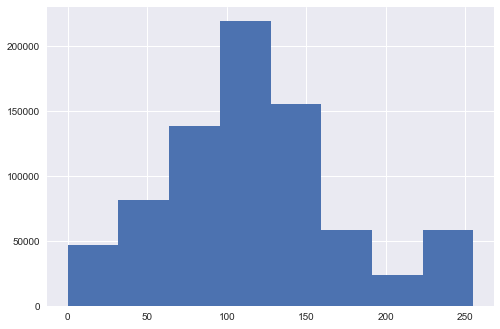

In [16]:
plt.hist(red.flatten(),bins=8)
plt.show()

In [18]:
df

,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,...,G_bin7,G_bin8,B_bin1,B_bin2,B_bin3,B_bin4,B_bin5,B_bin6,B_bin7,B_bin8
2015-02-23 07:08:12,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,male,...,20030,21607,17917,164327,119845,198698,147986,97312,10082,27193
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,male,...,38,31,52658,91919,144227,290851,202657,983,38,27
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,male,...,3093,5890,121883,167027,147589,288862,44285,5771,2725,5218
2015-02-23 07:08:14,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,male,...,2097,1230,106987,286990,193422,172602,18863,2805,1098,593
2015-02-23 07:08:22,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,male,...,5235,21,35120,116526,184324,340945,80136,1309,1316,23684
2015-02-23 07:08:59,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070859_11,/u1/2015-02-23/b00000011_21i6bq_20150223_07085...,Home,male,...,26851,59717,101288,141775,243870,126789,20250,9804,14761,124823
2015-02-23 07:09:31,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070931_1,/u1/2015-02-23/b00000012_21i6bq_20150223_07093...,Home,male,...,30786,72254,136976,150810,214431,114902,18561,12126,15102,120452
2015-02-23 07:10:08,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,having drinks\meal alone,u1_2015-02-23_071008_1,/u1/2015-02-23/b00000013_21i6bq_20150223_07100...,Home,male,...,101824,30099,37229,185850,169138,200855,146570,43611,93,14
2015-02-23 07:10:46,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,tv,u1_2015-02-23_071046_2,/u1/2015-02-23/b00000014_21i6bq_20150223_07104...,Home,male,...,10175,34973,5909,23981,215943,365145,116431,15076,9117,31758
2015-02-23 07:11:19,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,tv,u1_2015-02-23_071119_1,/u1/2015-02-23/b00000015_21i6bq_20150223_07111...,Home,male,...,10455,35295,9461,23756,204131,361970,122954,17978,10195,32915


The new dataframe has all the bins, now we need to normalize each column to have values between 0 and 1:

In [19]:
df['G_bin7'].max()

587440

In [20]:
maximums = np.zeros(8*3)

In [21]:
for i in range(8*3):
    maximums[i]=df[str(column_bins[i])].max()

In [22]:
maximums

array([ 783299.,  742845.,  711074.,  678275.,  650282.,  629296.,
        699618.,  405700.,  783309.,  719313.,  653279.,  661577.,
        637363.,  616274.,  587440.,  409641.,  783335.,  706932.,
        688356.,  654270.,  589891.,  578262.,  529383.,  442803.])

In [23]:
for i in range(8*3):
    df[str(column_bins[i])] = df[str(column_bins[i])]/maximums[i]

Let's save the new dataframe:

In [24]:
df.to_csv('./../data/dataframe_with_RGB_bins.csv', sep='\t')